<div class="alert alert-block alert-danger">
 <b>7 - RESULTS ANALYSIS </b> 
    
**Author**: Diogo Fróis Vieira
</div>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

In [1]:
# IMPORTS
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle

from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,branch,graphAnalysis
from framework.importing import *
from framework.preprocessingCYTO import *
#from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.processing import *
from framework.visualization import *
from framework.analysis import plot_barplot
from framework.processing_LSF import *
from framework.processing_DCF import *
from framework.processing_CNF import *
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


---

#### <center><font color='grey'>Directories</font></center>

In [2]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
options   = ["CYTO","NUCL"]
denominator = label_tubulin

### DATASET #2 (3D)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
# options     = ["CYTO3D","NUCL3D"]
# denominator = label_tubulin3D

### DATASET #3 (Soraia)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
# options     = ["CYTO","NUCL"]
# denominator = label_soraia

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []
# denominator  =

### DATASET #4 (SPOCC)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\SPOCC2022"
# options     = ["CYTO"]
# denominator = label_SPOCC

data = init_import(folder,options,denominator)
data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 
ROIs             = pickle.load(open(folder + '\\ROIs\\'+ 'ROIs.p', 'rb'))  


ResultsDF = pd.read_pickle(folder + "\\ResultsDF_9_jan_24.pkl")
#ResultsDF['LSF3D:Mat Scores'] = pd.read_pickle(folder + "\\rsmatscoresvector_9_jan_24.pkl")
#TextureDF = pd.read_pickle("TextureDF_paper.pkl")
CentroidsDF = pickle.load(open(folder + '\\Centroids.p', 'rb'))  
#ResultsDF = pd.read_pickle(folder + "\\ResultsDF_try.pkl")
#ResultsDF = pd.read_pickle(folder + "\\ResultsDF.pkl")

>>> [CYTO] added.
>>> [NUCL] added.


In [3]:
sep = create_separate_DFs(ResultsDF,options=["FULL"])
FULL = sep["FULL"]

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\processing.py:964: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res += [(prefix + " kurtosis",kurtosis(data_array))]
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\processing.py:965: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res += [(prefix + " skewness",skew(data_array))]
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\processing.py:964: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res += [(prefix + " ku

---------------------------------------------

# <div style="background-color: #BD223166;"><center><font color='black'><h4>__ PLOT INTENSITY __</h4></font></center></div>

C:\Users\diogo\AppData\Local\Temp\ipykernel_23244\2162669409.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Done.


C:\Users\diogo\AppData\Local\Temp\ipykernel_23244\2162669409.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


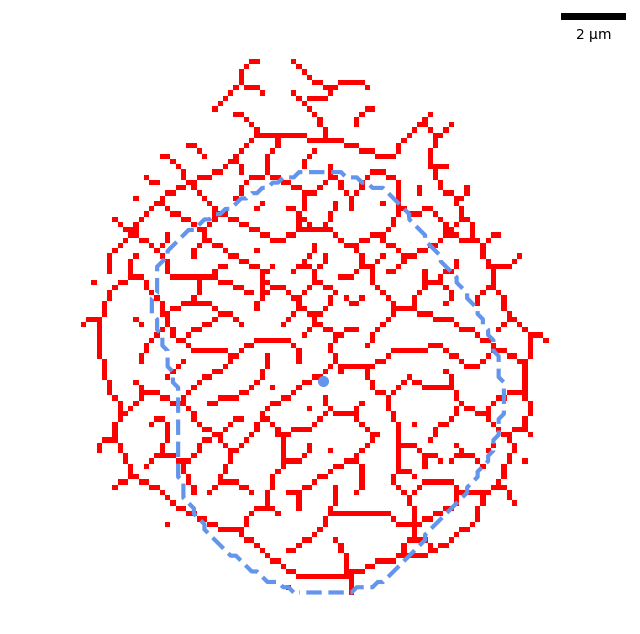

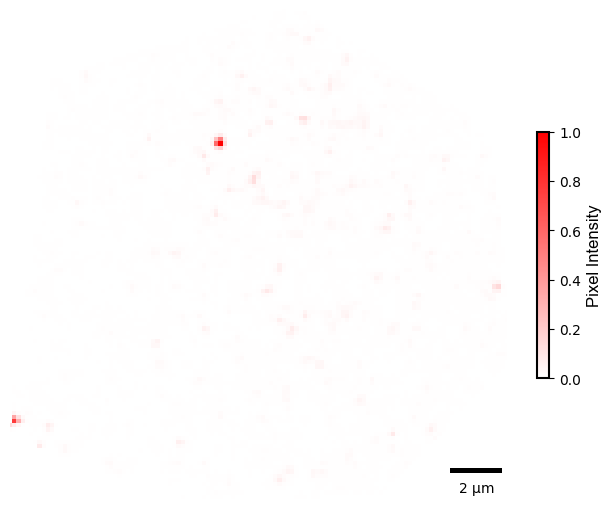

In [53]:
cell = 949
intensity_plotter(ResultsRow = ResultsDF.loc[cell],
                  data       = data,
                  save       = 'complexity_skel2')    

In [24]:
def getAAI(patch):
    """
    Calculate Average Actin Intensity:
        - patch: image of skeleton with intensities
    """
    
    from scipy.signal import argrelextrema
    
    aga       = np.histogram(patch,bins=256)
    local_min = argrelextrema(aga[0], np.less)[0]
    AAI       = np.sum(aga[0][local_min[0]:local_min[-1]] * aga[1][local_min[0]:local_min[-1]]) / len(np.where(patch != 0)[0])
    
    return AAI

def getAMI(ResultsRow):
    """
    Calculate Average Microtubule Intensity:
        - patch: image of skeleton with intensities
    """
    from scipy.signal import argrelextrema
    from skimage.filters import apply_hysteresis_threshold
    
#     nonorm = data['CYTO']['Image'][ResultsRow['Img Index']]
#     patch = ResultsRow['Mask']*(nonorm / np.max(nonorm))
    
    img = data['CYTO']['Image'][ResultsRow['Img Index']] * ResultsRow['Mask']
    res = apply_hysteresis_threshold(img,threshold_otsu(img)*0.6,threshold_otsu(img))
    patch = res * (img / np.max(img))
    
    
    
    aga       = np.histogram(patch.flatten()[patch.flatten() != 0],bins=256)
    local_min = argrelextrema(aga[0], np.less)[0]
    num       = np.sum(aga[0][local_min[0]:local_min[-1]] * aga[1][local_min[0]:local_min[-1]])
    AMI       = num / ResultsRow['DCF:Area (scaled)']
    return AMI

ResultsDF['DCF:AMI'] = [getAMI(row) for _,row in ResultsDF.iterrows()]

# <div style="background-color: #BD223166;"><center><font color='black'><h4>__ PLOT LINES __</h4></font></center></div>

Done.


C:\Users\diogo\AppData\Local\Temp\ipykernel_23244\3906177905.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


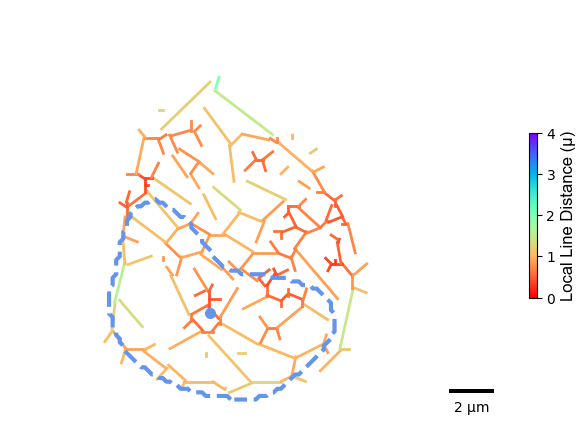

In [26]:
%matplotlib inline
cell = 935 #150 #935

cmap     = pltc.rainbow_r
cm       = truncate_colormap(cmap, 0, 1, 300)

# ORIENTATION
# line_plotter(ResultsRow = ResultsDF.loc[cell],
#              data=data,
#              feat='LSF2D:Theta (LinReg)',
#              cmap=cm,
#              normalize_bounds=[0, 180],
#              colorbar_label=None,
#              line_data_origin = 'Lines LinReg',
#              overlay=False,
#              save='orientation_lines2')

# BUNDLING
line_plotter(ResultsRow = ResultsDF.loc[cell],
             data=data,
             feat="LSF2D:Local Line Distance (LinReg)",
             cmap=cm,
             normalize_bounds=[0,4],
             colorbar_label='Local Line Distance (µ)',
             line_data_origin = 'Lines LinReg',
             overlay=False,
             save='bundling_lines0')

# PARALLELISM
# line_plotter(ResultsRow = ResultsDF.loc[cell],
#              data=data,
#              feat="LSF2D:Angle Difference (LinReg)",
#              cmap=cm,
#              normalize_bounds=[0,90],
#              colorbar_label='Mean Angle Difference (º)',
#              line_data_origin = 'Lines LinReg',
#              overlay=False,
#              save='parallelism_lines2')

# COMPACTNESS & QUANTITY
# line_plotter(ResultsRow = ResultsDF.loc[cell],
#              data=data,
#              feat=None,
#              cmap=cm,
#              normalize_bounds=None,
#              colorbar_label=None,
#              line_data_origin = 'Lines LinReg',
#              overlay=False,
#              save='compactness_lines1')

# RADIALITY
# line_plotter(ResultsRow = ResultsDF.loc[cell],
#              data=data,
#              feat="LSF2D:Alphas (LinReg)",
#              cmap=cm,
#              normalize_bounds=[0,90],
#              colorbar_label='Angle (º)',
#              line_data_origin = 'Lines LinReg',
#              overlay=False,
#              save=False)

# CYTO-NUC INTERACTION
# line_plotter(ResultsRow = ResultsDF.loc[cell],
#              data=data,
#              feat="LSF2D:Distances to Centroid (LinReg) (scaled)",
#              cmap=cm,
#              normalize_bounds=[0,30],
#              colorbar_label='Distance (μm)',
#              line_data_origin = 'Lines LinReg',
#              overlay=False,
#              save='cytonuc_lines0')

In [36]:
447,349,353

In [38]:
[np.max(x) for x in ResultsDF["LSF2D:Angle Difference (LinReg)"]]

[77.374,
 65.631,
 77.374,
 66.79,
 74.911,
 66.007,
 65.063,
 65.49,
 63.173,
 60.618,
 59.606,
 68.732,
 71.103,
 63.432,
 66.154,
 58.897,
 63.523,
 68.813,
 60.62,
 66.763,
 70.703,
 60.789,
 66.429,
 64.127,
 72.0,
 64.876,
 64.666,
 68.312,
 62.567,
 56.1,
 59.265,
 56.152,
 68.903,
 55.818,
 62.488,
 50.802,
 66.484,
 52.145,
 51.015,
 67.327,
 65.956,
 63.81,
 60.47,
 69.195,
 68.38,
 68.309,
 72.473,
 61.672,
 57.209,
 52.703,
 72.145,
 65.32,
 64.611,
 69.157,
 60.26,
 57.322,
 61.351,
 61.004,
 64.336,
 59.361,
 59.285,
 66.386,
 69.194,
 70.83,
 54.901,
 59.43,
 69.559,
 69.559,
 69.559,
 67.029,
 54.052,
 77.81,
 71.328,
 69.965,
 65.545,
 68.784,
 67.743,
 68.882,
 61.461,
 64.79,
 63.285,
 70.358,
 61.047,
 57.559,
 62.88,
 51.008,
 61.102,
 60.334,
 75.678,
 65.264,
 62.41,
 71.165,
 83.123,
 70.459,
 70.464,
 75.509,
 62.265,
 70.992,
 71.541,
 68.371,
 74.133,
 65.928,
 58.311,
 65.647,
 71.383,
 64.062,
 66.367,
 76.492,
 75.424,
 64.674,
 70.824,
 66.302,
 70.304,
 

In [18]:
def lines_lld(ResultsRow):    
    median_points = [((line[0][0] + line[1][0])/2,(line[0][1] + line[1][1])/2) for line in ResultsRow['Lines LinReg']]
    d             = 0.16125*distance_matrix(median_points,median_points); np.fill_diagonal(d,np.max(d));
    d_0           = distance_matrix(median_points,median_points); np.fill_diagonal(d_0,0);
    max_d         = np.max(d)
    
    ind = 0
    prox        = []
    for line in ResultsRow['Lines LinReg']:
        p0, p1 = line
        
        med_point      = ((p0[0] + p1[0])/2,(p0[1] + p1[1])/2)
        #center_med_vec = np.array(med_point) - np.array([centroid[0],centroid[1]])
        line_vec       = np.array(p1) - np.array(p0)
        
        ### LOCAL FEATURES
        # CLOSEST LINES vs. THIS LINE
        copy_d            = copy.deepcopy(d[ind])
        dists_to_medpoint = copy_d
        prox_lines     = []
        
        for _ in range(5):
            # calculate angle of the _'th closest line - MANDATORY
            min_val          = np.min(dists_to_medpoint)
            close_line_ind   = np.where(dists_to_medpoint == min_val)[0][0]
            p0_c, p1_c       = ResultsRow['Lines LinReg'][close_line_ind] 
            med_point_c      = ((p0_c[0] + p1_c[0])/2,(p0_c[1] + p1_c[1])/2)
            #center_med_vec_c = np.array(med_point_c) - np.array([centroid[1],centroid[0]])
            line_vec_c       = np.array(p1_c) - np.array(p0_c)
            
            
            prox_lines     = prox_lines + [min_val]
            
            # next line
            dists_to_medpoint[close_line_ind] = max_d
            
        prox        += [round(np.mean(prox_lines),3)]
        
        ind = ind + 1
        
    return prox

ResultsDF["LSF2D:Local Line Distance (LinReg)"] = [lines_lld(row) for index,row in ResultsDF.iterrows()]

In [37]:
ResultsDF["LSF2D:Angle Difference (LinReg)"] = [lines_angdiff(row) for index,row in ResultsDF.iterrows()]

In [207]:
fig, ax = plt.subplots()

ax.imshow(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']],cmap='gray',alpha=0.5,zorder=2)
ax.axis('off')

x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
ax.set_ylim([min(x_),max(x_)])
ax.set_xlim([min(y_),max(y_)])

(762.0, 926.0)

# PLOT RADIAL

In [71]:
def plot_radial(ResultsRow,overlay,normalize_bounds,colorbar_label,save):
    from skimage.morphology import square,dilation
    from skimage.filters import apply_hysteresis_threshold
    
    fig,ax=plt.subplots(figsize=(15,15))
    t = dilation(ResultsRow['LSF3D:Mat Scores'], square(1))
    
    # Plot background
    if overlay == None:
        ax.imshow(np.zeros((1040, 1388)),cmap='gray',alpha=0)
    if overlay == 'sk':
        ax.imshow(1-ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']],cmap='gray',alpha=0.5)
        #ax.imshow(np.max(ResultsRow['Patches'][1]) - ResultsRow['Patches'][1],cmap='gray',zorder=2)
    
    # Get contour mask
    img = data['CYTO']['Image'][ResultsRow['Img Index']] * ResultsRow['Mask']
    res = apply_hysteresis_threshold(img,threshold_otsu(img)*0.3,threshold_otsu(img))
    
    
    # Plot RS
    mycmap = pltc.get_cmap('Reds')
    mycmap.set_under('w')
    ax.imshow(t*res,cmap=mycmap,vmin=.001,vmax=0.5)
    ax.axis('off')
    
    # Plot points
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
    plot_nuclei_contours(CentroidsDF,ResultsRow['Img Index'],[x_,y_],ax)
    
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=12,zorder=8)
    #ax.plot(ResultsRow['Nucleus Contour'][:,0],ResultsRow['Nucleus Contour'][:,1],'--',color='#6495ED',zorder=11,linewidth=2.5)
    ax.plot(ResultsRow['LSF2D:Radial Pos 2'][1],ResultsRow['LSF2D:Radial Pos 2'][0],'o',color='#EDE7B1',zorder=12,markersize=14)
    
    # Get bounds for color map (either 'default' or [0,90], etc)
    if normalize_bounds == 'default':
        #normalize_bounds = [0,ResultsRow['LSF1D:Radial Score 2']]
        normalize_bounds = [0,0.5]

        
    # Colorbar
    if colorbar_label != None:
        cbar = fig.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=mycmap), ax=ax, shrink = 0.4)
        cbar.set_label(colorbar_label,fontfamily='arial',fontsize=12)
        #cbar.set_ticks(np.linspace(0,1,5,endpoint=True))

    # Scale Bar
    scalebar = ScaleBar(0.16125,"um",color='k',box_alpha=0,dimension='si-length',location='lower right') 
    ax.add_artist(scalebar)
    
    # Lims
#     ax.set_ylim([min(ResultsRow['Patches'][4]),max(ResultsRow['Patches'][4])])
#     ax.set_xlim([min(ResultsRow['Patches'][5]),max(ResultsRow['Patches'][5])])
    ax.set_ylim([min(x_),max(x_)])
    ax.set_xlim([min(y_),max(y_)])
    
    # Adjust and Show
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save != False:
        plt.savefig(folder + str("\\") + str(save) + ".pdf",format='pdf',transparent=True,bbox_inches='tight')
    fig.show()
    
    return print('Done.')

C:\Users\diogo\AppData\Local\Temp\ipykernel_20148\2753092477.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Done.


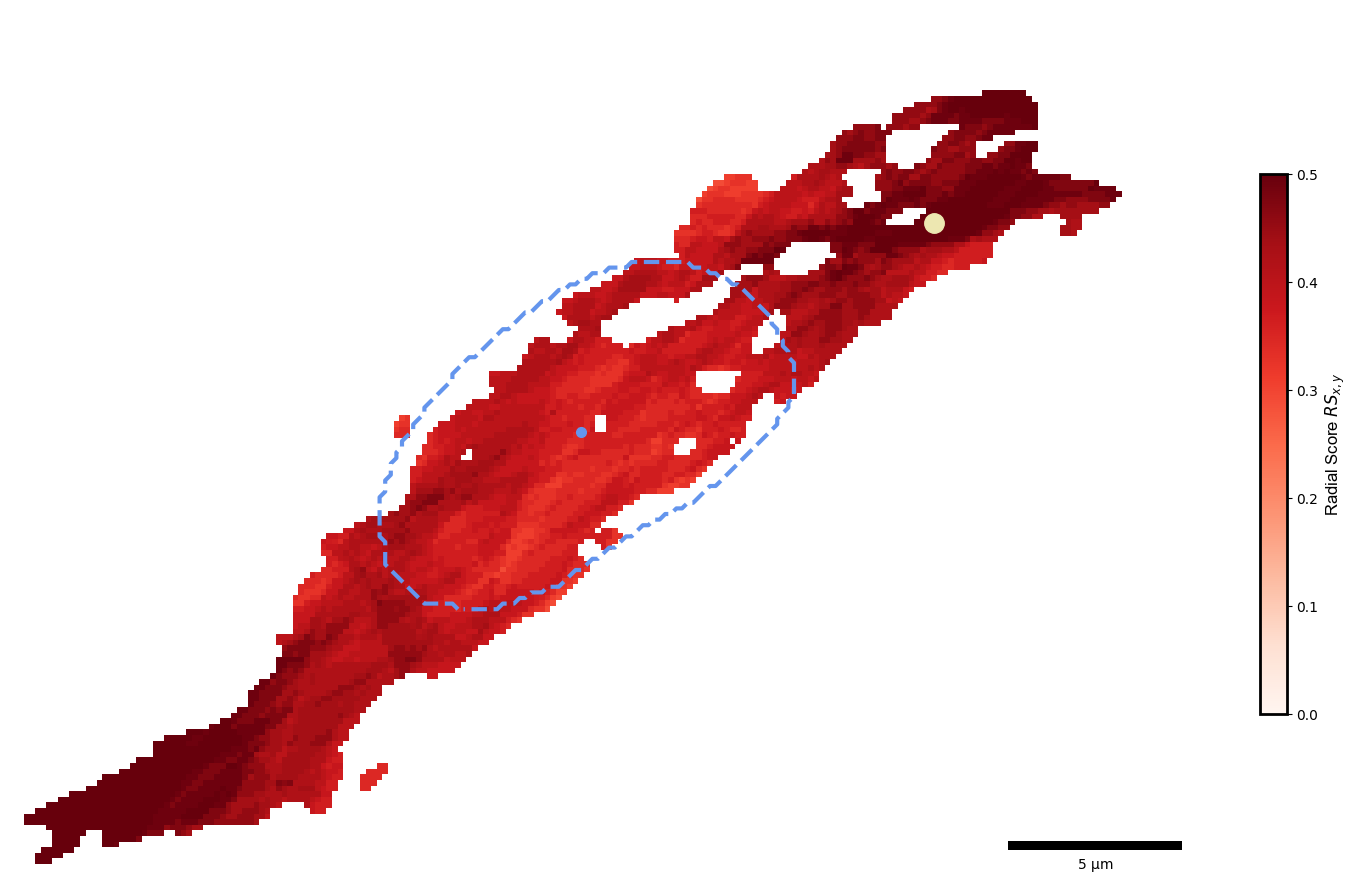

In [80]:
plot_radial(ResultsRow       = ResultsDF.loc[488], 
            overlay          = None, 
            normalize_bounds = 'default',
            colorbar_label   = 'Radial Score $RS_{x,y}$',
            save             = "RS2_map") 

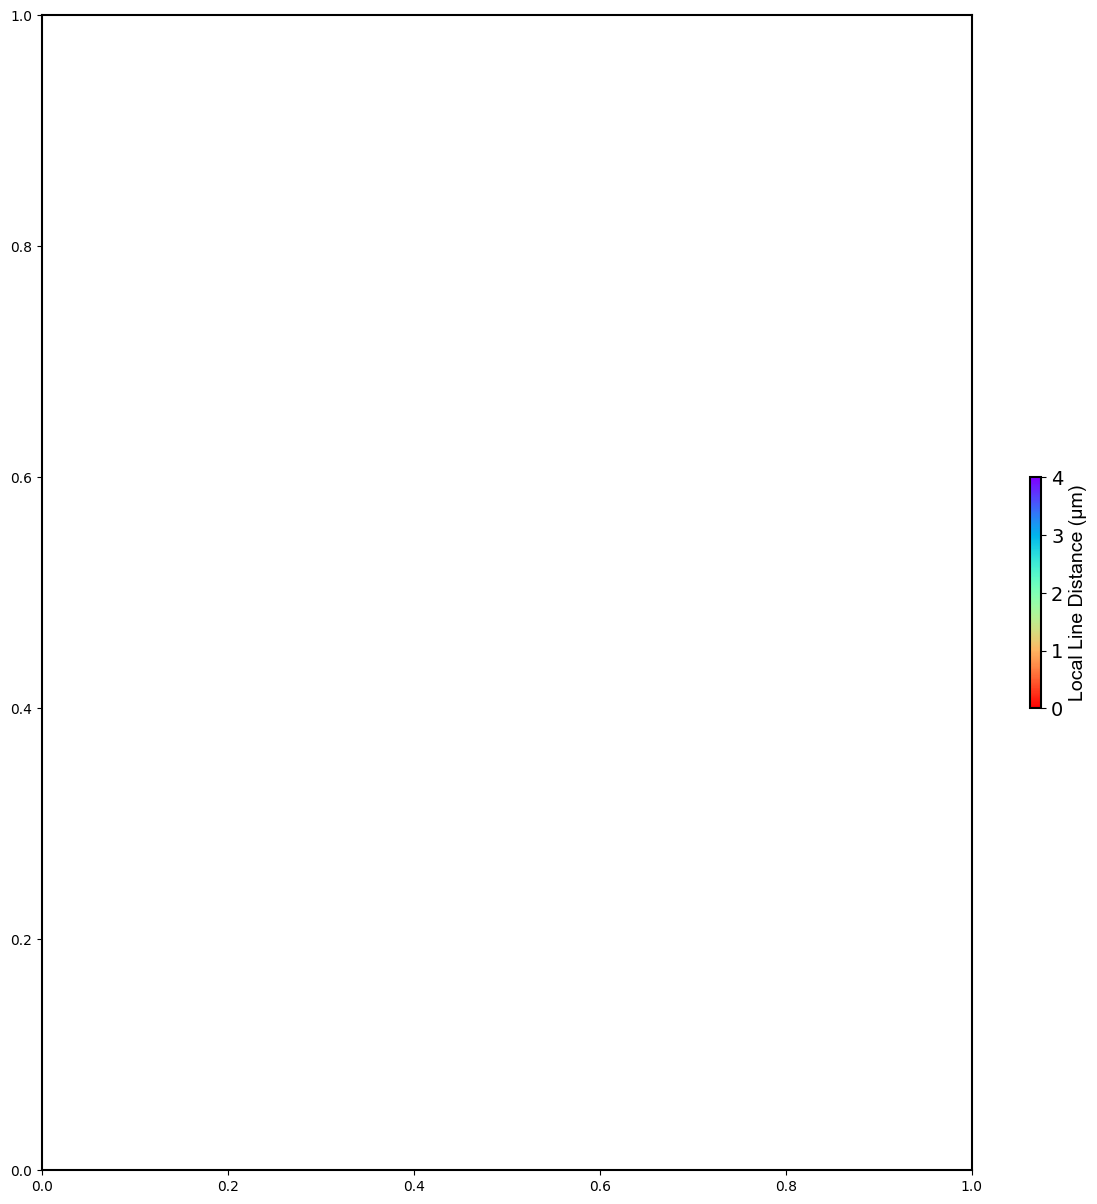

In [30]:
fig,ax=plt.subplots(figsize=(15,15))
normalize_bounds = [0,4]
# mycmap = pltc.get_cmap('Reds')
# mycmap.set_under('w')


cmap     = pltc.rainbow_r
mycmap       = truncate_colormap(cmap, 0, 1, 300)

cbar = plt.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=mycmap), ax=ax, shrink = 0.2)
cbar.set_label('Local Line Distance (µm)',fontfamily='arial',fontsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks(np.linspace(0,4,5,endpoint=True))
plt.rcParams['axes.linewidth'] = 1.5
plt.savefig(folder + str("\\") + str('bar_lld') + ".pdf",format='pdf',transparent=True,bbox_inches='tight')
   

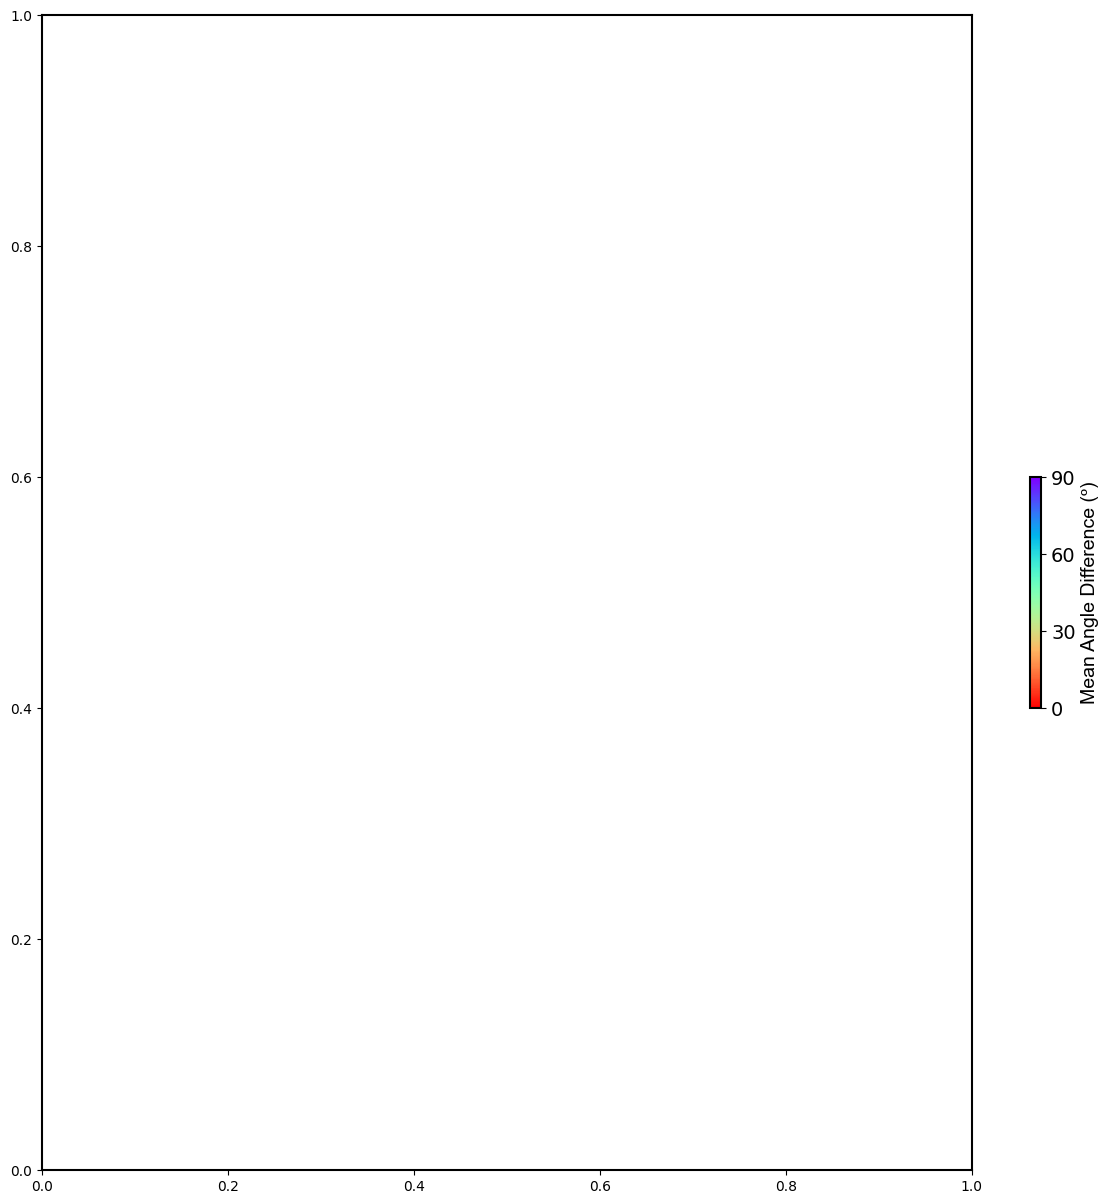

In [96]:
fig,ax=plt.subplots(figsize=(15,15))
normalize_bounds = [0,90]
# mycmap = pltc.get_cmap('Reds')
# mycmap.set_under('w')


cmap     = pltc.rainbow_r
mycmap       = truncate_colormap(cmap, 0, 1, 300)

cbar = plt.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=mycmap), ax=ax, shrink = 0.2)
cbar.set_label('Mean Angle Difference (º)',fontfamily='arial',fontsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks(np.linspace(0,90,4,endpoint=True))
plt.rcParams['axes.linewidth'] = 1.5
plt.savefig(folder + str("\\") + str('bar_angdiff') + ".pdf",format='pdf',transparent=True,bbox_inches='tight')
    

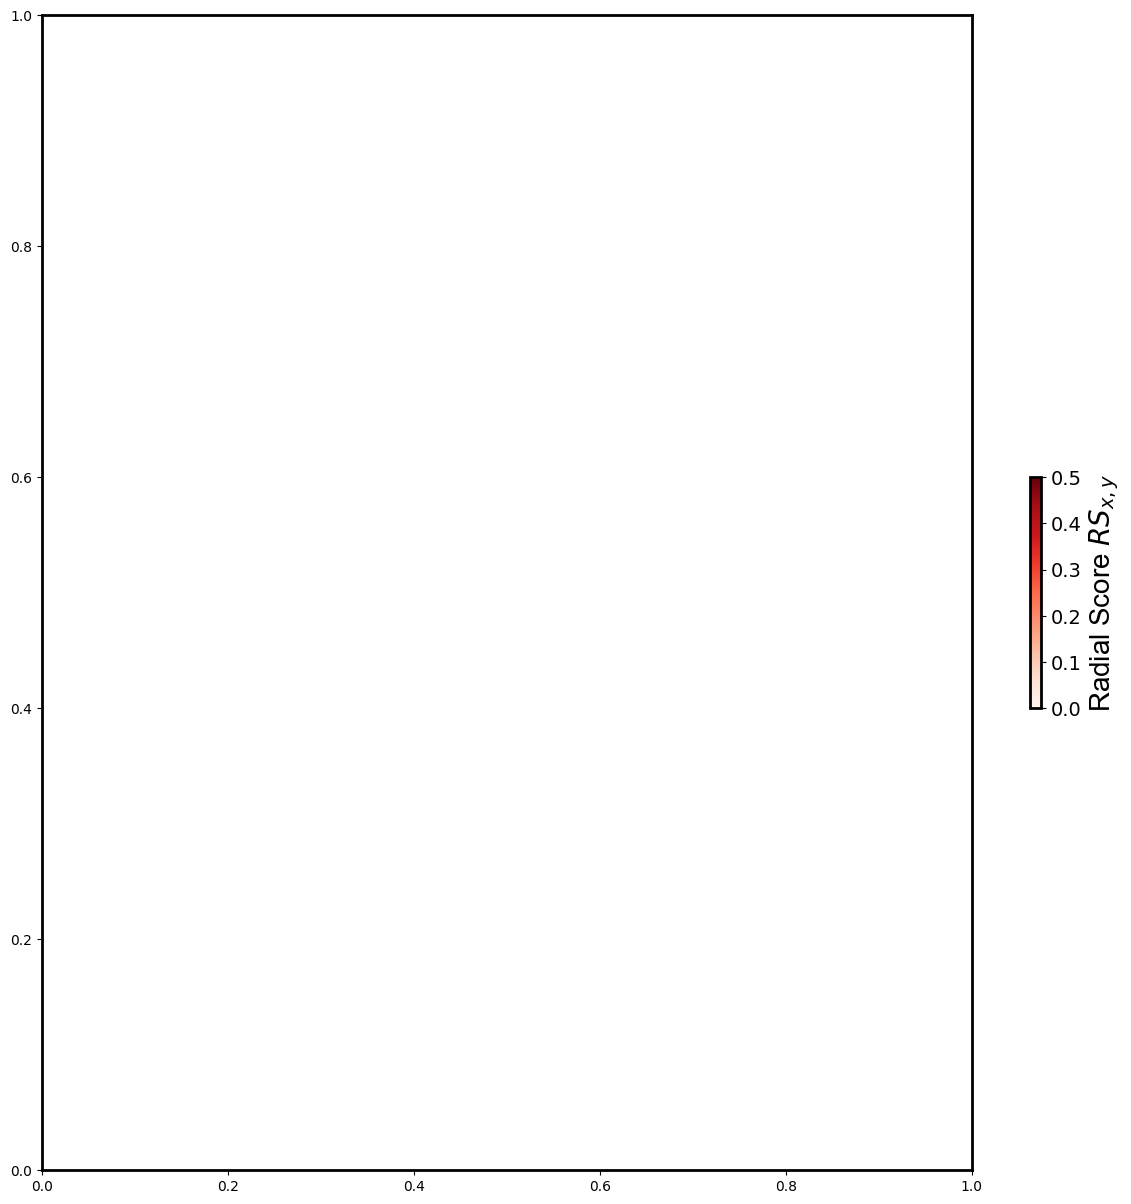

In [91]:
fig,ax=plt.subplots(figsize=(15,15))
normalize_bounds = [0,0.5]
mycmap = pltc.get_cmap('Reds')
mycmap.set_under('w')
cbar = plt.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=mycmap), ax=ax, shrink = 0.2)
cbar.set_label('Radial Score $RS_{x,y}$',fontfamily='arial',fontsize=20)
cbar.ax.tick_params(labelsize=14)
plt.savefig(folder + str("\\") + str('bar_alpha') + ".pdf",format='pdf',transparent=True,bbox_inches='tight')
    

In [ ]:
715,951,488

In [64]:
ResultsDF.loc[715]['LSF1D:Radial Score 2'],ResultsDF.loc[951]['LSF1D:Radial Score 2'],ResultsDF.loc[488]['LSF1D:Radial Score 2']

(0.2659090909090909, 0.3023648648648649, 0.5636363636363637)

In [75]:
ResultsDF.loc[144]['LSF1D:Radial Score 2'],ResultsDF.loc[156]['LSF1D:Radial Score 2'],ResultsDF.loc[146]['LSF1D:Radial Score 2']

(0.2921535893155259, 0.2990654205607477, 0.3114754098360656)

In [58]:


ResultsDF['LSF1D:Radial Score 2'] = [np.max(row['LSF3D:Mat Scores']) for index,row in ResultsDF.iterrows()]

In [74]:
ResultsDF.sort_values(by='LSF1D:Radial Score 2', ascending=False)[['LSF1D:Radial Score 2','Label']]

LSF1D:Radial Score 2            Label
488              0.563636               WT
451              0.551724               WT
692              0.543478  No transfection
622              0.541985             Mock
492              0.537037               WT
..                    ...              ...
247              0.269634         Dup41_46
932              0.269058               WT
715              0.265909               WT
395              0.265411  No transfection
530              0.265367         Dup41_46

[1046 rows x 2 columns]

In [55]:
ResultsDF.sort_values(by='LSF1D:Radial Score 2', ascending=False)[['LSF1D:Radial Score 2','Label']][523:538]

LSF1D:Radial Score 2            Label
259                 0.323         Dup41_46
363                 0.323         Del38_46
987                 0.323         Dup41_46
279                 0.323         Dup41_46
285                 0.323         Del38_46
550                 0.323         Dup41_46
793                 0.323             Mock
210                 0.323             Mock
368                 0.322         Del38_46
234                 0.322             Mock
422                 0.322  No transfection
739                 0.322             Mock
924                 0.322           Mut394
582                 0.322             Mock
966                 0.322         Dup41_46

In [ ]:
497],data.loc[365],data.loc[333

In [5]:
df = ResultsDF.sort_values(by='SKNW:Fractal Dimension (Rot)', ascending=False)[['SKNW:Fractal Dimension (Rot)','Label']]
df

SKNW:Fractal Dimension (Rot)     Label
993                      1.716489  Dup41_46
963                      1.685524        WT
949                      1.652321        WT
951                      1.643897        WT
942                      1.638741        WT
..                            ...       ...
163                      1.164602        WT
354                      1.162146  Del38_46
474                      1.158375        WT
867                      1.157278  Dup41_46
33                       1.125830  Del38_46

[1046 rows x 2 columns]

In [6]:
def scale_feat(data,feat,scale):
    res = copy.deepcopy(data[feat])
    for index,row in data.iterrows():
        res[index] = np.array(row[feat]) * scale
    
    return res

ResultsDF["LSF2D:Distances to Centroid (scaled)"] = scale_feat(ResultsDF,"LSF2D:Distances to Centroid",0.16125)

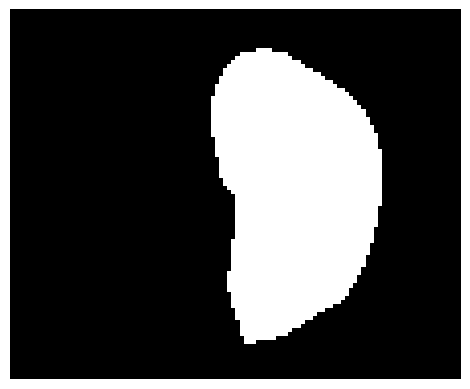

In [48]:
def exp_nucl(ResultsRow):
    from skimage.filters import apply_hysteresis_threshold
    # Find centroid:
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
    imgIndex = ResultsRow['Img Index']
    
    for index,row in CentroidsDF[imgIndex].iterrows():
        if (round(row['Centroid'][0]),round(row['Centroid'][1])) in list(zip(x_,y_)):
            centroid = (row['Centroid'][1],row['Centroid'][0])
            contour = row['Contour']
            idx = index
            break
    try:
        centroid
    except:
        centroid = (0,0)
        print(index,'centroid not found. set to (0,0)')
    

    #img_nucl_ = ResultsRow['Mask'] * (data['NUCL']['Image'][ResultsRow['Img Index']] / np.max(data['NUCL']['Image'][ResultsRow['Img Index']]))
    #img_nucl  = apply_hysteresis_threshold(img_nucl_,threshold_otsu(img_nucl_)*0.6,threshold_otsu(img_nucl_))
    img_nucl = cv2.fillPoly(np.zeros((1040,1388)),pts=CentroidsDF[imgIndex].loc[idx]['Contour'],color=(255,255,255))
    
    fig,ax = plt.subplots()
    ax.imshow(img_nucl,cmap='gray')
    ax.axis('off')
    
    
    ax.set_ylim([min(x_),max(x_)])
    ax.set_xlim([min(y_),max(y_)])
    
    ax.set_xlim([min(y_),max(y_)])
    
exp_nucl(ResultsDF.loc[6])

#plt.imshow(ResultsDF.loc[348]['Patches'][2],cmap='gray')

In [4]:
def radialscore(lines,gridpoints):
    global x_points,y_points,points,mat_scores,scores,score,h_i_s,angles
    x_points,y_points = np.where(gridpoints == 1)
    points = list(zip(x_points,y_points))
    
    
    mat_scores = np.zeros((gridpoints.shape[0],gridpoints.shape[1]))
    maxscore = -1
    scores = []
    ind = 0
    for p in points:
        angles = []
        ind = ind + 1
        for line in lines:
            p0, p1 = line
            #p0     = (min(y_) + p0[0],min(x_) + p0[1])
            #p1     = (min(y_) + p1[0],min(x_) + p1[1])

            # Prepare vectors
            med_point      = ((p0[0] + p1[0])/2,(p0[1] + p1[1])/2)
            center_med_vec = np.array(med_point) - np.array([p[1],p[0]])
            line_vec       = np.array(p1) - np.array(p0)
#             center_p0      = p0 - np.array([p[1],p[0]])
#             center_p1      = p1 - np.array([p[1],p[0]])

            # Statistics
            try:
                angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
#                 print(np.linalg.norm(center_med_vec))
            except:
                print('error in arccos. Set to 0.', np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))
                angle = 0
            if angle > 90:
                angle = 180 - angle
                
            angles += [angle]
             
        
        # Compute score
        h_i_s = np.histogram(angles,bins = np.linspace(0,90,10),density=True)
        
        #score = np.sum(h_i_s[0][:4])
        score = np.sum(np.diff(np.linspace(0,90,10))[:2]*h_i_s[0][:2])
        
        if score > maxscore:
            maxscore = score
            maxpoint = p
            
        scores = scores + [score]
    
    
    mat_scores[x_points,y_points] = scores
    return mat_scores

def new_radialscore(ResultsRow):
    from skimage.filters import apply_hysteresis_threshold
    # Get mask (same as est_area)
    img = data['CYTO']['Image'][ResultsRow['Img Index']] * ResultsRow['Mask']
    res = apply_hysteresis_threshold(img,threshold_otsu(img)*0.6,threshold_otsu(img))
    mask = (res!=0)*1
    
    lines        = ResultsRow['Lines LinReg']
    gridpoints   = subsample_mask(mask,1)
    mat_scores   = radialscore(lines,gridpoints)
    radialSC     = round(np.max(mat_scores),3)
    radialSC_pos = np.argwhere(mat_scores == np.max(mat_scores))[0]
    
    return radialSC_pos,radialSC,mat_scores

from tqdm import tqdm
rs_res = []
pos_res = []
mat_res = []
for index, row in tqdm(ResultsDF.iterrows(), total=len(ResultsDF), desc='Processing rows'):

    # Your existing code here
    radial_pos, radial_score,mat_scores = new_radialscore(row)
    rs_res  += [radial_score]
    pos_res += [radial_pos]
    mat_res += [mat_scores]
    
ResultsDF['LSF1D:Radial Score 2'] = rs_res
ResultsDF['LSF2D:Radial Pos 2'] = pos_res
ResultsDF['LSF3D:Mat Scores'] = mat_res

Processing rows:   0%|                                                                        | 0/1046 [00:00<?, ?it/s]C:\Users\diogo\AppData\Local\Temp\ipykernel_12276\3227948259.py:28: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
C:\Users\diogo\AppData\Local\Temp\ipykernel_12276\3227948259.py:28: RuntimeWarning: invalid value encountered in divide
  angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
Processing rows: 100%|███████████████████████████████████████████████████████████| 1046/1046 [5:43:38<00:00, 19.71s/it]


In [83]:
radial_pos_exp, radial_score_exp,mat_scores_exp = new_radialscore(ResultsDF.loc[144])

C:\Users\diogo\AppData\Local\Temp\ipykernel_1856\283514253.py:28: RuntimeWarning: invalid value encountered in divide
  angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
C:\Users\diogo\AppData\Local\Temp\ipykernel_1856\283514253.py:28: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi


In [41]:
from skimage.filters import apply_hysteresis_threshold
img = data['CYTO']['Image'][ResultsDF.loc[0]['Img Index']] * ResultsDF.loc[0]['Mask']
res = apply_hysteresis_threshold(img,threshold_otsu(img)*0.6,threshold_otsu(img))

In [32]:
%matplotlib qt




def plot_sk(ResultsRow,ax):
    from matplotlib.colors import LinearSegmentedColormap
    
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
    colors = [(1, 1, 1), (1, 0, 0)] # first color is white, last is red
    cm     = LinearSegmentedColormap.from_list("Custom", colors, N=300)
    
    ax.imshow(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']],cmap='gray',alpha=1,zorder=2)
    ax.axis('off')
    
    ax.set_ylim([min(x_),max(x_)])
    ax.set_xlim([min(y_),max(y_)])
    ax.set_title('Skeleton')

    
# LSD
# def plot_lines_comp(ResultsRow,ax):
#     x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
#     ax.imshow(np.zeros_like(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']]),cmap='gray',alpha=0,zorder=2)
#     ax.axis('off')
# #     ax.axis('equal')
    
#     for line in ResultsRow['Lines']:
#         p0,p1 = line
#         ax.plot((p0[0], p1[0]), (p0[1], p1[1]), zorder=10,linewidth=4)

#     ax.set_ylim([min(x_),max(x_)])
#     ax.set_xlim([min(y_),max(y_)])
#     ax.set_title('LSD')
    
#     return ax


# LINEAR REGRESSION WITHOUT CORRECTIONS
def plot_lines_comp(ResultsRow,ax):
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
    ske       = Skeleton(skeleton_image=(ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']]).astype(float)) 
    
    # Initialize figure
    ax.imshow(np.zeros_like(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']]),cmap='gray',alpha=0,zorder=2)
    ax.axis('off')
#     ax.axis('equal')
    
    # Linear Regression on all paths
    for b in range(ske.n_paths):
        brcoords = ske.path_coordinates(b)
                    
        # Fit
        if branch_check_horiz(brcoords) != True:
            global residuals
            coefficients, residuals, rank, singular_values, rcond = np.polyfit(brcoords[:,0], brcoords[:,1], 1,full=True)
            x_values = np.linspace(min(brcoords[:, 0]), max(brcoords[:, 0]), 10)
            y_values = np.polyval(coefficients, x_values)
            
            if len(residuals) > 0 and residuals[0] / len(brcoords) > 3.5:
                ax.plot(y_values, x_values, zorder=10,linewidth=3,color='r')
                continue
            
            ax.plot(y_values, x_values, zorder=10,linewidth=3,color='b')
        else:
            ax.plot(brcoords[:,1], brcoords[:,0], zorder=10,linewidth=3)
        
    
    for e in range(ske.n_paths):
        ax.plot(ske.path_coordinates(e)[0][1],ske.path_coordinates(e)[0][0],'o',markersize=4,color='b',zorder=15)
        ax.plot(ske.path_coordinates(e)[-1][1],ske.path_coordinates(e)[-1][0],'o',markersize=4,color='b',zorder=15)

    
    ax.set_ylim([min(x_),max(x_)])
    ax.set_xlim([min(y_),max(y_)])
    ax.set_title('Linear Regression')
    
    return ax 

def graph_to_lines(ResultsRow,ax):
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)
    ske       = Skeleton(skeleton_image=(ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']]).astype(float)) 
    
    # Initialize figure
    ax.imshow(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']],cmap='gray',alpha=0.3,zorder=2)
    #ax.imshow(np.zeros_like(1-ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']]),cmap='gray',alpha=0,zorder=2)
    ax.axis('off')
               
    
    # Linear Regression on all paths
    for b in range(ske.n_paths):
        global brcoords
        brcoords = ske.path_coordinates(b)
        
        # ISOLATED CYCLE
        if np.all(brcoords[0] == brcoords[-1]) == True:
            coefficients, residuals, rank, singular_values, rcond = np.polyfit(brcoords[:-1,0], brcoords[:-1,1], 1,full=True)
            x_values = np.linspace(min(brcoords[:-1, 0])-5, max(brcoords[:-1, 0])+5, num=300)
            y_values = np.polyval(coefficients, x_values)
            x_values_segment,y_values_segment = lines_truncate_endpoints(brcoords[:-1],x_values,y_values)
            ax.plot(y_values_segment, x_values_segment, zorder=10,linewidth=3,color='c')
            print(brcoords)
            continue
                    
        # Fit
        if branch_check_horiz(brcoords) != True:
            coefficients, residuals, rank, singular_values, rcond = np.polyfit(brcoords[:,0], brcoords[:,1], 1,full=True)
            x_values = np.linspace(min(brcoords[:, 0])-5, max(brcoords[:, 0])+5, num=300)
            y_values = np.polyval(coefficients, x_values)
        
                
            # COLINEAR
            if len(residuals) == 0:
                c = 'r'
                x_values_segment,y_values_segment = lines_truncate_endpoints(brcoords,x_values,y_values)
            
            
            # HIGH RESIDUE
            if len(residuals) > 0 and residuals[0] / len(brcoords) > 4:
#                 c = 'r'
                
                #print(brcoords,residuals[0] / len(brcoords))
                line_vec = (brcoords[0],brcoords[-1])
                ax.plot([brcoords[0, 1], brcoords[-1, 1]], [brcoords[0, 0], brcoords[-1, 0]], zorder=10,linewidth=3,color='k',linestyle='dashed')
                
                
                
                distances = np.array([perpendicular_distance(point, line_vec) for point in brcoords])
                max_distance_index = np.argmax(distances)
                ax.scatter(brcoords[max_distance_index, 1], brcoords[max_distance_index, 0], zorder=10, linewidth=3, color='g')
                
                # Settle two new lines
                #ax.plot([brcoords[0, 1], brcoords[max_distance_index, 1]], [brcoords[0, 0], brcoords[max_distance_index, 0]], zorder=10, linewidth=3, color='m')
                #ax.plot([brcoords[max_distance_index, 1], brcoords[-1, 1]], [brcoords[max_distance_index, 0], brcoords[-1, 0]], zorder=10, linewidth=3, color='m')
                
                
                # BRANCH #1
                brcoords1 = brcoords[:max_distance_index+1] # +1 to include endpoint
                 
                if branch_check_horiz(brcoords1) == True:
                    ax.plot(brcoords1[:,1], brcoords1[:,0], zorder=10,linewidth=3,color='k')
                else:
                    coefficients1, residuals1, rank1, singular_values1, rcond1 = np.polyfit(brcoords1[:,0], brcoords1[:,1], 1,full=True)
                    x_values1 = np.linspace(min(brcoords1[:, 0]) -5, max(brcoords1[:, 0])+5, num=300)
                    y_values1 = np.polyval(coefficients1, x_values1)
                    x_values_segment,y_values_segment = lines_truncate_endpoints(brcoords1,x_values1,y_values1)
                    
                    ax.plot(y_values_segment, x_values_segment, zorder=10,linewidth=3,color='g')
                
                # BRANCH #2
                brcoords2 = brcoords[max_distance_index:]
                
                if branch_check_horiz(brcoords2) == True:
                    ax.plot(brcoords2[:,1], brcoords2[:,0], zorder=10,linewidth=3,color='g')
                else:
                    coefficients2, residuals2, rank2, singular_values2, rcond2 = np.polyfit(brcoords2[:,0], brcoords2[:,1], 1,full=True)
                    x_values2 = np.linspace(min(brcoords2[:, 0])-5, max(brcoords2[:, 0])+5, num=300)
                    y_values2 = np.polyval(coefficients2, x_values2)
                    x_values_segment,y_values_segment = lines_truncate_endpoints(brcoords2,x_values2,y_values2)

                    ax.plot(y_values_segment, x_values_segment, zorder=10,linewidth=3,color='g')
                continue
                
            # LOW RESIDUE
            if len(residuals) > 0 and residuals[0] / len(brcoords) < 4:
                c = 'r'
                x_values_segment,y_values_segment = lines_truncate_endpoints(brcoords,x_values,y_values)

            
            if len(x_values_segment) != 0:
                ax.plot(y_values_segment, x_values_segment,color=c,zorder=10,linewidth=3)
            else:
                ax.plot([brcoords[0, 1], brcoords[-1, 1]], [brcoords[0, 0], brcoords[-1, 0]], zorder=10,linewidth=3,color='g')
                
                
        # If Horizontal
        else:
            ax.plot(brcoords[:,1], brcoords[:,0], zorder=10,linewidth=3,color='r')
        
    
    for e in range(ske.n_paths):
        ax.plot(ske.path_coordinates(e)[0][1],ske.path_coordinates(e)[0][0],'o',markersize=4,color='k',zorder=15)
        ax.plot(ske.path_coordinates(e)[-1][1],ske.path_coordinates(e)[-1][0],'o',markersize=4,color='k',zorder=15)

    
    ax.set_ylim([min(x_),max(x_)])
    ax.set_xlim([min(y_),max(y_)])
    ax.set_title('Linear Regression Corrected')
    
    return ax

ResultsRow = ResultsDF.loc[14]
fig, axs = plt.subplots(1, 2,sharex=True,sharey=True,figsize=(15,15))
plot_sk(ResultsRow,axs[0])
#plot_lines_comp(ResultsRow,axs[1])
graph_to_lines(ResultsRow,axs[1])
plt.savefig(folder + "\\suppfig2.pdf",format='pdf',transparent=True,bbox_inches='tight')
fig.show()

In [19]:
ResultsDF['Lines LinReg'] = [skeleton_to_lines(row,res_thr=4) for index,row in ResultsDF.iterrows()]

done 0
done 1
done 2
done 3
done 4
symmetric branch  True [[132. 901.]
 [133. 902.]
 [132. 903.]]
symmetric branch  True [[229. 932.]
 [230. 933.]
 [230. 934.]
 [230. 935.]
 [229. 936.]]
done 5
done 6
done 7
symmetric branch  True [[234. 545.]
 [235. 546.]
 [235. 547.]
 [235. 548.]
 [234. 549.]]
done 8
done 9
done 10
done 11
symmetric branch  True [[ 231. 1305.]
 [ 232. 1305.]
 [ 233. 1306.]
 [ 232. 1307.]
 [ 231. 1307.]]
symmetric branch  True [[ 269. 1208.]
 [ 269. 1209.]
 [ 268. 1210.]
 [ 268. 1211.]
 [ 269. 1212.]
 [ 269. 1213.]]
symmetric branch  True [[ 274. 1206.]
 [ 275. 1207.]
 [ 275. 1208.]
 [ 274. 1209.]]
done 12
done 13
symmetric branch  False [[ 783. 1197.]
 [ 783. 1198.]
 [ 783. 1199.]
 [ 783. 1200.]
 [ 782. 1201.]
 [ 782. 1202.]
 [ 782. 1203.]
 [ 782. 1204.]
 [ 783. 1205.]
 [ 783. 1206.]
 [ 783. 1207.]
 [ 783. 1208.]]
done 14
done 15
done 16
done 17
done 18
done 19
symmetric branch  True [[ 843. 1297.]
 [ 842. 1298.]
 [ 842. 1299.]
 [ 843. 1300.]]
symmetric branch  True 

KeyboardInterrupt: 

# <div style="background-color: #BD223166;"><center><font color='black'><h4>__ PLOT GRAPH __</h4></font></center></div>

C:\Users\diogo\anaconda3\envs\Cytosk_recentpy\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Done.


C:\Users\diogo\AppData\Local\Temp\ipykernel_23244\842626141.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


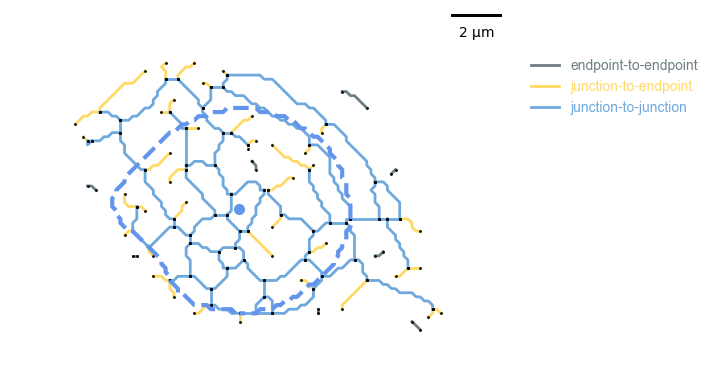

In [17]:
cell = 325

cmap     = pltc.rainbow
cm       = truncate_colormap(cmap, 0, 1, 300)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'branch-distance',
#               cmap             = cm,
#               normalize_bounds = [0,6],
#               colorbar_label   = 'Length (μm)',
#               nodes            = True,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = 'morphology_graph0')

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Branch Orientation',
#               cmap             = cm,
#               normalize_bounds = [0,180],
#               colorbar_label   = 'Angle (º)',
#               nodes            = True,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Local Average Branch Distance',
#               cmap             = cm,
#               normalize_bounds = 'default',
#               colorbar_label   = 'Distance (μm)',
#               nodes            = False,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Mean Filament Thickness',
#               cmap             = cm,
#               normalize_bounds = [1,2],
#               colorbar_label   = 'Thickness (μm)',
#               nodes            = False,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Local Average Branch Orientation',
#               cmap             = cm,
#               normalize_bounds = 'default',
#               colorbar_label   = 'Angle (º)',
#               nodes            = False,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Local Average Bundling Score',
#               cmap             = cm,
#               normalize_bounds = 'default',
#               colorbar_label   = 'Distance * Angle (umº)',
#               nodes            = False,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               feat             = 'CNF2D:Distances to Centroid',
#               cmap             = cm,
#               normalize_bounds = 'default',
#               colorbar_label   = 'Distance (μm)',
#               nodes            = False,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = False)

# graph_plotter(ResultsRow       = ResultsDF.loc[cell],
#               data             = data,
#               cmap             = cm,
#               feat             = None,
#               normalize_bounds = 'default',
#               colorbar_label   = None,
#               nodes            = True,
#               main_branch      = False,
#               overlay          = None,
#               scalebar         = True,
#               save             = 'figure4_graph')

graph_plotter(ResultsRow       = ResultsDF.loc[cell],
              data             = data,
              feat             = 'branch-type',
              cmap             = cm,
              normalize_bounds = 'default',
              colorbar_label   = None,
              nodes            = True,
              main_branch      = False,
              overlay          = None,
              scalebar         = True,
              save             = 'connectivity2')

#graph_plotter(ResultsRow=ResultsDF.loc[cell],data=data,feat=None,cmap=cm,normalize_bounds='default',colorbar_label=None,nodes=True,main_branch=False, overlay = None,scalebar=False, save='preprocessing_cellX_paper_graph')

In [5]:
ResultsRow = ResultsDF.loc[2]
ske = Skeleton(skeleton_image=(ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']].astype(float)),spacing=0.1612500)
    
#for e in range(ske.n_paths):    
v = ske.path_coordinates(15)



---

# <div style="background-color: #BD223166;"><center><font color='black'><h4>__ GLOBAL ANALYSIS __</h4></font></center></div>

# PIE CHARTS

In [3]:
def provide_colors(labels):
    colors   = []
    color_db = ['#3498DB','#ABE6FF','#CA6F1E']
    c        = 0
    for l in labels:
        if l == 'WT':
            colors += ['#2ECC71']
        elif l == 'Mock':
            colors += ['#95A5A6']
        elif l == 'Del38_46':
            colors += ['#E74C3C']
        elif l == 'Dup41_46':
            colors += ['#FFA500']
        elif l == 'Mut394':
            colors += ['#BC544B']
        else:
            colors += [color_db[c]]
            c += 1
    return colors

SET1

SET SORAIA

Del38_46 198
Dup41_46 155
Mock 202
Mut394 124
No transfection 190
WT 177


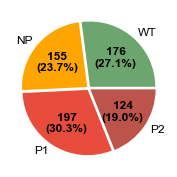

In [227]:
val = []
for i in np.unique(data['Label']):
    tm = data[data['Label']==i]
    print(i,len(tm))
    val += [len(tm)]


cs = ["#6DA56E","#FFA500","#E74C3C","#BC544B"]
ls = ['WT','Dup41_46','Del38_46','Mut394']
ls = ['WT','NP','P1','P2']
val = [177,155,198,124]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute, pct)
    
fig,ax = plt.subplots(figsize=(3,3))
explode = (0.03, 0.03, 0.03, 0.03)
wedges, texts, autotexts = ax.pie(val,colors=cs,labels=ls,explode=explode,autopct=lambda pct: func(pct, val),textprops=dict(font='arial',size=12))



plt.setp(autotexts, size=12, weight="bold",font='arial')

plt.savefig(".//TOTAL_pie.png",format='png',transparent=True,bbox_inches='tight',dpi=500)
plt.show()


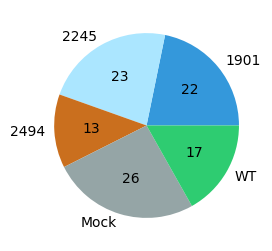

In [7]:
labels  = list(np.unique(ResultsDF['Label']))
colors  = provide_colors(labels)

try:
    labels.remove('Synthetic')
except:
    pass

def absolute_value(val):
    a  = int(np.round(val/100.*np.array([22, 23, 13, 26, 17]).sum(), 0))
    #a  = int(np.round(val/100.*np.array([204, 137, 192, 110,150,166]).sum(), 0)) set1a_sofia
    return a

plt.figure(figsize=(3,3))
plt.pie(np.array([len(ResultsDF[ResultsDF['Label'] == l]) for l in labels]),labels = labels,autopct=absolute_value,colors=colors)
#plt.pie(np.array([204, 137, 192, 110,150,166]),labels = labels,autopct=absolute_value,colors=colors)
plt.show()

# BARPLOTS

In [15]:
def lines_LL(ResultsRow):
    lines = ResultsRow["Lines LinReg"]
    
    line_size = []
    for line in lines:
        p0, p1     = line
        line_vec   = np.array(p1) - np.array(p0)
        line_size += [0.16125*np.linalg.norm(line_vec)]

    return round(np.mean(line_size),3)
    
FULL['LSF1D:Line Lengths (LinReg)'] = [lines_LL(row) for _,row in ResultsDF.iterrows()]


In [16]:
FULL['LSF1D:Line Lengths (LinReg)']

0       0.933
1       0.946
2       0.930
3       1.075
4       1.088
        ...  
1041    1.090
1042    0.920
1043    0.921
1044    1.352
1045    1.055
Name: LSF1D:Line Lengths (LinReg), Length: 1046, dtype: float64

                     Mean       Std   Std_Err
Label                                        
Del38_46         1.379166  0.081299  0.005778
Dup41_46         1.429167  0.083878  0.006737
Mock             1.415583  0.083632  0.005884
Mut394           1.430543  0.080236  0.007205
No transfection  1.388749  0.083357  0.006047
WT               1.411808  0.101274  0.007612
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT v.s. Del38_46: t-test independent samples, P_val=6.082e-04 stat=3.457e+00


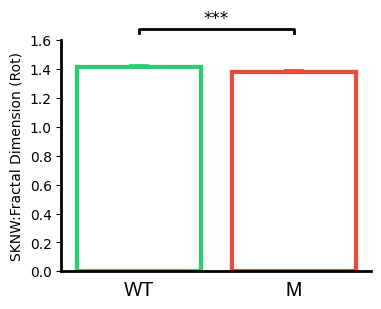

In [9]:
%matplotlib inline

#FULL['LSF1D:RS'] = ResultsDF['LSF1D:Radial Score 2']
#FULL['SKNW:branch-distance (scaled) cv'] = FULL['SKNW:branch-distance (scaled) std_dev'] / FULL['SKNW:branch-distance (scaled) mean']
#FULL['LSF1D:Line Lengths mean (scaled)'] = FULL['LSF1D:Line Lengths']



plot_barplot_paper(FULL,
                   feature = [
                              'SKNW:Fractal Dimension (Rot)',
                              ])

In [32]:
def scale_feat(data,feat,scale):
    res = copy.deepcopy(data[feat])
    for index,row in data.iterrows():
        res[index] = np.array(row[feat]) * scale
    
    return res

ResultsDF["LSF2D:Distances to Centroid (scaled)"] = scale_feat(ResultsDF,"LSF2D:Distances to Centroid",0.16125)
ResultsDF["LSF1D:N over A 2 (scaled)"] = scale_feat(ResultsDF,"LSF1D:N over A 2",1/(0.16125**2))
ResultsDF['LSF1D:RS NucCent Distance (scaled)'] = scale_feat(ResultsDF,"LSF1D:RS NucCent Distance",0.16125)


def getgraphmeans(ResultsRow):
    ske       = Skeleton(skeleton_image=(ResultsRow['Mask']*data['CYTO_PRE']['Skeleton'][ResultsRow['Img Index']].astype(float)),spacing=0.1612500) 
    
    return ske.path_lengths()

res = []
for index,row in ResultsDF.iterrows():
    res += [getgraphmeans(row)]
    
ResultsDF['SKNW:branch-distance (scaled)'] = res

ress = [np.std(x) for x in ResultsDF['SKNW:branch-distance (scaled)']]

ResultsDF['SKNW:branch-distance (scaled) std_dev'] = ress

resm = [np.mean(x) for x in ResultsDF['SKNW:branch-distance (scaled)']]

ResultsDF['SKNW:branch-distance (scaled) mean'] = resm

In [19]:
# FULL['LSF1D:OOP'] = ResultsDF['LSF1D:OOP']
# FULL['LSF1D:RS'] = ResultsDF['LSF1D:RS']
# FULL['LSF1D:Number of Lines'] = ResultsDF['LSF1D:Number of Lines']
#FULL['LSF1D:Circular Variance'] = ResultsDF['LSF1D:Circular Variance']
FULL['LSF1D:RS NucCent Distance'] = ResultsDF["LSF1D:RS NucCent Distance"]

In [10]:

#FULL['Label'] = ResultsDF['Label']

FULL['SKNW:branch-distance sigma_mu'] = ResultsDF['SKNW:branch-distance std_dev'] / ResultsDF['SKNW:branch-distance mean']
#FULL['LSF1D:N over A'] = pd.read_excel('NoA.xlsx')['LSF1D:N over A']



#FULL['LSF1D:RS'] = pd.read_pickle(folder + "\\rsvector.pkl") 
FULL['LSF1D:RS'] = ResultsDF['LSF1D:RS'] 
#FULL['LSF1D:RSpos'] = pd.read_pickle(folder + "\\rsposvector.pkl") 
FULL['LSF1D:RSpos'] = ResultsDF['LSF1D:RSpos'] 
#FULL['LSF:RS Mat Scores'] = pd.read_pickle(folder + "\\rsmatscoresvector.pkl") 

#FULL['LSF:RS-NucCent Distance'] = pd.read_pickle(folder + "\\nuccentdistvector.pkl") 
FULL['LSF1D:RS NucCent Distance'] = ResultsDF["LSF1D:RS NucCent Distance"]


#FULL['LSF1D:Line Lengths CV'] = FULL['LSF2D:Line Lengths std_dev'] / FULL['LSF2D:Line Lengths mean']


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.567e-01 stat=7.511e-01
2245 v.s. 2494: t-test independent samples, P_val=1.102e-05 stat=-5.148e+00
2494 v.s. Mock: t-test independent samples, P_val=3.135e-06 stat=5.484e+00
Mock v.s. WT: t-test independent samples, P_val=1.053e-03 stat=-3.526e+00
1901 v.s. 2494: t-test independent samples, P_val=1.003e-03 stat=-3.610e+00
2245 v.s. Mock: t-test independent samples, P_val=2.198e-01 stat=-1.244e+00
2494 v.s. WT: t-test independent samples, P_val=5.257e-02 stat=2.024e+00
1901 v.s. Mock: t-test independent samples, P_val=9.068e-01 stat=-1.177e-01
2245 v.s. WT: t-test independent samples, P_val=6.397e-04 stat=-3.721e+00
1901 v.s. WT: t-test independent samples, P_val=2.695e-02 stat=-2.304e+00


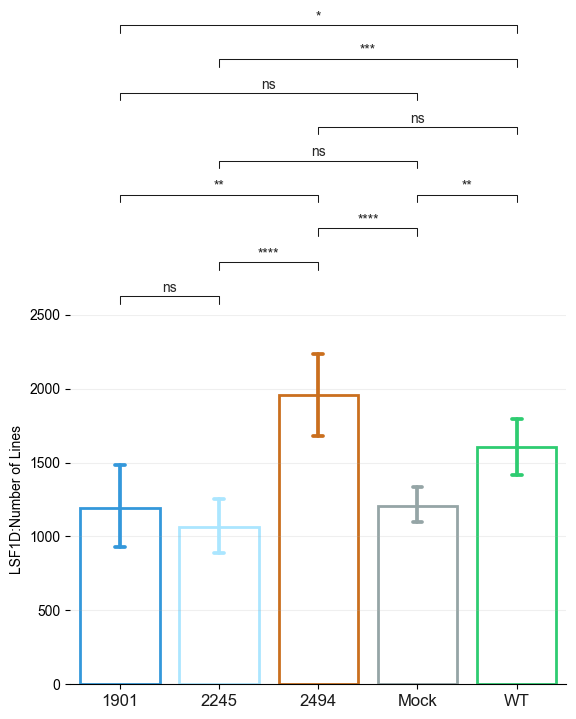

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.435e-01 stat=7.130e-02
2245 v.s. 2494: t-test independent samples, P_val=7.205e-04 stat=-3.718e+00
2494 v.s. Mock: t-test independent samples, P_val=7.570e-05 stat=4.451e+00
Mock v.s. WT: t-test independent samples, P_val=8.446e-04 stat=-3.602e+00
1901 v.s. 2494: t-test independent samples, P_val=5.679e-04 stat=-3.814e+00
2245 v.s. Mock: t-test independent samples, P_val=6.247e-01 stat=-4.924e-01
2494 v.s. WT: t-test independent samples, P_val=6.817e-01 stat=4.145e-01
1901 v.s. Mock: t-test independent samples, P_val=6.745e-01 stat=-4.226e-01
2245 v.s. WT: t-test independent samples, P_val=2.404e-03 stat=-3.252e+00
1901 v.s. WT: t-test independent samples, P_val=2.306e-03 stat=-3.274e+00


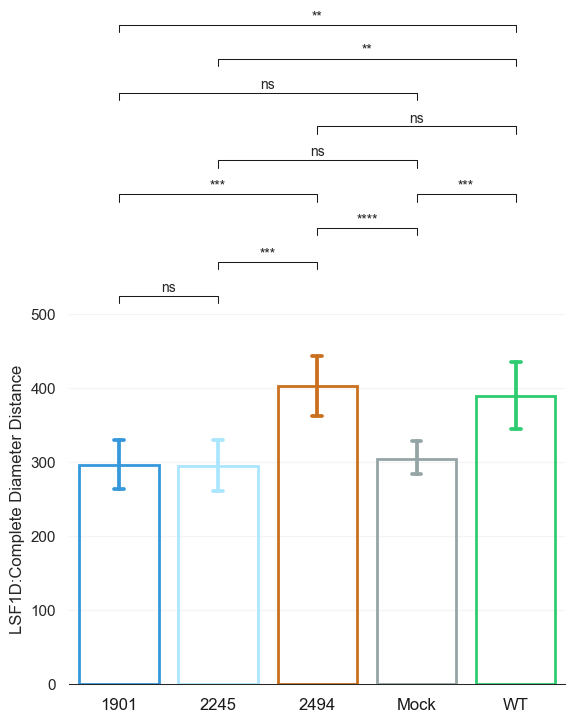

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.594e-01 stat=5.119e-02
2245 v.s. 2494: t-test independent samples, P_val=5.744e-05 stat=-4.594e+00
2494 v.s. Mock: t-test independent samples, P_val=1.077e-06 stat=5.827e+00
Mock v.s. WT: t-test independent samples, P_val=2.676e-04 stat=-3.989e+00
1901 v.s. 2494: t-test independent samples, P_val=7.612e-05 stat=-4.516e+00
2245 v.s. Mock: t-test independent samples, P_val=5.152e-01 stat=-6.557e-01
2494 v.s. WT: t-test independent samples, P_val=1.827e-01 stat=1.366e+00
1901 v.s. Mock: t-test independent samples, P_val=5.607e-01 stat=-5.860e-01
2245 v.s. WT: t-test independent samples, P_val=1.323e-03 stat=-3.467e+00
1901 v.s. WT: t-test independent samples, P_val=1.687e-03 stat=-3.387e+00


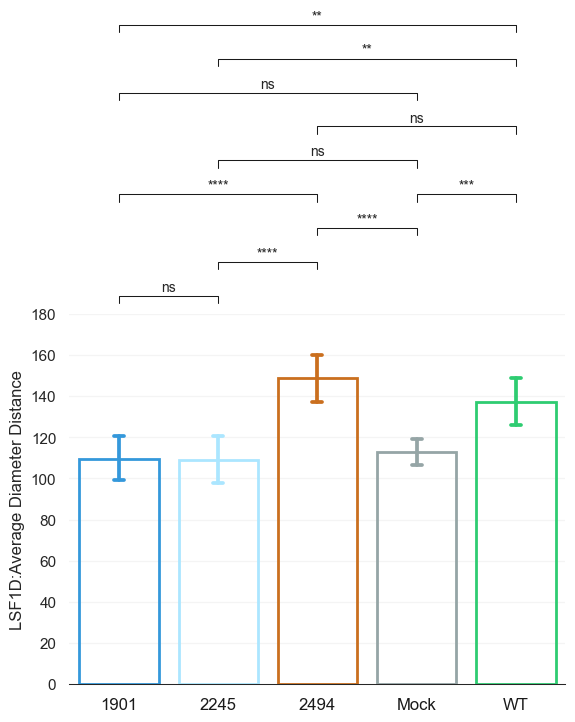

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.867e-05 stat=-4.364e+00
2245 v.s. 2494: t-test independent samples, P_val=1.107e-03 stat=3.564e+00
2494 v.s. Mock: t-test independent samples, P_val=1.853e-01 stat=-1.350e+00
Mock v.s. WT: t-test independent samples, P_val=3.185e-01 stat=-1.010e+00
1901 v.s. 2494: t-test independent samples, P_val=9.342e-01 stat=8.317e-02
2245 v.s. Mock: t-test independent samples, P_val=2.463e-03 stat=3.200e+00
2494 v.s. WT: t-test independent samples, P_val=2.384e-02 stat=-2.390e+00
1901 v.s. Mock: t-test independent samples, P_val=1.306e-01 stat=-1.539e+00
2245 v.s. WT: t-test independent samples, P_val=4.045e-02 stat=2.122e+00
1901 v.s. WT: t-test independent samples, P_val=1.154e-02 stat=-2.658e+00


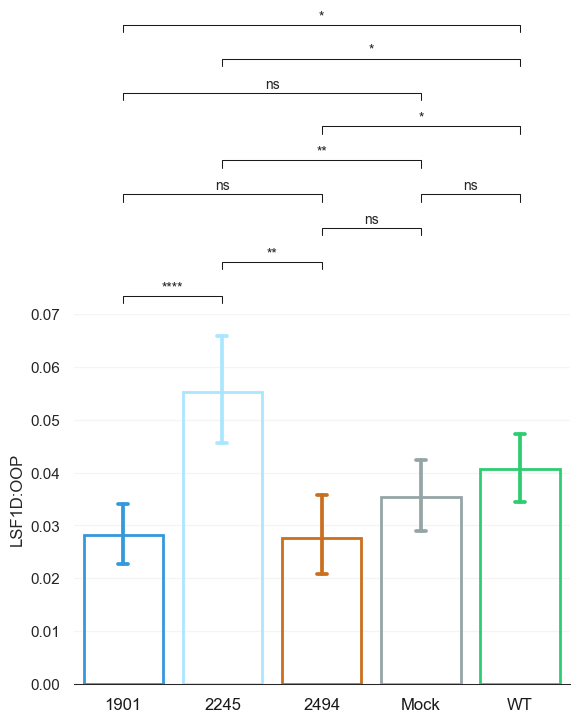

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)
C:\Users\diogo\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\diogo\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\diogo\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\diogo\anaconda3\envs\Cytosk_recentpy\lib\site-packages\scipy\stats\_st

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=1.000e+00 stat=0.000e+00
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


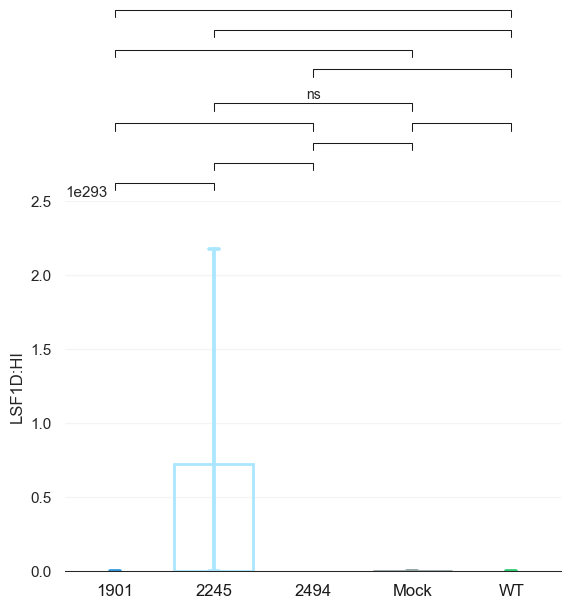

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.483e-01 stat=6.051e-01
2245 v.s. 2494: t-test independent samples, P_val=2.122e-05 stat=-4.929e+00
2494 v.s. Mock: t-test independent samples, P_val=3.732e-06 stat=5.428e+00
Mock v.s. WT: t-test independent samples, P_val=9.725e-04 stat=-3.554e+00
1901 v.s. 2494: t-test independent samples, P_val=1.006e-03 stat=-3.609e+00
2245 v.s. Mock: t-test independent samples, P_val=3.415e-01 stat=-9.610e-01
2494 v.s. WT: t-test independent samples, P_val=5.023e-02 stat=2.046e+00
1901 v.s. Mock: t-test independent samples, P_val=9.467e-01 stat=-6.718e-02
2245 v.s. WT: t-test independent samples, P_val=1.171e-03 stat=-3.510e+00
1901 v.s. WT: t-test independent samples, P_val=2.783e-02 stat=-2.290e+00


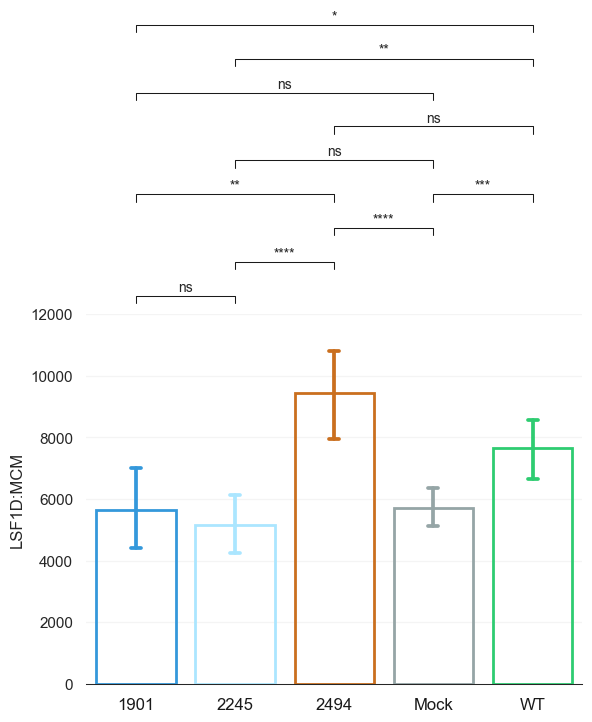

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.331e-01 stat=7.914e-01
2245 v.s. 2494: t-test independent samples, P_val=9.779e-01 stat=-2.786e-02
2494 v.s. Mock: t-test independent samples, P_val=4.791e-01 stat=-7.150e-01
Mock v.s. WT: t-test independent samples, P_val=2.951e-01 stat=1.061e+00
1901 v.s. 2494: t-test independent samples, P_val=5.211e-01 stat=6.486e-01
2245 v.s. Mock: t-test independent samples, P_val=3.735e-01 stat=-8.986e-01
2494 v.s. WT: t-test independent samples, P_val=8.057e-01 stat=2.484e-01
1901 v.s. Mock: t-test independent samples, P_val=8.810e-01 stat=-1.505e-01
2245 v.s. WT: t-test independent samples, P_val=8.102e-01 stat=2.419e-01
1901 v.s. WT: t-test independent samples, P_val=3.181e-01 stat=1.012e+00


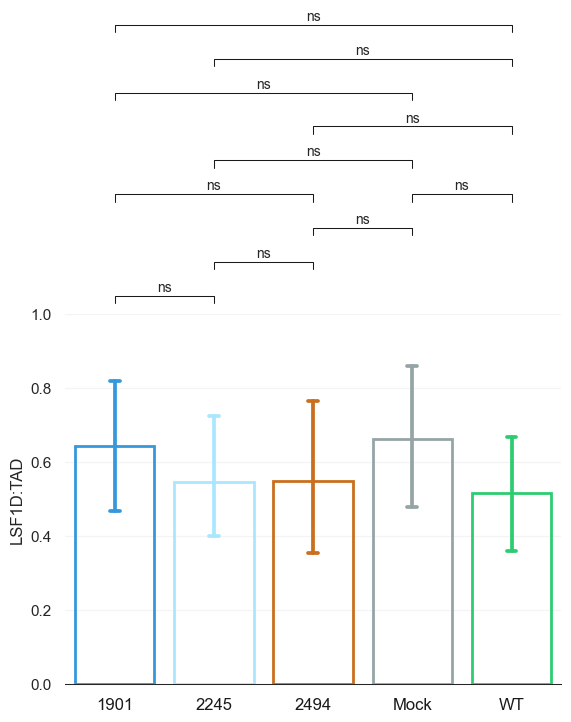

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.177e-01 stat=5.028e-01
2245 v.s. 2494: t-test independent samples, P_val=2.173e-05 stat=-4.921e+00
2494 v.s. Mock: t-test independent samples, P_val=4.102e-06 stat=5.398e+00
Mock v.s. WT: t-test independent samples, P_val=3.032e-03 stat=-3.152e+00
1901 v.s. 2494: t-test independent samples, P_val=6.190e-04 stat=-3.784e+00
2245 v.s. Mock: t-test independent samples, P_val=3.861e-01 stat=-8.748e-01
2494 v.s. WT: t-test independent samples, P_val=2.108e-02 stat=2.444e+00
1901 v.s. Mock: t-test independent samples, P_val=8.965e-01 stat=-1.309e-01
2245 v.s. WT: t-test independent samples, P_val=3.144e-03 stat=-3.154e+00
1901 v.s. WT: t-test independent samples, P_val=4.068e-02 stat=-2.121e+00


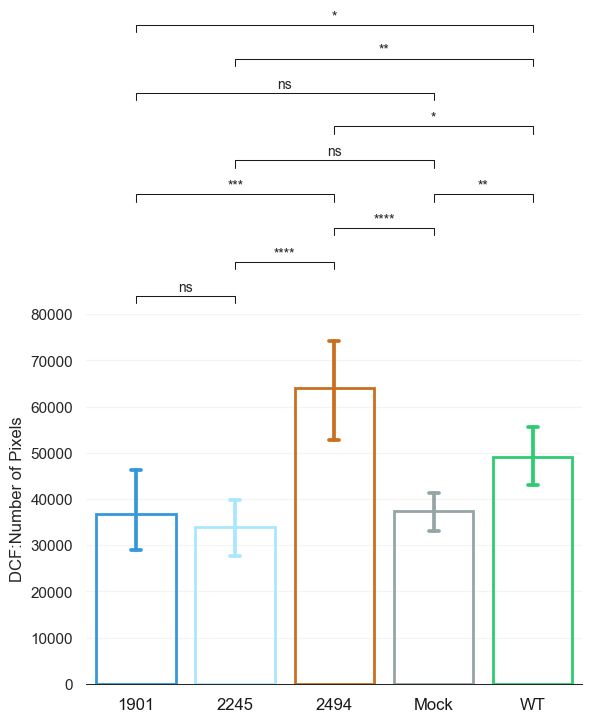

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.177e-01 stat=5.028e-01
2245 v.s. 2494: t-test independent samples, P_val=2.173e-05 stat=-4.921e+00
2494 v.s. Mock: t-test independent samples, P_val=4.102e-06 stat=5.398e+00
Mock v.s. WT: t-test independent samples, P_val=3.032e-03 stat=-3.152e+00
1901 v.s. 2494: t-test independent samples, P_val=6.190e-04 stat=-3.784e+00
2245 v.s. Mock: t-test independent samples, P_val=3.861e-01 stat=-8.748e-01
2494 v.s. WT: t-test independent samples, P_val=2.108e-02 stat=2.444e+00
1901 v.s. Mock: t-test independent samples, P_val=8.965e-01 stat=-1.309e-01
2245 v.s. WT: t-test independent samples, P_val=3.144e-03 stat=-3.154e+00
1901 v.s. WT: t-test independent samples, P_val=4.068e-02 stat=-2.121e+00


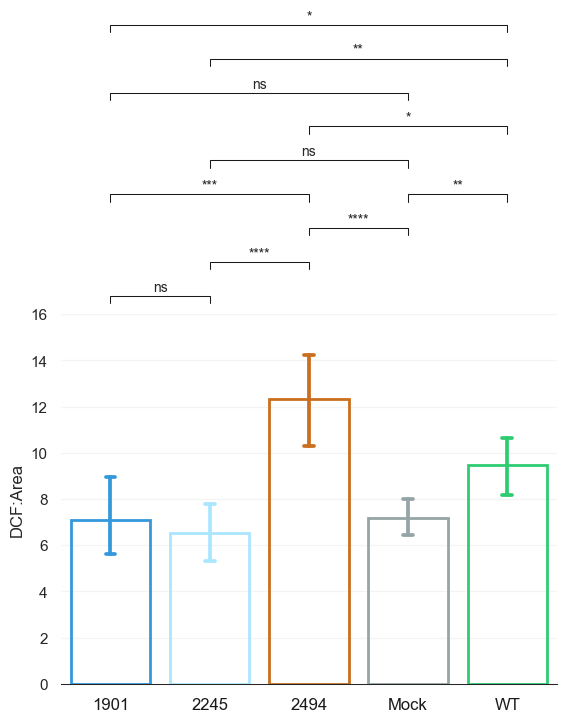

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.838e-01 stat=-2.041e-02
2245 v.s. 2494: t-test independent samples, P_val=1.894e-04 stat=-4.186e+00
2494 v.s. Mock: t-test independent samples, P_val=5.576e-06 stat=5.299e+00
Mock v.s. WT: t-test independent samples, P_val=2.734e-03 stat=-3.189e+00
1901 v.s. 2494: t-test independent samples, P_val=6.893e-04 stat=-3.745e+00
2245 v.s. Mock: t-test independent samples, P_val=9.227e-01 stat=-9.752e-02
2494 v.s. WT: t-test independent samples, P_val=5.080e-02 stat=2.041e+00
1901 v.s. Mock: t-test independent samples, P_val=9.125e-01 stat=-1.105e-01
2245 v.s. WT: t-test independent samples, P_val=1.631e-02 stat=-2.514e+00
1901 v.s. WT: t-test independent samples, P_val=3.089e-02 stat=-2.244e+00


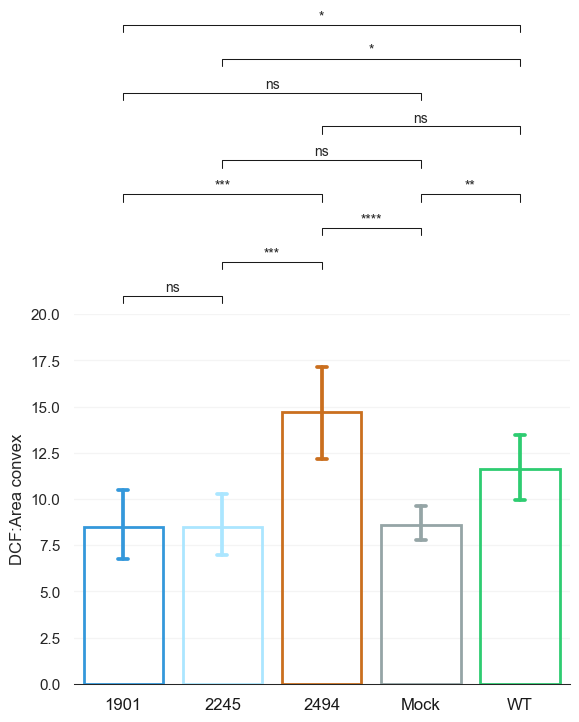

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.807e-02 stat=-1.947e+00
2245 v.s. 2494: t-test independent samples, P_val=1.940e-02 stat=-2.454e+00
2494 v.s. Mock: t-test independent samples, P_val=4.033e-03 stat=3.067e+00
Mock v.s. WT: t-test independent samples, P_val=1.304e-01 stat=-1.544e+00
1901 v.s. 2494: t-test independent samples, P_val=3.221e-05 stat=-4.810e+00
2245 v.s. Mock: t-test independent samples, P_val=6.880e-01 stat=-4.040e-01
2494 v.s. WT: t-test independent samples, P_val=1.308e-01 stat=1.557e+00
1901 v.s. Mock: t-test independent samples, P_val=2.563e-03 stat=-3.190e+00
2245 v.s. WT: t-test independent samples, P_val=1.732e-01 stat=-1.388e+00
1901 v.s. WT: t-test independent samples, P_val=2.825e-04 stat=-4.011e+00


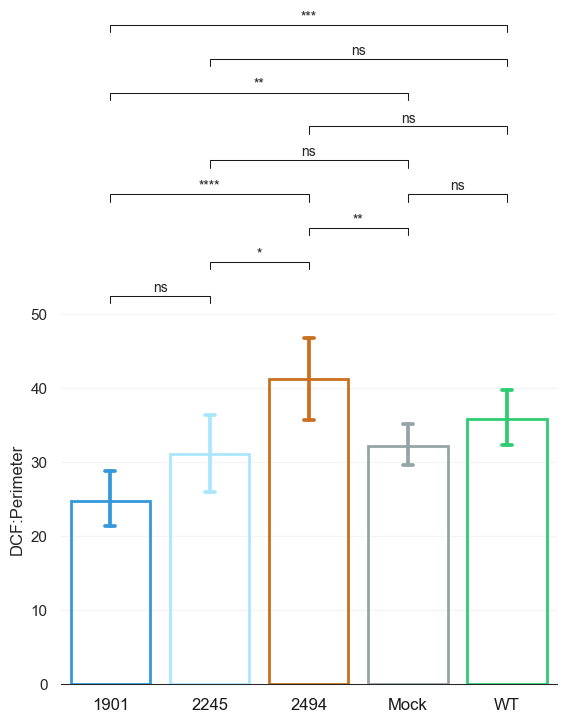

EXCLUDING: DCF:Centroid
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.150e-01 stat=-1.073e-01
2245 v.s. 2494: t-test independent samples, P_val=3.342e-01 stat=9.795e-01
2494 v.s. Mock: t-test independent samples, P_val=2.460e-01 stat=-1.179e+00
Mock v.s. WT: t-test independent samples, P_val=9.622e-01 stat=4.769e-02
1901 v.s. 2494: t-test independent samples, P_val=4.036e-01 stat=8.460e-01
2245 v.s. Mock: t-test independent samples, P_val=7.115e-01 stat=-3.721e-01
2494 v.s. WT: t-test independent samples, P_val=2.754e-01 stat=-1.112e+00


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


1901 v.s. Mock: t-test independent samples, P_val=6.496e-01 stat=-4.572e-01
2245 v.s. WT: t-test independent samples, P_val=7.630e-01 stat=-3.038e-01
1901 v.s. WT: t-test independent samples, P_val=7.028e-01 stat=-3.845e-01


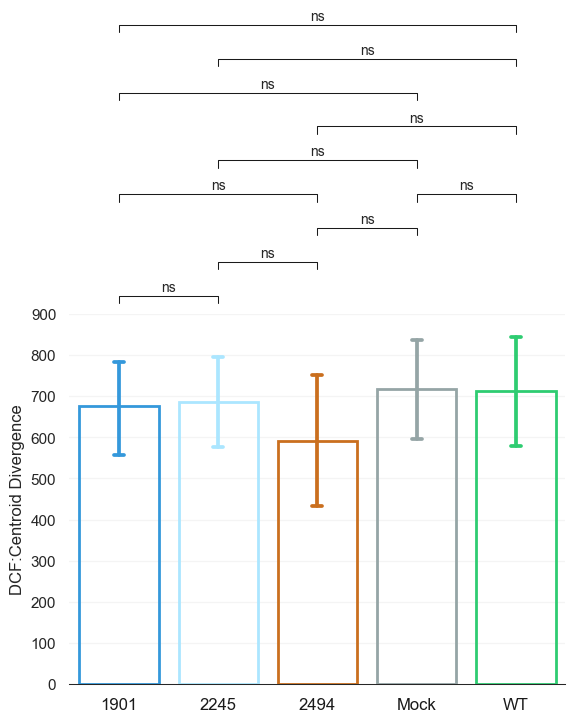

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.250e-01 stat=4.923e-01
2245 v.s. 2494: t-test independent samples, P_val=4.832e-05 stat=-4.652e+00
2494 v.s. Mock: t-test independent samples, P_val=8.746e-06 stat=5.154e+00
Mock v.s. WT: t-test independent samples, P_val=3.462e-03 stat=-3.103e+00
1901 v.s. 2494: t-test independent samples, P_val=3.742e-04 stat=-3.963e+00
2245 v.s. Mock: t-test independent samples, P_val=2.476e-01 stat=-1.171e+00
2494 v.s. WT: t-test independent samples, P_val=3.177e-02 stat=2.260e+00
1901 v.s. Mock: t-test independent samples, P_val=6.244e-01 stat=-4.930e-01
2245 v.s. WT: t-test independent samples, P_val=2.642e-03 stat=-3.218e+00
1901 v.s. WT: t-test independent samples, P_val=1.639e-02 stat=-2.515e+00


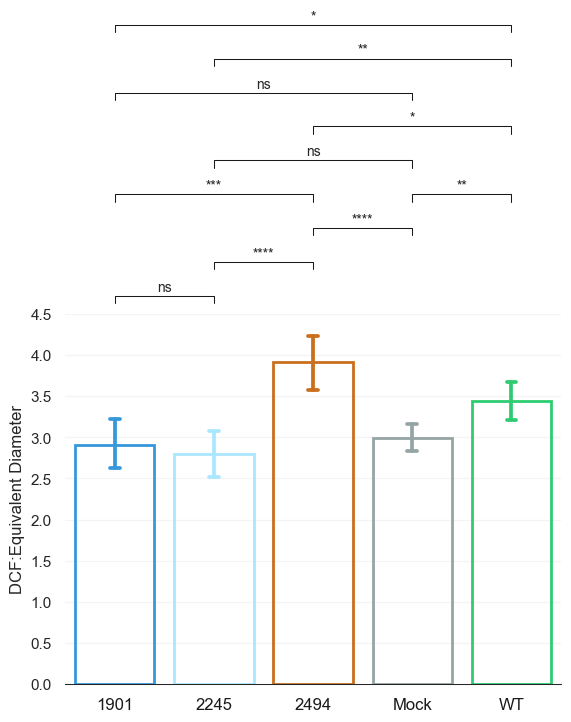

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.013e-01 stat=8.476e-01
2245 v.s. 2494: t-test independent samples, P_val=8.864e-01 stat=-1.439e-01
2494 v.s. Mock: t-test independent samples, P_val=2.373e-01 stat=-1.201e+00
Mock v.s. WT: t-test independent samples, P_val=4.427e-02 stat=2.075e+00
1901 v.s. 2494: t-test independent samples, P_val=5.728e-01 stat=5.695e-01
2245 v.s. Mock: t-test independent samples, P_val=1.122e-01 stat=-1.619e+00
2494 v.s. WT: t-test independent samples, P_val=5.723e-01 stat=5.714e-01
1901 v.s. Mock: t-test independent samples, P_val=4.620e-01 stat=-7.418e-01
2245 v.s. WT: t-test independent samples, P_val=6.258e-01 stat=4.916e-01
1901 v.s. WT: t-test independent samples, P_val=1.922e-01 stat=1.328e+00


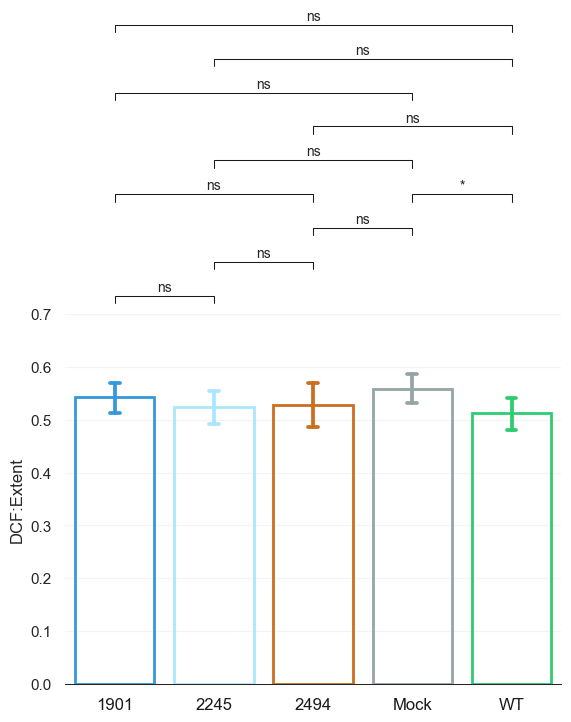

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.529e-01 stat=5.945e-02
2245 v.s. 2494: t-test independent samples, P_val=2.329e-04 stat=-4.115e+00
2494 v.s. Mock: t-test independent samples, P_val=8.042e-06 stat=5.181e+00
Mock v.s. WT: t-test independent samples, P_val=3.645e-04 stat=-3.886e+00
1901 v.s. 2494: t-test independent samples, P_val=1.820e-04 stat=-4.215e+00
2245 v.s. Mock: t-test independent samples, P_val=7.951e-01 stat=-2.612e-01
2494 v.s. WT: t-test independent samples, P_val=5.561e-01 stat=5.957e-01
1901 v.s. Mock: t-test independent samples, P_val=8.455e-01 stat=-1.960e-01
2245 v.s. WT: t-test independent samples, P_val=1.879e-03 stat=-3.341e+00
1901 v.s. WT: t-test independent samples, P_val=1.840e-03 stat=-3.356e+00


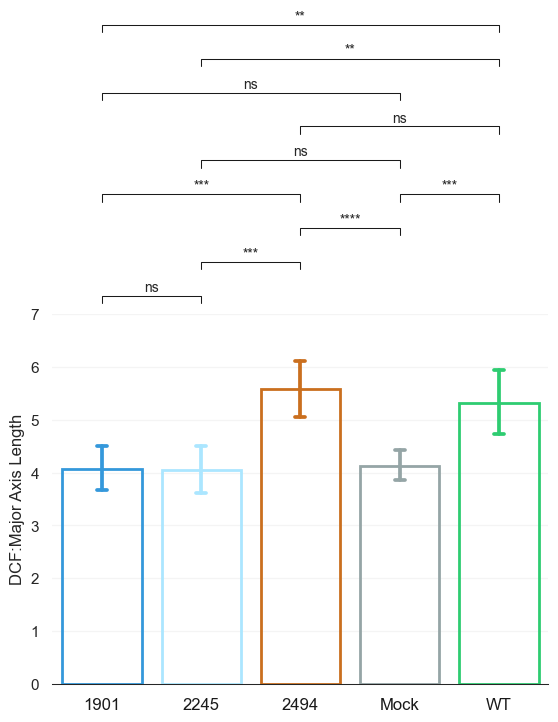

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.945e-01 stat=6.975e-03
2245 v.s. 2494: t-test independent samples, P_val=7.856e-04 stat=-3.687e+00
2494 v.s. Mock: t-test independent samples, P_val=1.288e-03 stat=3.484e+00
Mock v.s. WT: t-test independent samples, P_val=3.183e-01 stat=-1.010e+00
1901 v.s. 2494: t-test independent samples, P_val=2.881e-03 stat=-3.219e+00
2245 v.s. Mock: t-test independent samples, P_val=3.608e-01 stat=-9.228e-01
2494 v.s. WT: t-test independent samples, P_val=2.676e-02 stat=2.338e+00
1901 v.s. Mock: t-test independent samples, P_val=4.340e-01 stat=-7.892e-01
2245 v.s. WT: t-test independent samples, P_val=1.030e-01 stat=-1.671e+00
1901 v.s. WT: t-test independent samples, P_val=1.658e-01 stat=-1.414e+00


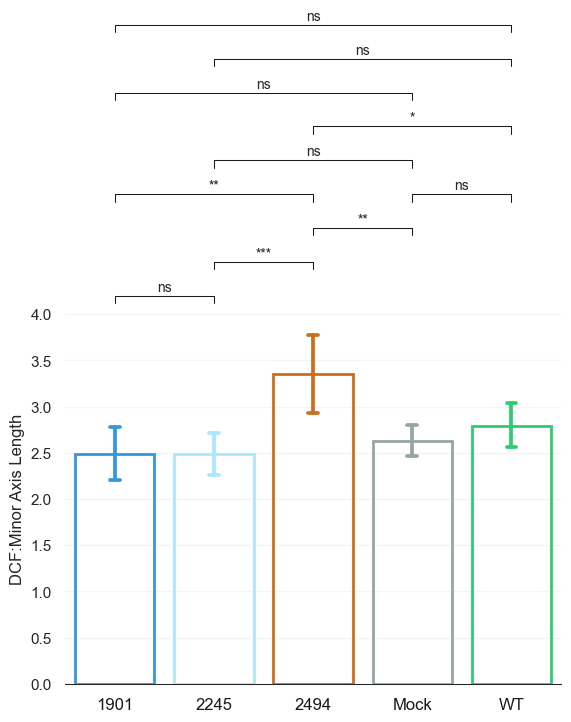

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.352e-01 stat=-8.181e-02
2245 v.s. 2494: t-test independent samples, P_val=1.241e-03 stat=-3.523e+00
2494 v.s. Mock: t-test independent samples, P_val=3.148e-05 stat=4.739e+00
Mock v.s. WT: t-test independent samples, P_val=2.260e-05 stat=-4.781e+00
1901 v.s. 2494: t-test independent samples, P_val=5.133e-04 stat=-3.850e+00
2245 v.s. Mock: t-test independent samples, P_val=5.454e-01 stat=6.090e-01
2494 v.s. WT: t-test independent samples, P_val=8.363e-01 stat=-2.086e-01
1901 v.s. Mock: t-test independent samples, P_val=5.815e-01 stat=5.551e-01
2245 v.s. WT: t-test independent samples, P_val=6.652e-04 stat=-3.708e+00
1901 v.s. WT: t-test independent samples, P_val=3.476e-04 stat=-3.940e+00


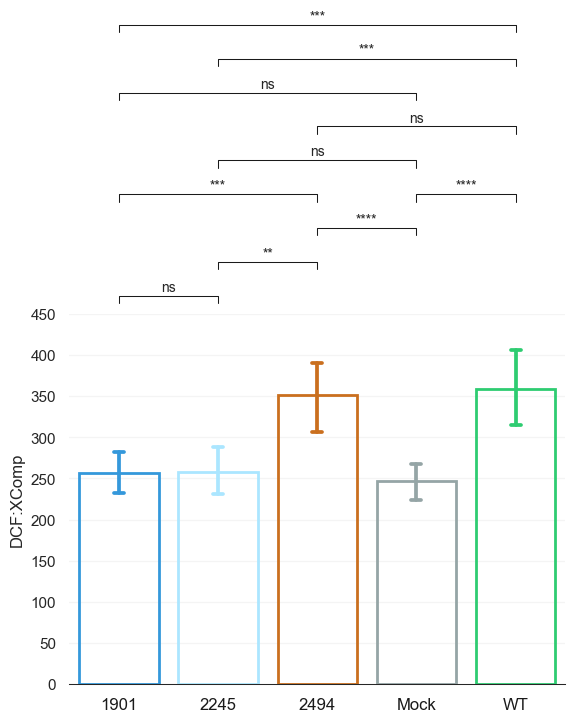

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.447e-01 stat=4.645e-01
2245 v.s. 2494: t-test independent samples, P_val=2.241e-04 stat=-4.128e+00
2494 v.s. Mock: t-test independent samples, P_val=2.501e-03 stat=3.244e+00
Mock v.s. WT: t-test independent samples, P_val=9.959e-01 stat=-5.220e-03
1901 v.s. 2494: t-test independent samples, P_val=1.983e-03 stat=-3.360e+00
2245 v.s. Mock: t-test independent samples, P_val=1.063e-01 stat=-1.647e+00
2494 v.s. WT: t-test independent samples, P_val=9.739e-03 stat=2.774e+00
1901 v.s. Mock: t-test independent samples, P_val=3.217e-01 stat=-1.002e+00
2245 v.s. WT: t-test independent samples, P_val=1.722e-01 stat=-1.391e+00
1901 v.s. WT: t-test independent samples, P_val=4.045e-01 stat=-8.433e-01


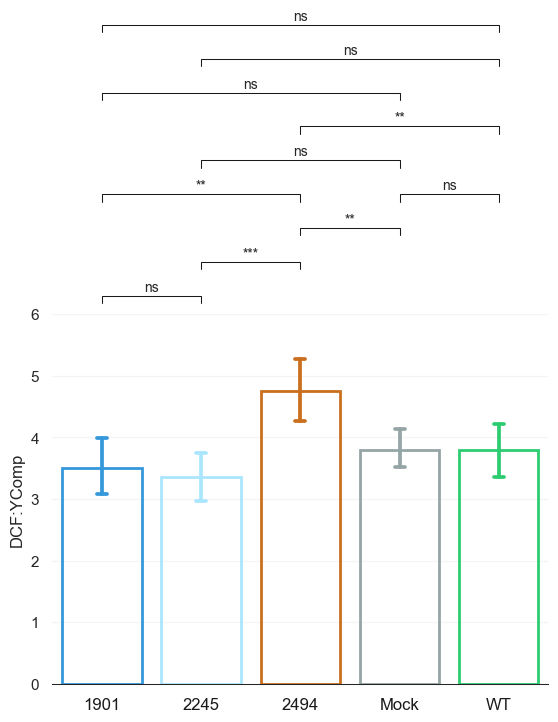

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.481e-01 stat=7.656e-01
2245 v.s. 2494: t-test independent samples, P_val=1.476e-01 stat=1.482e+00
2494 v.s. Mock: t-test independent samples, P_val=7.048e-01 stat=3.817e-01
Mock v.s. WT: t-test independent samples, P_val=2.300e-01 stat=-1.218e+00
1901 v.s. 2494: t-test independent samples, P_val=2.916e-02 stat=2.281e+00
2245 v.s. Mock: t-test independent samples, P_val=3.172e-02 stat=2.214e+00
2494 v.s. WT: t-test independent samples, P_val=4.972e-01 stat=-6.879e-01
1901 v.s. Mock: t-test independent samples, P_val=3.710e-03 stat=3.058e+00
2245 v.s. WT: t-test independent samples, P_val=3.460e-01 stat=9.541e-01
1901 v.s. WT: t-test independent samples, P_val=7.167e-02 stat=1.854e+00


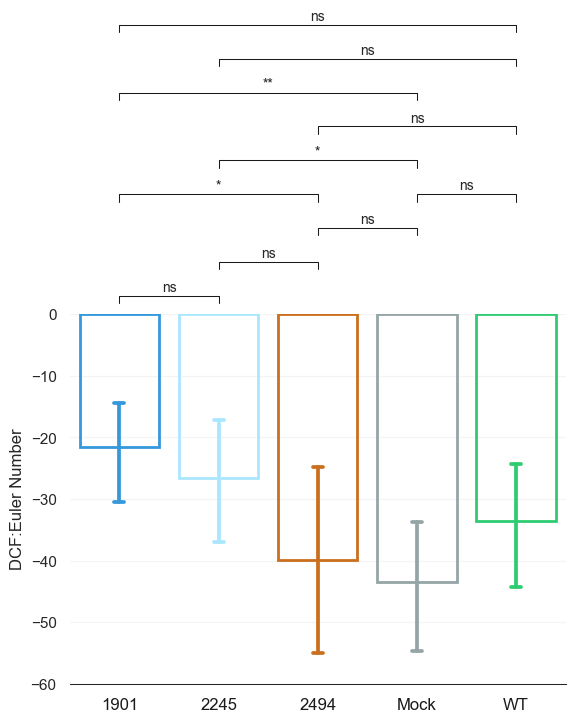

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.595e-01 stat=3.081e-01


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


2245 v.s. 2494: t-test independent samples, P_val=9.863e-01 stat=-1.735e-02
2494 v.s. Mock: t-test independent samples, P_val=7.497e-01 stat=3.215e-01
Mock v.s. WT: t-test independent samples, P_val=6.284e-02 stat=-1.912e+00
1901 v.s. 2494: t-test independent samples, P_val=8.343e-01 stat=2.109e-01
2245 v.s. Mock: t-test independent samples, P_val=6.859e-01 stat=4.070e-01
2494 v.s. WT: t-test independent samples, P_val=3.151e-01 stat=-1.023e+00
1901 v.s. Mock: t-test independent samples, P_val=4.532e-01 stat=7.566e-01
2245 v.s. WT: t-test independent samples, P_val=1.688e-01 stat=-1.403e+00
1901 v.s. WT: t-test independent samples, P_val=2.498e-01 stat=-1.169e+00


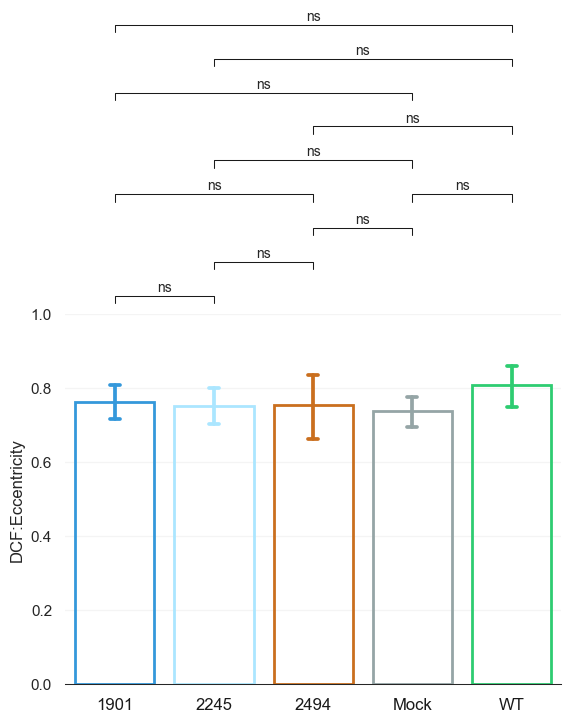

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.955e-04 stat=3.939e+00
2245 v.s. 2494: t-test independent samples, P_val=8.673e-01 stat=1.684e-01
2494 v.s. Mock: t-test independent samples, P_val=5.868e-01 stat=5.483e-01
Mock v.s. WT: t-test independent samples, P_val=5.117e-01 stat=-6.620e-01
1901 v.s. 2494: t-test independent samples, P_val=1.427e-04 stat=4.300e+00
2245 v.s. Mock: t-test independent samples, P_val=5.083e-01 stat=6.666e-01
2494 v.s. WT: t-test independent samples, P_val=9.645e-01 stat=-4.491e-02
1901 v.s. Mock: t-test independent samples, P_val=3.157e-07 stat=5.975e+00
2245 v.s. WT: t-test independent samples, P_val=8.739e-01 stat=1.598e-01
1901 v.s. WT: t-test independent samples, P_val=2.404e-05 stat=4.827e+00


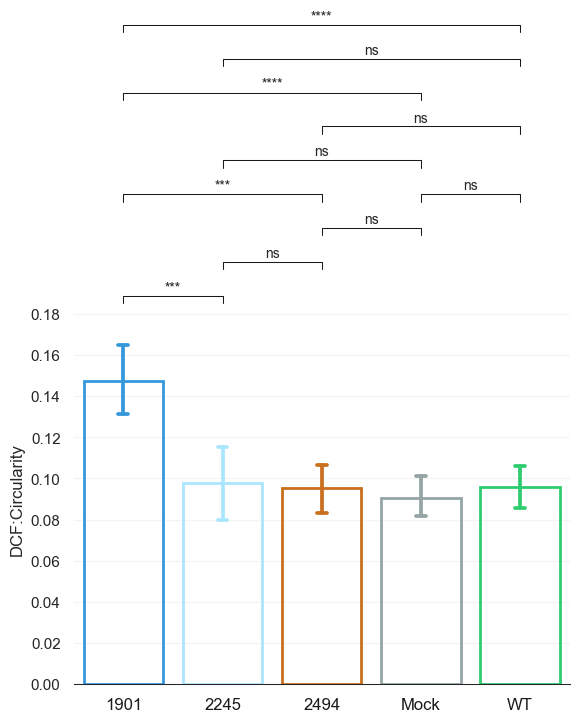

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.216e-01 stat=8.114e-01
2245 v.s. 2494: t-test independent samples, P_val=7.780e-01 stat=-2.841e-01
2494 v.s. Mock: t-test independent samples, P_val=4.269e-01 stat=-8.034e-01
Mock v.s. WT: t-test independent samples, P_val=1.817e-02 stat=2.461e+00
1901 v.s. 2494: t-test independent samples, P_val=7.403e-01 stat=3.342e-01
2245 v.s. Mock: t-test independent samples, P_val=1.552e-01 stat=-1.445e+00
2494 v.s. WT: t-test independent samples, P_val=2.540e-01 stat=1.165e+00
1901 v.s. Mock: t-test independent samples, P_val=5.551e-01 stat=-5.945e-01
2245 v.s. WT: t-test independent samples, P_val=2.270e-01 stat=1.228e+00
1901 v.s. WT: t-test independent samples, P_val=6.695e-02 stat=1.888e+00


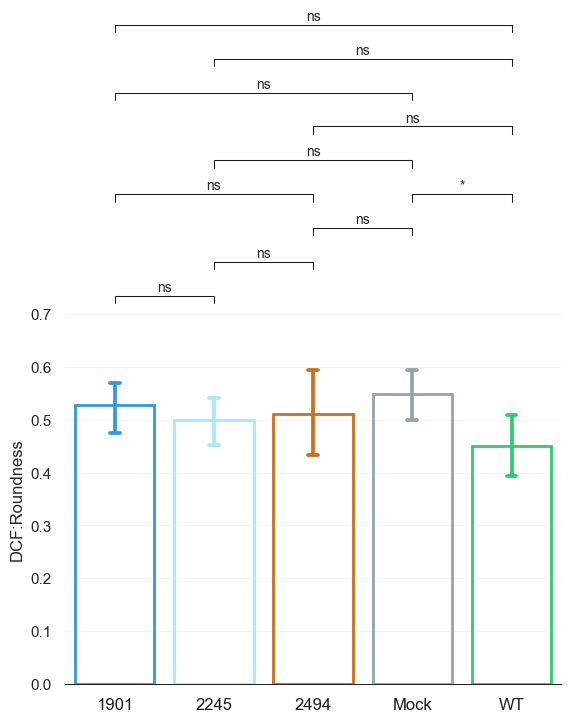

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.271e-01 stat=3.513e-01
2245 v.s. 2494: t-test independent samples, P_val=5.324e-01 stat=-6.307e-01
2494 v.s. Mock: t-test independent samples, P_val=3.957e-01 stat=8.593e-01
Mock v.s. WT: t-test independent samples, P_val=3.812e-02 stat=-2.143e+00
1901 v.s. 2494: t-test independent samples, P_val=7.739e-01 stat=-2.896e-01
2245 v.s. Mock: t-test independent samples, P_val=7.470e-01 stat=3.245e-01
2494 v.s. WT: t-test independent samples, P_val=3.171e-01 stat=-1.019e+00
1901 v.s. Mock: t-test independent samples, P_val=5.249e-01 stat=6.407e-01
2245 v.s. WT: t-test independent samples, P_val=6.351e-02 stat=-1.911e+00
1901 v.s. WT: t-test independent samples, P_val=1.438e-01 stat=-1.493e+00


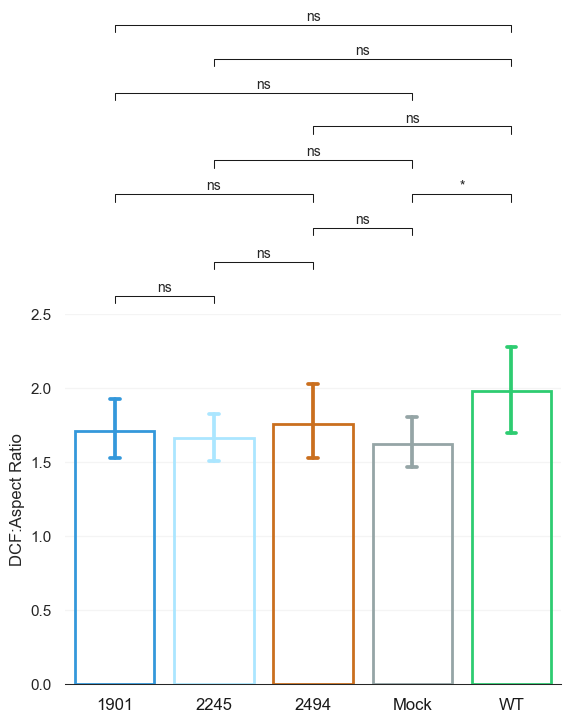

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.565e-01 stat=1.442e+00
2245 v.s. 2494: t-test independent samples, P_val=4.349e-01 stat=-7.902e-01
2494 v.s. Mock: t-test independent samples, P_val=5.993e-01 stat=-5.300e-01
Mock v.s. WT: t-test independent samples, P_val=6.549e-01 stat=4.502e-01
1901 v.s. 2494: t-test independent samples, P_val=6.836e-01 stat=4.112e-01
2245 v.s. Mock: t-test independent samples, P_val=1.167e-01 stat=-1.598e+00
2494 v.s. WT: t-test independent samples, P_val=8.601e-01 stat=-1.779e-01
1901 v.s. Mock: t-test independent samples, P_val=8.840e-01 stat=-1.468e-01
2245 v.s. WT: t-test independent samples, P_val=2.370e-01 stat=-1.201e+00
1901 v.s. WT: t-test independent samples, P_val=7.597e-01 stat=3.082e-01


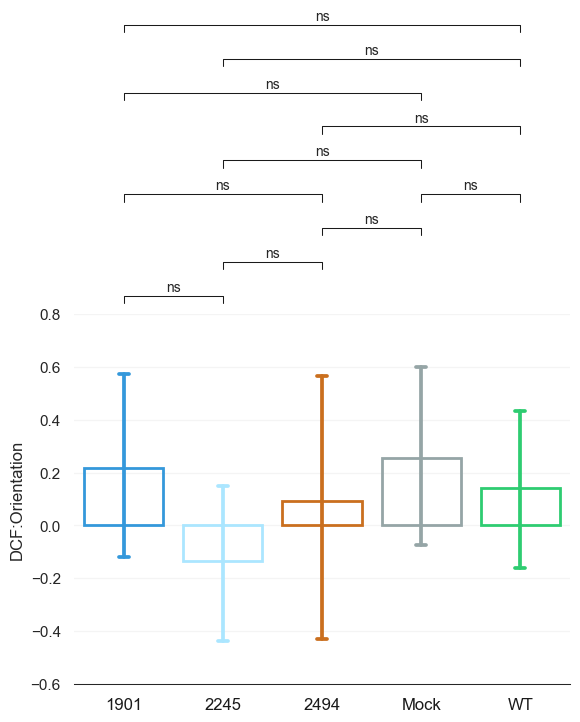

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.072e-04 stat=4.055e+00
2245 v.s. 2494: t-test independent samples, P_val=1.560e-03 stat=-3.439e+00
2494 v.s. Mock: t-test independent samples, P_val=9.067e-01 stat=-1.180e-01
Mock v.s. WT: t-test independent samples, P_val=3.329e-01 stat=9.798e-01
1901 v.s. 2494: t-test independent samples, P_val=9.198e-01 stat=-1.015e-01
2245 v.s. Mock: t-test independent samples, P_val=4.358e-05 stat=-4.507e+00
2494 v.s. WT: t-test independent samples, P_val=4.908e-01 stat=6.982e-01
1901 v.s. Mock: t-test independent samples, P_val=7.968e-01 stat=-2.589e-01
2245 v.s. WT: t-test independent samples, P_val=1.141e-02 stat=-2.659e+00
1901 v.s. WT: t-test independent samples, P_val=4.658e-01 stat=7.369e-01


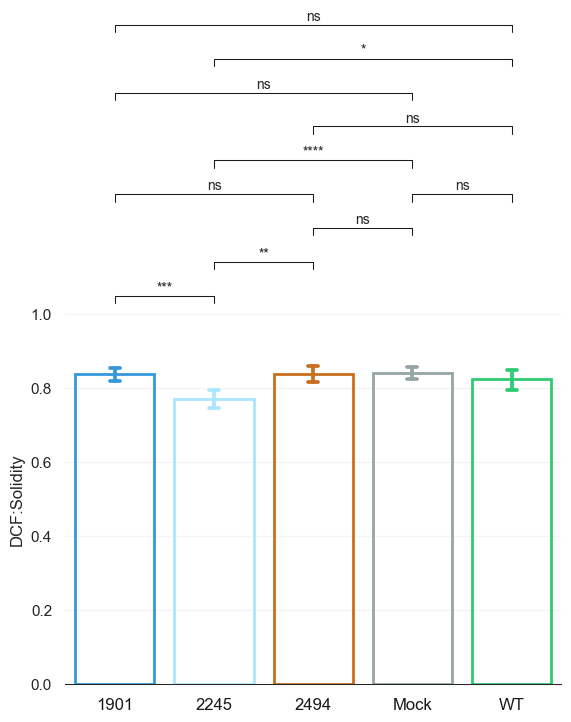

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


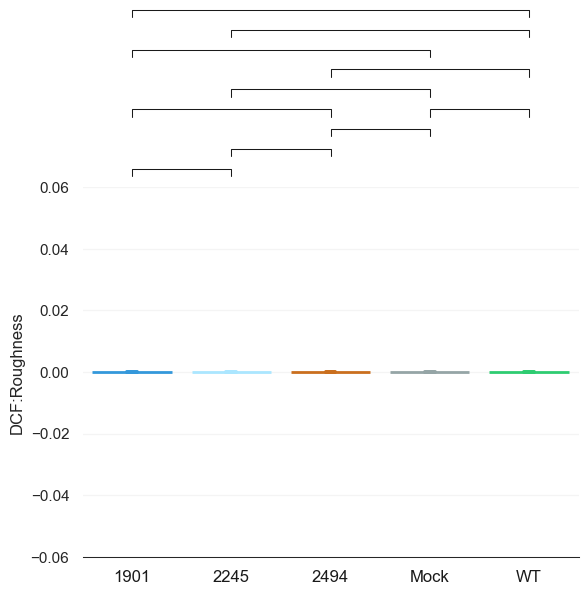

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.827e-02 stat=-2.033e+00
2245 v.s. 2494: t-test independent samples, P_val=1.618e-02 stat=-2.531e+00
2494 v.s. Mock: t-test independent samples, P_val=1.812e-03 stat=3.361e+00
Mock v.s. WT: t-test independent samples, P_val=9.903e-02 stat=-1.688e+00
1901 v.s. 2494: t-test independent samples, P_val=1.841e-05 stat=-5.001e+00
2245 v.s. Mock: t-test independent samples, P_val=7.815e-01 stat=-2.789e-01
2494 v.s. WT: t-test independent samples, P_val=1.004e-01 stat=1.699e+00
1901 v.s. Mock: t-test independent samples, P_val=2.455e-03 stat=-3.205e+00
2245 v.s. WT: t-test independent samples, P_val=1.839e-01 stat=-1.353e+00
1901 v.s. WT: t-test independent samples, P_val=2.226e-04 stat=-4.091e+00


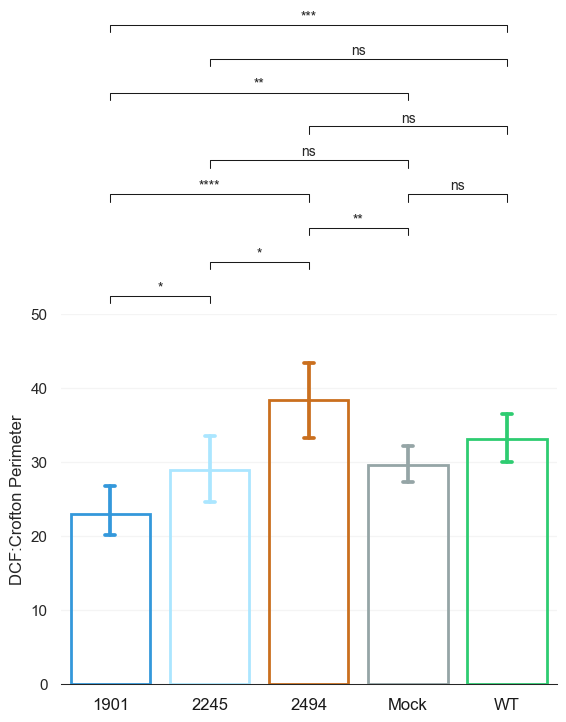

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.347e-02 stat=1.986e+00
2245 v.s. 2494: t-test independent samples, P_val=4.741e-02 stat=2.057e+00
2494 v.s. Mock: t-test independent samples, P_val=2.699e-03 stat=-3.216e+00
Mock v.s. WT: t-test independent samples, P_val=6.342e-01 stat=-4.793e-01
1901 v.s. 2494: t-test independent samples, P_val=1.302e-03 stat=3.515e+00
2245 v.s. Mock: t-test independent samples, P_val=2.896e-01 stat=-1.071e+00
2494 v.s. WT: t-test independent samples, P_val=1.581e-03 stat=-3.499e+00
1901 v.s. Mock: t-test independent samples, P_val=2.311e-01 stat=1.214e+00
2245 v.s. WT: t-test independent samples, P_val=1.635e-01 stat=-1.421e+00
1901 v.s. WT: t-test independent samples, P_val=4.675e-01 stat=7.342e-01


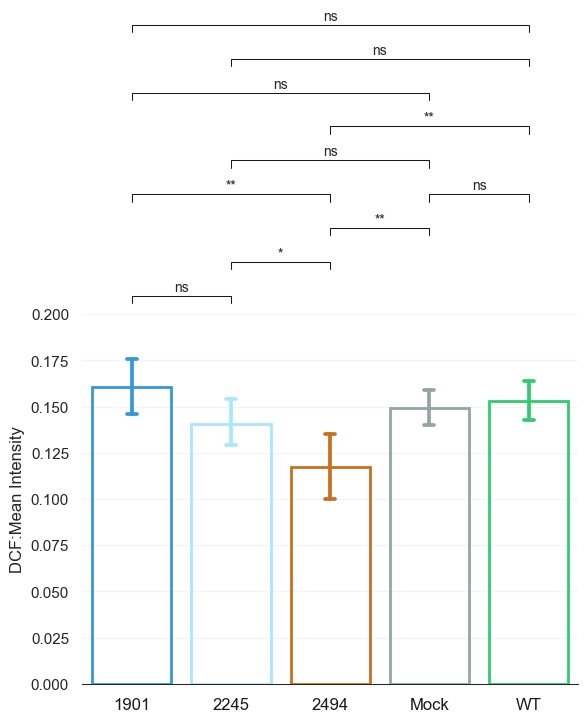

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.131e-01 stat=-5.093e-01
2245 v.s. 2494: t-test independent samples, P_val=4.463e-03 stat=3.046e+00
2494 v.s. Mock: t-test independent samples, P_val=3.063e-04 stat=-3.983e+00
Mock v.s. WT: t-test independent samples, P_val=8.910e-02 stat=1.741e+00
1901 v.s. 2494: t-test independent samples, P_val=1.839e-02 stat=2.481e+00
2245 v.s. Mock: t-test independent samples, P_val=6.969e-01 stat=-3.920e-01
2494 v.s. WT: t-test independent samples, P_val=4.297e-02 stat=-2.120e+00
1901 v.s. Mock: t-test independent samples, P_val=3.403e-01 stat=-9.637e-01
2245 v.s. WT: t-test independent samples, P_val=2.651e-01 stat=1.131e+00
1901 v.s. WT: t-test independent samples, P_val=5.607e-01 stat=5.872e-01


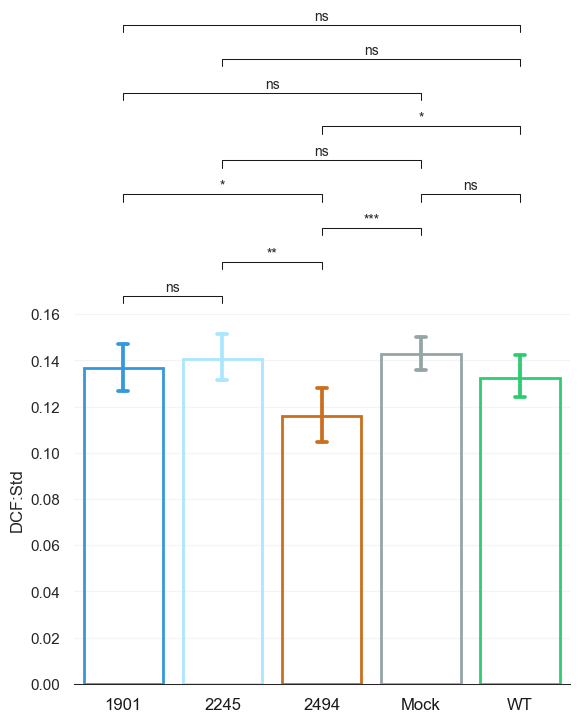

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.505e-01 stat=-4.562e-01
2245 v.s. 2494: t-test independent samples, P_val=9.787e-03 stat=2.737e+00
2494 v.s. Mock: t-test independent samples, P_val=9.890e-04 stat=-3.578e+00
Mock v.s. WT: t-test independent samples, P_val=1.110e-01 stat=1.629e+00
1901 v.s. 2494: t-test independent samples, P_val=2.647e-02 stat=2.323e+00
2245 v.s. Mock: t-test independent samples, P_val=7.980e-01 stat=-2.574e-01
2494 v.s. WT: t-test independent samples, P_val=6.667e-02 stat=-1.908e+00
1901 v.s. Mock: t-test independent samples, P_val=4.345e-01 stat=-7.884e-01
2245 v.s. WT: t-test independent samples, P_val=2.672e-01 stat=1.126e+00
1901 v.s. WT: t-test independent samples, P_val=5.113e-01 stat=6.632e-01


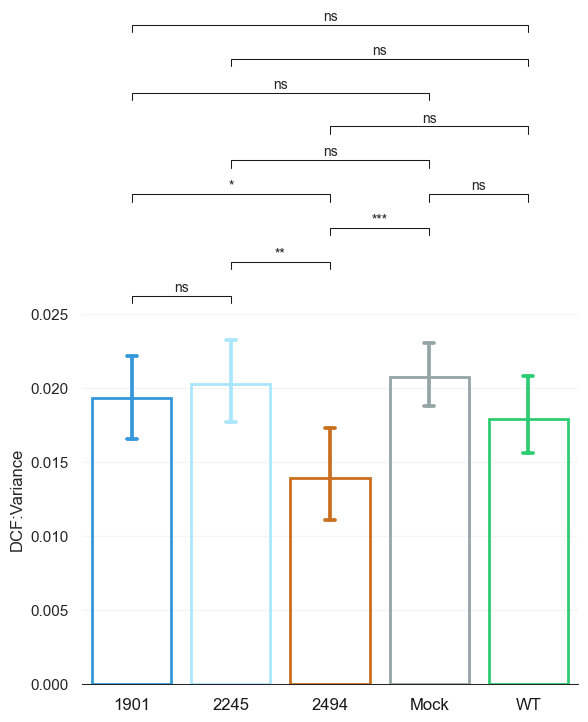

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.736e-03 stat=-3.341e+00
2245 v.s. 2494: t-test independent samples, P_val=1.359e-02 stat=-2.603e+00
2494 v.s. Mock: t-test independent samples, P_val=3.341e-04 stat=3.954e+00
Mock v.s. WT: t-test independent samples, P_val=7.182e-03 stat=2.830e+00
1901 v.s. 2494: t-test independent samples, P_val=4.726e-05 stat=-4.680e+00
2245 v.s. Mock: t-test independent samples, P_val=1.677e-01 stat=1.401e+00
2494 v.s. WT: t-test independent samples, P_val=1.812e-05 stat=5.156e+00
1901 v.s. Mock: t-test independent samples, P_val=1.355e-02 stat=-2.568e+00
2245 v.s. WT: t-test independent samples, P_val=8.023e-04 stat=3.643e+00
1901 v.s. WT: t-test independent samples, P_val=7.924e-01 stat=-2.652e-01


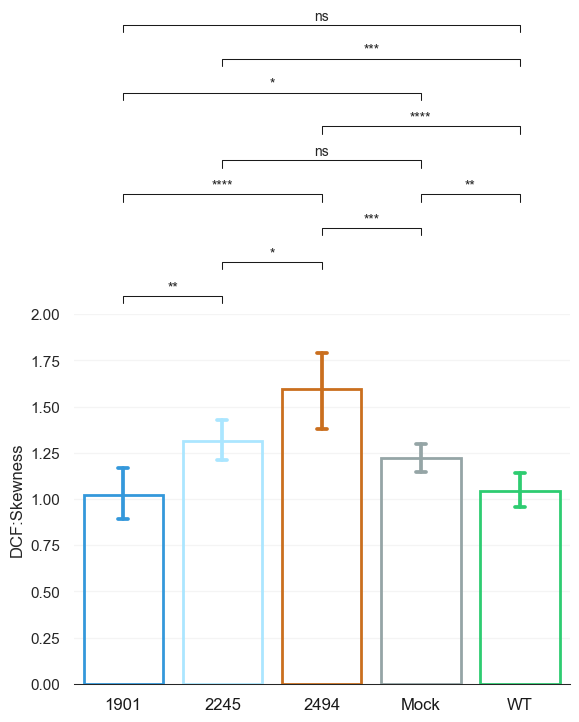

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.588e-01 stat=-1.434e+00
2245 v.s. 2494: t-test independent samples, P_val=1.112e-03 stat=-3.562e+00
2494 v.s. Mock: t-test independent samples, P_val=6.007e-05 stat=4.528e+00
Mock v.s. WT: t-test independent samples, P_val=7.483e-03 stat=2.814e+00
1901 v.s. 2494: t-test independent samples, P_val=5.345e-04 stat=-3.836e+00
2245 v.s. Mock: t-test independent samples, P_val=6.172e-01 stat=5.031e-01
2494 v.s. WT: t-test independent samples, P_val=1.233e-05 stat=5.297e+00
1901 v.s. Mock: t-test independent samples, P_val=2.083e-01 stat=-1.276e+00
2245 v.s. WT: t-test independent samples, P_val=1.378e-02 stat=2.583e+00
1901 v.s. WT: t-test independent samples, P_val=6.928e-01 stat=3.981e-01


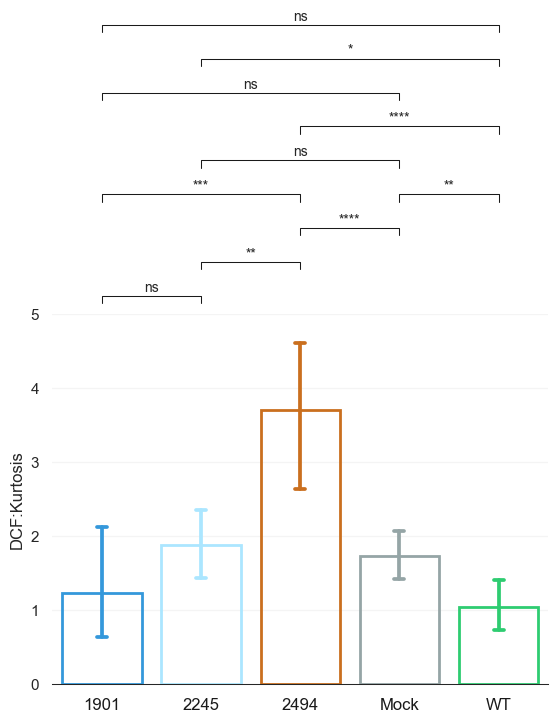

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)
C:\Users\diogo\anaconda3\envs\Cytosk_recentpy\lib\site-packages\statannot\statannot.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = stats.ttest_ind(a=box_data1, b=box_data2, **stats_params)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


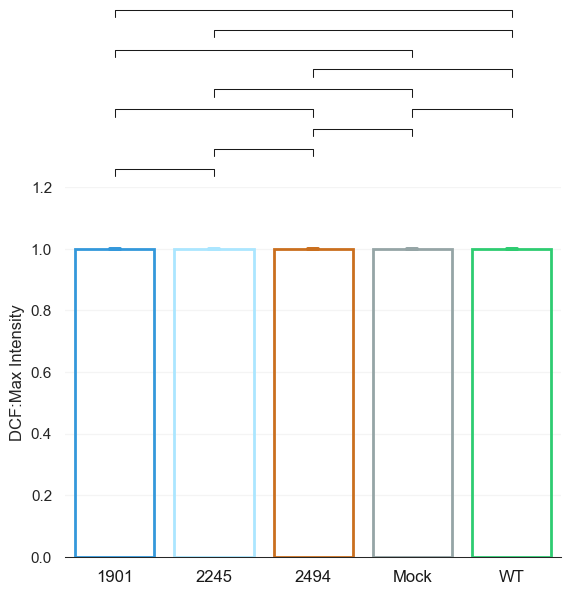

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.528e-01 stat=1.159e+00
2245 v.s. 2494: t-test independent samples, P_val=1.397e-02 stat=2.592e+00
2494 v.s. Mock: t-test independent samples, P_val=7.922e-02 stat=1.805e+00
Mock v.s. WT: t-test independent samples, P_val=1.533e-10 stat=-8.466e+00
1901 v.s. 2494: t-test independent samples, P_val=1.222e-02 stat=2.652e+00
2245 v.s. Mock: t-test independent samples, P_val=4.421e-05 stat=4.503e+00
2494 v.s. WT: t-test independent samples, P_val=5.627e-06 stat=-5.585e+00
1901 v.s. Mock: t-test independent samples, P_val=8.200e-05 stat=4.322e+00
2245 v.s. WT: t-test independent samples, P_val=2.307e-04 stat=-4.068e+00
1901 v.s. WT: t-test independent samples, P_val=2.988e-02 stat=-2.259e+00


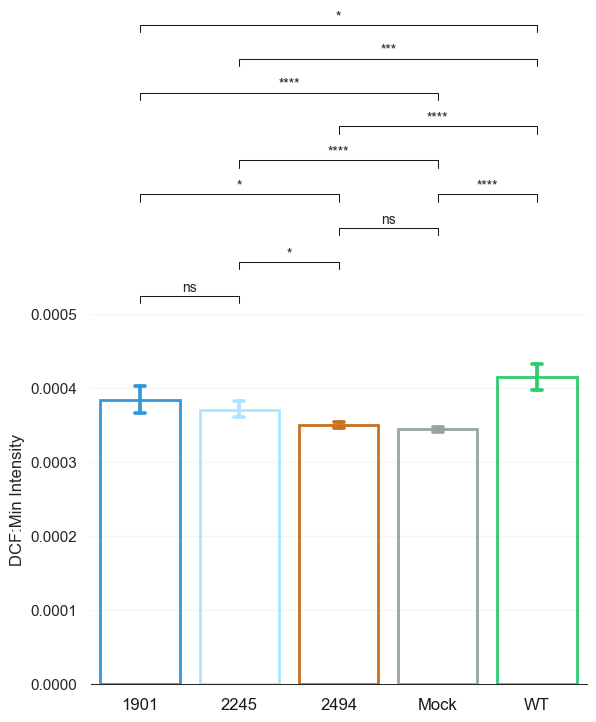

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.467e-01 stat=6.076e-01
2245 v.s. 2494: t-test independent samples, P_val=1.523e-05 stat=-5.040e+00
2494 v.s. Mock: t-test independent samples, P_val=3.942e-06 stat=5.411e+00
Mock v.s. WT: t-test independent samples, P_val=2.941e-03 stat=-3.163e+00
1901 v.s. 2494: t-test independent samples, P_val=5.652e-04 stat=-3.816e+00
2245 v.s. Mock: t-test independent samples, P_val=2.468e-01 stat=-1.173e+00
2494 v.s. WT: t-test independent samples, P_val=2.603e-02 stat=2.350e+00
1901 v.s. Mock: t-test independent samples, P_val=7.933e-01 stat=-2.636e-01
2245 v.s. WT: t-test independent samples, P_val=1.745e-03 stat=-3.368e+00
1901 v.s. WT: t-test independent samples, P_val=3.101e-02 stat=-2.242e+00


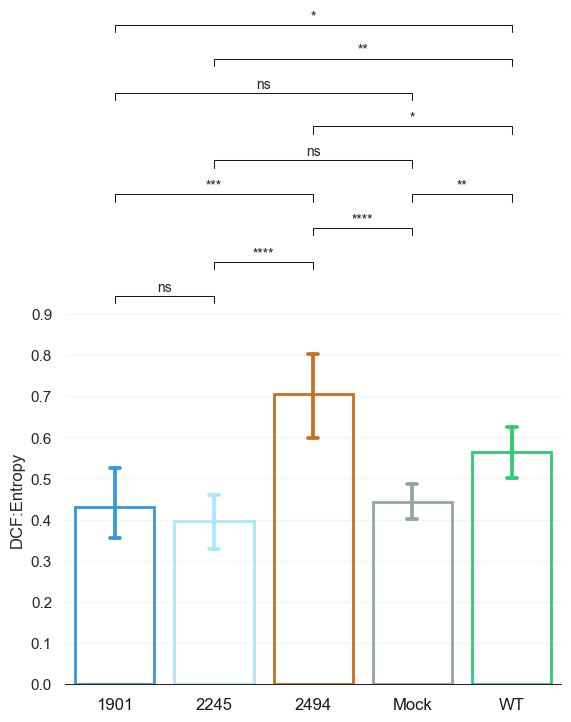

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.967e-01 stat=4.119e-03
2245 v.s. 2494: t-test independent samples, P_val=2.467e-04 stat=-4.095e+00
2494 v.s. Mock: t-test independent samples, P_val=1.117e-05 stat=5.075e+00
Mock v.s. WT: t-test independent samples, P_val=3.641e-04 stat=-3.887e+00
1901 v.s. 2494: t-test independent samples, P_val=3.195e-04 stat=-4.018e+00
2245 v.s. Mock: t-test independent samples, P_val=9.719e-01 stat=3.540e-02
2494 v.s. WT: t-test independent samples, P_val=6.601e-01 stat=4.445e-01
1901 v.s. Mock: t-test independent samples, P_val=9.685e-01 stat=3.976e-02
2245 v.s. WT: t-test independent samples, P_val=2.106e-03 stat=-3.300e+00
1901 v.s. WT: t-test independent samples, P_val=2.574e-03 stat=-3.234e+00


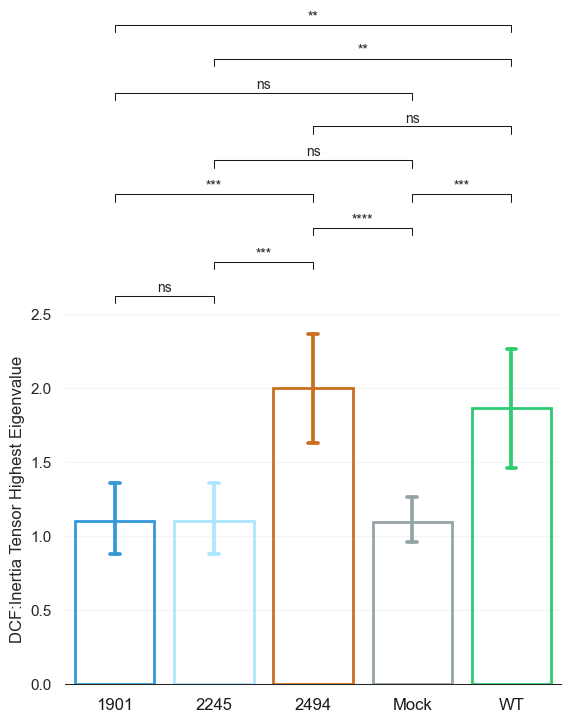

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.610e-01 stat=1.762e-01
2245 v.s. 2494: t-test independent samples, P_val=3.270e-04 stat=-3.997e+00
2494 v.s. Mock: t-test independent samples, P_val=5.222e-04 stat=3.800e+00
Mock v.s. WT: t-test independent samples, P_val=3.321e-01 stat=-9.814e-01
1901 v.s. 2494: t-test independent samples, P_val=4.004e-03 stat=-3.094e+00
2245 v.s. Mock: t-test independent samples, P_val=4.430e-01 stat=-7.737e-01
2494 v.s. WT: t-test independent samples, P_val=1.629e-02 stat=2.556e+00
1901 v.s. Mock: t-test independent samples, P_val=6.900e-01 stat=-4.014e-01
2245 v.s. WT: t-test independent samples, P_val=1.283e-01 stat=-1.555e+00
1901 v.s. WT: t-test independent samples, P_val=3.181e-01 stat=-1.012e+00


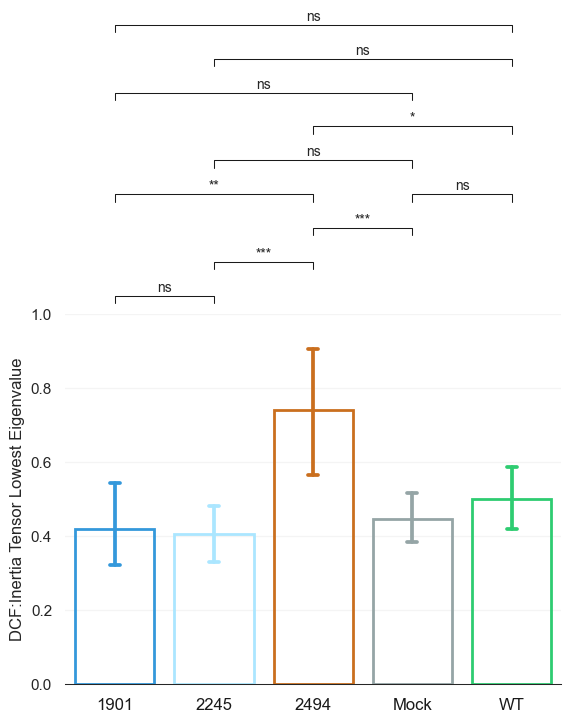

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.369e-08 stat=-6.982e+00
2245 v.s. 2494: t-test independent samples, P_val=8.984e-01 stat=-1.286e-01
2494 v.s. Mock: t-test independent samples, P_val=7.258e-02 stat=1.848e+00
Mock v.s. WT: t-test independent samples, P_val=7.911e-06 stat=5.108e+00
1901 v.s. 2494: t-test independent samples, P_val=2.444e-05 stat=-4.904e+00
2245 v.s. Mock: t-test independent samples, P_val=1.563e-02 stat=2.509e+00
2494 v.s. WT: t-test independent samples, P_val=6.081e-05 stat=4.713e+00
1901 v.s. Mock: t-test independent samples, P_val=4.662e-06 stat=-5.188e+00
2245 v.s. WT: t-test independent samples, P_val=3.469e-08 stat=6.890e+00
1901 v.s. WT: t-test independent samples, P_val=8.900e-01 stat=-1.392e-01


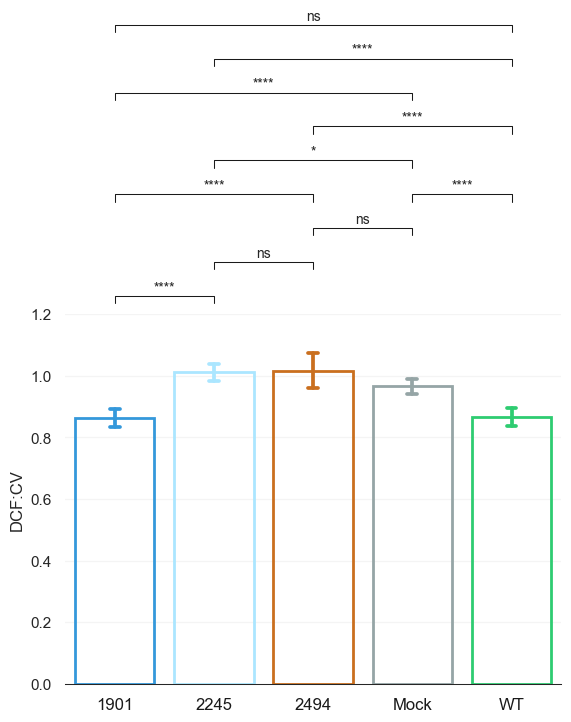

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.077e-01 stat=-6.680e-01
2245 v.s. 2494: t-test independent samples, P_val=1.587e-05 stat=5.027e+00
2494 v.s. Mock: t-test independent samples, P_val=2.685e-06 stat=-5.534e+00
Mock v.s. WT: t-test independent samples, P_val=1.349e-03 stat=3.440e+00
1901 v.s. 2494: t-test independent samples, P_val=8.260e-04 stat=3.680e+00
2245 v.s. Mock: t-test independent samples, P_val=3.427e-01 stat=9.585e-01
2494 v.s. WT: t-test independent samples, P_val=3.480e-02 stat=-2.219e+00
1901 v.s. Mock: t-test independent samples, P_val=9.959e-01 stat=-5.213e-03
2245 v.s. WT: t-test independent samples, P_val=1.495e-03 stat=3.423e+00
1901 v.s. WT: t-test independent samples, P_val=3.570e-02 stat=2.180e+00


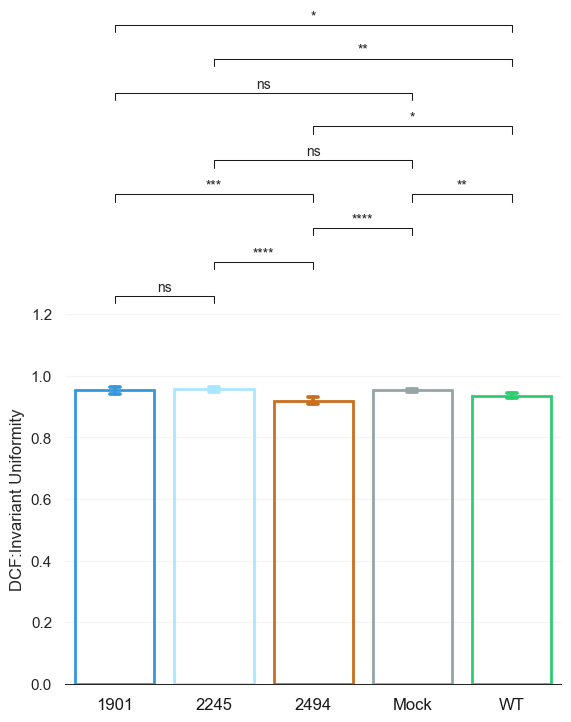

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.592e-01 stat=1.785e-01
2245 v.s. 2494: t-test independent samples, P_val=2.225e-02 stat=-2.395e+00
2494 v.s. Mock: t-test independent samples, P_val=1.488e-01 stat=-1.475e+00
Mock v.s. WT: t-test independent samples, P_val=1.165e-01 stat=-1.604e+00
1901 v.s. 2494: t-test independent samples, P_val=1.009e-02 stat=-2.729e+00
2245 v.s. Mock: t-test independent samples, P_val=1.315e-04 stat=-4.166e+00
2494 v.s. WT: t-test independent samples, P_val=4.168e-02 stat=-2.135e+00
1901 v.s. Mock: t-test independent samples, P_val=2.734e-05 stat=-4.659e+00
2245 v.s. WT: t-test independent samples, P_val=2.125e-04 stat=-4.096e+00
1901 v.s. WT: t-test independent samples, P_val=7.282e-05 stat=-4.464e+00


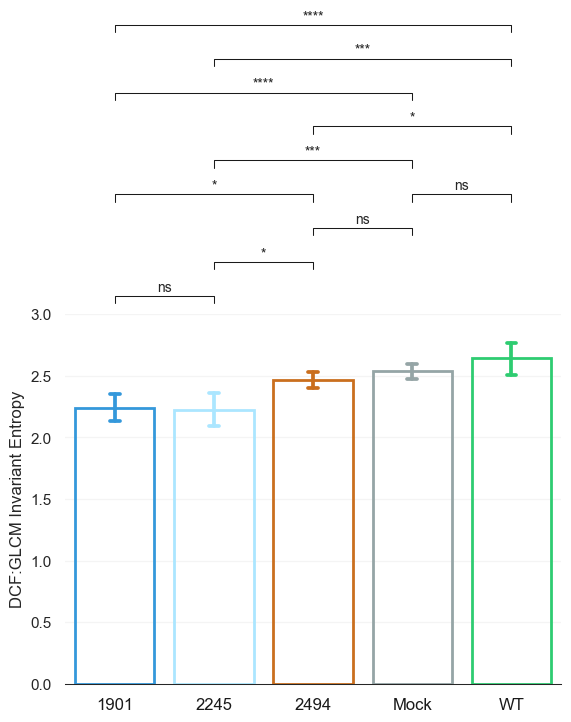

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.708e-03 stat=3.183e+00
2245 v.s. 2494: t-test independent samples, P_val=3.423e-01 stat=9.632e-01
2494 v.s. Mock: t-test independent samples, P_val=6.899e-01 stat=4.021e-01
Mock v.s. WT: t-test independent samples, P_val=1.963e-03 stat=-3.308e+00
1901 v.s. 2494: t-test independent samples, P_val=1.143e-04 stat=4.376e+00
2245 v.s. Mock: t-test independent samples, P_val=8.080e-02 stat=1.784e+00
2494 v.s. WT: t-test independent samples, P_val=5.128e-02 stat=-2.036e+00
1901 v.s. Mock: t-test independent samples, P_val=4.226e-08 stat=6.556e+00
2245 v.s. WT: t-test independent samples, P_val=3.816e-01 stat=-8.852e-01
1901 v.s. WT: t-test independent samples, P_val=4.897e-03 stat=2.993e+00


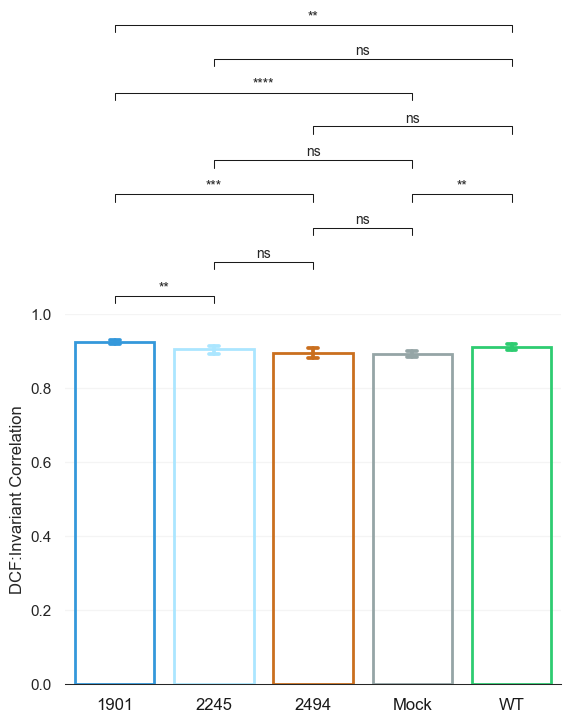

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.325e-01 stat=2.128e-01
2245 v.s. 2494: t-test independent samples, P_val=2.112e-04 stat=-4.148e+00
2494 v.s. Mock: t-test independent samples, P_val=4.952e-03 stat=2.989e+00
Mock v.s. WT: t-test independent samples, P_val=2.406e-02 stat=-2.343e+00
1901 v.s. 2494: t-test independent samples, P_val=8.834e-04 stat=-3.656e+00
2245 v.s. Mock: t-test independent samples, P_val=1.242e-02 stat=-2.600e+00
2494 v.s. WT: t-test independent samples, P_val=5.539e-01 stat=5.991e-01
1901 v.s. Mock: t-test independent samples, P_val=3.559e-02 stat=-2.165e+00
2245 v.s. WT: t-test independent samples, P_val=3.999e-04 stat=-3.882e+00
1901 v.s. WT: t-test independent samples, P_val=1.572e-03 stat=-3.413e+00


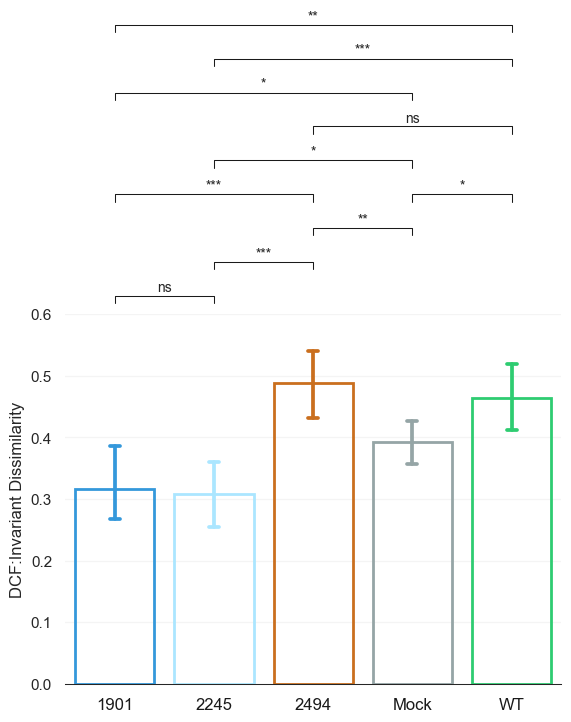

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.745e-01 stat=-5.658e-01
2245 v.s. 2494: t-test independent samples, P_val=6.413e-03 stat=-2.905e+00
2494 v.s. Mock: t-test independent samples, P_val=8.715e-01 stat=-1.629e-01
Mock v.s. WT: t-test independent samples, P_val=3.863e-01 stat=-8.756e-01
1901 v.s. 2494: t-test independent samples, P_val=6.317e-04 stat=-3.776e+00
2245 v.s. Mock: t-test independent samples, P_val=3.083e-04 stat=-3.896e+00
2494 v.s. WT: t-test independent samples, P_val=4.063e-01 stat=-8.432e-01
1901 v.s. Mock: t-test independent samples, P_val=1.159e-05 stat=-4.917e+00
2245 v.s. WT: t-test independent samples, P_val=5.734e-04 stat=-3.759e+00
1901 v.s. WT: t-test independent samples, P_val=4.720e-05 stat=-4.607e+00


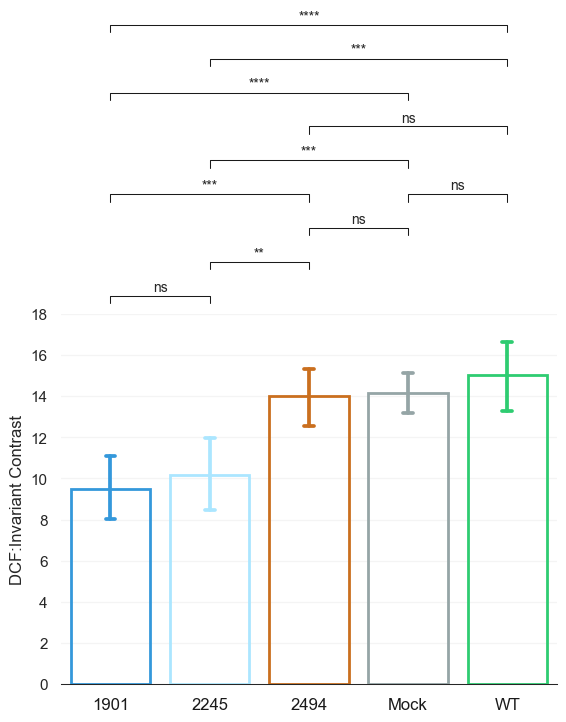

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.731e-01 stat=-7.237e-01
2245 v.s. 2494: t-test independent samples, P_val=1.627e-05 stat=5.018e+00
2494 v.s. Mock: t-test independent samples, P_val=4.941e-06 stat=-5.338e+00
Mock v.s. WT: t-test independent samples, P_val=1.404e-03 stat=3.426e+00
1901 v.s. 2494: t-test independent samples, P_val=1.097e-03 stat=3.577e+00
2245 v.s. Mock: t-test independent samples, P_val=2.408e-01 stat=1.188e+00
2494 v.s. WT: t-test independent samples, P_val=5.988e-02 stat=-1.961e+00
1901 v.s. Mock: t-test independent samples, P_val=9.091e-01 stat=1.148e-01
2245 v.s. WT: t-test independent samples, P_val=8.773e-04 stat=3.611e+00
1901 v.s. WT: t-test independent samples, P_val=2.850e-02 stat=2.280e+00


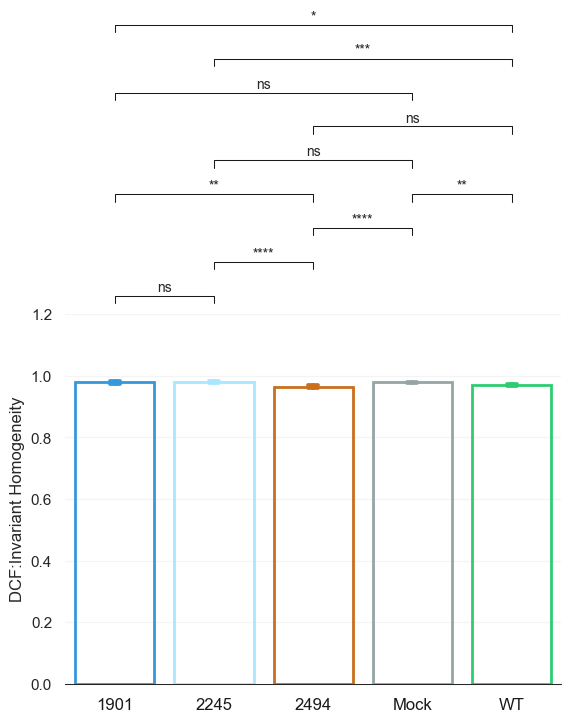

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.042e-01 stat=-6.735e-01
2245 v.s. 2494: t-test independent samples, P_val=1.528e-05 stat=5.039e+00
2494 v.s. Mock: t-test independent samples, P_val=2.581e-06 stat=-5.547e+00
Mock v.s. WT: t-test independent samples, P_val=1.336e-03 stat=3.444e+00
1901 v.s. 2494: t-test independent samples, P_val=8.670e-04 stat=3.663e+00
2245 v.s. Mock: t-test independent samples, P_val=3.494e-01 stat=9.452e-01
2494 v.s. WT: t-test independent samples, P_val=3.393e-02 stat=-2.230e+00
1901 v.s. Mock: t-test independent samples, P_val=9.780e-01 stat=-2.774e-02
2245 v.s. WT: t-test independent samples, P_val=1.509e-03 stat=3.420e+00
1901 v.s. WT: t-test independent samples, P_val=3.799e-02 stat=2.152e+00


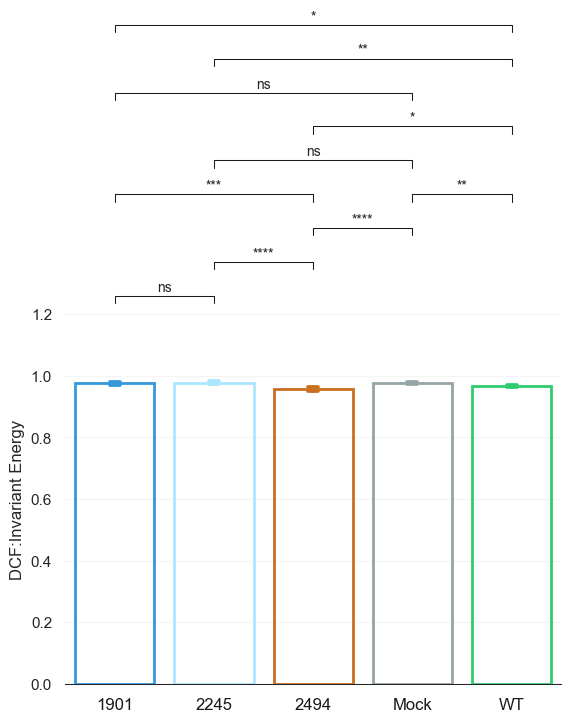

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.590e-01 stat=-7.471e-01
2245 v.s. 2494: t-test independent samples, P_val=2.135e-03 stat=-3.324e+00
2494 v.s. Mock: t-test independent samples, P_val=6.744e-03 stat=2.870e+00
Mock v.s. WT: t-test independent samples, P_val=6.701e-01 stat=-4.291e-01
1901 v.s. 2494: t-test independent samples, P_val=1.536e-04 stat=-4.274e+00
2245 v.s. Mock: t-test independent samples, P_val=1.297e-01 stat=-1.542e+00
2494 v.s. WT: t-test independent samples, P_val=3.058e-02 stat=2.278e+00
1901 v.s. Mock: t-test independent samples, P_val=1.176e-02 stat=-2.624e+00
2245 v.s. WT: t-test independent samples, P_val=1.046e-01 stat=-1.663e+00
1901 v.s. WT: t-test independent samples, P_val=1.067e-02 stat=-2.690e+00


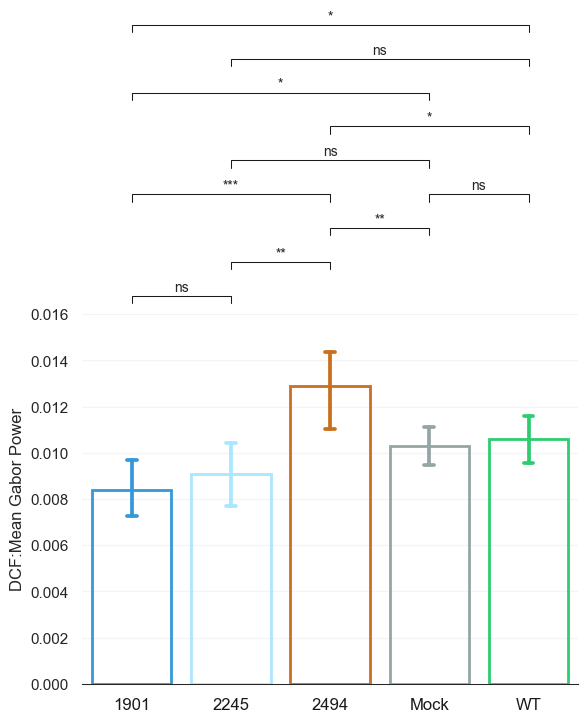

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.250e-01 stat=-3.541e-01
2245 v.s. 2494: t-test independent samples, P_val=2.690e-03 stat=-3.238e+00
2494 v.s. Mock: t-test independent samples, P_val=6.723e-01 stat=4.264e-01
Mock v.s. WT: t-test independent samples, P_val=4.366e-01 stat=-7.857e-01
1901 v.s. 2494: t-test independent samples, P_val=8.228e-04 stat=-3.681e+00
2245 v.s. Mock: t-test independent samples, P_val=3.677e-04 stat=-3.839e+00
2494 v.s. WT: t-test independent samples, P_val=7.625e-01 stat=-3.052e-01
1901 v.s. Mock: t-test independent samples, P_val=7.015e-05 stat=-4.370e+00
2245 v.s. WT: t-test independent samples, P_val=9.198e-04 stat=-3.595e+00
1901 v.s. WT: t-test independent samples, P_val=2.821e-04 stat=-4.011e+00


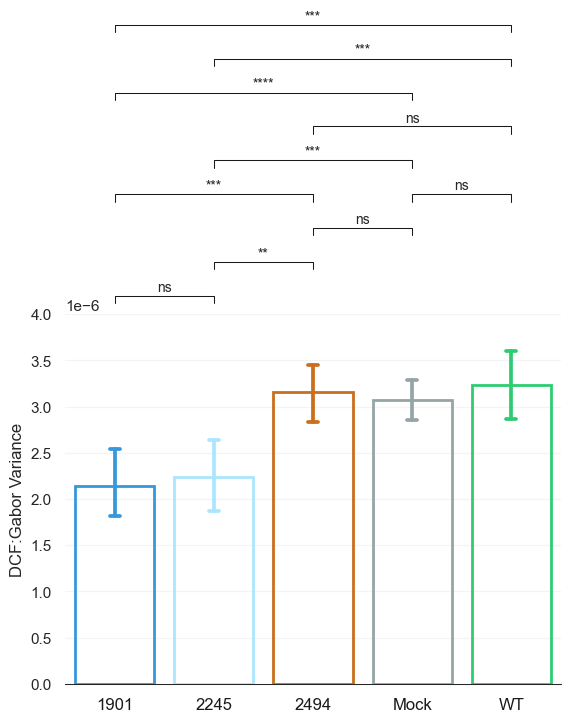

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.639e-02 stat=1.816e+00
2245 v.s. 2494: t-test independent samples, P_val=6.128e-06 stat=-5.345e+00
2494 v.s. Mock: t-test independent samples, P_val=7.507e-06 stat=5.204e+00
Mock v.s. WT: t-test independent samples, P_val=6.541e-06 stat=-5.167e+00
1901 v.s. 2494: t-test independent samples, P_val=2.329e-02 stat=-2.379e+00
2245 v.s. Mock: t-test independent samples, P_val=9.361e-03 stat=-2.710e+00
2494 v.s. WT: t-test independent samples, P_val=3.634e-01 stat=-9.240e-01
1901 v.s. Mock: t-test independent samples, P_val=9.011e-01 stat=1.250e-01
2245 v.s. WT: t-test independent samples, P_val=1.109e-06 stat=-5.789e+00
1901 v.s. WT: t-test independent samples, P_val=3.539e-03 stat=-3.116e+00


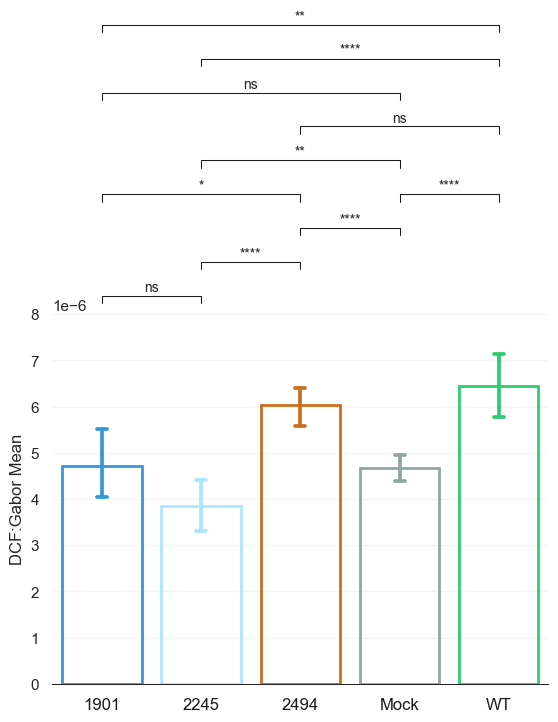

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.250e-01 stat=-3.541e-01
2245 v.s. 2494: t-test independent samples, P_val=2.690e-03 stat=-3.238e+00
2494 v.s. Mock: t-test independent samples, P_val=6.723e-01 stat=4.264e-01
Mock v.s. WT: t-test independent samples, P_val=4.365e-01 stat=-7.858e-01
1901 v.s. 2494: t-test independent samples, P_val=8.229e-04 stat=-3.681e+00
2245 v.s. Mock: t-test independent samples, P_val=3.678e-04 stat=-3.839e+00
2494 v.s. WT: t-test independent samples, P_val=7.625e-01 stat=-3.052e-01
1901 v.s. Mock: t-test independent samples, P_val=7.018e-05 stat=-4.370e+00
2245 v.s. WT: t-test independent samples, P_val=9.197e-04 stat=-3.595e+00
1901 v.s. WT: t-test independent samples, P_val=2.821e-04 stat=-4.011e+00


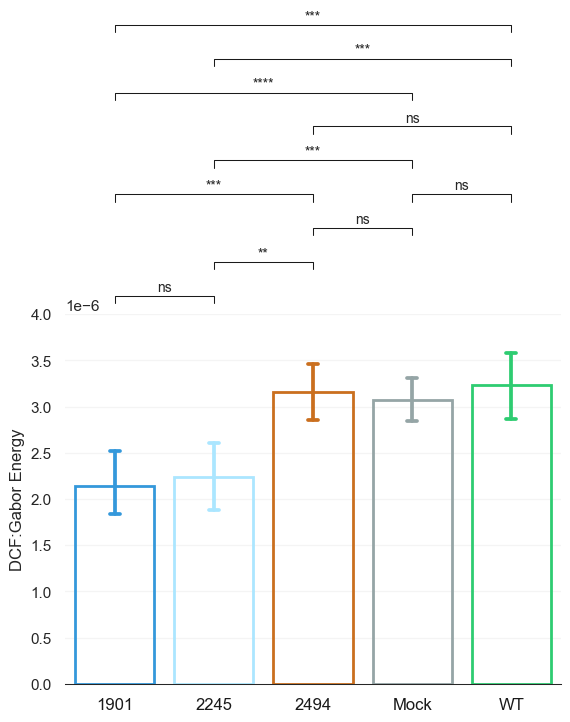

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.641e-01 stat=1.721e-01
2245 v.s. 2494: t-test independent samples, P_val=4.375e-05 stat=-4.686e+00
2494 v.s. Mock: t-test independent samples, P_val=2.130e-06 stat=5.608e+00
Mock v.s. WT: t-test independent samples, P_val=1.535e-03 stat=-3.395e+00
1901 v.s. 2494: t-test independent samples, P_val=3.591e-04 stat=-3.977e+00
2245 v.s. Mock: t-test independent samples, P_val=5.998e-01 stat=-5.283e-01
2494 v.s. WT: t-test independent samples, P_val=2.290e-02 stat=2.407e+00
1901 v.s. Mock: t-test independent samples, P_val=8.060e-01 stat=-2.470e-01
2245 v.s. WT: t-test independent samples, P_val=5.573e-03 stat=-2.939e+00
1901 v.s. WT: t-test independent samples, P_val=2.322e-02 stat=-2.368e+00


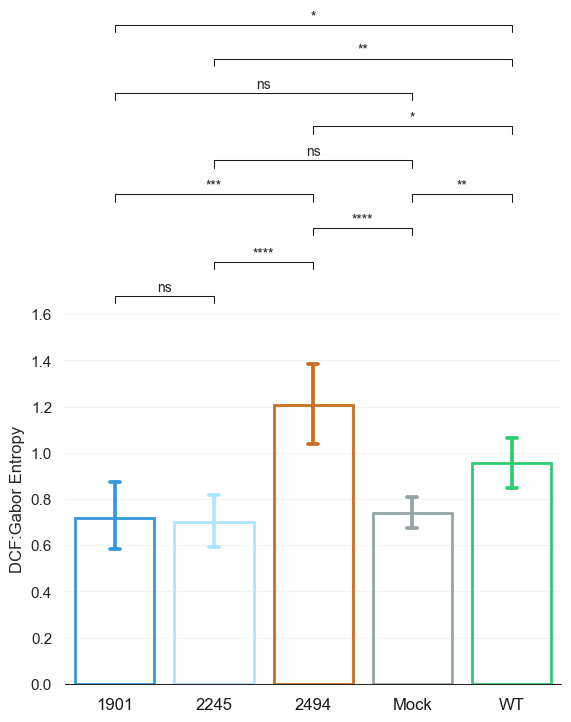

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.196e-01 stat=1.007e+00
2245 v.s. 2494: t-test independent samples, P_val=7.419e-02 stat=-1.842e+00
2494 v.s. Mock: t-test independent samples, P_val=3.700e-04 stat=-3.919e+00
Mock v.s. WT: t-test independent samples, P_val=4.012e-01 stat=-8.483e-01
1901 v.s. 2494: t-test independent samples, P_val=1.671e-01 stat=-1.413e+00
2245 v.s. Mock: t-test independent samples, P_val=1.861e-06 stat=-5.442e+00
2494 v.s. WT: t-test independent samples, P_val=5.320e-04 stat=-3.912e+00
1901 v.s. Mock: t-test independent samples, P_val=4.023e-07 stat=-5.905e+00
2245 v.s. WT: t-test independent samples, P_val=1.880e-05 stat=-4.888e+00
1901 v.s. WT: t-test independent samples, P_val=2.925e-06 stat=-5.507e+00


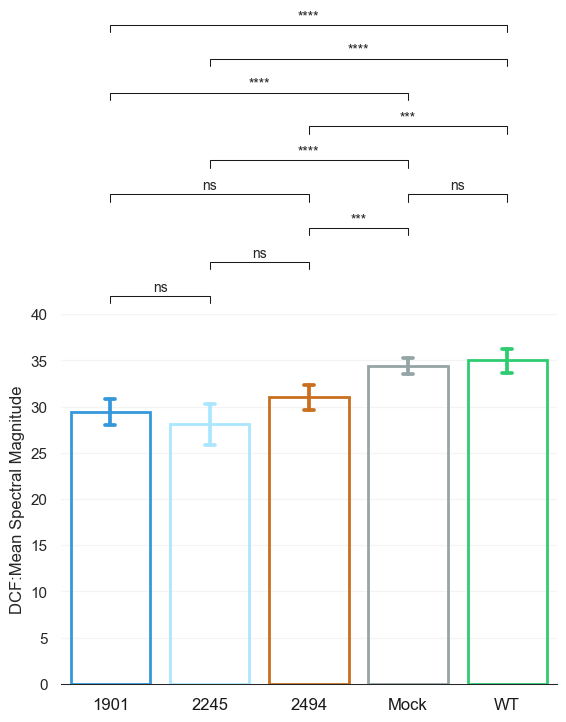

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.574e-02 stat=-2.168e+00
2245 v.s. 2494: t-test independent samples, P_val=8.806e-02 stat=-1.756e+00
2494 v.s. Mock: t-test independent samples, P_val=9.634e-01 stat=4.616e-02
Mock v.s. WT: t-test independent samples, P_val=1.708e-02 stat=2.486e+00
1901 v.s. 2494: t-test independent samples, P_val=1.654e-04 stat=-4.248e+00
2245 v.s. Mock: t-test independent samples, P_val=2.596e-02 stat=-2.300e+00
2494 v.s. WT: t-test independent samples, P_val=5.891e-02 stat=1.969e+00
1901 v.s. Mock: t-test independent samples, P_val=2.201e-06 stat=-5.409e+00
2245 v.s. WT: t-test independent samples, P_val=9.911e-01 stat=1.123e-02
1901 v.s. WT: t-test independent samples, P_val=1.720e-02 stat=-2.495e+00


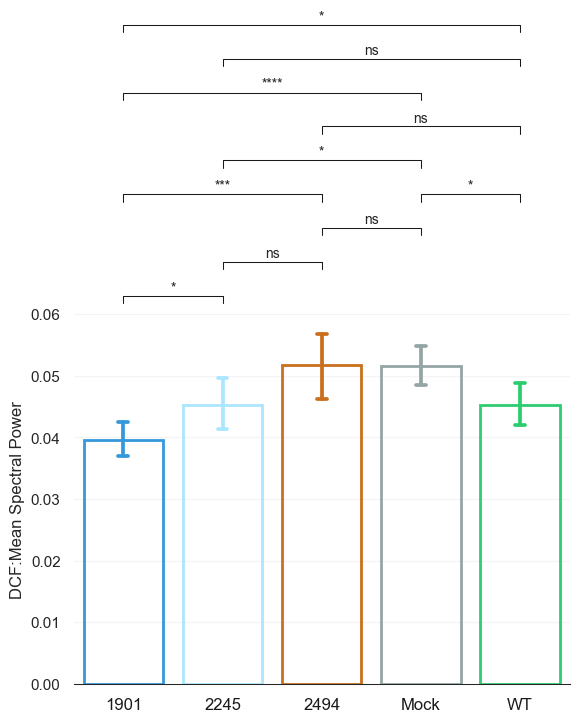

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.415e-01 stat=6.155e-01
2245 v.s. 2494: t-test independent samples, P_val=2.238e-04 stat=-4.128e+00
2494 v.s. Mock: t-test independent samples, P_val=1.558e-04 stat=4.211e+00
Mock v.s. WT: t-test independent samples, P_val=8.390e-03 stat=-2.770e+00
1901 v.s. 2494: t-test independent samples, P_val=4.328e-04 stat=-3.911e+00
2245 v.s. Mock: t-test independent samples, P_val=1.049e-01 stat=-1.654e+00
2494 v.s. WT: t-test independent samples, P_val=1.089e-01 stat=1.656e+00
1901 v.s. Mock: t-test independent samples, P_val=3.311e-01 stat=-9.823e-01
2245 v.s. WT: t-test independent samples, P_val=2.056e-03 stat=-3.309e+00
1901 v.s. WT: t-test independent samples, P_val=5.791e-03 stat=-2.929e+00


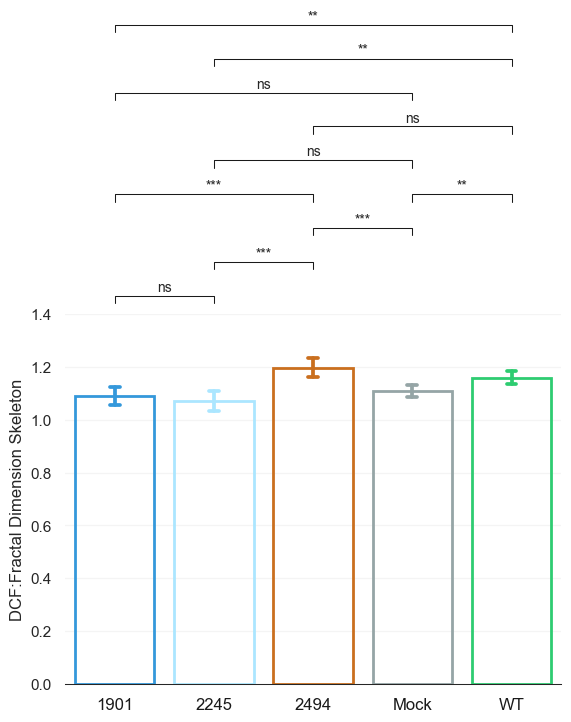

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.726e-01 stat=5.686e-01
2245 v.s. 2494: t-test independent samples, P_val=8.977e-06 stat=-5.217e+00
2494 v.s. Mock: t-test independent samples, P_val=6.905e-06 stat=5.231e+00
Mock v.s. WT: t-test independent samples, P_val=8.344e-04 stat=-3.606e+00
1901 v.s. 2494: t-test independent samples, P_val=8.954e-04 stat=-3.651e+00
2245 v.s. Mock: t-test independent samples, P_val=1.305e-01 stat=-1.539e+00
2494 v.s. WT: t-test independent samples, P_val=6.839e-02 stat=1.896e+00
1901 v.s. Mock: t-test independent samples, P_val=6.239e-01 stat=-4.937e-01
2245 v.s. WT: t-test independent samples, P_val=2.468e-04 stat=-4.045e+00
1901 v.s. WT: t-test independent samples, P_val=1.533e-02 stat=-2.542e+00


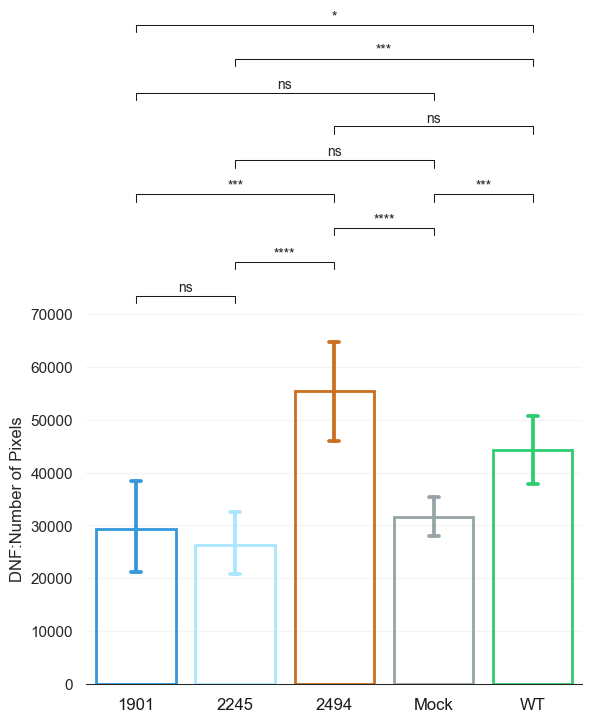

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.726e-01 stat=5.686e-01
2245 v.s. 2494: t-test independent samples, P_val=8.977e-06 stat=-5.217e+00
2494 v.s. Mock: t-test independent samples, P_val=6.905e-06 stat=5.231e+00
Mock v.s. WT: t-test independent samples, P_val=8.344e-04 stat=-3.606e+00
1901 v.s. 2494: t-test independent samples, P_val=8.954e-04 stat=-3.651e+00
2245 v.s. Mock: t-test independent samples, P_val=1.305e-01 stat=-1.539e+00
2494 v.s. WT: t-test independent samples, P_val=6.839e-02 stat=1.896e+00
1901 v.s. Mock: t-test independent samples, P_val=6.239e-01 stat=-4.937e-01
2245 v.s. WT: t-test independent samples, P_val=2.468e-04 stat=-4.045e+00
1901 v.s. WT: t-test independent samples, P_val=1.533e-02 stat=-2.542e+00


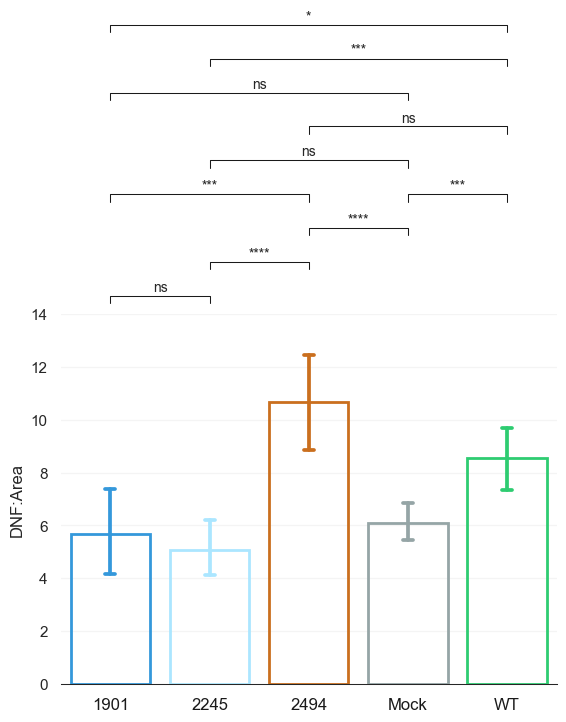

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.679e-01 stat=-4.049e-02
2245 v.s. 2494: t-test independent samples, P_val=1.087e-04 stat=-4.377e+00
2494 v.s. Mock: t-test independent samples, P_val=4.599e-06 stat=5.361e+00
Mock v.s. WT: t-test independent samples, P_val=3.689e-03 stat=-3.080e+00
1901 v.s. 2494: t-test independent samples, P_val=4.468e-04 stat=-3.900e+00
2245 v.s. Mock: t-test independent samples, P_val=7.120e-01 stat=-3.714e-01
2494 v.s. WT: t-test independent samples, P_val=4.025e-02 stat=2.151e+00
1901 v.s. Mock: t-test independent samples, P_val=7.111e-01 stat=-3.727e-01
2245 v.s. WT: t-test independent samples, P_val=1.255e-02 stat=-2.620e+00
1901 v.s. WT: t-test independent samples, P_val=2.487e-02 stat=-2.339e+00


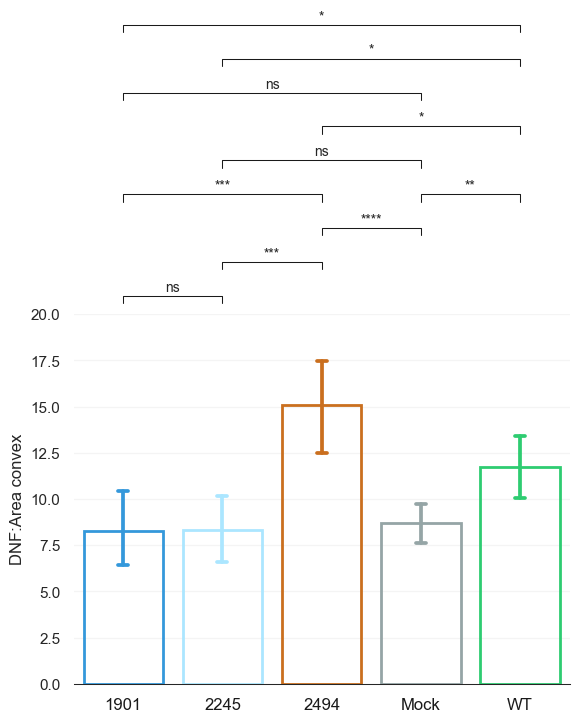

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.261e-01 stat=-1.560e+00
2245 v.s. 2494: t-test independent samples, P_val=3.042e-02 stat=-2.259e+00
2494 v.s. Mock: t-test independent samples, P_val=4.537e-06 stat=5.366e+00
Mock v.s. WT: t-test independent samples, P_val=9.226e-01 stat=-9.771e-02
1901 v.s. 2494: t-test independent samples, P_val=6.044e-05 stat=-4.595e+00
2245 v.s. Mock: t-test independent samples, P_val=2.271e-01 stat=1.224e+00
2494 v.s. WT: t-test independent samples, P_val=4.425e-05 stat=4.829e+00
1901 v.s. Mock: t-test independent samples, P_val=3.908e-01 stat=-8.664e-01
2245 v.s. WT: t-test independent samples, P_val=3.295e-01 stat=9.877e-01
1901 v.s. WT: t-test independent samples, P_val=4.096e-01 stat=-8.341e-01


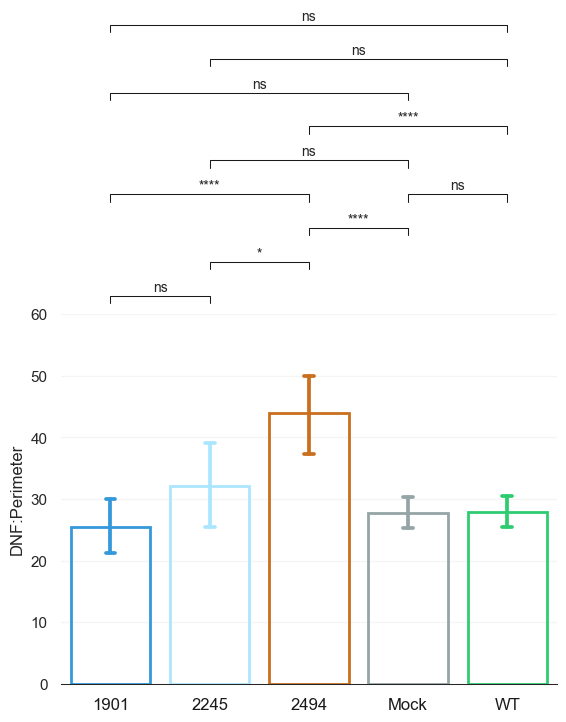

EXCLUDING: DNF:Centroid
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.384e-01 stat=-7.772e-02
2245 v.s. 2494: t-test independent samples, P_val=3.095e-01 stat=1.032e+00
2494 v.s. Mock: t-test independent samples, P_val=2.395e-01 stat=-1.195e+00
Mock v.s. WT: t-test independent samples, P_val=9.794e-01 stat=2.592e-02
1901 v.s. 2494: t-test independent samples, P_val=3.713e-01 stat=9.064e-01
2245 v.s. Mock: t-test independent samples, P_val=7.353e-01 stat=-3.401e-01


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


2494 v.s. WT: t-test independent samples, P_val=2.611e-01 stat=-1.147e+00
1901 v.s. Mock: t-test independent samples, P_val=6.939e-01 stat=-3.961e-01
2245 v.s. WT: t-test independent samples, P_val=7.682e-01 stat=-2.968e-01
1901 v.s. WT: t-test independent samples, P_val=7.298e-01 stat=-3.481e-01


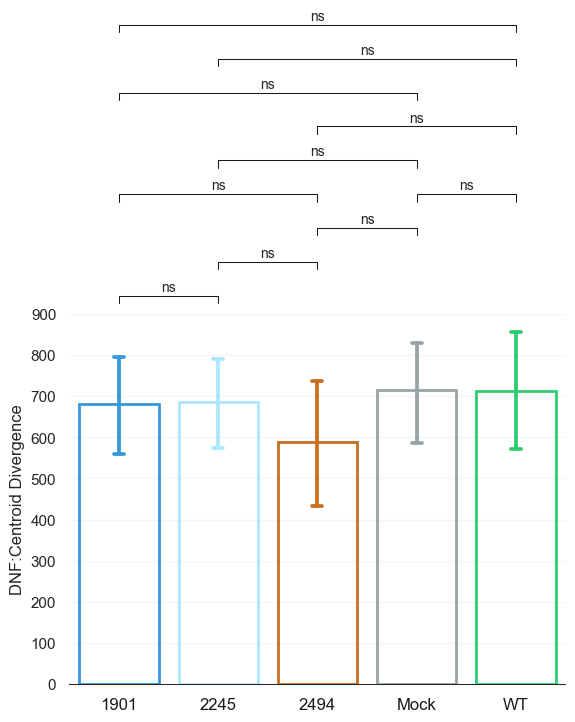

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.427e-01 stat=4.673e-01
2245 v.s. 2494: t-test independent samples, P_val=1.713e-05 stat=-5.001e+00
2494 v.s. Mock: t-test independent samples, P_val=1.241e-05 stat=5.041e+00
Mock v.s. WT: t-test independent samples, P_val=9.318e-04 stat=-3.569e+00
1901 v.s. 2494: t-test independent samples, P_val=3.965e-04 stat=-3.942e+00
2245 v.s. Mock: t-test independent samples, P_val=6.258e-02 stat=-1.908e+00
2494 v.s. WT: t-test independent samples, P_val=9.200e-02 stat=1.745e+00
1901 v.s. Mock: t-test independent samples, P_val=2.885e-01 stat=-1.074e+00
2245 v.s. WT: t-test independent samples, P_val=2.066e-04 stat=-4.105e+00
1901 v.s. WT: t-test independent samples, P_val=4.067e-03 stat=-3.063e+00


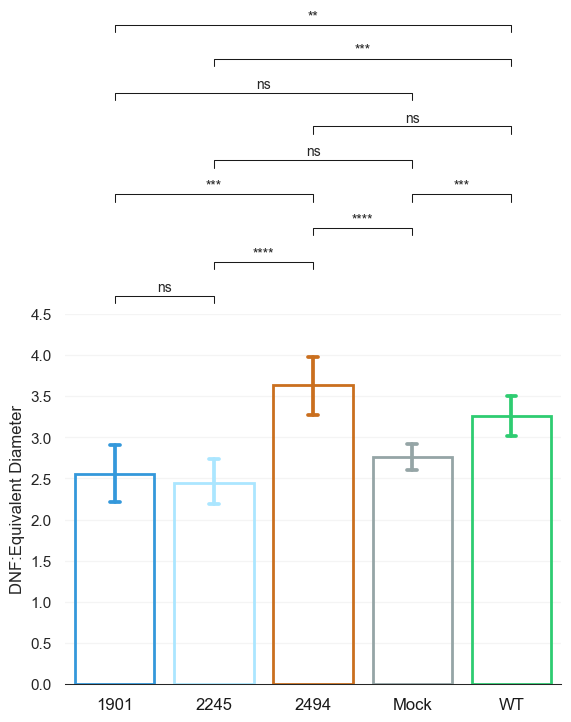

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.295e-01 stat=9.863e-01
2245 v.s. 2494: t-test independent samples, P_val=1.829e-01 stat=-1.360e+00
2494 v.s. Mock: t-test independent samples, P_val=3.103e-01 stat=-1.029e+00
Mock v.s. WT: t-test independent samples, P_val=8.002e-01 stat=2.548e-01
1901 v.s. 2494: t-test independent samples, P_val=6.697e-01 stat=-4.304e-01
2245 v.s. Mock: t-test independent samples, P_val=6.441e-03 stat=-2.852e+00
2494 v.s. WT: t-test independent samples, P_val=4.593e-01 stat=-7.504e-01
1901 v.s. Mock: t-test independent samples, P_val=1.025e-01 stat=-1.666e+00
2245 v.s. WT: t-test independent samples, P_val=2.485e-02 stat=-2.336e+00
1901 v.s. WT: t-test independent samples, P_val=2.137e-01 stat=-1.265e+00


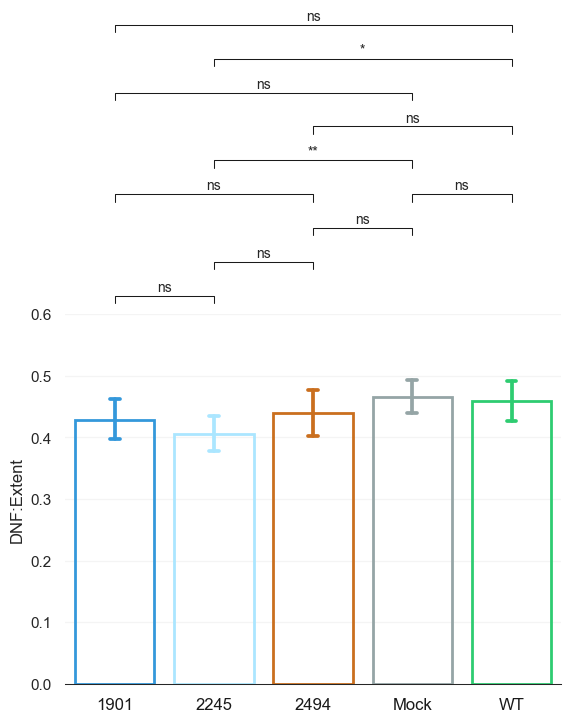

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.944e-01 stat=-5.364e-01
2245 v.s. 2494: t-test independent samples, P_val=3.489e-04 stat=-3.974e+00
2494 v.s. Mock: t-test independent samples, P_val=1.931e-05 stat=4.898e+00
Mock v.s. WT: t-test independent samples, P_val=2.403e-03 stat=-3.236e+00
1901 v.s. 2494: t-test independent samples, P_val=3.251e-05 stat=-4.807e+00
2245 v.s. Mock: t-test independent samples, P_val=6.416e-01 stat=-4.685e-01
2494 v.s. WT: t-test independent samples, P_val=2.609e-01 stat=1.148e+00
1901 v.s. Mock: t-test independent samples, P_val=2.431e-01 stat=-1.182e+00
2245 v.s. WT: t-test independent samples, P_val=6.375e-03 stat=-2.888e+00
1901 v.s. WT: t-test independent samples, P_val=1.009e-03 stat=-3.570e+00


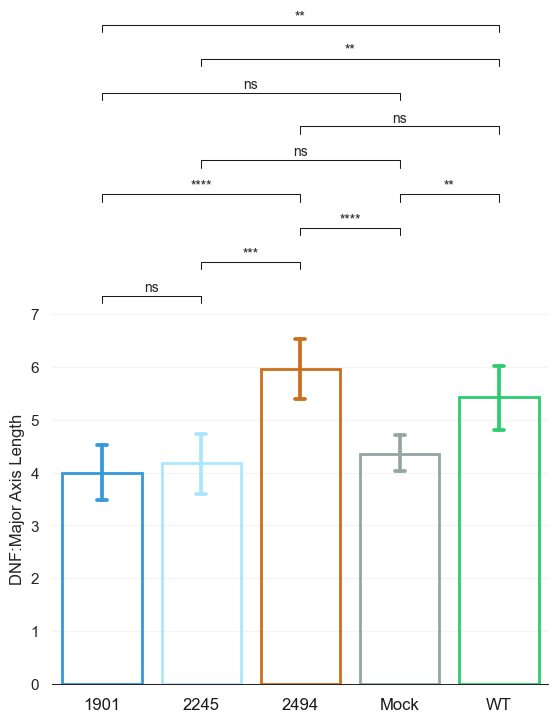

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.242e-01 stat=2.235e-01
2245 v.s. 2494: t-test independent samples, P_val=1.920e-04 stat=-4.181e+00
2494 v.s. Mock: t-test independent samples, P_val=1.263e-03 stat=3.491e+00
Mock v.s. WT: t-test independent samples, P_val=3.922e-01 stat=-8.647e-01
1901 v.s. 2494: t-test independent samples, P_val=1.244e-03 stat=-3.531e+00
2245 v.s. Mock: t-test independent samples, P_val=1.463e-01 stat=-1.477e+00
2494 v.s. WT: t-test independent samples, P_val=1.833e-02 stat=2.505e+00
1901 v.s. Mock: t-test independent samples, P_val=2.963e-01 stat=-1.056e+00
2245 v.s. WT: t-test independent samples, P_val=4.346e-02 stat=-2.089e+00
1901 v.s. WT: t-test independent samples, P_val=1.203e-01 stat=-1.590e+00


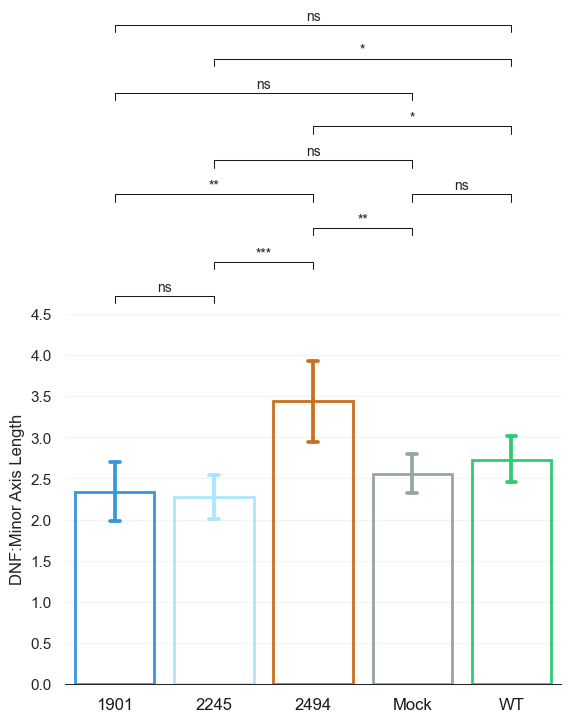

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.141e-01 stat=-2.366e-01
2245 v.s. 2494: t-test independent samples, P_val=7.409e-04 stat=-3.708e+00
2494 v.s. Mock: t-test independent samples, P_val=2.373e-05 stat=4.831e+00
Mock v.s. WT: t-test independent samples, P_val=2.237e-05 stat=-4.785e+00
1901 v.s. 2494: t-test independent samples, P_val=2.441e-04 stat=-4.113e+00
2245 v.s. Mock: t-test independent samples, P_val=6.957e-01 stat=3.936e-01
2494 v.s. WT: t-test independent samples, P_val=8.880e-01 stat=-1.422e-01
1901 v.s. Mock: t-test independent samples, P_val=8.954e-01 stat=1.322e-01
2245 v.s. WT: t-test independent samples, P_val=4.738e-04 stat=-3.824e+00
1901 v.s. WT: t-test independent samples, P_val=1.905e-04 stat=-4.144e+00


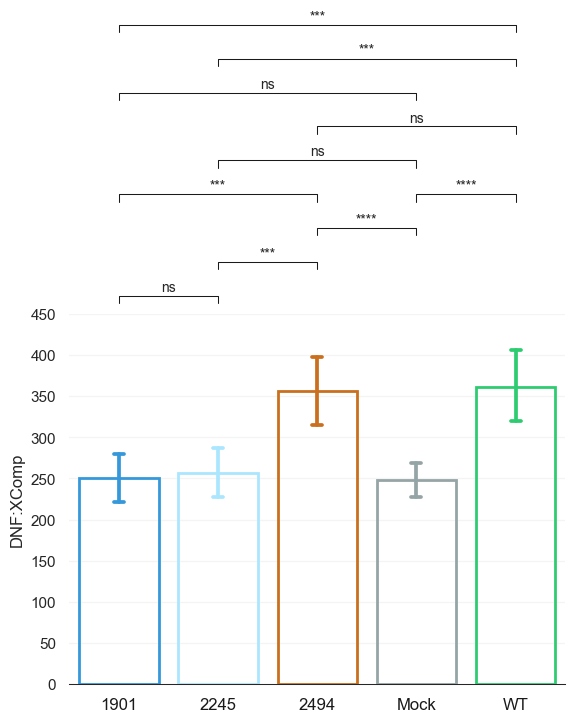

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.974e-01 stat=3.915e-01


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


2245 v.s. 2494: t-test independent samples, P_val=1.705e-04 stat=-4.222e+00
2494 v.s. Mock: t-test independent samples, P_val=2.259e-03 stat=3.281e+00
Mock v.s. WT: t-test independent samples, P_val=8.817e-01 stat=1.497e-01
1901 v.s. 2494: t-test independent samples, P_val=1.077e-03 stat=-3.584e+00
2245 v.s. Mock: t-test independent samples, P_val=7.468e-02 stat=-1.823e+00
2494 v.s. WT: t-test independent samples, P_val=6.734e-03 stat=2.926e+00
1901 v.s. Mock: t-test independent samples, P_val=2.111e-01 stat=-1.268e+00
2245 v.s. WT: t-test independent samples, P_val=1.695e-01 stat=-1.400e+00
1901 v.s. WT: t-test independent samples, P_val=3.536e-01 stat=-9.394e-01


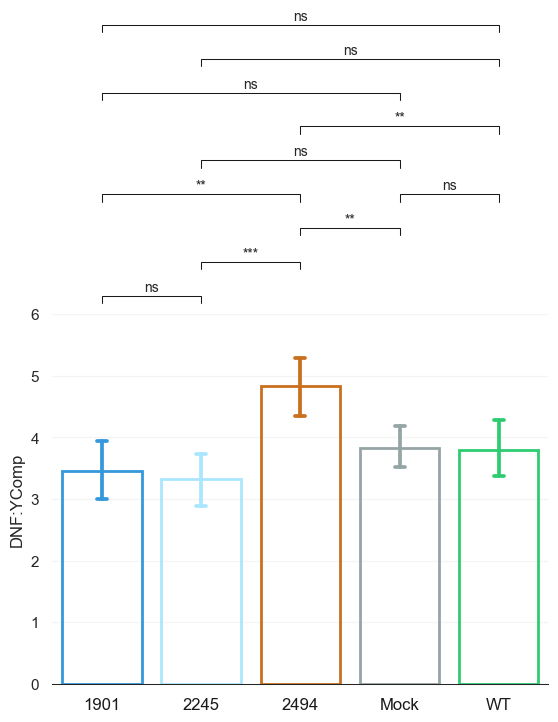

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.502e-01 stat=9.445e-01
2245 v.s. 2494: t-test independent samples, P_val=1.397e-01 stat=1.512e+00
2494 v.s. Mock: t-test independent samples, P_val=2.249e-04 stat=-4.088e+00
Mock v.s. WT: t-test independent samples, P_val=1.240e-05 stat=-4.969e+00
1901 v.s. 2494: t-test independent samples, P_val=1.681e-02 stat=2.519e+00
2245 v.s. Mock: t-test independent samples, P_val=5.735e-02 stat=-1.948e+00
2494 v.s. WT: t-test independent samples, P_val=6.657e-06 stat=-5.523e+00
1901 v.s. Mock: t-test independent samples, P_val=3.693e-01 stat=-9.068e-01
2245 v.s. WT: t-test independent samples, P_val=7.823e-04 stat=-3.651e+00
1901 v.s. WT: t-test independent samples, P_val=2.094e-03 stat=-3.309e+00


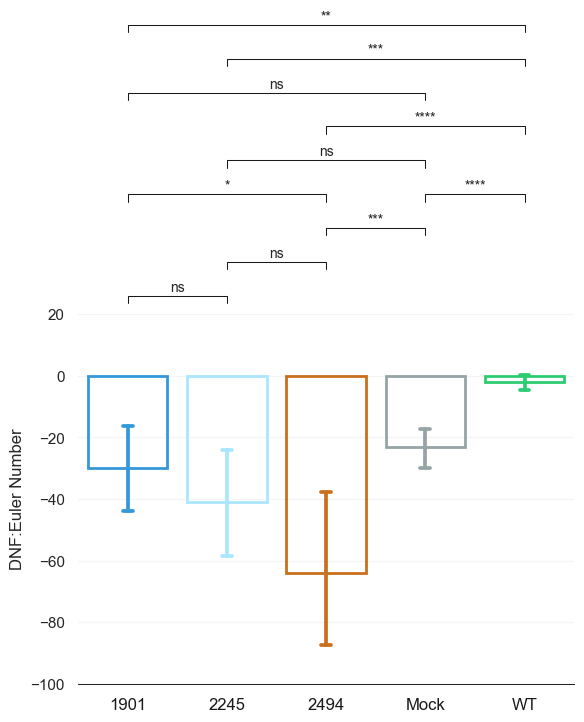

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.183e-01 stat=-2.311e-01
2245 v.s. 2494: t-test independent samples, P_val=7.220e-01 stat=3.587e-01
2494 v.s. Mock: t-test independent samples, P_val=9.425e-01 stat=7.258e-02
Mock v.s. WT: t-test independent samples, P_val=2.100e-01 stat=-1.274e+00
1901 v.s. 2494: t-test independent samples, P_val=8.323e-01 stat=2.134e-01
2245 v.s. Mock: t-test independent samples, P_val=5.728e-01 stat=5.680e-01
2494 v.s. WT: t-test independent samples, P_val=3.767e-01 stat=-8.983e-01
1901 v.s. Mock: t-test independent samples, P_val=7.073e-01 stat=3.778e-01
2245 v.s. WT: t-test independent samples, P_val=5.225e-01 stat=-6.455e-01
1901 v.s. WT: t-test independent samples, P_val=3.400e-01 stat=-9.666e-01


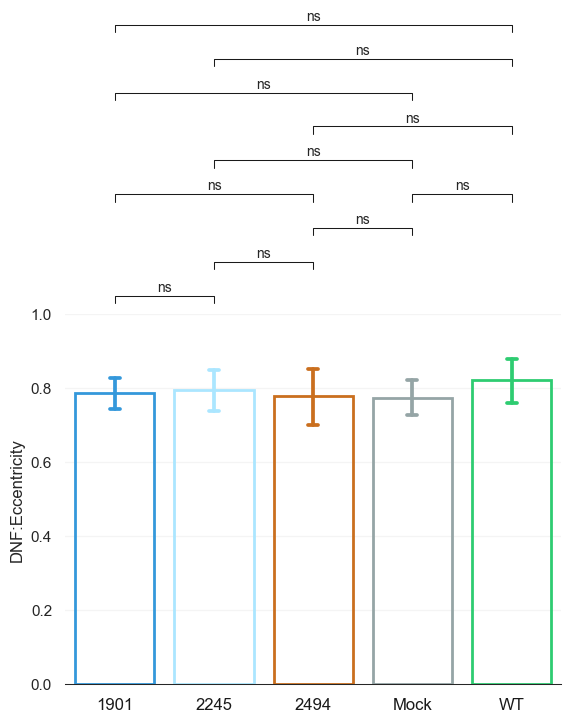

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.040e-02 stat=1.791e+00
2245 v.s. 2494: t-test independent samples, P_val=6.034e-01 stat=5.243e-01
2494 v.s. Mock: t-test independent samples, P_val=8.904e-03 stat=-2.761e+00
Mock v.s. WT: t-test independent samples, P_val=1.059e-03 stat=-3.524e+00
1901 v.s. 2494: t-test independent samples, P_val=3.919e-02 stat=2.147e+00
2245 v.s. Mock: t-test independent samples, P_val=1.916e-01 stat=-1.325e+00
2494 v.s. WT: t-test independent samples, P_val=3.025e-06 stat=-5.814e+00
1901 v.s. Mock: t-test independent samples, P_val=2.579e-01 stat=1.145e+00
2245 v.s. WT: t-test independent samples, P_val=3.314e-03 stat=-3.134e+00
1901 v.s. WT: t-test independent samples, P_val=4.447e-01 stat=-7.725e-01


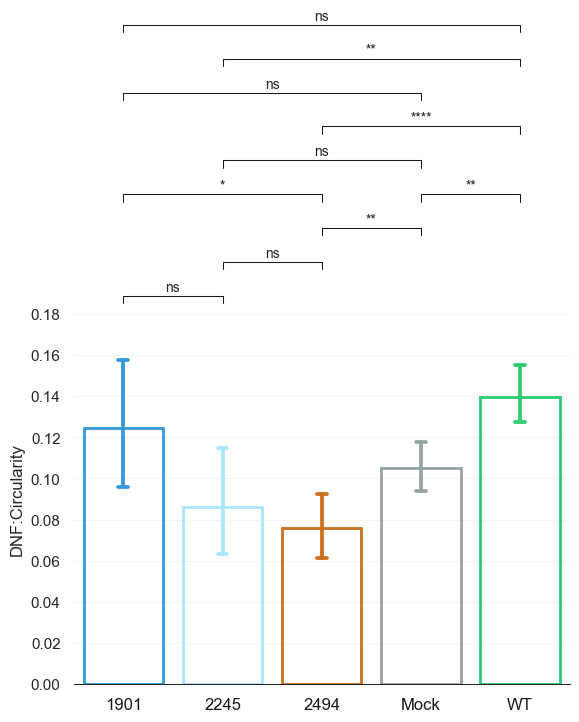

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.141e-01 stat=1.613e+00
2245 v.s. 2494: t-test independent samples, P_val=7.290e-01 stat=-3.493e-01
2494 v.s. Mock: t-test independent samples, P_val=2.634e-01 stat=-1.136e+00
Mock v.s. WT: t-test independent samples, P_val=3.674e-01 stat=9.114e-01
1901 v.s. 2494: t-test independent samples, P_val=2.813e-01 stat=1.095e+00
2245 v.s. Mock: t-test independent samples, P_val=9.657e-02 stat=-1.696e+00
2494 v.s. WT: t-test independent samples, P_val=8.571e-01 stat=-1.817e-01
1901 v.s. Mock: t-test independent samples, P_val=9.769e-01 stat=2.908e-02
2245 v.s. WT: t-test independent samples, P_val=5.804e-01 stat=-5.576e-01
1901 v.s. WT: t-test independent samples, P_val=3.856e-01 stat=8.781e-01


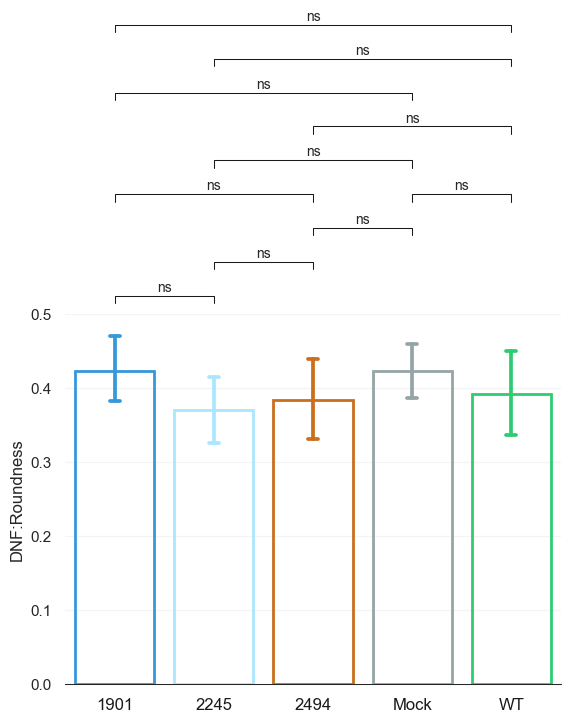

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.040e-01 stat=-6.739e-01
2245 v.s. 2494: t-test independent samples, P_val=8.893e-01 stat=1.402e-01
2494 v.s. Mock: t-test independent samples, P_val=6.923e-01 stat=3.989e-01
Mock v.s. WT: t-test independent samples, P_val=1.450e-01 stat=-1.486e+00
1901 v.s. 2494: t-test independent samples, P_val=6.926e-01 stat=-3.988e-01
2245 v.s. Mock: t-test independent samples, P_val=5.039e-01 stat=6.735e-01
2494 v.s. WT: t-test independent samples, P_val=3.964e-01 stat=-8.612e-01
1901 v.s. Mock: t-test independent samples, P_val=9.662e-01 stat=4.266e-02
2245 v.s. WT: t-test independent samples, P_val=3.596e-01 stat=-9.274e-01
1901 v.s. WT: t-test independent samples, P_val=1.314e-01 stat=-1.543e+00


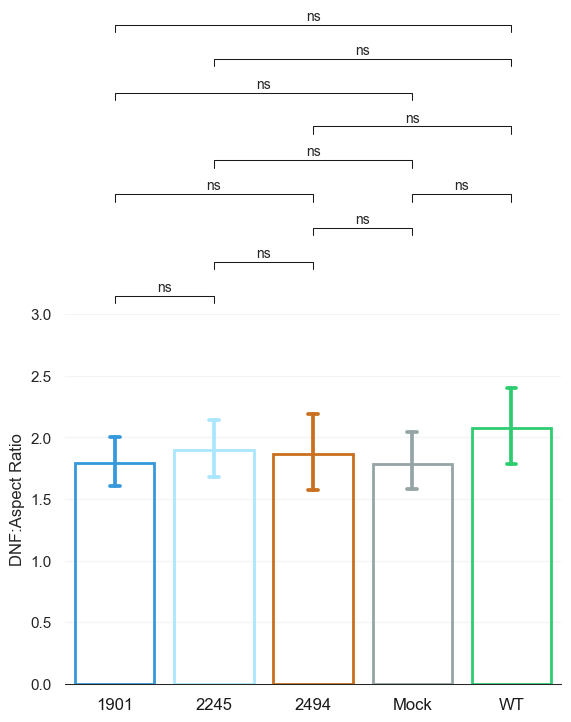

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.074e-01 stat=1.280e+00
2245 v.s. 2494: t-test independent samples, P_val=4.646e-01 stat=-7.396e-01
2494 v.s. Mock: t-test independent samples, P_val=6.544e-01 stat=-4.512e-01
Mock v.s. WT: t-test independent samples, P_val=7.201e-01 stat=3.609e-01
1901 v.s. 2494: t-test independent samples, P_val=7.435e-01 stat=3.300e-01
2245 v.s. Mock: t-test independent samples, P_val=1.587e-01 stat=-1.432e+00
2494 v.s. WT: t-test independent samples, P_val=8.602e-01 stat=-1.777e-01
1901 v.s. Mock: t-test independent samples, P_val=8.784e-01 stat=-1.539e-01
2245 v.s. WT: t-test independent samples, P_val=2.632e-01 stat=-1.136e+00
1901 v.s. WT: t-test independent samples, P_val=8.333e-01 stat=2.120e-01


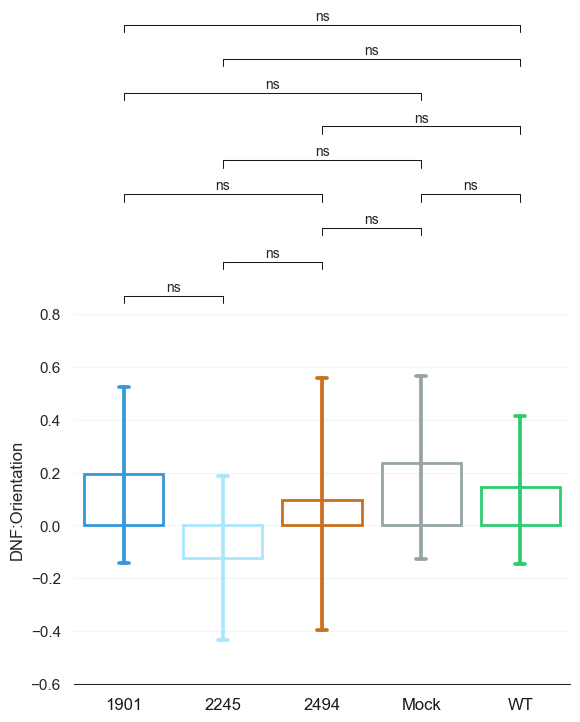

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.944e-02 stat=2.253e+00
2245 v.s. 2494: t-test independent samples, P_val=2.132e-04 stat=-4.145e+00
2494 v.s. Mock: t-test independent samples, P_val=9.846e-01 stat=-1.948e-02
Mock v.s. WT: t-test independent samples, P_val=3.924e-02 stat=-2.130e+00
1901 v.s. 2494: t-test independent samples, P_val=7.702e-02 stat=-1.825e+00
2245 v.s. Mock: t-test independent samples, P_val=1.031e-06 stat=-5.613e+00
2494 v.s. WT: t-test independent samples, P_val=1.060e-01 stat=-1.670e+00
1901 v.s. Mock: t-test independent samples, P_val=1.664e-02 stat=-2.485e+00
2245 v.s. WT: t-test independent samples, P_val=8.617e-07 stat=-5.869e+00
1901 v.s. WT: t-test independent samples, P_val=1.871e-03 stat=-3.350e+00


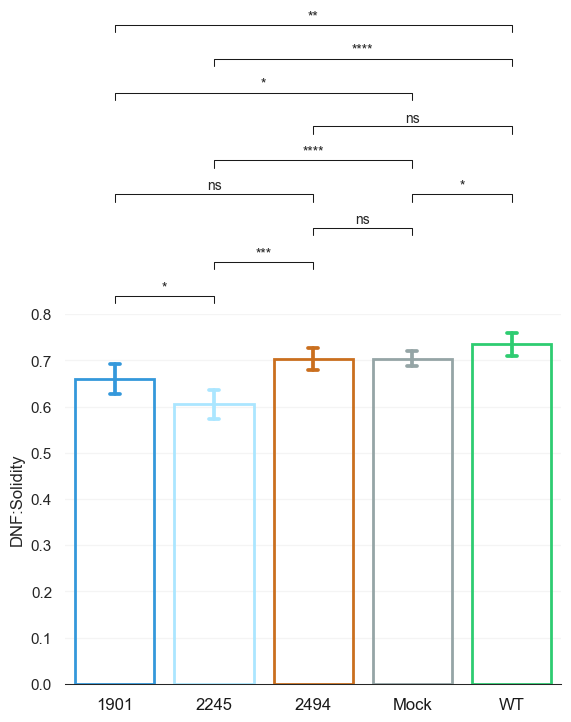

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


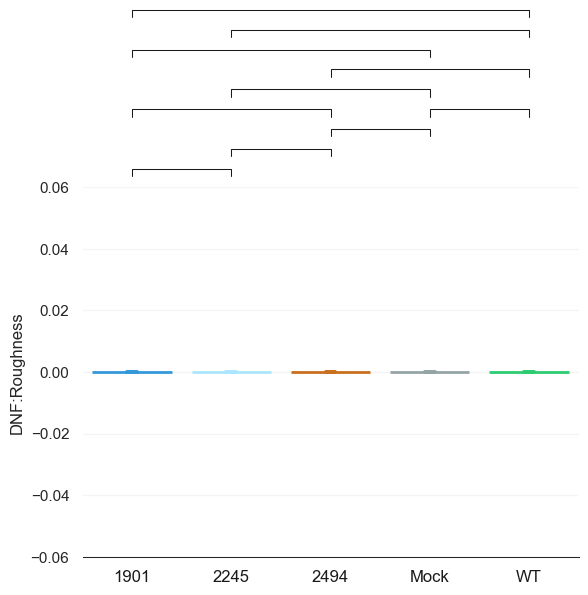

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.158e-01 stat=-1.605e+00
2245 v.s. 2494: t-test independent samples, P_val=3.586e-02 stat=-2.185e+00
2494 v.s. Mock: t-test independent samples, P_val=2.282e-06 stat=5.586e+00
Mock v.s. WT: t-test independent samples, P_val=9.664e-01 stat=-4.238e-02
1901 v.s. 2494: t-test independent samples, P_val=4.464e-05 stat=-4.699e+00
2245 v.s. Mock: t-test independent samples, P_val=1.790e-01 stat=1.364e+00
2494 v.s. WT: t-test independent samples, P_val=2.307e-05 stat=5.067e+00
1901 v.s. Mock: t-test independent samples, P_val=4.527e-01 stat=-7.573e-01
2245 v.s. WT: t-test independent samples, P_val=2.660e-01 stat=1.129e+00
1901 v.s. WT: t-test independent samples, P_val=4.879e-01 stat=-7.007e-01


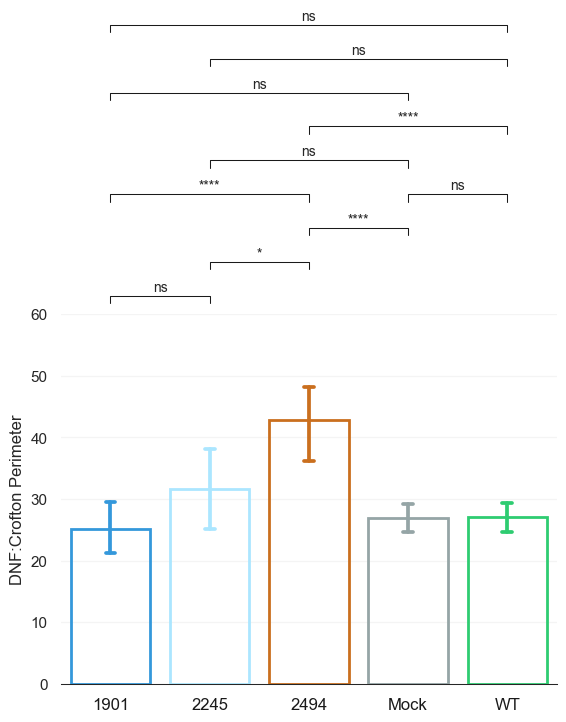

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.173e-02 stat=-2.220e+00
2245 v.s. 2494: t-test independent samples, P_val=3.994e-02 stat=2.136e+00
2494 v.s. Mock: t-test independent samples, P_val=8.523e-01 stat=1.875e-01
Mock v.s. WT: t-test independent samples, P_val=4.779e-01 stat=-7.162e-01
1901 v.s. 2494: t-test independent samples, P_val=8.194e-01 stat=2.302e-01
2245 v.s. Mock: t-test independent samples, P_val=2.956e-03 stat=3.136e+00
2494 v.s. WT: t-test independent samples, P_val=7.086e-01 stat=-3.775e-01
1901 v.s. Mock: t-test independent samples, P_val=6.241e-01 stat=4.934e-01
2245 v.s. WT: t-test independent samples, P_val=4.156e-02 stat=2.109e+00
1901 v.s. WT: t-test independent samples, P_val=9.217e-01 stat=-9.893e-02


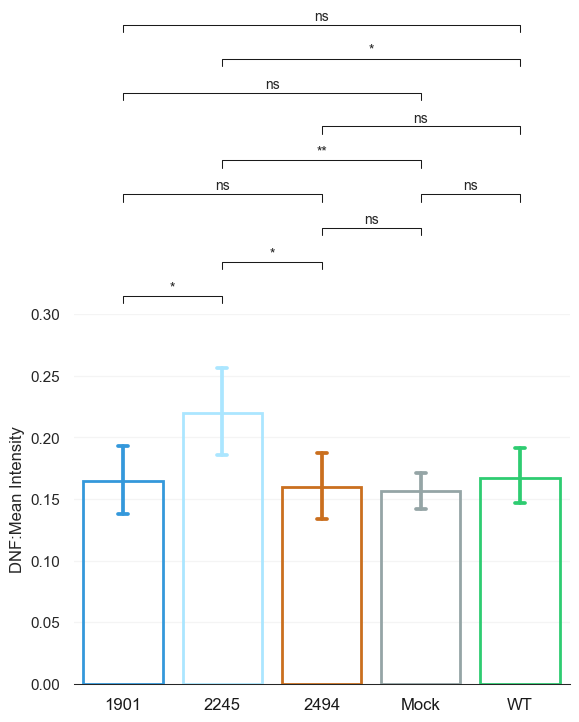

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.040e-08 stat=-6.742e+00
2245 v.s. 2494: t-test independent samples, P_val=8.121e-01 stat=2.395e-01
2494 v.s. Mock: t-test independent samples, P_val=9.303e-06 stat=5.134e+00
Mock v.s. WT: t-test independent samples, P_val=2.078e-02 stat=-2.405e+00
1901 v.s. 2494: t-test independent samples, P_val=7.530e-06 stat=-5.304e+00
2245 v.s. Mock: t-test independent samples, P_val=5.031e-08 stat=6.480e+00
2494 v.s. WT: t-test independent samples, P_val=1.199e-02 stat=2.687e+00
1901 v.s. Mock: t-test independent samples, P_val=1.684e-01 stat=-1.400e+00
2245 v.s. WT: t-test independent samples, P_val=1.298e-03 stat=3.474e+00
1901 v.s. WT: t-test independent samples, P_val=2.912e-03 stat=-3.188e+00


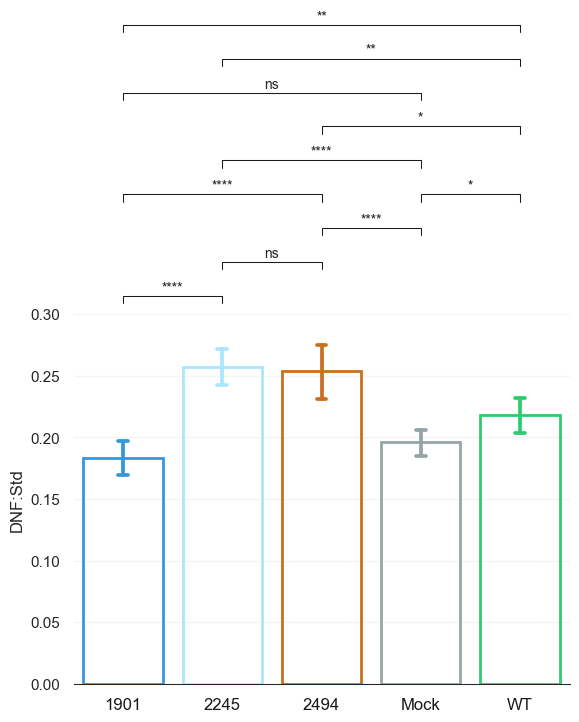

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.109e-07 stat=-6.356e+00
2245 v.s. 2494: t-test independent samples, P_val=8.364e-01 stat=2.081e-01
2494 v.s. Mock: t-test independent samples, P_val=4.249e-06 stat=5.387e+00
Mock v.s. WT: t-test independent samples, P_val=1.795e-02 stat=-2.466e+00
1901 v.s. 2494: t-test independent samples, P_val=9.599e-06 stat=-5.221e+00
2245 v.s. Mock: t-test independent samples, P_val=6.024e-08 stat=6.429e+00
2494 v.s. WT: t-test independent samples, P_val=8.542e-03 stat=2.829e+00
1901 v.s. Mock: t-test independent samples, P_val=2.438e-01 stat=-1.181e+00
2245 v.s. WT: t-test independent samples, P_val=1.298e-03 stat=3.474e+00
1901 v.s. WT: t-test independent samples, P_val=5.512e-03 stat=-2.948e+00


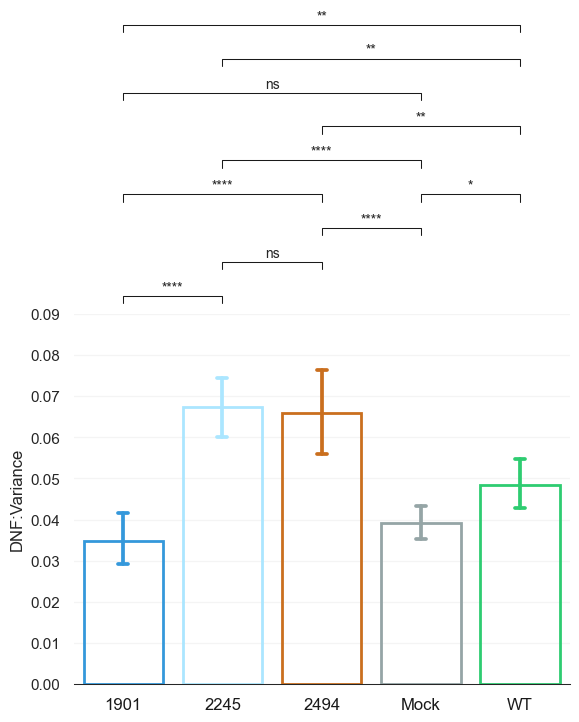

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.832e-01 stat=7.072e-01
2245 v.s. 2494: t-test independent samples, P_val=5.577e-03 stat=-2.960e+00
2494 v.s. Mock: t-test independent samples, P_val=9.493e-02 stat=1.714e+00
Mock v.s. WT: t-test independent samples, P_val=7.985e-01 stat=-2.570e-01
1901 v.s. 2494: t-test independent samples, P_val=2.964e-02 stat=-2.273e+00
2245 v.s. Mock: t-test independent samples, P_val=1.382e-02 stat=-2.558e+00
2494 v.s. WT: t-test independent samples, P_val=2.457e-01 stat=1.186e+00
1901 v.s. Mock: t-test independent samples, P_val=1.149e-01 stat=-1.607e+00
2245 v.s. WT: t-test independent samples, P_val=3.191e-02 stat=-2.227e+00
1901 v.s. WT: t-test independent samples, P_val=1.522e-01 stat=-1.462e+00


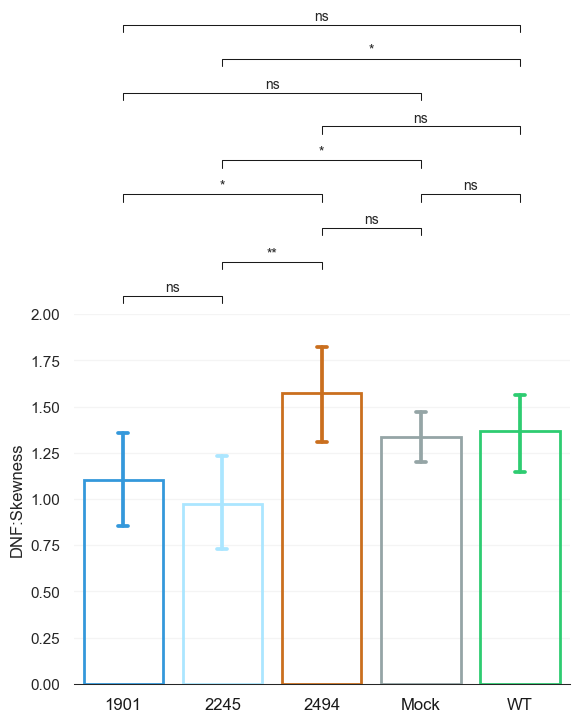

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.106e-01 stat=1.629e+00
2245 v.s. 2494: t-test independent samples, P_val=1.388e-02 stat=-2.594e+00
2494 v.s. Mock: t-test independent samples, P_val=9.906e-01 stat=1.187e-02
Mock v.s. WT: t-test independent samples, P_val=4.905e-01 stat=6.958e-01
1901 v.s. 2494: t-test independent samples, P_val=4.516e-01 stat=-7.617e-01
2245 v.s. Mock: t-test independent samples, P_val=1.300e-03 stat=-3.421e+00
2494 v.s. WT: t-test independent samples, P_val=5.932e-01 stat=5.404e-01
1901 v.s. Mock: t-test independent samples, P_val=3.111e-01 stat=-1.024e+00
2245 v.s. WT: t-test independent samples, P_val=2.099e-02 stat=-2.408e+00
1901 v.s. WT: t-test independent samples, P_val=7.167e-01 stat=-3.656e-01


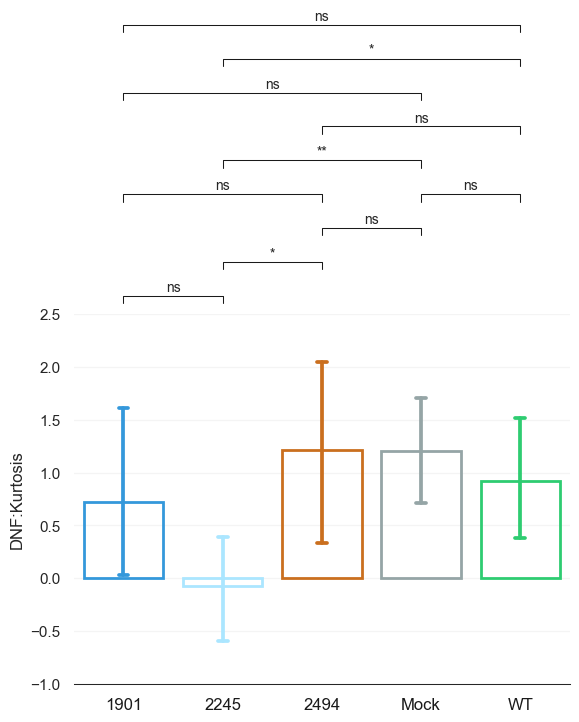

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)
C:\Users\diogo\anaconda3\envs\Cytosk_recentpy\lib\site-packages\statannot\statannot.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = stats.ttest_ind(a=box_data1, b=box_data2, **stats_params)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


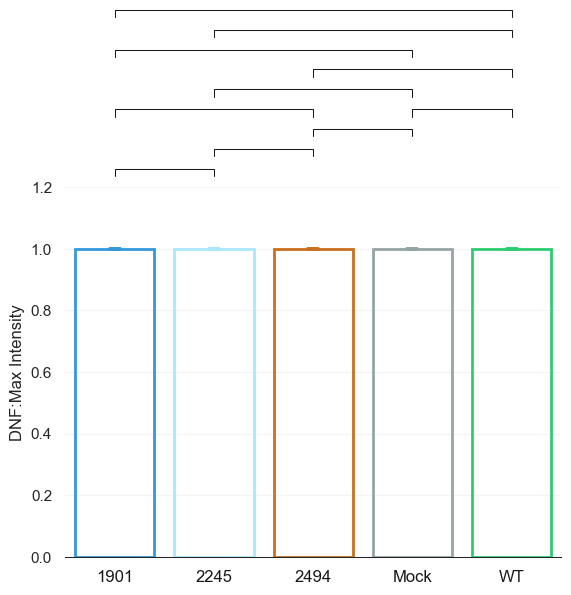

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.736e-11 stat=8.886e+00
2245 v.s. 2494: t-test independent samples, P_val=1.142e-02 stat=2.675e+00
2494 v.s. Mock: t-test independent samples, P_val=5.123e-01 stat=-6.617e-01
Mock v.s. WT: t-test independent samples, P_val=1.798e-05 stat=-4.853e+00
1901 v.s. 2494: t-test independent samples, P_val=9.895e-10 stat=8.422e+00
2245 v.s. Mock: t-test independent samples, P_val=1.423e-03 stat=3.390e+00
2494 v.s. WT: t-test independent samples, P_val=1.726e-04 stat=-4.330e+00
1901 v.s. Mock: t-test independent samples, P_val=1.679e-15 stat=1.179e+01
2245 v.s. WT: t-test independent samples, P_val=7.133e-01 stat=3.701e-01
1901 v.s. WT: t-test independent samples, P_val=4.902e-10 stat=8.350e+00


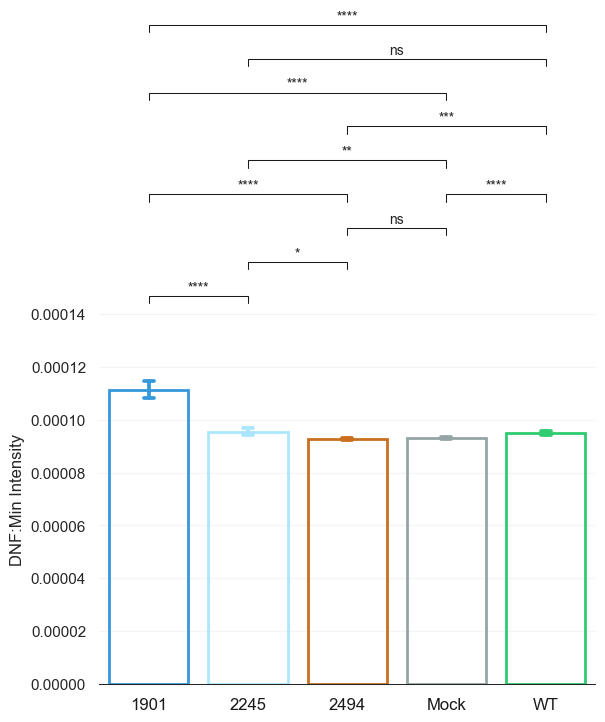

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.832e-01 stat=5.529e-01
2245 v.s. 2494: t-test independent samples, P_val=2.881e-06 stat=-5.596e+00
2494 v.s. Mock: t-test independent samples, P_val=8.911e-06 stat=5.148e+00
Mock v.s. WT: t-test independent samples, P_val=2.986e-04 stat=-3.952e+00
1901 v.s. 2494: t-test independent samples, P_val=2.909e-04 stat=-4.051e+00
2245 v.s. Mock: t-test independent samples, P_val=3.909e-02 stat=-2.123e+00
2494 v.s. WT: t-test independent samples, P_val=1.334e-01 stat=1.546e+00
1901 v.s. Mock: t-test independent samples, P_val=3.190e-01 stat=-1.007e+00
2245 v.s. WT: t-test independent samples, P_val=2.119e-05 stat=-4.850e+00
1901 v.s. WT: t-test independent samples, P_val=2.217e-03 stat=-3.288e+00


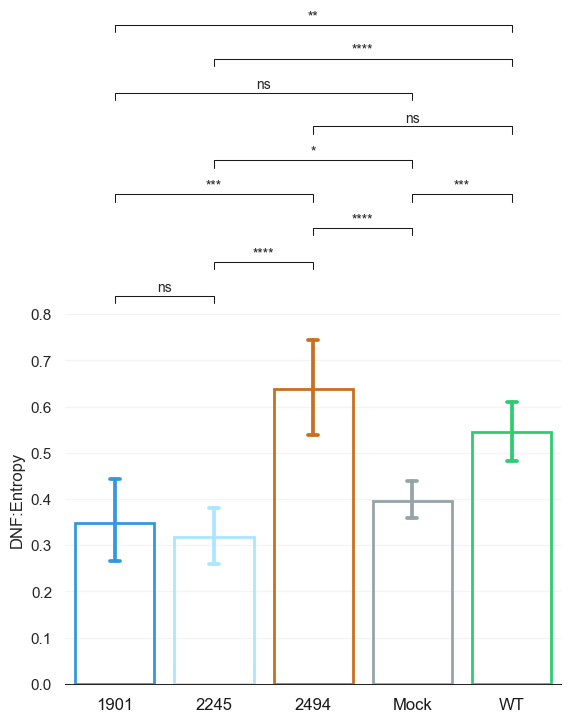

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.435e-01 stat=-6.124e-01
2245 v.s. 2494: t-test independent samples, P_val=2.970e-04 stat=-4.030e+00
2494 v.s. Mock: t-test independent samples, P_val=2.386e-05 stat=4.830e+00
Mock v.s. WT: t-test independent samples, P_val=1.999e-03 stat=-3.302e+00
1901 v.s. 2494: t-test independent samples, P_val=5.213e-05 stat=-4.646e+00
2245 v.s. Mock: t-test independent samples, P_val=9.224e-01 stat=-9.791e-02
2494 v.s. WT: t-test independent samples, P_val=2.997e-01 stat=1.057e+00
1901 v.s. Mock: t-test independent samples, P_val=4.057e-01 stat=-8.393e-01
2245 v.s. WT: t-test independent samples, P_val=6.923e-03 stat=-2.856e+00
1901 v.s. WT: t-test independent samples, P_val=1.535e-03 stat=-3.421e+00


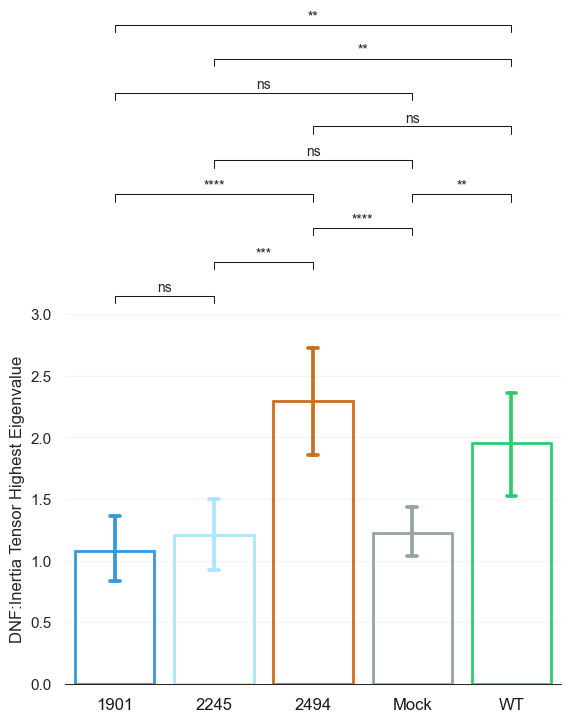

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.007e-01 stat=3.870e-01
2245 v.s. 2494: t-test independent samples, P_val=6.912e-05 stat=-4.531e+00
2494 v.s. Mock: t-test independent samples, P_val=5.347e-04 stat=3.792e+00
Mock v.s. WT: t-test independent samples, P_val=4.404e-01 stat=-7.792e-01
1901 v.s. 2494: t-test independent samples, P_val=1.494e-03 stat=-3.464e+00
2245 v.s. Mock: t-test independent samples, P_val=2.030e-01 stat=-1.291e+00
2494 v.s. WT: t-test independent samples, P_val=1.041e-02 stat=2.746e+00
1901 v.s. Mock: t-test independent samples, P_val=5.338e-01 stat=-6.270e-01
2245 v.s. WT: t-test independent samples, P_val=6.337e-02 stat=-1.913e+00
1901 v.s. WT: t-test independent samples, P_val=2.647e-01 stat=-1.132e+00


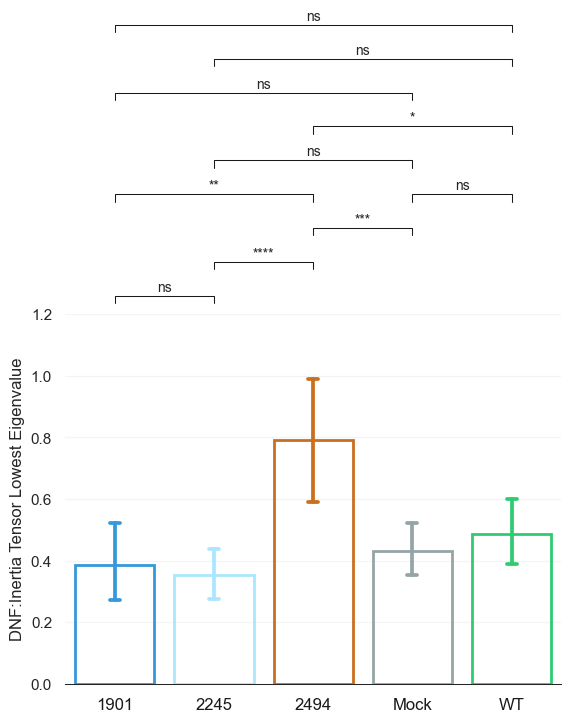

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.485e-01 stat=-6.048e-01
2245 v.s. 2494: t-test independent samples, P_val=5.218e-03 stat=-2.985e+00
2494 v.s. Mock: t-test independent samples, P_val=1.213e-06 stat=5.789e+00
Mock v.s. WT: t-test independent samples, P_val=1.694e-01 stat=-1.399e+00
1901 v.s. 2494: t-test independent samples, P_val=1.061e-03 stat=-3.589e+00
2245 v.s. Mock: t-test independent samples, P_val=7.347e-01 stat=3.409e-01
2494 v.s. WT: t-test independent samples, P_val=1.451e-03 stat=3.532e+00
1901 v.s. Mock: t-test independent samples, P_val=6.182e-01 stat=-5.018e-01
2245 v.s. WT: t-test independent samples, P_val=6.220e-01 stat=-4.971e-01
1901 v.s. WT: t-test independent samples, P_val=2.491e-01 stat=-1.171e+00


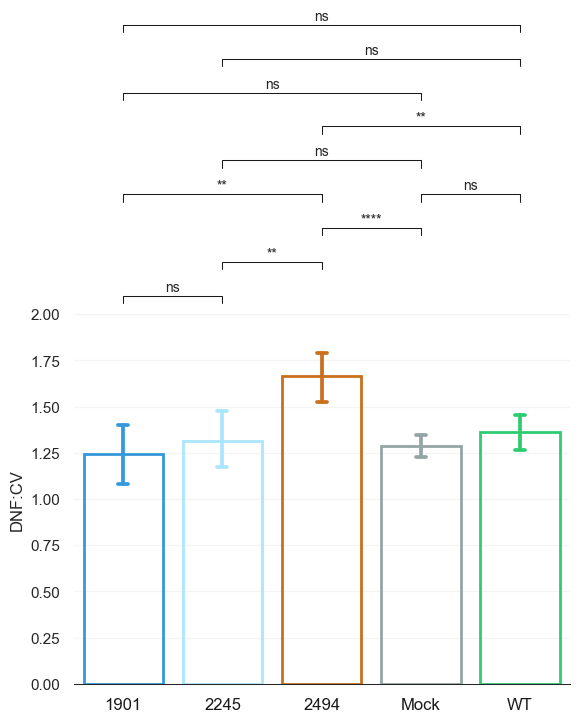

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.822e-01 stat=-8.829e-01
2245 v.s. 2494: t-test independent samples, P_val=3.994e-07 stat=6.258e+00
2494 v.s. Mock: t-test independent samples, P_val=9.612e-06 stat=-5.124e+00
Mock v.s. WT: t-test independent samples, P_val=9.190e-05 stat=4.336e+00
1901 v.s. 2494: t-test independent samples, P_val=2.483e-04 stat=4.107e+00
2245 v.s. Mock: t-test independent samples, P_val=7.490e-03 stat=2.795e+00
2494 v.s. WT: t-test independent samples, P_val=2.649e-01 stat=-1.138e+00
1901 v.s. Mock: t-test independent samples, P_val=3.092e-01 stat=1.028e+00
2245 v.s. WT: t-test independent samples, P_val=8.227e-07 stat=5.883e+00
1901 v.s. WT: t-test independent samples, P_val=8.529e-04 stat=3.630e+00


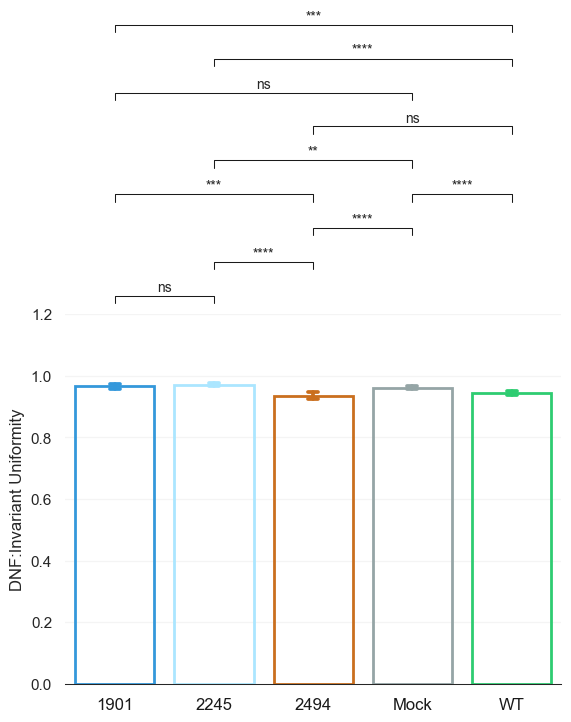

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.880e-02 stat=-1.867e+00
2245 v.s. 2494: t-test independent samples, P_val=1.975e-08 stat=-7.281e+00
2494 v.s. Mock: t-test independent samples, P_val=1.925e-04 stat=4.140e+00
Mock v.s. WT: t-test independent samples, P_val=1.346e-08 stat=-7.062e+00
1901 v.s. 2494: t-test independent samples, P_val=9.353e-13 stat=-1.117e+01
2245 v.s. Mock: t-test independent samples, P_val=1.511e-06 stat=-5.502e+00
2494 v.s. WT: t-test independent samples, P_val=5.853e-02 stat=-1.972e+00
1901 v.s. Mock: t-test independent samples, P_val=9.224e-12 stat=-9.036e+00
2245 v.s. WT: t-test independent samples, P_val=2.910e-12 stat=-1.006e+01
1901 v.s. WT: t-test independent samples, P_val=3.069e-17 stat=-1.493e+01


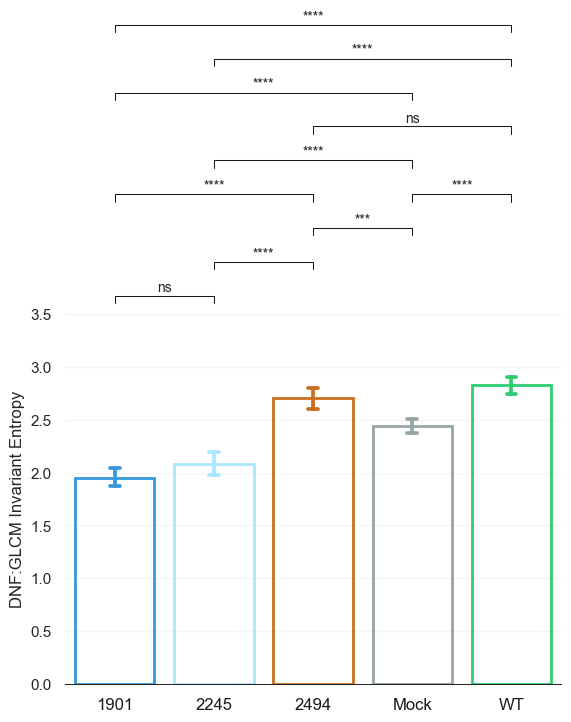

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.601e-08 stat=-6.934e+00
2245 v.s. 2494: t-test independent samples, P_val=8.040e-01 stat=2.502e-01
2494 v.s. Mock: t-test independent samples, P_val=6.352e-09 stat=7.491e+00
Mock v.s. WT: t-test independent samples, P_val=5.321e-05 stat=-4.511e+00
1901 v.s. 2494: t-test independent samples, P_val=7.022e-05 stat=-4.544e+00
2245 v.s. Mock: t-test independent samples, P_val=9.019e-14 stat=1.040e+01
2494 v.s. WT: t-test independent samples, P_val=8.851e-05 stat=4.575e+00
1901 v.s. Mock: t-test independent samples, P_val=6.708e-08 stat=6.423e+00
2245 v.s. WT: t-test independent samples, P_val=5.037e-08 stat=6.770e+00
1901 v.s. WT: t-test independent samples, P_val=1.590e-01 stat=1.437e+00


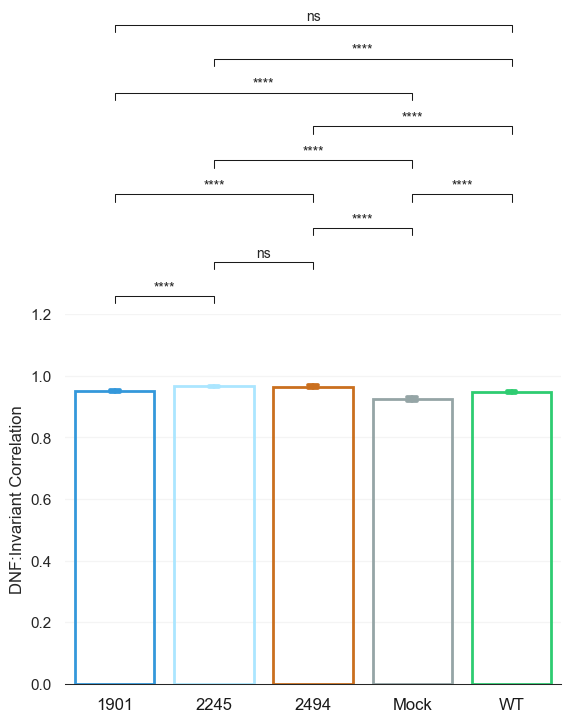

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.267e-01 stat=-9.251e-02
2245 v.s. 2494: t-test independent samples, P_val=9.086e-10 stat=-8.367e+00
2494 v.s. Mock: t-test independent samples, P_val=2.347e-03 stat=3.267e+00
Mock v.s. WT: t-test independent samples, P_val=3.088e-04 stat=-3.941e+00
1901 v.s. 2494: t-test independent samples, P_val=3.723e-08 stat=-7.120e+00
2245 v.s. Mock: t-test independent samples, P_val=1.309e-08 stat=-6.865e+00
2494 v.s. WT: t-test independent samples, P_val=9.111e-01 stat=1.126e-01
1901 v.s. Mock: t-test independent samples, P_val=4.126e-07 stat=-5.897e+00
2245 v.s. WT: t-test independent samples, P_val=5.650e-13 stat=-1.066e+01
1901 v.s. WT: t-test independent samples, P_val=1.441e-10 stat=-8.771e+00


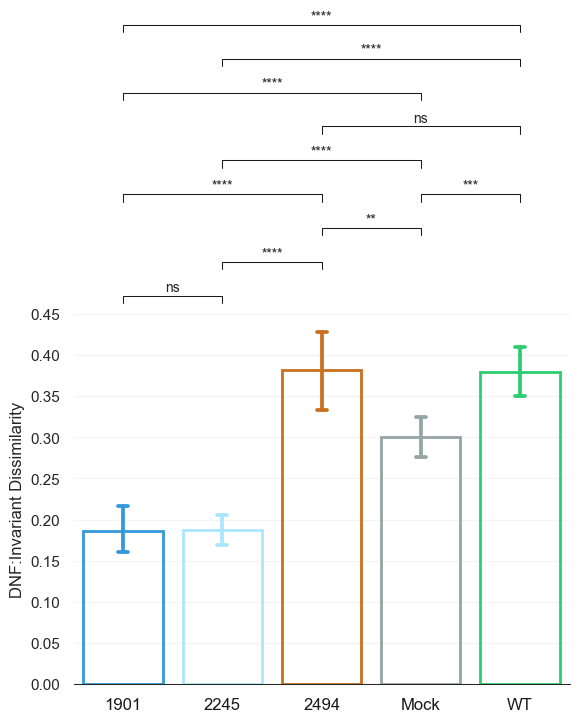

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.754e-03 stat=-3.337e+00
2245 v.s. 2494: t-test independent samples, P_val=1.303e-09 stat=-8.237e+00
2494 v.s. Mock: t-test independent samples, P_val=2.379e-02 stat=2.358e+00
Mock v.s. WT: t-test independent samples, P_val=1.377e-03 stat=-3.433e+00
1901 v.s. 2494: t-test independent samples, P_val=4.503e-13 stat=-1.149e+01
2245 v.s. Mock: t-test independent samples, P_val=7.459e-09 stat=-7.026e+00
2494 v.s. WT: t-test independent samples, P_val=6.649e-01 stat=-4.378e-01
1901 v.s. Mock: t-test independent samples, P_val=1.019e-13 stat=-1.044e+01
2245 v.s. WT: t-test independent samples, P_val=2.205e-13 stat=-1.101e+01
1901 v.s. WT: t-test independent samples, P_val=7.372e-18 stat=-1.561e+01


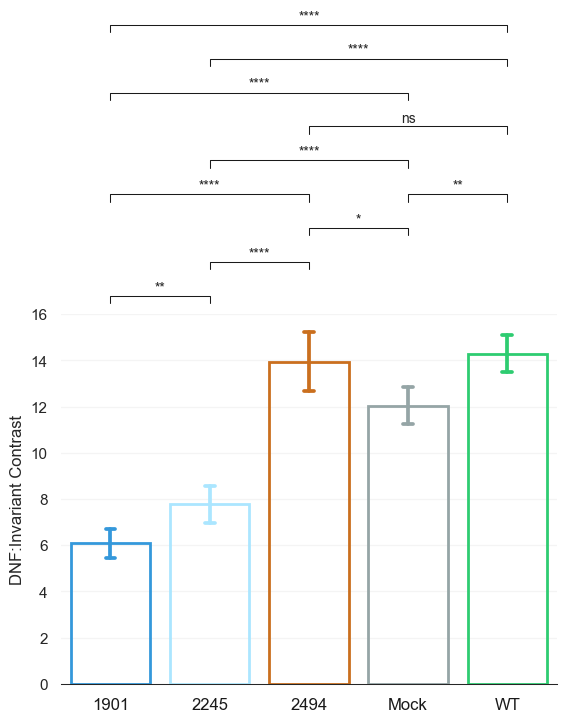

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.686e-01 stat=-9.086e-01
2245 v.s. 2494: t-test independent samples, P_val=1.498e-07 stat=6.588e+00
2494 v.s. Mock: t-test independent samples, P_val=2.235e-05 stat=-4.851e+00
Mock v.s. WT: t-test independent samples, P_val=1.245e-04 stat=4.239e+00
1901 v.s. 2494: t-test independent samples, P_val=1.133e-04 stat=4.379e+00
2245 v.s. Mock: t-test independent samples, P_val=1.284e-03 stat=3.425e+00
2494 v.s. WT: t-test independent samples, P_val=3.144e-01 stat=-1.025e+00
1901 v.s. Mock: t-test independent samples, P_val=1.391e-01 stat=1.505e+00
2245 v.s. WT: t-test independent samples, P_val=1.321e-07 stat=6.463e+00
1901 v.s. WT: t-test independent samples, P_val=2.408e-04 stat=4.065e+00


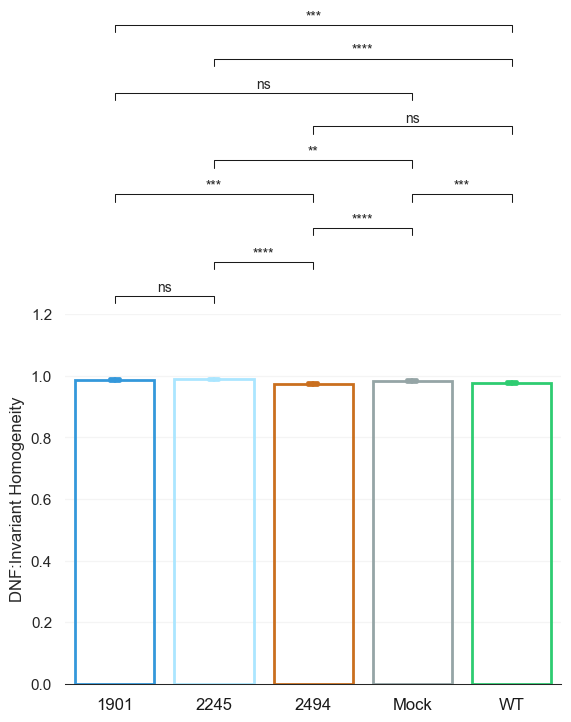

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.785e-01 stat=-8.898e-01
2245 v.s. 2494: t-test independent samples, P_val=3.972e-07 stat=6.260e+00
2494 v.s. Mock: t-test independent samples, P_val=9.445e-06 stat=-5.130e+00
Mock v.s. WT: t-test independent samples, P_val=9.187e-05 stat=4.337e+00
1901 v.s. 2494: t-test independent samples, P_val=2.602e-04 stat=4.090e+00
2245 v.s. Mock: t-test independent samples, P_val=7.679e-03 stat=2.786e+00
2494 v.s. WT: t-test independent samples, P_val=2.624e-01 stat=-1.144e+00
1901 v.s. Mock: t-test independent samples, P_val=3.216e-01 stat=1.002e+00
2245 v.s. WT: t-test independent samples, P_val=8.343e-07 stat=5.879e+00
1901 v.s. WT: t-test independent samples, P_val=9.164e-04 stat=3.604e+00


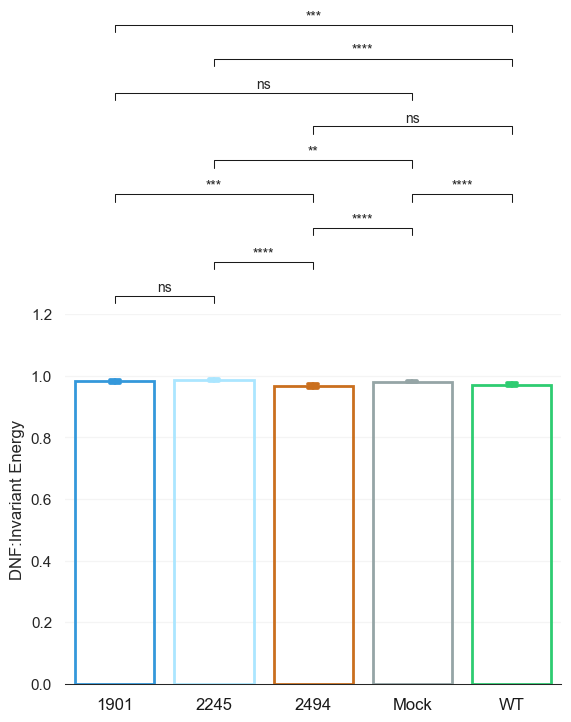

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.645e-03 stat=3.191e+00
2245 v.s. 2494: t-test independent samples, P_val=1.607e-05 stat=-5.022e+00
2494 v.s. Mock: t-test independent samples, P_val=2.431e-02 stat=-2.348e+00
Mock v.s. WT: t-test independent samples, P_val=6.448e-01 stat=4.645e-01
1901 v.s. 2494: t-test independent samples, P_val=1.655e-01 stat=-1.418e+00
2245 v.s. Mock: t-test independent samples, P_val=1.514e-11 stat=-8.830e+00
2494 v.s. WT: t-test independent samples, P_val=6.109e-02 stat=-1.951e+00
1901 v.s. Mock: t-test independent samples, P_val=5.568e-05 stat=-4.442e+00
2245 v.s. WT: t-test independent samples, P_val=1.086e-10 stat=-8.789e+00
1901 v.s. WT: t-test independent samples, P_val=5.497e-04 stat=-3.783e+00


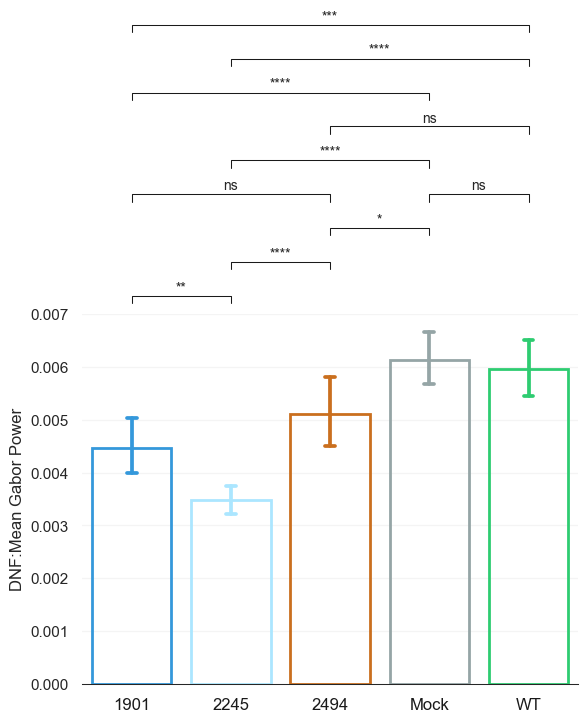

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.666e-04 stat=-4.125e+00
2245 v.s. 2494: t-test independent samples, P_val=2.990e-07 stat=-6.355e+00
2494 v.s. Mock: t-test independent samples, P_val=1.552e-05 stat=4.969e+00
Mock v.s. WT: t-test independent samples, P_val=7.729e-06 stat=-5.116e+00
1901 v.s. 2494: t-test independent samples, P_val=2.320e-13 stat=-1.178e+01
2245 v.s. Mock: t-test independent samples, P_val=2.479e-03 stat=-3.198e+00
2494 v.s. WT: t-test independent samples, P_val=3.931e-01 stat=8.674e-01
1901 v.s. Mock: t-test independent samples, P_val=5.643e-12 stat=-9.186e+00
2245 v.s. WT: t-test independent samples, P_val=3.220e-08 stat=-6.914e+00
1901 v.s. WT: t-test independent samples, P_val=1.361e-16 stat=-1.424e+01


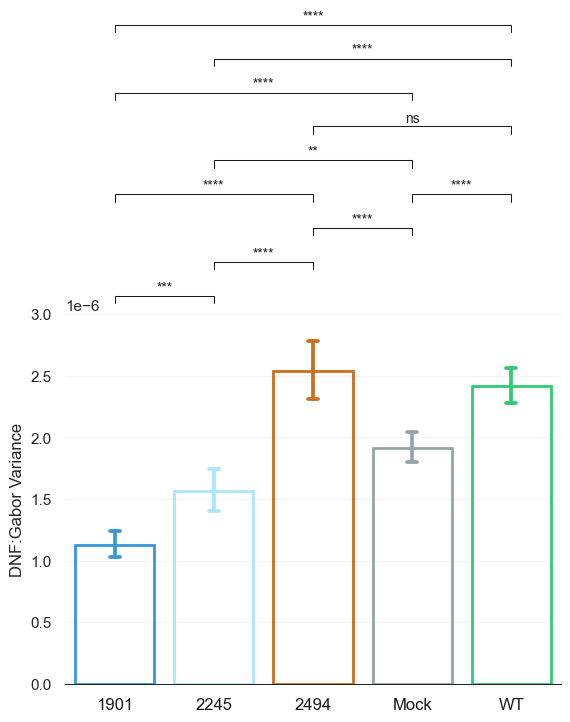

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.409e-03 stat=-2.762e+00
2245 v.s. 2494: t-test independent samples, P_val=5.554e-09 stat=-7.723e+00
2494 v.s. Mock: t-test independent samples, P_val=4.831e-13 stat=1.084e+01
Mock v.s. WT: t-test independent samples, P_val=2.025e-10 stat=-8.377e+00
1901 v.s. 2494: t-test independent samples, P_val=6.104e-13 stat=-1.136e+01
2245 v.s. Mock: t-test independent samples, P_val=8.448e-01 stat=1.969e-01
2494 v.s. WT: t-test independent samples, P_val=6.022e-03 stat=2.972e+00
1901 v.s. Mock: t-test independent samples, P_val=1.241e-03 stat=-3.442e+00
2245 v.s. WT: t-test independent samples, P_val=8.534e-07 stat=-5.872e+00
1901 v.s. WT: t-test independent samples, P_val=1.065e-11 stat=-9.693e+00


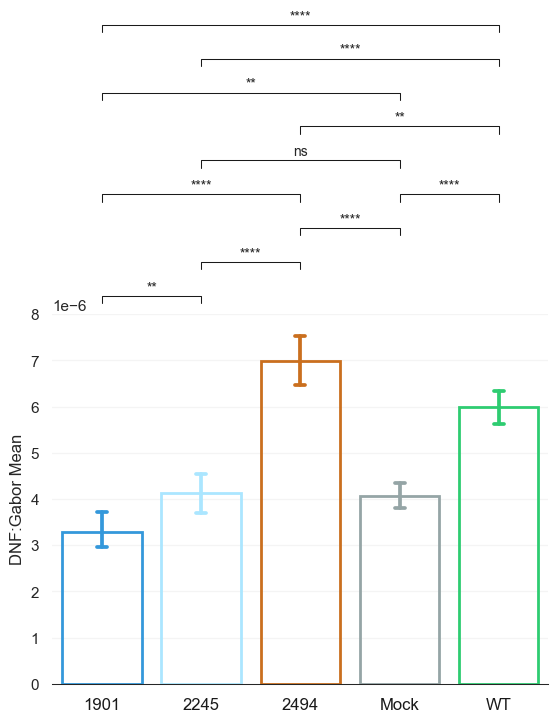

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.666e-04 stat=-4.125e+00
2245 v.s. 2494: t-test independent samples, P_val=2.989e-07 stat=-6.355e+00
2494 v.s. Mock: t-test independent samples, P_val=1.552e-05 stat=4.969e+00
Mock v.s. WT: t-test independent samples, P_val=7.726e-06 stat=-5.116e+00
1901 v.s. 2494: t-test independent samples, P_val=2.320e-13 stat=-1.178e+01
2245 v.s. Mock: t-test independent samples, P_val=2.479e-03 stat=-3.198e+00
2494 v.s. WT: t-test independent samples, P_val=3.930e-01 stat=8.675e-01
1901 v.s. Mock: t-test independent samples, P_val=5.646e-12 stat=-9.186e+00
2245 v.s. WT: t-test independent samples, P_val=3.220e-08 stat=-6.914e+00
1901 v.s. WT: t-test independent samples, P_val=1.362e-16 stat=-1.424e+01


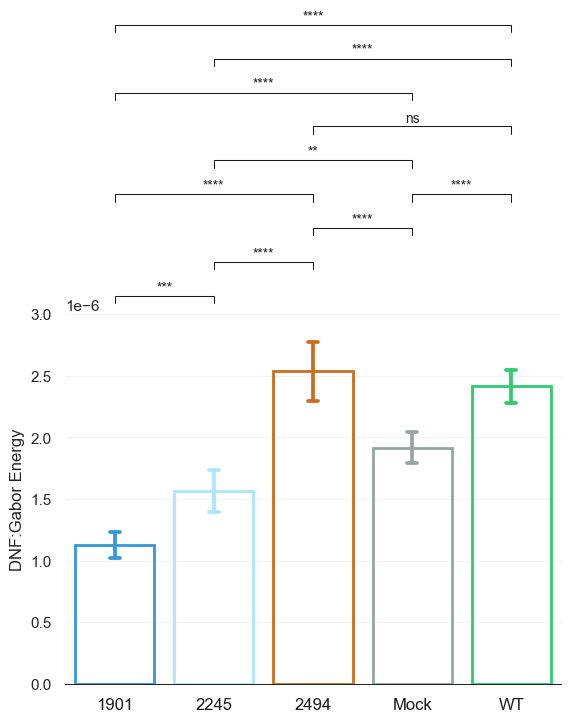

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.888e-01 stat=1.406e-01
2245 v.s. 2494: t-test independent samples, P_val=3.103e-05 stat=-4.801e+00
2494 v.s. Mock: t-test independent samples, P_val=4.014e-06 stat=5.405e+00
Mock v.s. WT: t-test independent samples, P_val=1.764e-03 stat=-3.346e+00
1901 v.s. 2494: t-test independent samples, P_val=3.032e-04 stat=-4.037e+00
2245 v.s. Mock: t-test independent samples, P_val=3.041e-01 stat=-1.039e+00
2494 v.s. WT: t-test independent samples, P_val=3.051e-02 stat=2.279e+00
1901 v.s. Mock: t-test independent samples, P_val=4.817e-01 stat=-7.094e-01
2245 v.s. WT: t-test independent samples, P_val=2.278e-03 stat=-3.272e+00
1901 v.s. WT: t-test independent samples, P_val=1.220e-02 stat=-2.635e+00


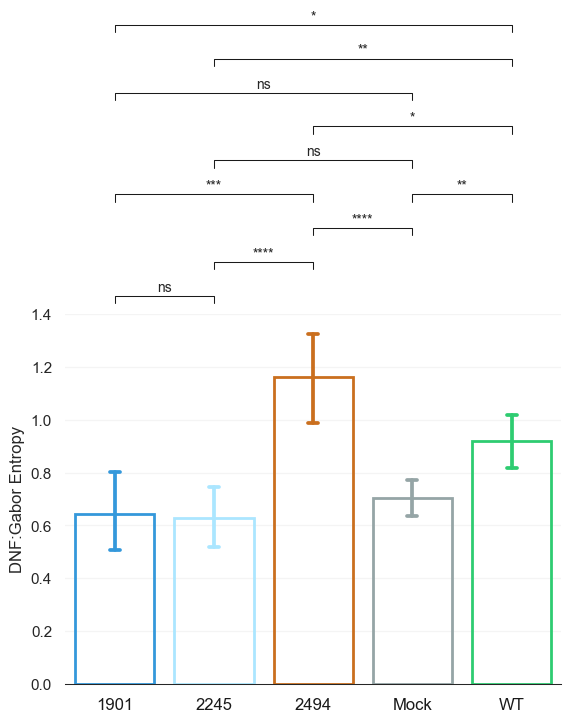

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.805e-01 stat=-4.147e-01
2245 v.s. 2494: t-test independent samples, P_val=3.178e-11 stat=-9.613e+00
2494 v.s. Mock: t-test independent samples, P_val=9.002e-01 stat=-1.263e-01
Mock v.s. WT: t-test independent samples, P_val=3.204e-01 stat=-1.006e+00
1901 v.s. 2494: t-test independent samples, P_val=1.263e-11 stat=-1.010e+01
2245 v.s. Mock: t-test independent samples, P_val=4.860e-16 stat=-1.210e+01
2494 v.s. WT: t-test independent samples, P_val=2.983e-01 stat=-1.060e+00
1901 v.s. Mock: t-test independent samples, P_val=1.591e-16 stat=-1.260e+01
2245 v.s. WT: t-test independent samples, P_val=2.933e-15 stat=-1.271e+01
1901 v.s. WT: t-test independent samples, P_val=9.524e-16 stat=-1.338e+01


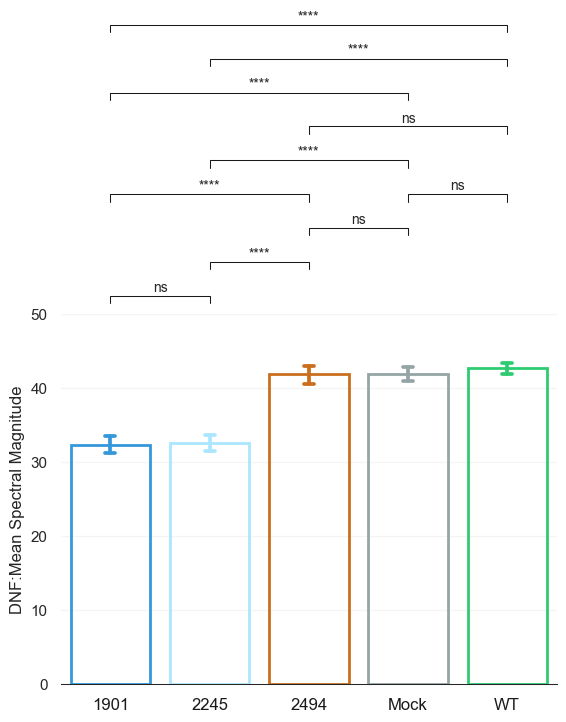

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.579e-06 stat=5.131e+00
2245 v.s. 2494: t-test independent samples, P_val=3.502e-01 stat=-9.473e-01
2494 v.s. Mock: t-test independent samples, P_val=5.134e-06 stat=-5.326e+00
Mock v.s. WT: t-test independent samples, P_val=2.005e-03 stat=3.300e+00
1901 v.s. 2494: t-test independent samples, P_val=1.329e-02 stat=2.617e+00
2245 v.s. Mock: t-test independent samples, P_val=5.207e-10 stat=-7.792e+00
2494 v.s. WT: t-test independent samples, P_val=2.502e-04 stat=-4.193e+00
1901 v.s. Mock: t-test independent samples, P_val=4.413e-06 stat=-5.204e+00
2245 v.s. WT: t-test independent samples, P_val=7.713e-09 stat=-7.374e+00
1901 v.s. WT: t-test independent samples, P_val=2.245e-02 stat=-2.382e+00


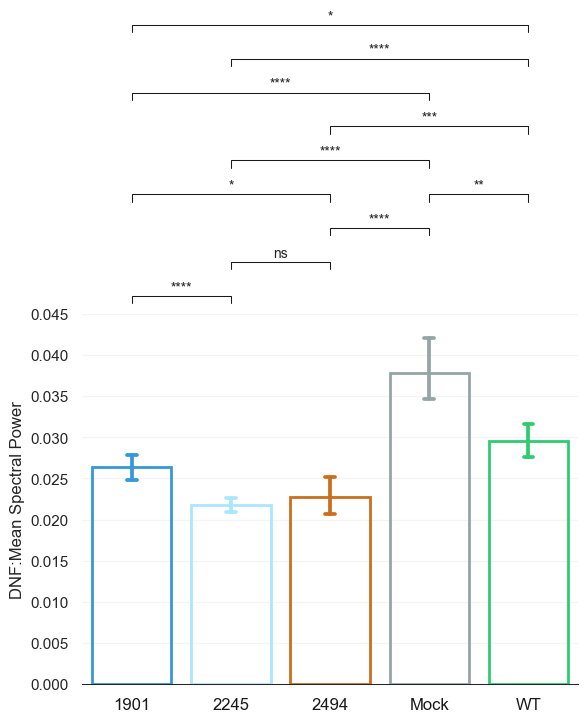

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.667e-01 stat=9.123e-01
2245 v.s. 2494: t-test independent samples, P_val=7.989e-06 stat=-5.256e+00
2494 v.s. Mock: t-test independent samples, P_val=4.485e-06 stat=5.369e+00
Mock v.s. WT: t-test independent samples, P_val=5.122e-04 stat=-3.772e+00
1901 v.s. 2494: t-test independent samples, P_val=1.303e-03 stat=-3.514e+00
2245 v.s. Mock: t-test independent samples, P_val=1.494e-01 stat=-1.466e+00
2494 v.s. WT: t-test independent samples, P_val=1.044e-01 stat=1.679e+00
1901 v.s. Mock: t-test independent samples, P_val=9.231e-01 stat=-9.707e-02
2245 v.s. WT: t-test independent samples, P_val=1.932e-04 stat=-4.127e+00
1901 v.s. WT: t-test independent samples, P_val=1.846e-02 stat=-2.465e+00


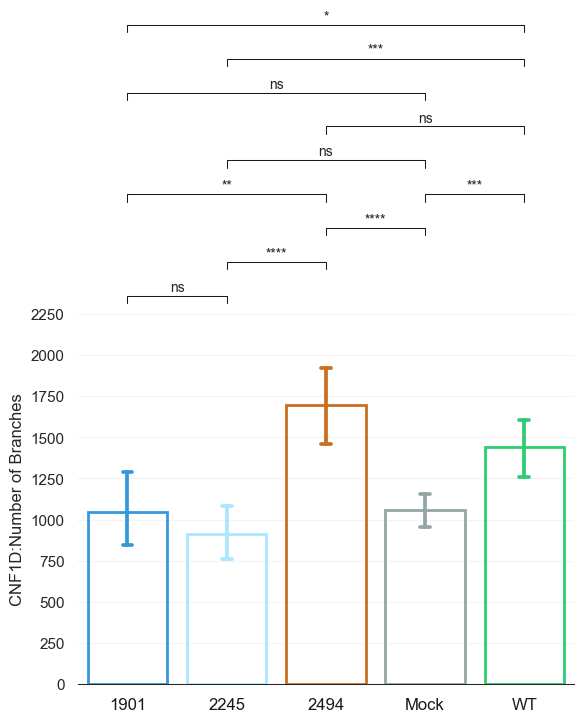

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.124e-02 stat=-1.728e+00
2245 v.s. 2494: t-test independent samples, P_val=1.569e-01 stat=-1.448e+00
2494 v.s. Mock: t-test independent samples, P_val=1.425e-04 stat=4.241e+00
Mock v.s. WT: t-test independent samples, P_val=5.932e-01 stat=5.385e-01
1901 v.s. 2494: t-test independent samples, P_val=3.304e-03 stat=-3.168e+00
2245 v.s. Mock: t-test independent samples, P_val=6.130e-02 stat=1.917e+00
2494 v.s. WT: t-test independent samples, P_val=9.406e-05 stat=4.553e+00
1901 v.s. Mock: t-test independent samples, P_val=8.118e-01 stat=-2.395e-01
2245 v.s. WT: t-test independent samples, P_val=4.821e-02 stat=2.041e+00
1901 v.s. WT: t-test independent samples, P_val=8.588e-01 stat=1.792e-01


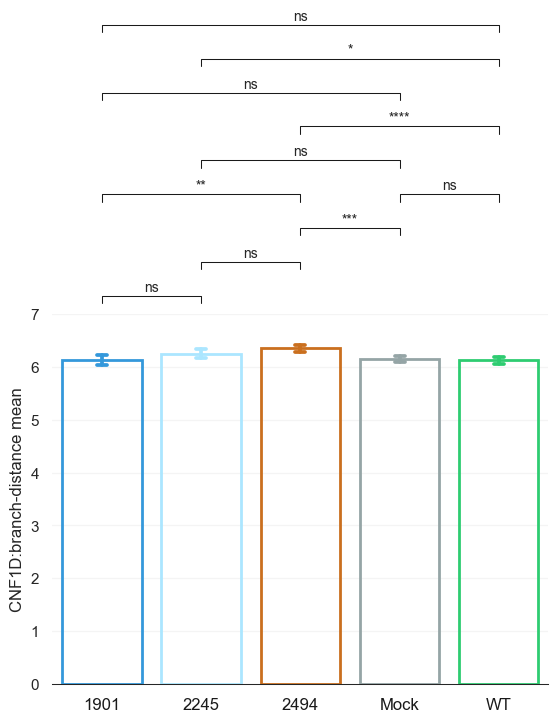

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.856e-01 stat=-4.076e-01
2245 v.s. 2494: t-test independent samples, P_val=5.715e-03 stat=-2.950e+00
2494 v.s. Mock: t-test independent samples, P_val=1.402e-04 stat=4.247e+00
Mock v.s. WT: t-test independent samples, P_val=9.831e-01 stat=2.131e-02
1901 v.s. 2494: t-test independent samples, P_val=1.418e-02 stat=-2.590e+00
2245 v.s. Mock: t-test independent samples, P_val=2.595e-01 stat=1.141e+00
2494 v.s. WT: t-test independent samples, P_val=4.163e-04 stat=4.003e+00
1901 v.s. Mock: t-test independent samples, P_val=6.051e-01 stat=5.206e-01
2245 v.s. WT: t-test independent samples, P_val=3.160e-01 stat=1.016e+00
1901 v.s. WT: t-test independent samples, P_val=6.481e-01 stat=4.601e-01


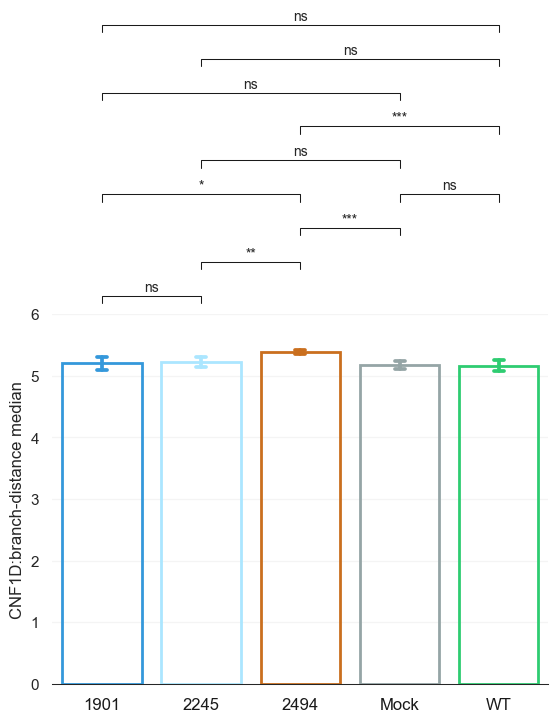

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)
C:\Users\diogo\anaconda3\envs\Cytosk_recentpy\lib\site-packages\statannot\statannot.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = stats.ttest_ind(a=box_data1, b=box_data2, **stats_params)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


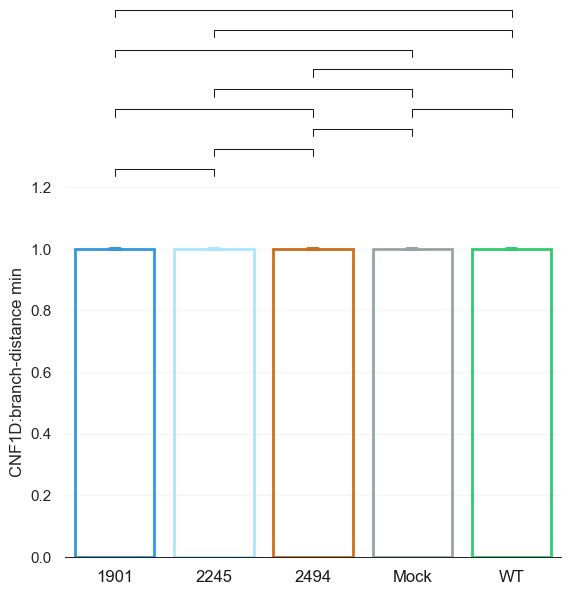

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.592e-01 stat=-1.433e+00
2245 v.s. 2494: t-test independent samples, P_val=6.238e-01 stat=4.950e-01
2494 v.s. Mock: t-test independent samples, P_val=3.281e-01 stat=9.911e-01
Mock v.s. WT: t-test independent samples, P_val=7.169e-02 stat=-1.849e+00
1901 v.s. 2494: t-test independent samples, P_val=3.076e-01 stat=-1.036e+00
2245 v.s. Mock: t-test independent samples, P_val=1.527e-01 stat=1.453e+00
2494 v.s. WT: t-test independent samples, P_val=6.125e-01 stat=-5.122e-01
1901 v.s. Mock: t-test independent samples, P_val=8.324e-01 stat=-2.129e-01
2245 v.s. WT: t-test independent samples, P_val=8.847e-01 stat=1.460e-01
1901 v.s. WT: t-test independent samples, P_val=7.559e-02 stat=-1.828e+00


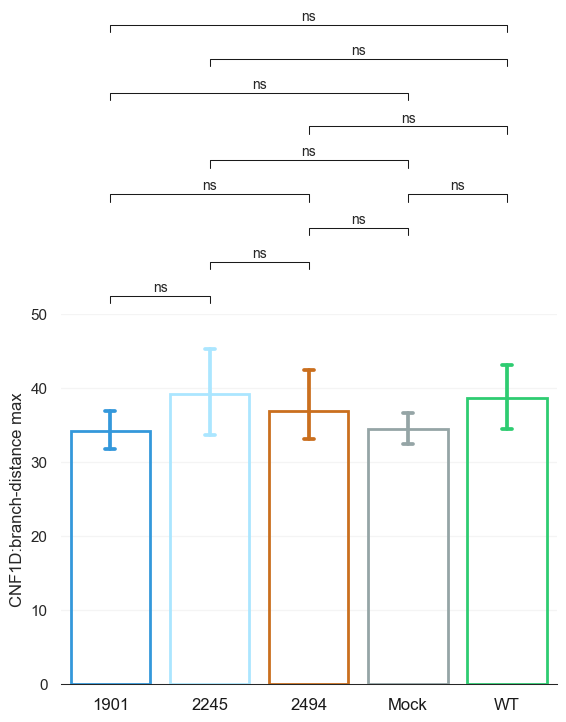

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.524e-02 stat=-1.762e+00
2245 v.s. 2494: t-test independent samples, P_val=4.461e-01 stat=7.709e-01
2494 v.s. Mock: t-test independent samples, P_val=3.685e-02 stat=2.166e+00
Mock v.s. WT: t-test independent samples, P_val=9.850e-01 stat=-1.895e-02
1901 v.s. 2494: t-test independent samples, P_val=2.381e-02 stat=-2.370e+00
2245 v.s. Mock: t-test independent samples, P_val=7.704e-02 stat=1.808e+00
2494 v.s. WT: t-test independent samples, P_val=5.396e-02 stat=2.012e+00
1901 v.s. Mock: t-test independent samples, P_val=6.504e-01 stat=-4.562e-01
2245 v.s. WT: t-test independent samples, P_val=1.518e-01 stat=1.463e+00
1901 v.s. WT: t-test independent samples, P_val=6.505e-01 stat=-4.568e-01


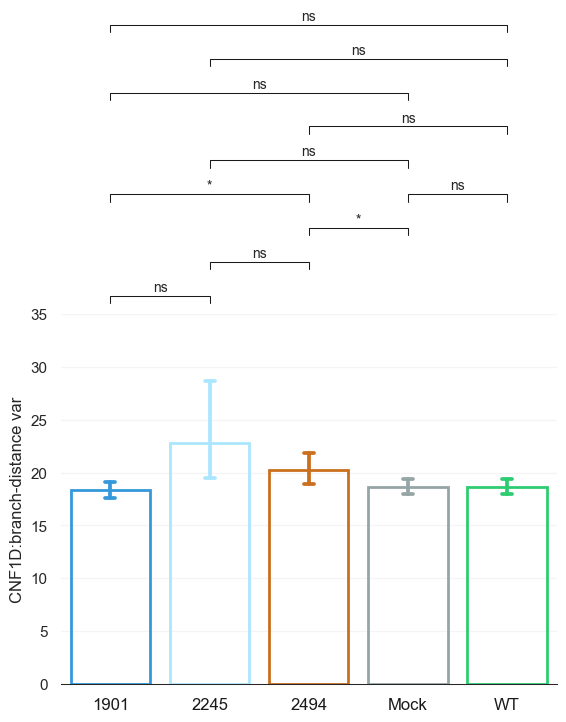

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.714e-02 stat=-1.955e+00
2245 v.s. 2494: t-test independent samples, P_val=4.796e-01 stat=7.148e-01
2494 v.s. Mock: t-test independent samples, P_val=3.948e-02 stat=2.135e+00
Mock v.s. WT: t-test independent samples, P_val=9.641e-01 stat=-4.534e-02
1901 v.s. 2494: t-test independent samples, P_val=2.510e-02 stat=-2.347e+00
2245 v.s. Mock: t-test independent samples, P_val=5.483e-02 stat=1.969e+00
2494 v.s. WT: t-test independent samples, P_val=5.690e-02 stat=1.986e+00
1901 v.s. Mock: t-test independent samples, P_val=6.480e-01 stat=-4.595e-01
2245 v.s. WT: t-test independent samples, P_val=1.184e-01 stat=1.598e+00
1901 v.s. WT: t-test independent samples, P_val=6.311e-01 stat=-4.842e-01


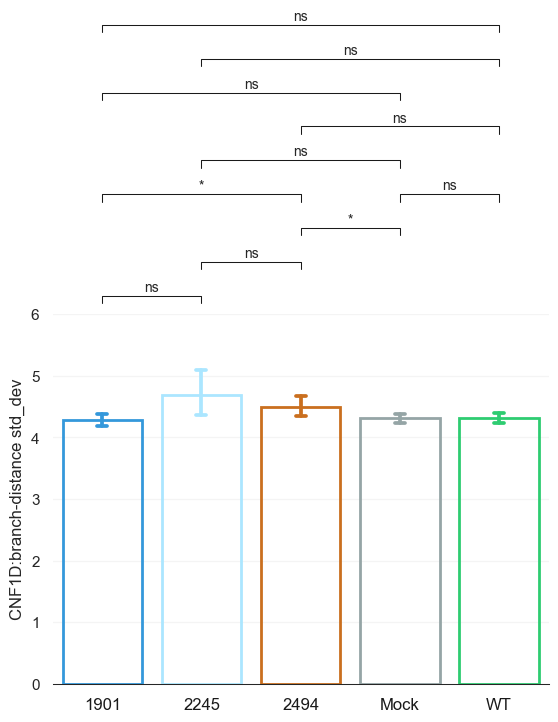

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.991e-01 stat=-1.304e+00
2245 v.s. 2494: t-test independent samples, P_val=2.559e-01 stat=1.156e+00
2494 v.s. Mock: t-test independent samples, P_val=9.486e-01 stat=6.495e-02
Mock v.s. WT: t-test independent samples, P_val=6.969e-02 stat=-1.863e+00
1901 v.s. 2494: t-test independent samples, P_val=6.947e-01 stat=3.960e-01
2245 v.s. Mock: t-test independent samples, P_val=1.027e-01 stat=1.664e+00
2494 v.s. WT: t-test independent samples, P_val=2.191e-01 stat=-1.257e+00
1901 v.s. Mock: t-test independent samples, P_val=5.396e-01 stat=6.180e-01
2245 v.s. WT: t-test independent samples, P_val=3.852e-01 stat=8.784e-01
1901 v.s. WT: t-test independent samples, P_val=4.395e-01 stat=-7.815e-01


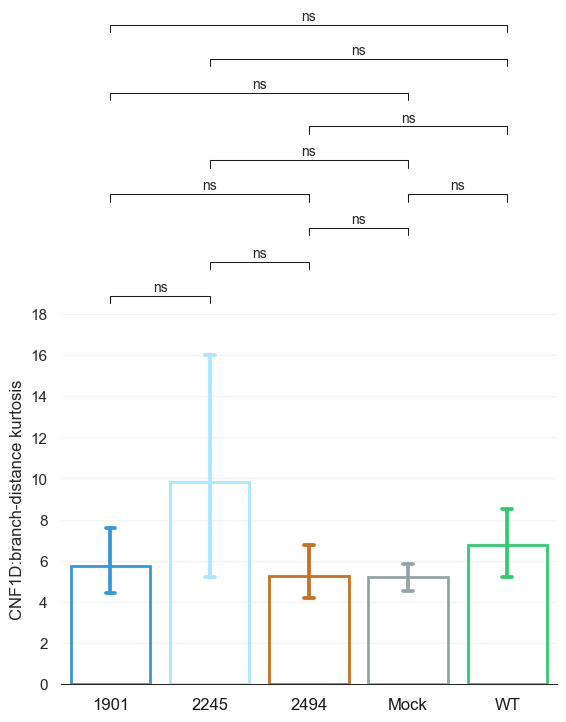

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.860e-01 stat=-1.344e+00
2245 v.s. 2494: t-test independent samples, P_val=2.649e-01 stat=1.134e+00
2494 v.s. Mock: t-test independent samples, P_val=8.354e-01 stat=2.093e-01
Mock v.s. WT: t-test independent samples, P_val=9.374e-02 stat=-1.716e+00
1901 v.s. 2494: t-test independent samples, P_val=7.949e-01 stat=2.620e-01
2245 v.s. Mock: t-test independent samples, P_val=1.006e-01 stat=1.675e+00
2494 v.s. WT: t-test independent samples, P_val=2.847e-01 stat=-1.091e+00
1901 v.s. Mock: t-test independent samples, P_val=5.771e-01 stat=5.617e-01
2245 v.s. WT: t-test independent samples, P_val=3.699e-01 stat=9.075e-01
1901 v.s. WT: t-test independent samples, P_val=4.134e-01 stat=-8.273e-01


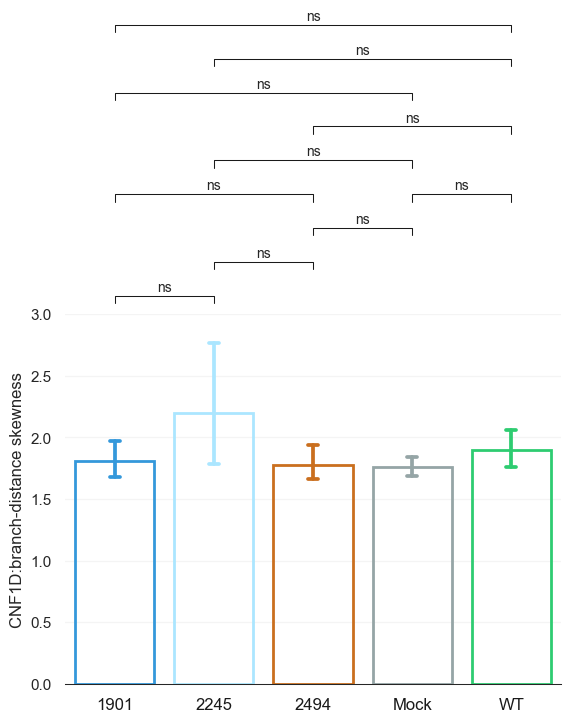

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.565e-02 stat=-1.821e+00
2245 v.s. 2494: t-test independent samples, P_val=2.704e-01 stat=1.120e+00
2494 v.s. Mock: t-test independent samples, P_val=5.480e-01 stat=6.063e-01
Mock v.s. WT: t-test independent samples, P_val=6.481e-01 stat=-4.598e-01
1901 v.s. 2494: t-test independent samples, P_val=3.651e-01 stat=-9.184e-01
2245 v.s. Mock: t-test independent samples, P_val=7.159e-02 stat=1.843e+00
2494 v.s. WT: t-test independent samples, P_val=7.955e-01 stat=2.617e-01
1901 v.s. Mock: t-test independent samples, P_val=6.446e-01 stat=-4.643e-01
2245 v.s. WT: t-test independent samples, P_val=1.711e-01 stat=1.395e+00
1901 v.s. WT: t-test independent samples, P_val=3.519e-01 stat=-9.427e-01


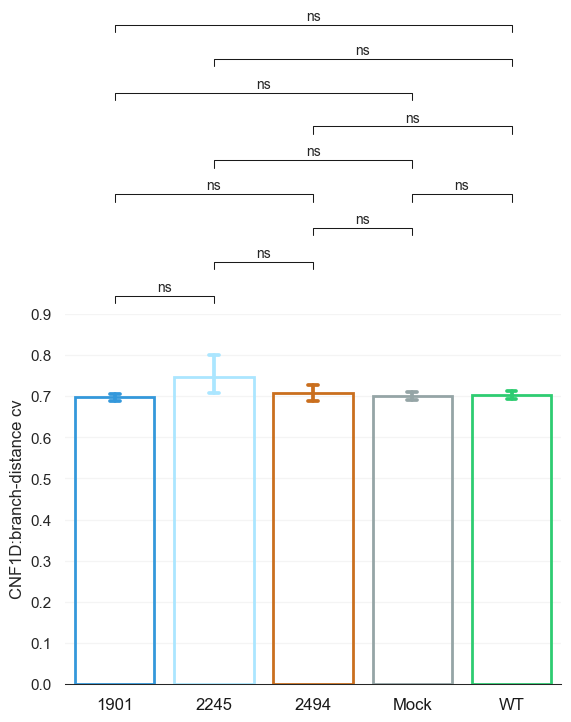

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.766e-01 stat=1.102e+00
2245 v.s. 2494: t-test independent samples, P_val=5.218e-03 stat=2.985e+00
2494 v.s. Mock: t-test independent samples, P_val=5.407e-05 stat=-4.562e+00
Mock v.s. WT: t-test independent samples, P_val=1.773e-01 stat=1.373e+00
1901 v.s. 2494: t-test independent samples, P_val=4.132e-03 stat=3.082e+00
2245 v.s. Mock: t-test independent samples, P_val=2.291e-02 stat=-2.352e+00
2494 v.s. WT: t-test independent samples, P_val=3.605e-03 stat=-3.177e+00
1901 v.s. Mock: t-test independent samples, P_val=4.630e-01 stat=-7.401e-01
2245 v.s. WT: t-test independent samples, P_val=4.559e-01 stat=-7.533e-01
1901 v.s. WT: t-test independent samples, P_val=6.816e-01 stat=4.135e-01


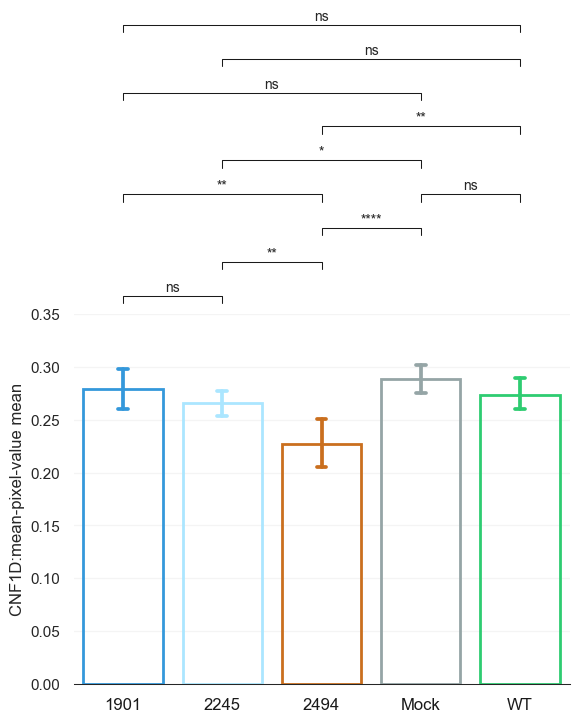

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.283e-01 stat=9.889e-01
2245 v.s. 2494: t-test independent samples, P_val=3.020e-03 stat=3.194e+00
2494 v.s. Mock: t-test independent samples, P_val=4.481e-05 stat=-4.624e+00
Mock v.s. WT: t-test independent samples, P_val=3.367e-01 stat=9.721e-01
1901 v.s. 2494: t-test independent samples, P_val=2.975e-03 stat=3.207e+00
2245 v.s. Mock: t-test independent samples, P_val=6.346e-02 stat=-1.901e+00
2494 v.s. WT: t-test independent samples, P_val=1.276e-03 stat=-3.581e+00
1901 v.s. Mock: t-test independent samples, P_val=6.228e-01 stat=-4.952e-01
2245 v.s. WT: t-test independent samples, P_val=4.319e-01 stat=-7.944e-01
1901 v.s. WT: t-test independent samples, P_val=7.670e-01 stat=2.985e-01


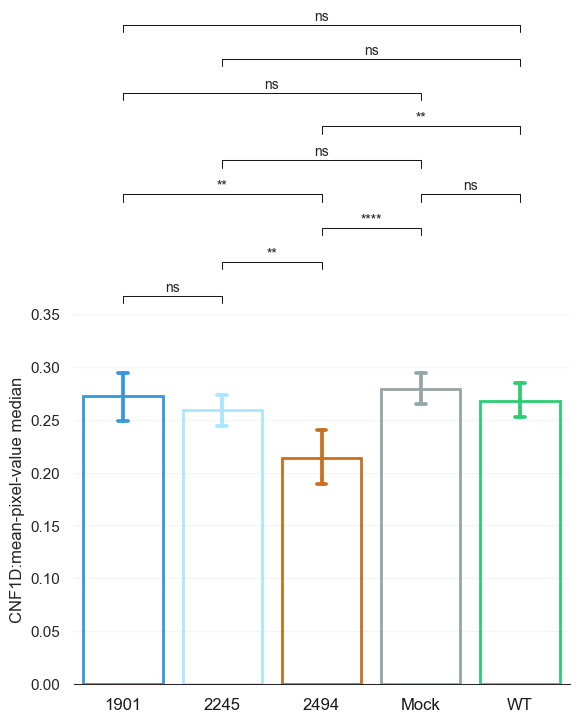

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.625e-01 stat=1.421e+00
2245 v.s. 2494: t-test independent samples, P_val=1.442e-01 stat=1.495e+00
2494 v.s. Mock: t-test independent samples, P_val=1.955e-02 stat=-2.441e+00
Mock v.s. WT: t-test independent samples, P_val=2.411e-01 stat=1.190e+00
1901 v.s. 2494: t-test independent samples, P_val=3.557e-02 stat=2.192e+00
2245 v.s. Mock: t-test independent samples, P_val=9.122e-03 stat=-2.720e+00
2494 v.s. WT: t-test independent samples, P_val=2.880e-02 stat=-2.305e+00
1901 v.s. Mock: t-test independent samples, P_val=5.223e-02 stat=-1.993e+00
2245 v.s. WT: t-test independent samples, P_val=4.943e-02 stat=-2.030e+00
1901 v.s. WT: t-test independent samples, P_val=3.846e-01 stat=-8.799e-01


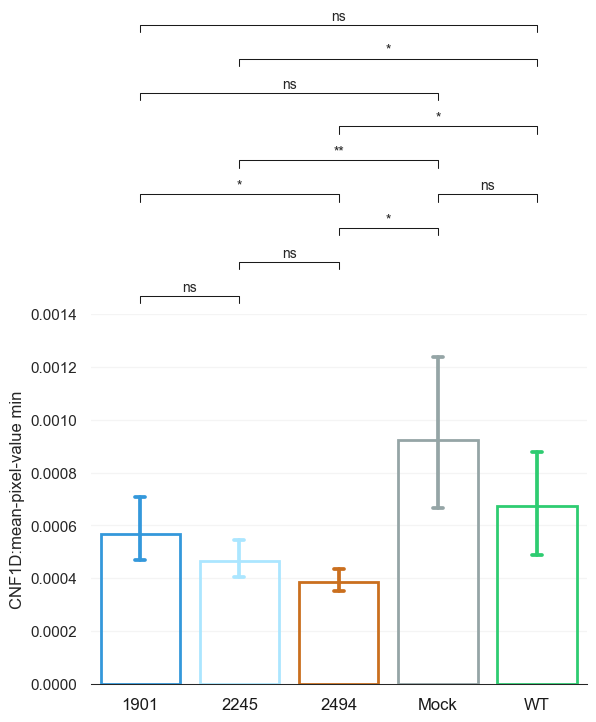

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.286e-01 stat=-3.493e-01
2245 v.s. 2494: t-test independent samples, P_val=5.685e-01 stat=-5.759e-01
2494 v.s. Mock: t-test independent samples, P_val=1.565e-01 stat=-1.446e+00
Mock v.s. WT: t-test independent samples, P_val=1.212e-03 stat=3.478e+00
1901 v.s. 2494: t-test independent samples, P_val=5.041e-01 stat=-6.754e-01
2245 v.s. Mock: t-test independent samples, P_val=1.959e-02 stat=-2.417e+00
2494 v.s. WT: t-test independent samples, P_val=9.908e-02 stat=1.706e+00
1901 v.s. Mock: t-test independent samples, P_val=3.343e-02 stat=-2.193e+00
2245 v.s. WT: t-test independent samples, P_val=1.726e-01 stat=1.390e+00
1901 v.s. WT: t-test independent samples, P_val=4.967e-01 stat=6.865e-01


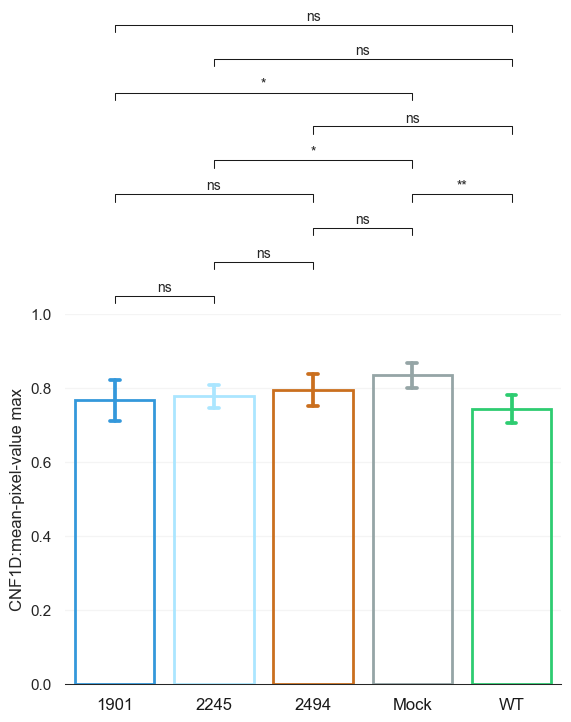

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.288e-01 stat=-1.221e+00
2245 v.s. 2494: t-test independent samples, P_val=1.250e-02 stat=2.638e+00
2494 v.s. Mock: t-test independent samples, P_val=1.061e-01 stat=-1.656e+00
Mock v.s. WT: t-test independent samples, P_val=4.553e-01 stat=7.538e-01
1901 v.s. 2494: t-test independent samples, P_val=2.046e-01 stat=1.294e+00
2245 v.s. Mock: t-test independent samples, P_val=1.278e-01 stat=1.550e+00
2494 v.s. WT: t-test independent samples, P_val=4.983e-01 stat=-6.861e-01
1901 v.s. Mock: t-test independent samples, P_val=9.781e-01 stat=2.760e-02
2245 v.s. WT: t-test independent samples, P_val=6.862e-02 stat=1.874e+00
1901 v.s. WT: t-test independent samples, P_val=5.364e-01 stat=6.241e-01


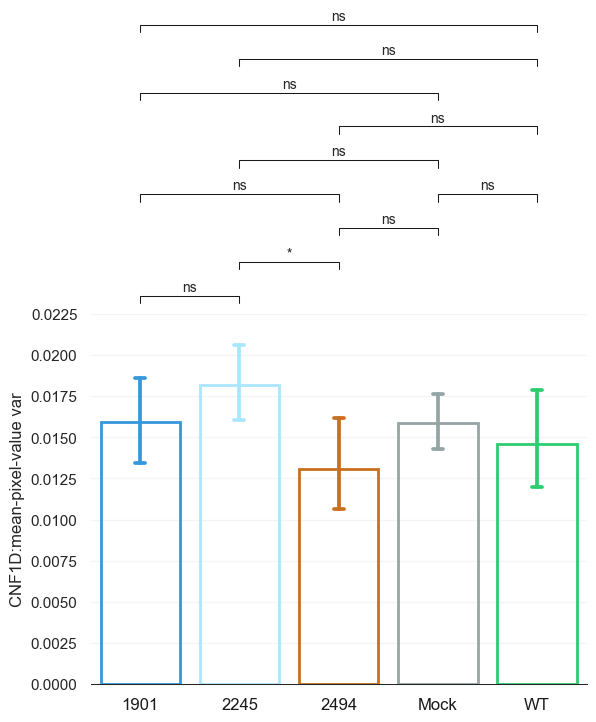

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.838e-01 stat=-1.351e+00
2245 v.s. 2494: t-test independent samples, P_val=8.560e-03 stat=2.791e+00
2494 v.s. Mock: t-test independent samples, P_val=6.872e-02 stat=-1.875e+00
Mock v.s. WT: t-test independent samples, P_val=3.419e-01 stat=9.615e-01
1901 v.s. 2494: t-test independent samples, P_val=1.872e-01 stat=1.347e+00
2245 v.s. Mock: t-test independent samples, P_val=1.431e-01 stat=1.489e+00
2494 v.s. WT: t-test independent samples, P_val=4.822e-01 stat=-7.122e-01
1901 v.s. Mock: t-test independent samples, P_val=8.770e-01 stat=-1.556e-01
2245 v.s. WT: t-test independent samples, P_val=4.985e-02 stat=2.026e+00
1901 v.s. WT: t-test independent samples, P_val=5.171e-01 stat=6.541e-01


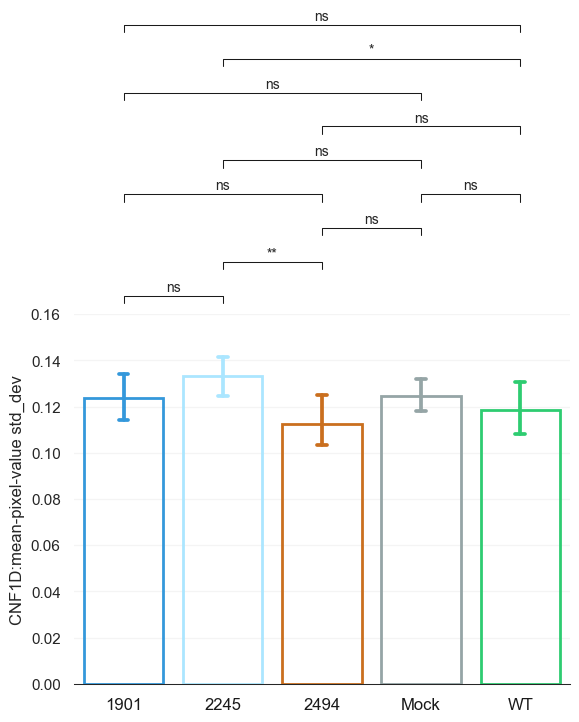

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.256e-01 stat=8.045e-01
2245 v.s. 2494: t-test independent samples, P_val=3.750e-04 stat=-3.949e+00
2494 v.s. Mock: t-test independent samples, P_val=8.371e-02 stat=1.777e+00
Mock v.s. WT: t-test independent samples, P_val=3.182e-03 stat=3.134e+00
1901 v.s. 2494: t-test independent samples, P_val=2.551e-01 stat=-1.158e+00
2245 v.s. Mock: t-test independent samples, P_val=1.136e-02 stat=-2.635e+00
2494 v.s. WT: t-test independent samples, P_val=1.699e-04 stat=4.336e+00
1901 v.s. Mock: t-test independent samples, P_val=6.664e-01 stat=-4.339e-01
2245 v.s. WT: t-test independent samples, P_val=4.796e-01 stat=7.140e-01
1901 v.s. WT: t-test independent samples, P_val=3.347e-01 stat=9.775e-01


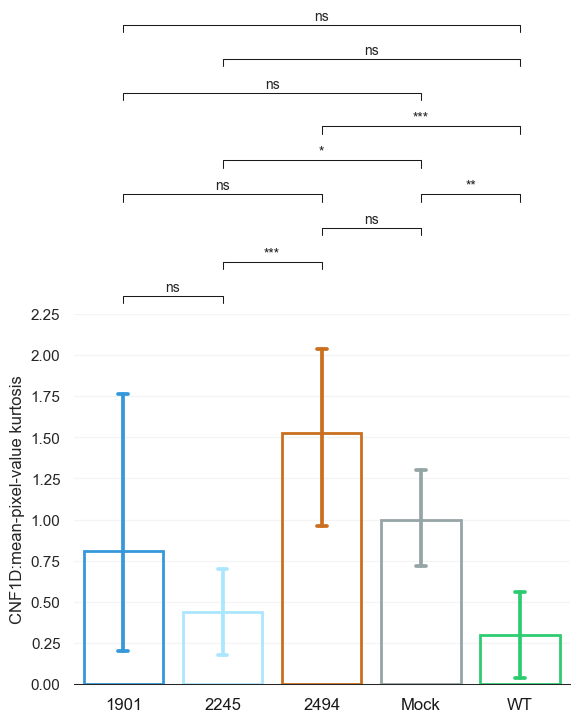

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.319e-01 stat=-9.813e-01
2245 v.s. 2494: t-test independent samples, P_val=3.550e-04 stat=-3.968e+00
2494 v.s. Mock: t-test independent samples, P_val=1.067e-03 stat=3.551e+00
Mock v.s. WT: t-test independent samples, P_val=4.448e-03 stat=3.011e+00
1901 v.s. 2494: t-test independent samples, P_val=1.809e-03 stat=-3.394e+00
2245 v.s. Mock: t-test independent samples, P_val=4.418e-01 stat=-7.758e-01
2494 v.s. WT: t-test independent samples, P_val=1.006e-05 stat=5.371e+00
1901 v.s. Mock: t-test independent samples, P_val=1.212e-01 stat=-1.579e+00
2245 v.s. WT: t-test independent samples, P_val=3.414e-02 stat=2.198e+00
1901 v.s. WT: t-test independent samples, P_val=5.359e-01 stat=6.248e-01


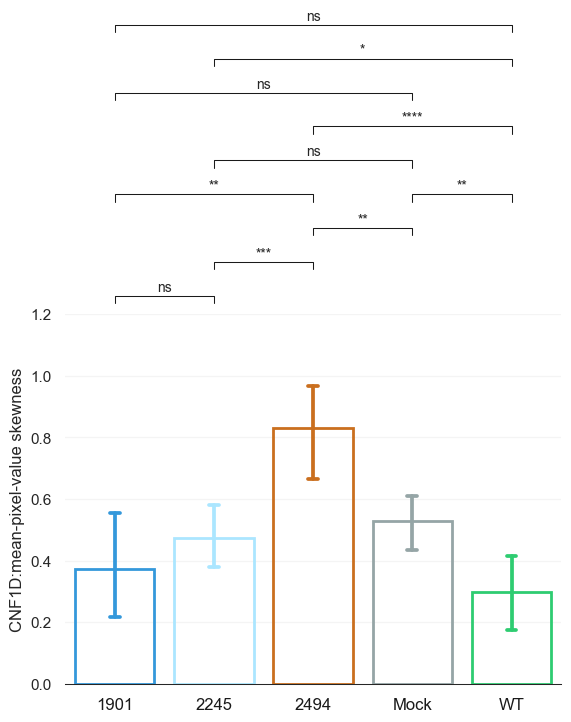

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.313e-04 stat=-4.019e+00
2245 v.s. 2494: t-test independent samples, P_val=9.753e-01 stat=3.113e-02
2494 v.s. Mock: t-test independent samples, P_val=1.014e-07 stat=6.586e+00
Mock v.s. WT: t-test independent samples, P_val=9.884e-01 stat=1.464e-02
1901 v.s. 2494: t-test independent samples, P_val=1.785e-03 stat=-3.399e+00
2245 v.s. Mock: t-test independent samples, P_val=1.102e-08 stat=6.915e+00
2494 v.s. WT: t-test independent samples, P_val=7.631e-04 stat=3.776e+00
1901 v.s. Mock: t-test independent samples, P_val=2.611e-01 stat=1.138e+00
2245 v.s. WT: t-test independent samples, P_val=7.795e-05 stat=4.427e+00
1901 v.s. WT: t-test independent samples, P_val=4.563e-01 stat=7.528e-01


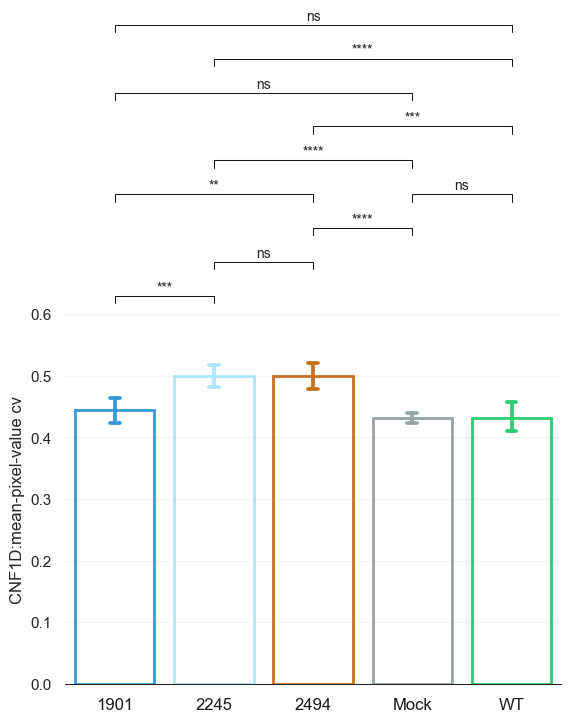

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.048e-04 stat=-3.835e+00
2245 v.s. 2494: t-test independent samples, P_val=4.053e-04 stat=3.922e+00
2494 v.s. Mock: t-test independent samples, P_val=7.226e-11 stat=-9.012e+00
Mock v.s. WT: t-test independent samples, P_val=5.447e-08 stat=6.633e+00
1901 v.s. 2494: t-test independent samples, P_val=6.736e-01 stat=4.250e-01
2245 v.s. Mock: t-test independent samples, P_val=1.050e-04 stat=-4.237e+00
2494 v.s. WT: t-test independent samples, P_val=1.798e-01 stat=-1.376e+00
1901 v.s. Mock: t-test independent samples, P_val=1.801e-11 stat=-8.834e+00
2245 v.s. WT: t-test independent samples, P_val=2.359e-02 stat=2.359e+00
1901 v.s. WT: t-test independent samples, P_val=2.941e-01 stat=-1.064e+00


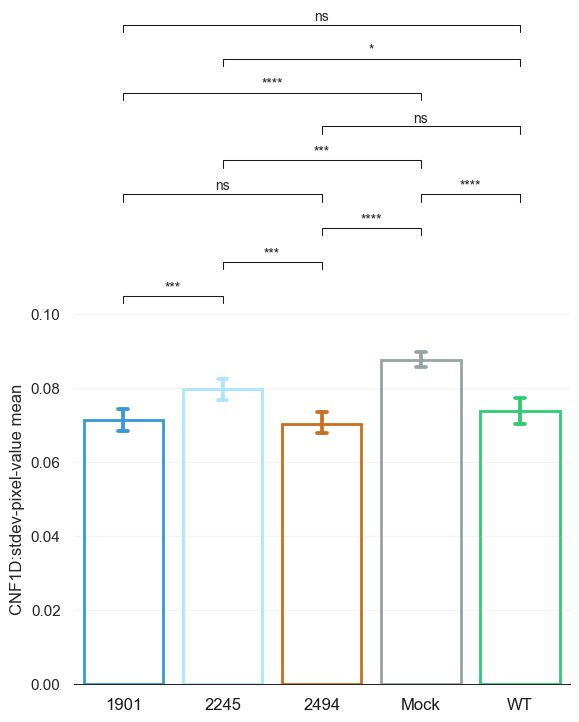

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.680e-04 stat=-3.971e+00
2245 v.s. 2494: t-test independent samples, P_val=8.559e-04 stat=3.657e+00
2494 v.s. Mock: t-test independent samples, P_val=5.486e-11 stat=-9.109e+00
Mock v.s. WT: t-test independent samples, P_val=2.409e-08 stat=6.883e+00
1901 v.s. 2494: t-test independent samples, P_val=6.180e-01 stat=5.035e-01
2245 v.s. Mock: t-test independent samples, P_val=4.148e-03 stat=-3.014e+00
2494 v.s. WT: t-test independent samples, P_val=1.583e-01 stat=-1.449e+00
1901 v.s. Mock: t-test independent samples, P_val=1.495e-12 stat=-9.594e+00
2245 v.s. WT: t-test independent samples, P_val=1.765e-02 stat=2.481e+00
1901 v.s. WT: t-test independent samples, P_val=2.434e-01 stat=-1.185e+00


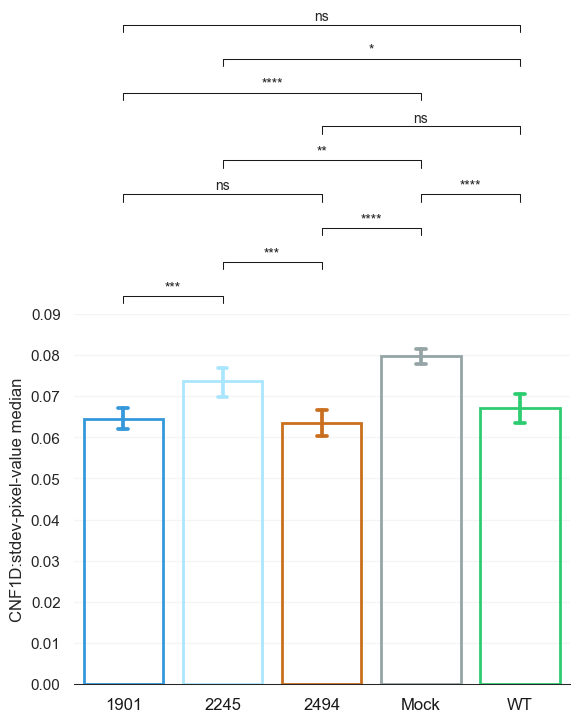

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.796e-01 stat=1.364e+00
2245 v.s. 2494: t-test independent samples, P_val=4.342e-01 stat=7.914e-01
2494 v.s. Mock: t-test independent samples, P_val=5.145e-02 stat=-2.013e+00
Mock v.s. WT: t-test independent samples, P_val=1.380e-01 stat=1.513e+00
1901 v.s. 2494: t-test independent samples, P_val=6.916e-02 stat=1.879e+00
2245 v.s. Mock: t-test independent samples, P_val=4.705e-02 stat=-2.039e+00
2494 v.s. WT: t-test independent samples, P_val=2.113e-01 stat=-1.279e+00
1901 v.s. Mock: t-test independent samples, P_val=3.091e-01 stat=-1.028e+00
2245 v.s. WT: t-test independent samples, P_val=6.359e-01 stat=-4.772e-01
1901 v.s. WT: t-test independent samples, P_val=4.145e-01 stat=8.252e-01


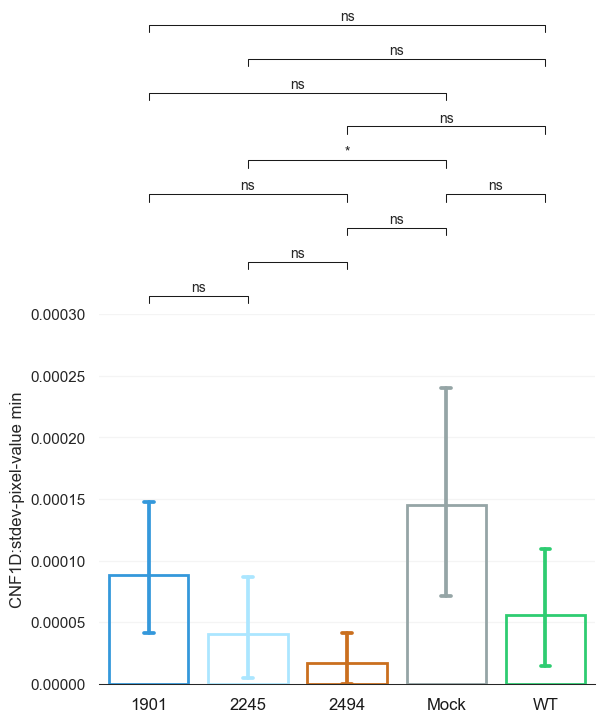

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.700e-01 stat=1.647e-01
2245 v.s. 2494: t-test independent samples, P_val=1.414e-01 stat=-1.505e+00
2494 v.s. Mock: t-test independent samples, P_val=2.660e-01 stat=-1.129e+00
Mock v.s. WT: t-test independent samples, P_val=1.368e-02 stat=2.576e+00
1901 v.s. 2494: t-test independent samples, P_val=1.820e-01 stat=-1.363e+00
2245 v.s. Mock: t-test independent samples, P_val=2.476e-03 stat=-3.198e+00
2494 v.s. WT: t-test independent samples, P_val=2.767e-01 stat=1.109e+00
1901 v.s. Mock: t-test independent samples, P_val=4.282e-03 stat=-3.006e+00
2245 v.s. WT: t-test independent samples, P_val=7.067e-01 stat=-3.792e-01
1901 v.s. WT: t-test independent samples, P_val=8.241e-01 stat=-2.239e-01


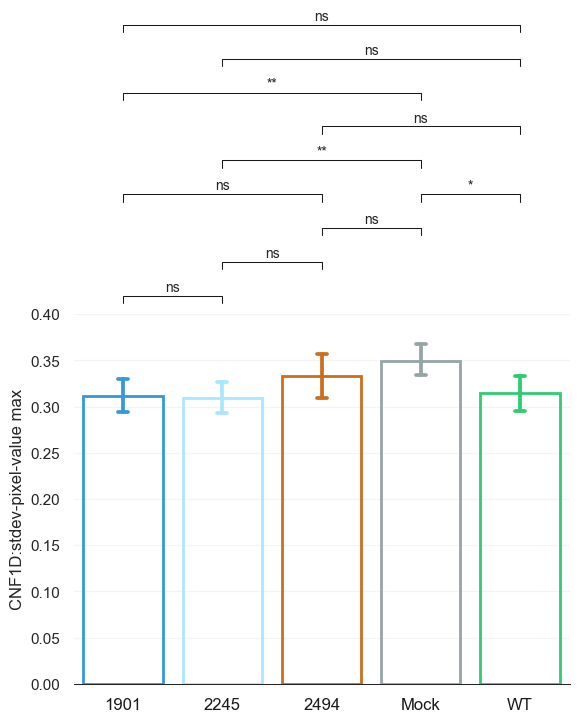

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.445e-02 stat=-2.332e+00
2245 v.s. 2494: t-test independent samples, P_val=6.171e-04 stat=3.773e+00
2494 v.s. Mock: t-test independent samples, P_val=4.372e-05 stat=-4.632e+00
Mock v.s. WT: t-test independent samples, P_val=6.785e-05 stat=4.434e+00
1901 v.s. 2494: t-test independent samples, P_val=5.745e-01 stat=5.670e-01
2245 v.s. Mock: t-test independent samples, P_val=1.068e-02 stat=-2.659e+00
2494 v.s. WT: t-test independent samples, P_val=8.202e-01 stat=-2.294e-01
1901 v.s. Mock: t-test independent samples, P_val=1.201e-04 stat=-4.203e+00
2245 v.s. WT: t-test independent samples, P_val=6.026e-03 stat=2.909e+00
1901 v.s. WT: t-test independent samples, P_val=7.278e-01 stat=3.507e-01


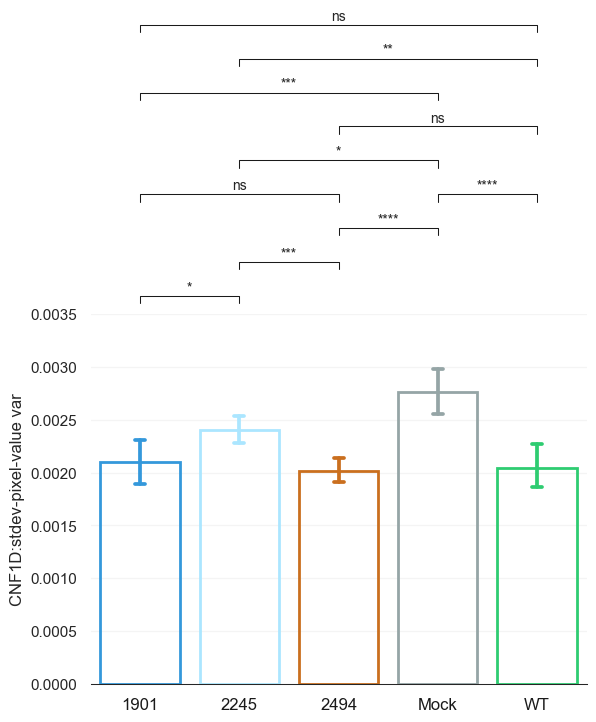

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.049e-02 stat=-2.406e+00
2245 v.s. 2494: t-test independent samples, P_val=5.326e-04 stat=3.825e+00
2494 v.s. Mock: t-test independent samples, P_val=1.849e-05 stat=-4.912e+00
Mock v.s. WT: t-test independent samples, P_val=3.814e-05 stat=4.617e+00
1901 v.s. 2494: t-test independent samples, P_val=7.129e-01 stat=3.711e-01
2245 v.s. Mock: t-test independent samples, P_val=1.117e-02 stat=-2.642e+00
2494 v.s. WT: t-test independent samples, P_val=9.209e-01 stat=-1.002e-01
1901 v.s. Mock: t-test independent samples, P_val=1.033e-04 stat=-4.250e+00
2245 v.s. WT: t-test independent samples, P_val=4.711e-03 stat=3.003e+00
1901 v.s. WT: t-test independent samples, P_val=7.832e-01 stat=2.771e-01


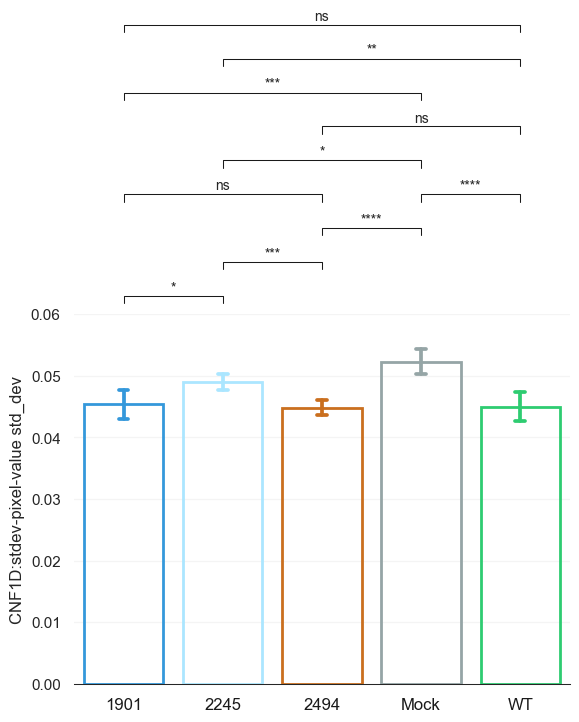

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.540e-01 stat=9.370e-01
2245 v.s. 2494: t-test independent samples, P_val=6.499e-02 stat=-1.907e+00
2494 v.s. Mock: t-test independent samples, P_val=8.578e-04 stat=3.628e+00
Mock v.s. WT: t-test independent samples, P_val=4.883e-01 stat=6.994e-01
1901 v.s. 2494: t-test independent samples, P_val=3.275e-01 stat=-9.940e-01
2245 v.s. Mock: t-test independent samples, P_val=8.660e-01 stat=-1.696e-01
2494 v.s. WT: t-test independent samples, P_val=3.901e-04 stat=4.028e+00
1901 v.s. Mock: t-test independent samples, P_val=2.515e-01 stat=1.161e+00
2245 v.s. WT: t-test independent samples, P_val=8.897e-01 stat=1.396e-01
1901 v.s. WT: t-test independent samples, P_val=2.118e-01 stat=1.271e+00


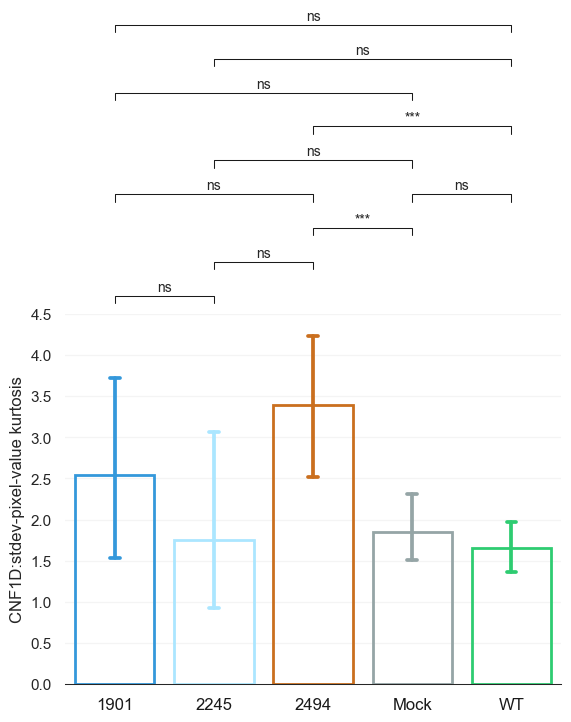

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.315e-01 stat=1.537e+00
2245 v.s. 2494: t-test independent samples, P_val=4.388e-03 stat=-3.052e+00
2494 v.s. Mock: t-test independent samples, P_val=5.567e-04 stat=3.778e+00
Mock v.s. WT: t-test independent samples, P_val=2.559e-01 stat=1.152e+00
1901 v.s. 2494: t-test independent samples, P_val=5.950e-02 stat=-1.952e+00
2245 v.s. Mock: t-test independent samples, P_val=2.065e-01 stat=-1.281e+00
2494 v.s. WT: t-test independent samples, P_val=3.266e-04 stat=4.094e+00
1901 v.s. Mock: t-test independent samples, P_val=4.233e-01 stat=8.080e-01
2245 v.s. WT: t-test independent samples, P_val=5.913e-01 stat=-5.415e-01
1901 v.s. WT: t-test independent samples, P_val=1.915e-01 stat=1.331e+00


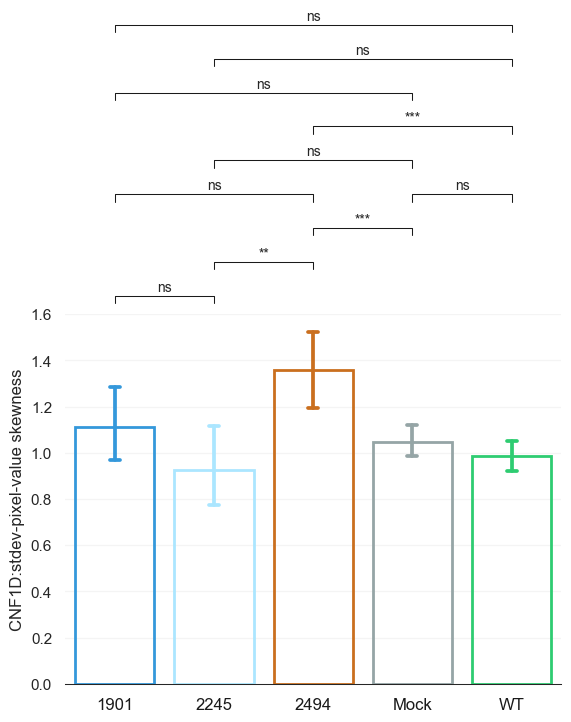

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.203e-01 stat=1.244e+00
2245 v.s. 2494: t-test independent samples, P_val=2.312e-01 stat=-1.219e+00
2494 v.s. Mock: t-test independent samples, P_val=1.580e-04 stat=4.207e+00
Mock v.s. WT: t-test independent samples, P_val=1.322e-01 stat=-1.536e+00
1901 v.s. 2494: t-test independent samples, P_val=8.499e-01 stat=-1.908e-01
2245 v.s. Mock: t-test independent samples, P_val=8.455e-02 stat=1.762e+00
2494 v.s. WT: t-test independent samples, P_val=1.442e-02 stat=2.609e+00
1901 v.s. Mock: t-test independent samples, P_val=2.179e-04 stat=4.014e+00
2245 v.s. WT: t-test independent samples, P_val=5.674e-01 stat=5.769e-01
1901 v.s. WT: t-test independent samples, P_val=2.672e-02 stat=2.308e+00


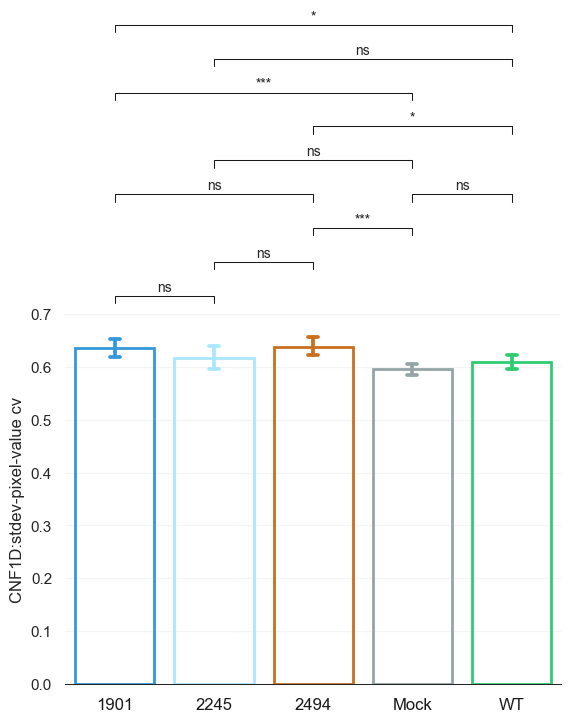

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.077e-01 stat=-1.643e+00
2245 v.s. 2494: t-test independent samples, P_val=1.738e-01 stat=-1.389e+00
2494 v.s. Mock: t-test independent samples, P_val=9.843e-05 stat=4.364e+00
Mock v.s. WT: t-test independent samples, P_val=5.999e-01 stat=5.287e-01
1901 v.s. 2494: t-test independent samples, P_val=4.924e-03 stat=-3.014e+00
2245 v.s. Mock: t-test independent samples, P_val=3.969e-02 stat=2.116e+00
2494 v.s. WT: t-test independent samples, P_val=1.927e-04 stat=4.289e+00
1901 v.s. Mock: t-test independent samples, P_val=9.465e-01 stat=6.749e-02
2245 v.s. WT: t-test independent samples, P_val=3.725e-02 stat=2.159e+00
1901 v.s. WT: t-test independent samples, P_val=6.571e-01 stat=4.475e-01


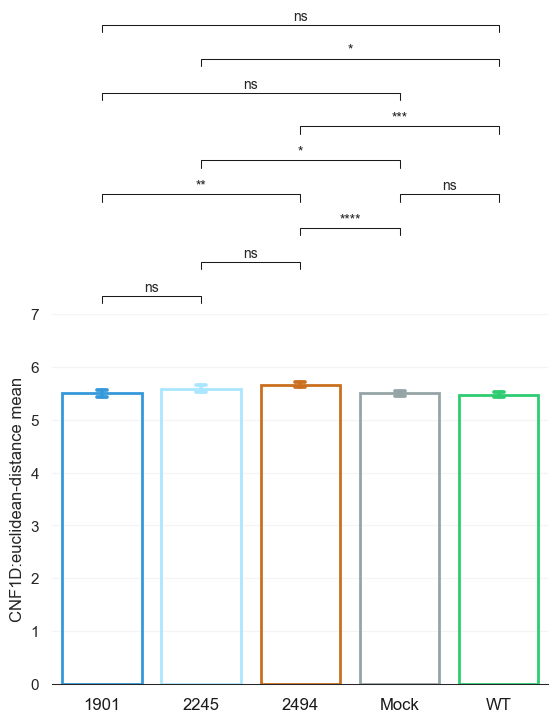

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.511e-01 stat=-6.008e-01
2245 v.s. 2494: t-test independent samples, P_val=6.628e-02 stat=-1.898e+00
2494 v.s. Mock: t-test independent samples, P_val=1.207e-01 stat=1.588e+00
Mock v.s. WT: t-test independent samples, P_val=6.451e-01 stat=4.640e-01
1901 v.s. 2494: t-test independent samples, P_val=5.414e-02 stat=-1.997e+00
2245 v.s. Mock: t-test independent samples, P_val=6.516e-01 stat=-4.544e-01
2494 v.s. WT: t-test independent samples, P_val=8.755e-02 stat=1.770e+00
1901 v.s. Mock: t-test independent samples, P_val=3.101e-01 stat=-1.026e+00
2245 v.s. WT: t-test independent samples, P_val=9.530e-01 stat=5.931e-02
1901 v.s. WT: t-test independent samples, P_val=6.375e-01 stat=-4.751e-01


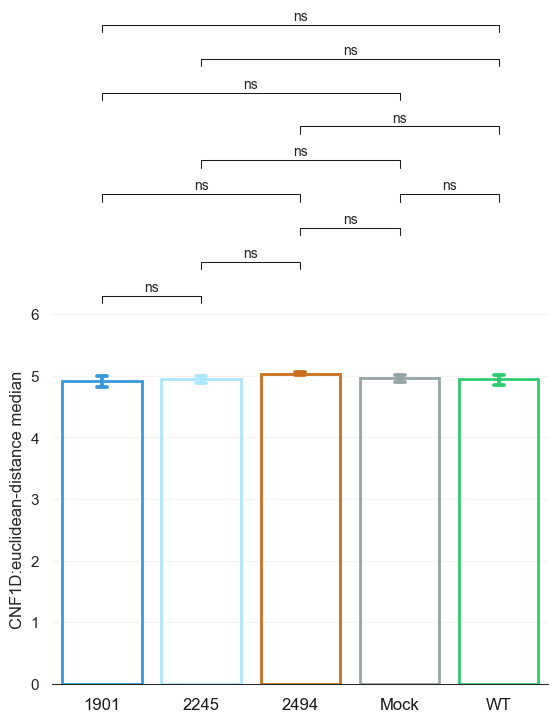

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.257e-02 stat=-2.605e+00
2245 v.s. 2494: t-test independent samples, P_val=7.376e-01 stat=-3.378e-01
2494 v.s. Mock: t-test independent samples, P_val=6.556e-01 stat=-4.497e-01
Mock v.s. WT: t-test independent samples, P_val=3.807e-03 stat=3.068e+00
1901 v.s. 2494: t-test independent samples, P_val=9.918e-03 stat=-2.737e+00
2245 v.s. Mock: t-test independent samples, P_val=3.458e-01 stat=-9.523e-01
2494 v.s. WT: t-test independent samples, P_val=3.804e-02 stat=2.177e+00
1901 v.s. Mock: t-test independent samples, P_val=4.332e-04 stat=-3.793e+00
2245 v.s. WT: t-test independent samples, P_val=4.940e-02 stat=2.030e+00
1901 v.s. WT: t-test independent samples, P_val=7.389e-01 stat=-3.358e-01


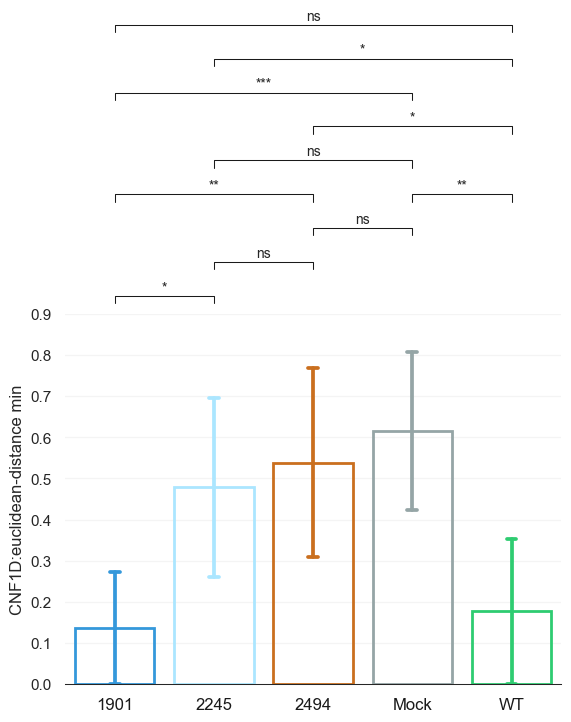

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.390e-01 stat=-1.194e+00
2245 v.s. 2494: t-test independent samples, P_val=8.238e-01 stat=2.244e-01
2494 v.s. Mock: t-test independent samples, P_val=2.647e-01 stat=1.133e+00
Mock v.s. WT: t-test independent samples, P_val=3.984e-02 stat=-2.123e+00
1901 v.s. 2494: t-test independent samples, P_val=2.596e-01 stat=-1.147e+00
2245 v.s. Mock: t-test independent samples, P_val=2.421e-01 stat=1.185e+00
2494 v.s. WT: t-test independent samples, P_val=5.916e-01 stat=-5.428e-01
1901 v.s. Mock: t-test independent samples, P_val=7.646e-01 stat=-3.013e-01
2245 v.s. WT: t-test independent samples, P_val=8.262e-01 stat=-2.211e-01
1901 v.s. WT: t-test independent samples, P_val=4.910e-02 stat=-2.035e+00


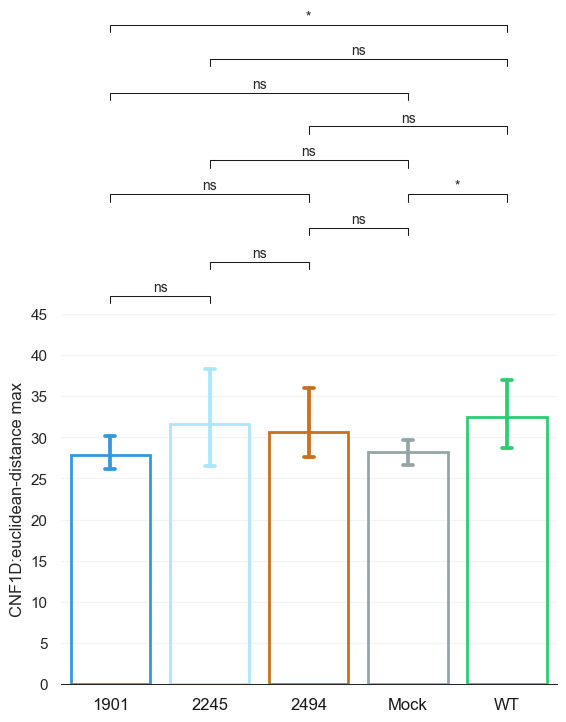

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.029e-01 stat=-1.666e+00
2245 v.s. 2494: t-test independent samples, P_val=3.883e-01 stat=8.739e-01
2494 v.s. Mock: t-test independent samples, P_val=2.113e-02 stat=2.408e+00
Mock v.s. WT: t-test independent samples, P_val=4.366e-01 stat=-7.857e-01
1901 v.s. 2494: t-test independent samples, P_val=5.649e-02 stat=-1.977e+00
2245 v.s. Mock: t-test independent samples, P_val=6.541e-02 stat=1.887e+00
2494 v.s. WT: t-test independent samples, P_val=1.377e-01 stat=1.528e+00
1901 v.s. Mock: t-test independent samples, P_val=6.768e-01 stat=4.195e-01
2245 v.s. WT: t-test independent samples, P_val=1.697e-01 stat=1.400e+00
1901 v.s. WT: t-test independent samples, P_val=7.077e-01 stat=-3.778e-01


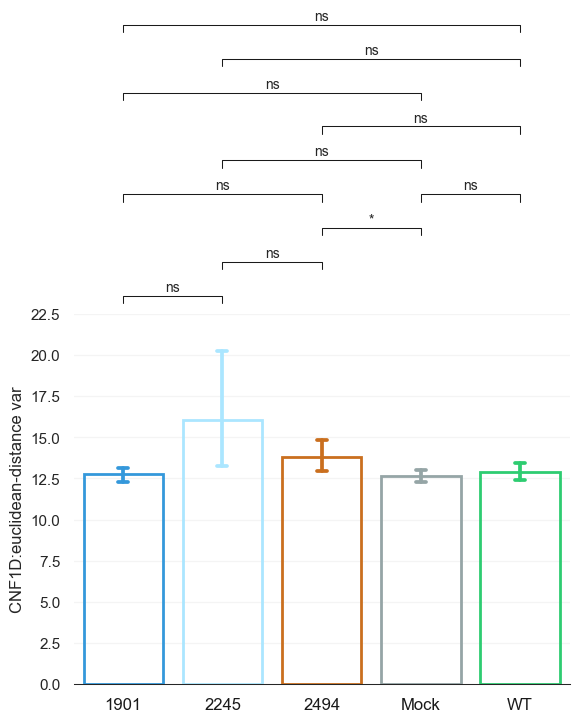

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.242e-02 stat=-1.842e+00
2245 v.s. 2494: t-test independent samples, P_val=4.001e-01 stat=8.521e-01
2494 v.s. Mock: t-test independent samples, P_val=2.068e-02 stat=2.417e+00
Mock v.s. WT: t-test independent samples, P_val=4.374e-01 stat=-7.843e-01
1901 v.s. 2494: t-test independent samples, P_val=5.884e-02 stat=-1.957e+00
2245 v.s. Mock: t-test independent samples, P_val=4.027e-02 stat=2.109e+00
2494 v.s. WT: t-test independent samples, P_val=1.368e-01 stat=1.532e+00
1901 v.s. Mock: t-test independent samples, P_val=6.866e-01 stat=4.060e-01
2245 v.s. WT: t-test independent samples, P_val=1.346e-01 stat=1.529e+00
1901 v.s. WT: t-test independent samples, P_val=7.101e-01 stat=-3.746e-01


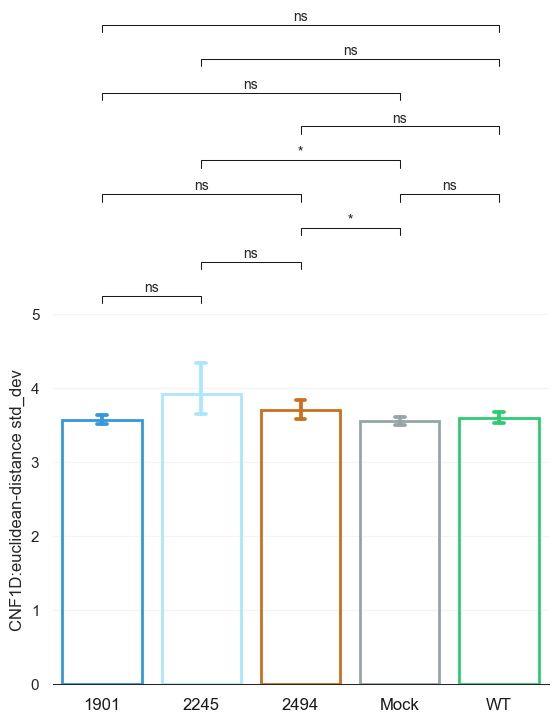

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.597e-01 stat=-1.431e+00
2245 v.s. 2494: t-test independent samples, P_val=3.373e-01 stat=9.732e-01
2494 v.s. Mock: t-test independent samples, P_val=5.002e-01 stat=6.809e-01
Mock v.s. WT: t-test independent samples, P_val=3.232e-02 stat=-2.216e+00
1901 v.s. 2494: t-test independent samples, P_val=6.509e-01 stat=-4.567e-01
2245 v.s. Mock: t-test independent samples, P_val=1.155e-01 stat=1.604e+00
2494 v.s. WT: t-test independent samples, P_val=3.602e-01 stat=-9.303e-01
1901 v.s. Mock: t-test independent samples, P_val=8.015e-01 stat=2.529e-01
2245 v.s. WT: t-test independent samples, P_val=4.844e-01 stat=7.061e-01
1901 v.s. WT: t-test independent samples, P_val=7.842e-02 stat=-1.810e+00


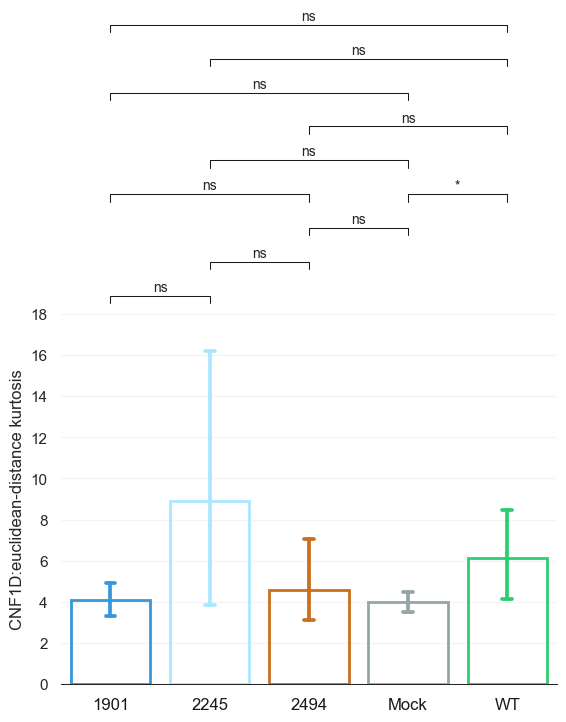

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.453e-01 stat=-1.483e+00
2245 v.s. 2494: t-test independent samples, P_val=3.145e-01 stat=1.021e+00
2494 v.s. Mock: t-test independent samples, P_val=4.635e-01 stat=7.409e-01
Mock v.s. WT: t-test independent samples, P_val=3.186e-02 stat=-2.222e+00
1901 v.s. 2494: t-test independent samples, P_val=6.700e-01 stat=-4.299e-01
2245 v.s. Mock: t-test independent samples, P_val=9.886e-02 stat=1.684e+00
2494 v.s. WT: t-test independent samples, P_val=3.637e-01 stat=-9.233e-01
1901 v.s. Mock: t-test independent samples, P_val=7.838e-01 stat=2.759e-01
2245 v.s. WT: t-test independent samples, P_val=4.357e-01 stat=7.877e-01
1901 v.s. WT: t-test independent samples, P_val=1.008e-01 stat=-1.683e+00


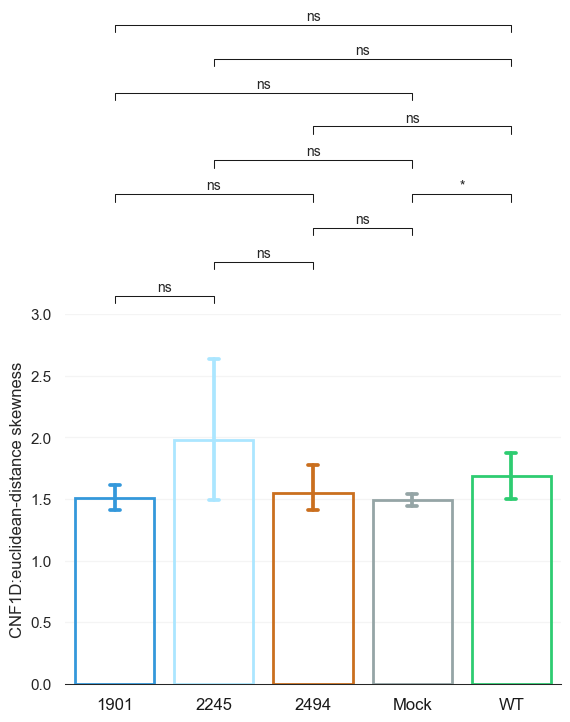

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.909e-02 stat=-1.740e+00
2245 v.s. 2494: t-test independent samples, P_val=2.435e-01 stat=1.187e+00
2494 v.s. Mock: t-test independent samples, P_val=3.719e-01 stat=9.039e-01
Mock v.s. WT: t-test independent samples, P_val=1.370e-01 stat=-1.517e+00
1901 v.s. 2494: t-test independent samples, P_val=6.149e-01 stat=-5.078e-01
2245 v.s. Mock: t-test independent samples, P_val=4.993e-02 stat=2.012e+00
2494 v.s. WT: t-test independent samples, P_val=9.069e-01 stat=-1.180e-01
1901 v.s. Mock: t-test independent samples, P_val=5.941e-01 stat=5.366e-01
2245 v.s. WT: t-test independent samples, P_val=1.885e-01 stat=1.339e+00
1901 v.s. WT: t-test independent samples, P_val=3.629e-01 stat=-9.212e-01


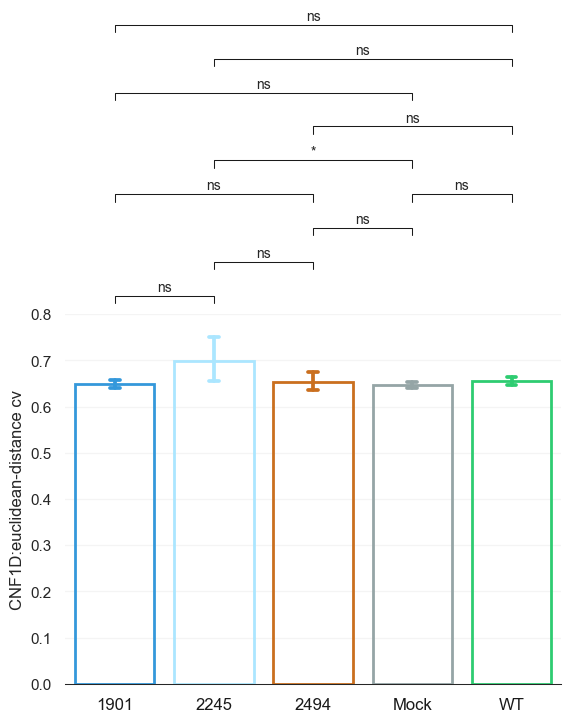

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.924e-01 stat=-1.360e-01
2245 v.s. 2494: t-test independent samples, P_val=4.619e-04 stat=-3.876e+00
2494 v.s. Mock: t-test independent samples, P_val=3.721e-05 stat=4.685e+00
Mock v.s. WT: t-test independent samples, P_val=5.571e-04 stat=-3.744e+00
1901 v.s. 2494: t-test independent samples, P_val=6.333e-04 stat=-3.776e+00
2245 v.s. Mock: t-test independent samples, P_val=8.177e-01 stat=-2.318e-01
2494 v.s. WT: t-test independent samples, P_val=8.058e-02 stat=1.813e+00
1901 v.s. Mock: t-test independent samples, P_val=6.999e-01 stat=-3.878e-01
2245 v.s. WT: t-test independent samples, P_val=6.694e-03 stat=-2.869e+00
1901 v.s. WT: t-test independent samples, P_val=7.689e-03 stat=-2.819e+00


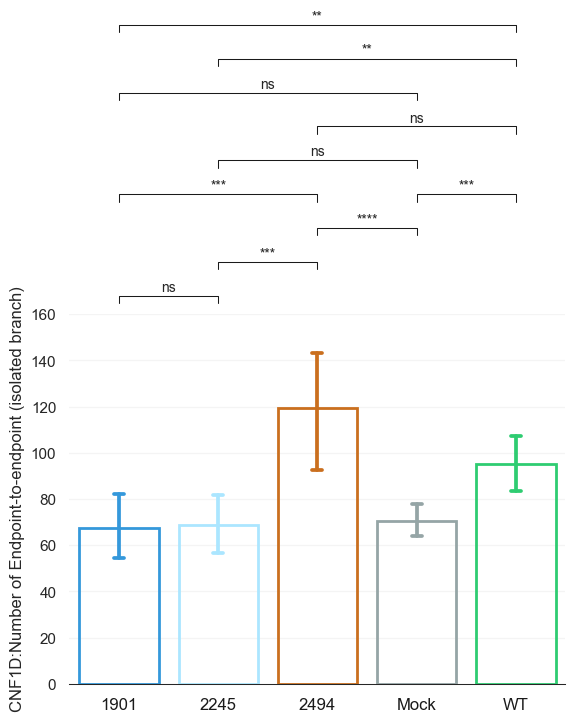

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.512e-03 stat=-2.806e+00
2245 v.s. 2494: t-test independent samples, P_val=5.589e-02 stat=1.980e+00
2494 v.s. Mock: t-test independent samples, P_val=9.000e-01 stat=1.266e-01
Mock v.s. WT: t-test independent samples, P_val=7.728e-01 stat=2.907e-01
1901 v.s. 2494: t-test independent samples, P_val=6.964e-01 stat=-3.935e-01
2245 v.s. Mock: t-test independent samples, P_val=1.847e-02 stat=2.441e+00
2494 v.s. WT: t-test independent samples, P_val=7.031e-01 stat=3.851e-01
1901 v.s. Mock: t-test independent samples, P_val=7.464e-01 stat=-3.253e-01
2245 v.s. WT: t-test independent samples, P_val=5.090e-03 stat=2.974e+00
1901 v.s. WT: t-test independent samples, P_val=9.742e-01 stat=-3.259e-02


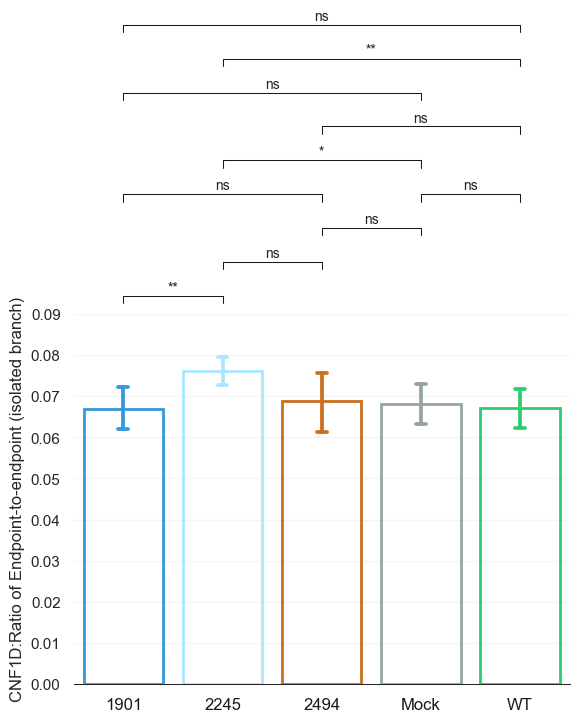

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.802e-01 stat=-1.094e+00
2245 v.s. 2494: t-test independent samples, P_val=7.901e-01 stat=-2.683e-01
2494 v.s. Mock: t-test independent samples, P_val=5.700e-01 stat=5.732e-01
Mock v.s. WT: t-test independent samples, P_val=6.318e-01 stat=-4.829e-01
1901 v.s. 2494: t-test independent samples, P_val=1.580e-01 stat=-1.445e+00
2245 v.s. Mock: t-test independent samples, P_val=7.891e-01 stat=2.690e-01
2494 v.s. WT: t-test independent samples, P_val=9.508e-01 stat=6.220e-02
1901 v.s. Mock: t-test independent samples, P_val=3.620e-01 stat=-9.208e-01
2245 v.s. WT: t-test independent samples, P_val=8.406e-01 stat=-2.026e-01
1901 v.s. WT: t-test independent samples, P_val=2.081e-01 stat=-1.281e+00


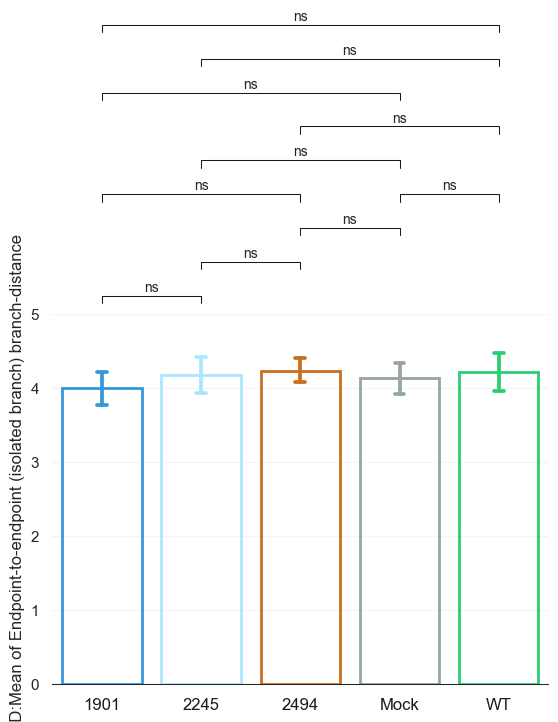

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.867e-01 stat=7.017e-01
2245 v.s. 2494: t-test independent samples, P_val=3.805e-01 stat=-8.885e-01
2494 v.s. Mock: t-test independent samples, P_val=9.768e-01 stat=-2.925e-02
Mock v.s. WT: t-test independent samples, P_val=6.073e-01 stat=-5.179e-01
1901 v.s. 2494: t-test independent samples, P_val=7.781e-01 stat=-2.842e-01
2245 v.s. Mock: t-test independent samples, P_val=3.327e-01 stat=-9.788e-01
2494 v.s. WT: t-test independent samples, P_val=5.999e-01 stat=-5.306e-01
1901 v.s. Mock: t-test independent samples, P_val=7.510e-01 stat=-3.192e-01
2245 v.s. WT: t-test independent samples, P_val=1.726e-01 stat=-1.390e+00
1901 v.s. WT: t-test independent samples, P_val=4.081e-01 stat=-8.367e-01


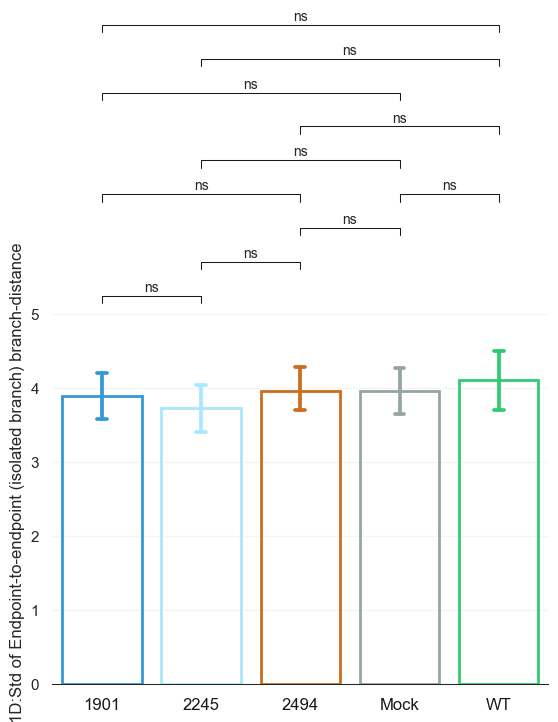

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.405e-01 stat=7.786e-01
2245 v.s. 2494: t-test independent samples, P_val=3.145e-01 stat=1.021e+00
2494 v.s. Mock: t-test independent samples, P_val=3.069e-07 stat=-6.230e+00
Mock v.s. WT: t-test independent samples, P_val=1.577e-02 stat=2.519e+00
1901 v.s. 2494: t-test independent samples, P_val=1.107e-01 stat=1.639e+00
2245 v.s. Mock: t-test independent samples, P_val=7.541e-05 stat=-4.339e+00
2494 v.s. WT: t-test independent samples, P_val=1.388e-03 stat=-3.549e+00
1901 v.s. Mock: t-test independent samples, P_val=4.344e-03 stat=-3.000e+00
2245 v.s. WT: t-test independent samples, P_val=7.533e-02 stat=-1.829e+00
1901 v.s. WT: t-test independent samples, P_val=4.024e-01 stat=-8.471e-01


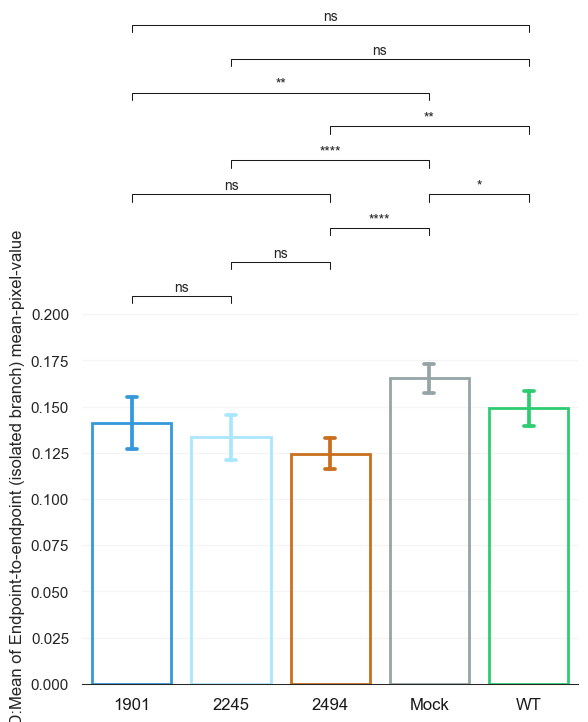

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.743e-01 stat=-3.244e-02
2245 v.s. 2494: t-test independent samples, P_val=7.670e-01 stat=2.986e-01
2494 v.s. Mock: t-test independent samples, P_val=9.249e-05 stat=-4.385e+00
Mock v.s. WT: t-test independent samples, P_val=2.254e-05 stat=4.782e+00
1901 v.s. 2494: t-test independent samples, P_val=7.767e-01 stat=2.859e-01
2245 v.s. Mock: t-test independent samples, P_val=1.816e-04 stat=-4.065e+00
2494 v.s. WT: t-test independent samples, P_val=9.392e-01 stat=7.698e-02
1901 v.s. Mock: t-test independent samples, P_val=1.127e-04 stat=-4.223e+00
2245 v.s. WT: t-test independent samples, P_val=7.024e-01 stat=3.849e-01
1901 v.s. WT: t-test independent samples, P_val=7.124e-01 stat=3.715e-01


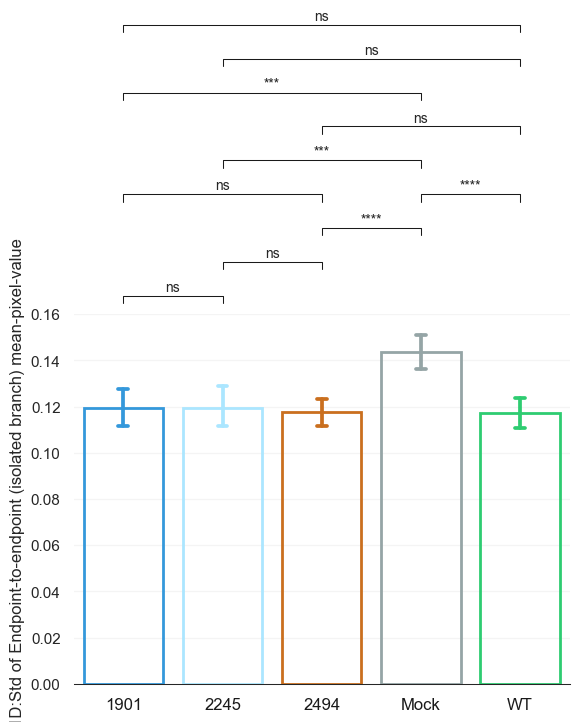

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.979e-01 stat=-6.836e-01
2245 v.s. 2494: t-test independent samples, P_val=6.532e-01 stat=-4.533e-01
2494 v.s. Mock: t-test independent samples, P_val=2.134e-04 stat=-4.106e+00
Mock v.s. WT: t-test independent samples, P_val=1.508e-04 stat=4.176e+00
1901 v.s. 2494: t-test independent samples, P_val=2.307e-01 stat=-1.221e+00
2245 v.s. Mock: t-test independent samples, P_val=3.175e-05 stat=-4.603e+00
2494 v.s. WT: t-test independent samples, P_val=9.911e-01 stat=-1.129e-02
1901 v.s. Mock: t-test independent samples, P_val=7.668e-07 stat=-5.717e+00
2245 v.s. WT: t-test independent samples, P_val=6.333e-01 stat=-4.810e-01
1901 v.s. WT: t-test independent samples, P_val=2.222e-01 stat=-1.242e+00


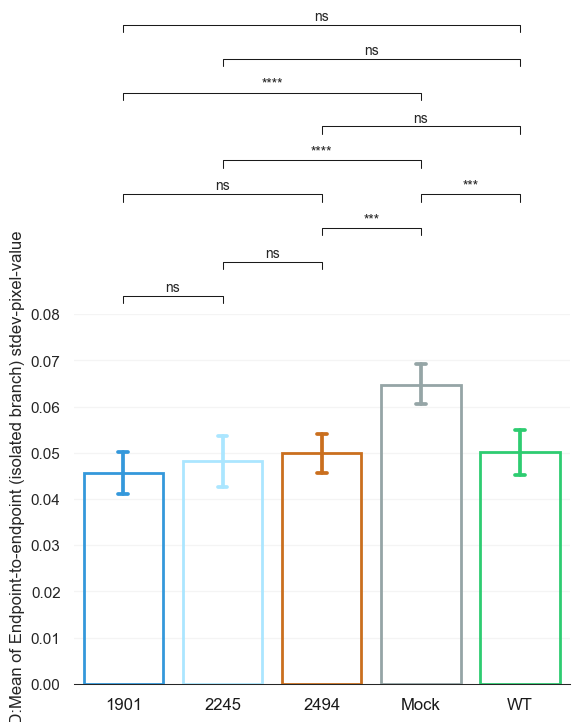

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.732e-01 stat=8.998e-01
2245 v.s. 2494: t-test independent samples, P_val=5.745e-02 stat=-1.966e+00
2494 v.s. Mock: t-test independent samples, P_val=6.067e-03 stat=-2.911e+00
Mock v.s. WT: t-test independent samples, P_val=1.656e-04 stat=4.146e+00
1901 v.s. 2494: t-test independent samples, P_val=2.253e-01 stat=-1.236e+00
2245 v.s. Mock: t-test independent samples, P_val=1.866e-06 stat=-5.441e+00
2494 v.s. WT: t-test independent samples, P_val=3.469e-01 stat=9.566e-01
1901 v.s. Mock: t-test independent samples, P_val=2.702e-05 stat=-4.663e+00
2245 v.s. WT: t-test independent samples, P_val=2.436e-01 stat=-1.184e+00
1901 v.s. WT: t-test independent samples, P_val=7.424e-01 stat=-3.311e-01


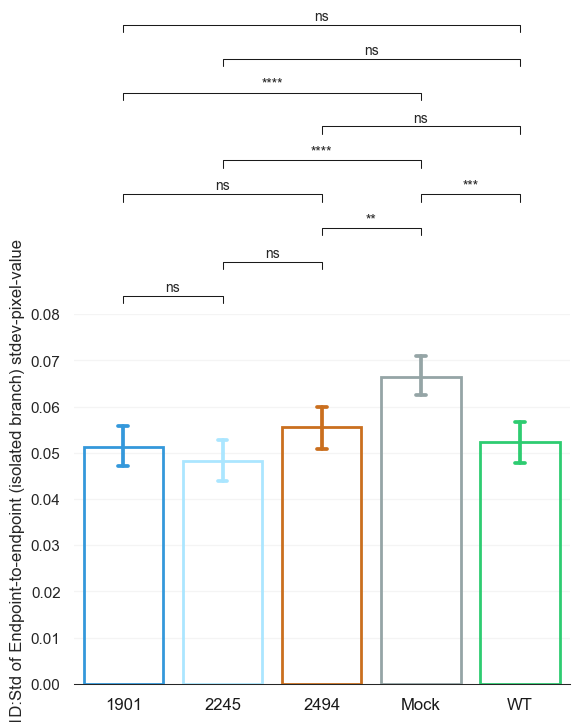

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.147e-01 stat=-1.259e+00
2245 v.s. 2494: t-test independent samples, P_val=8.047e-01 stat=-2.492e-01
2494 v.s. Mock: t-test independent samples, P_val=4.359e-01 stat=7.877e-01
Mock v.s. WT: t-test independent samples, P_val=6.196e-01 stat=-5.003e-01
1901 v.s. 2494: t-test independent samples, P_val=1.153e-01 stat=-1.618e+00
2245 v.s. Mock: t-test independent samples, P_val=6.219e-01 stat=4.964e-01
2494 v.s. WT: t-test independent samples, P_val=7.747e-01 stat=2.890e-01
1901 v.s. Mock: t-test independent samples, P_val=3.897e-01 stat=-8.684e-01
2245 v.s. WT: t-test independent samples, P_val=9.995e-01 stat=6.774e-04
1901 v.s. WT: t-test independent samples, P_val=2.038e-01 stat=-1.294e+00


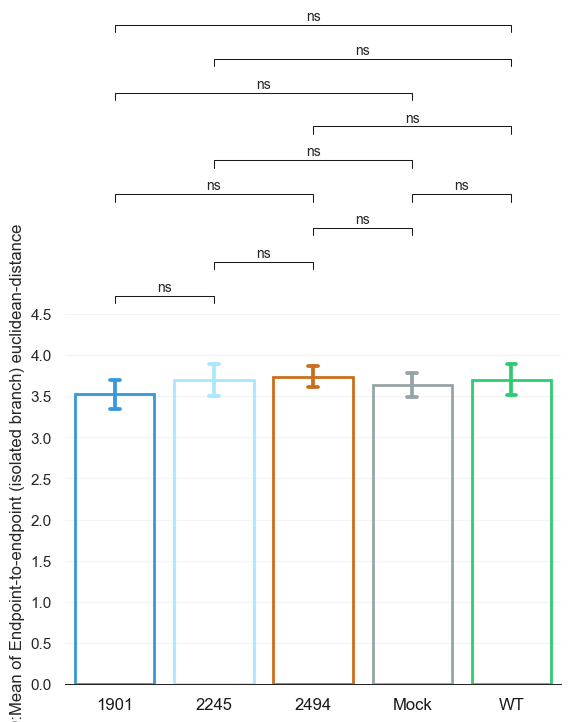

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.950e-01 stat=6.882e-01
2245 v.s. 2494: t-test independent samples, P_val=2.843e-01 stat=-1.088e+00
2494 v.s. Mock: t-test independent samples, P_val=6.903e-01 stat=4.016e-01
Mock v.s. WT: t-test independent samples, P_val=5.035e-01 stat=-6.750e-01
1901 v.s. 2494: t-test independent samples, P_val=5.445e-01 stat=-6.123e-01
2245 v.s. Mock: t-test independent samples, P_val=4.595e-01 stat=-7.459e-01
2494 v.s. WT: t-test independent samples, P_val=7.958e-01 stat=-2.612e-01
1901 v.s. Mock: t-test independent samples, P_val=9.029e-01 stat=-1.227e-01
2245 v.s. WT: t-test independent samples, P_val=1.815e-01 stat=-1.361e+00
1901 v.s. WT: t-test independent samples, P_val=3.825e-01 stat=-8.839e-01


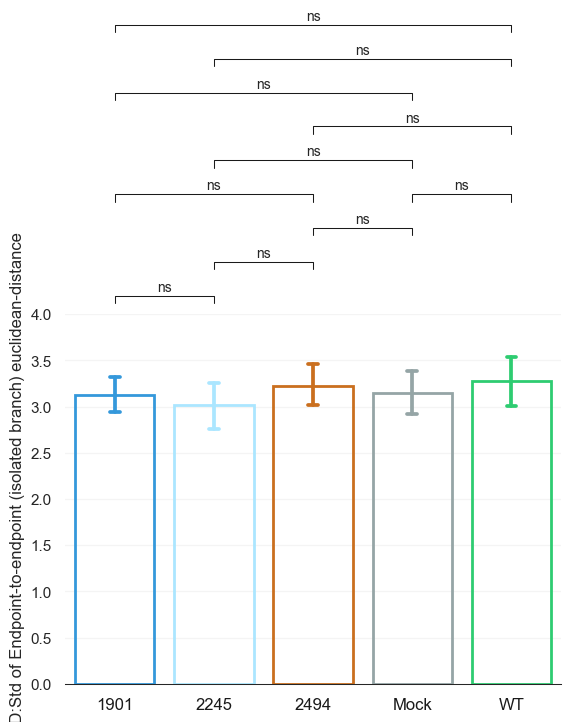

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.159e-01 stat=3.664e-01
2245 v.s. 2494: t-test independent samples, P_val=1.228e-04 stat=-4.335e+00
2494 v.s. Mock: t-test independent samples, P_val=3.031e-05 stat=4.752e+00
Mock v.s. WT: t-test independent samples, P_val=2.059e-03 stat=-3.291e+00
1901 v.s. 2494: t-test independent samples, P_val=1.292e-03 stat=-3.518e+00
2245 v.s. Mock: t-test independent samples, P_val=3.562e-01 stat=-9.318e-01
2494 v.s. WT: t-test independent samples, P_val=7.707e-02 stat=1.836e+00
1901 v.s. Mock: t-test independent samples, P_val=7.186e-01 stat=-3.626e-01
2245 v.s. WT: t-test independent samples, P_val=2.593e-03 stat=-3.225e+00
1901 v.s. WT: t-test independent samples, P_val=2.065e-02 stat=-2.418e+00


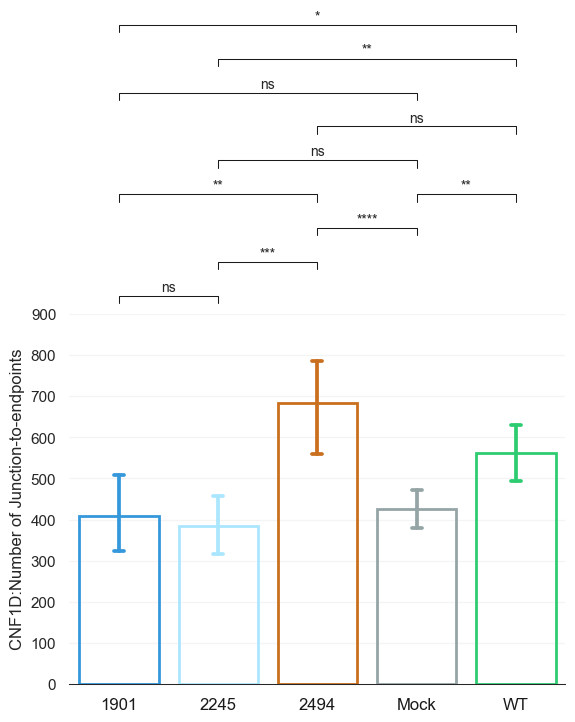

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=4.576e-04 stat=-3.795e+00
2245 v.s. 2494: t-test independent samples, P_val=5.794e-02 stat=1.962e+00
2494 v.s. Mock: t-test independent samples, P_val=4.652e-01 stat=-7.379e-01
Mock v.s. WT: t-test independent samples, P_val=6.433e-02 stat=1.901e+00
1901 v.s. 2494: t-test independent samples, P_val=3.173e-01 stat=-1.015e+00
2245 v.s. Mock: t-test independent samples, P_val=3.364e-02 stat=2.189e+00
2494 v.s. WT: t-test independent samples, P_val=5.471e-01 stat=6.095e-01
1901 v.s. Mock: t-test independent samples, P_val=1.090e-02 stat=-2.654e+00
2245 v.s. WT: t-test independent samples, P_val=4.307e-03 stat=3.037e+00
1901 v.s. WT: t-test independent samples, P_val=6.859e-01 stat=-4.077e-01


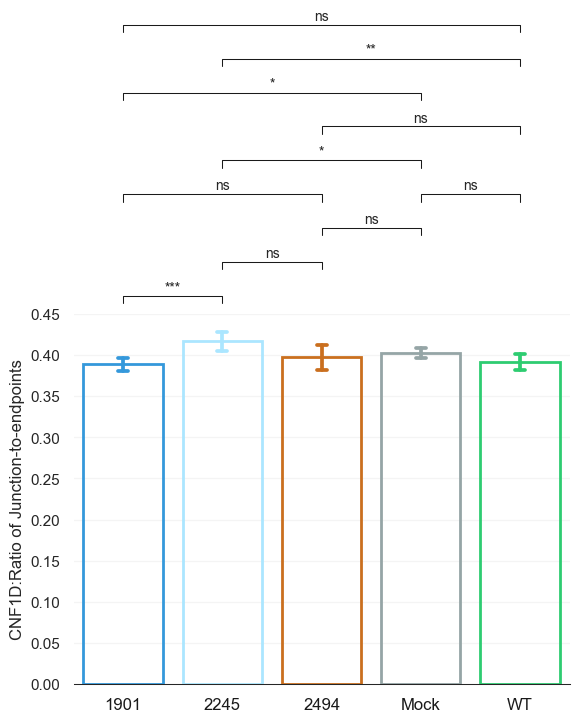

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.285e-01 stat=-1.550e+00
2245 v.s. 2494: t-test independent samples, P_val=6.826e-01 stat=4.125e-01
2494 v.s. Mock: t-test independent samples, P_val=3.433e-01 stat=9.600e-01
Mock v.s. WT: t-test independent samples, P_val=7.512e-01 stat=3.192e-01
1901 v.s. 2494: t-test independent samples, P_val=3.520e-01 stat=-9.440e-01
2245 v.s. Mock: t-test independent samples, P_val=1.113e-01 stat=1.623e+00
2494 v.s. WT: t-test independent samples, P_val=2.079e-01 stat=1.289e+00
1901 v.s. Mock: t-test independent samples, P_val=8.221e-01 stat=-2.261e-01
2245 v.s. WT: t-test independent samples, P_val=6.660e-02 stat=1.889e+00
1901 v.s. WT: t-test independent samples, P_val=9.655e-01 stat=4.353e-02


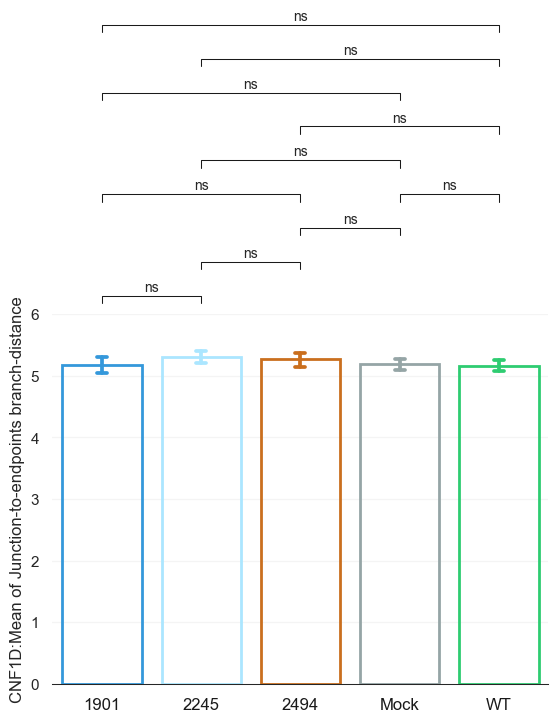

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.616e-01 stat=-5.850e-01
2245 v.s. 2494: t-test independent samples, P_val=9.653e-01 stat=4.386e-02
2494 v.s. Mock: t-test independent samples, P_val=9.435e-01 stat=7.140e-02
Mock v.s. WT: t-test independent samples, P_val=5.293e-01 stat=6.345e-01
1901 v.s. 2494: t-test independent samples, P_val=6.272e-01 stat=-4.903e-01
2245 v.s. Mock: t-test independent samples, P_val=8.959e-01 stat=1.316e-01
2494 v.s. WT: t-test independent samples, P_val=5.420e-01 stat=6.174e-01
1901 v.s. Mock: t-test independent samples, P_val=5.913e-01 stat=-5.407e-01
2245 v.s. WT: t-test independent samples, P_val=5.186e-01 stat=6.516e-01
1901 v.s. WT: t-test independent samples, P_val=9.683e-01 stat=4.001e-02


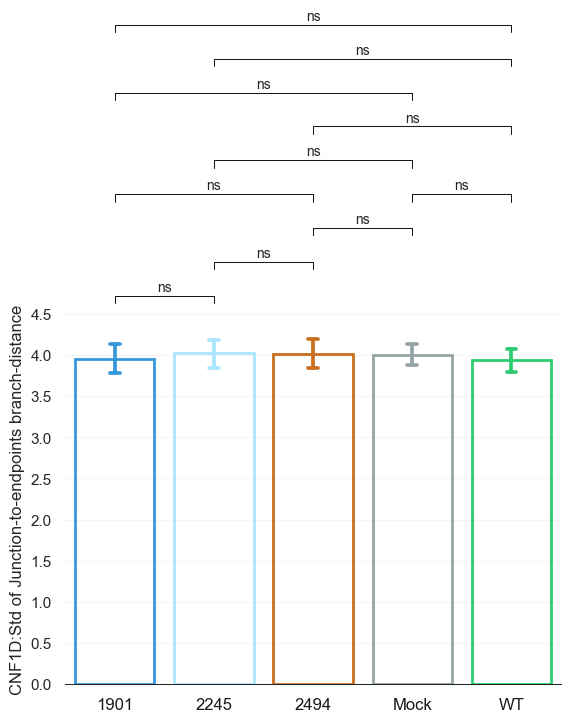

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.435e-02 stat=1.767e+00
2245 v.s. 2494: t-test independent samples, P_val=2.140e-03 stat=3.323e+00
2494 v.s. Mock: t-test independent samples, P_val=2.920e-06 stat=-5.507e+00
Mock v.s. WT: t-test independent samples, P_val=7.274e-02 stat=1.842e+00
1901 v.s. 2494: t-test independent samples, P_val=1.175e-03 stat=3.552e+00
2245 v.s. Mock: t-test independent samples, P_val=7.118e-04 stat=-3.623e+00
2494 v.s. WT: t-test independent samples, P_val=6.166e-04 stat=-3.856e+00
1901 v.s. Mock: t-test independent samples, P_val=3.147e-01 stat=-1.016e+00
2245 v.s. WT: t-test independent samples, P_val=1.537e-01 stat=-1.456e+00
1901 v.s. WT: t-test independent samples, P_val=5.988e-01 stat=5.308e-01


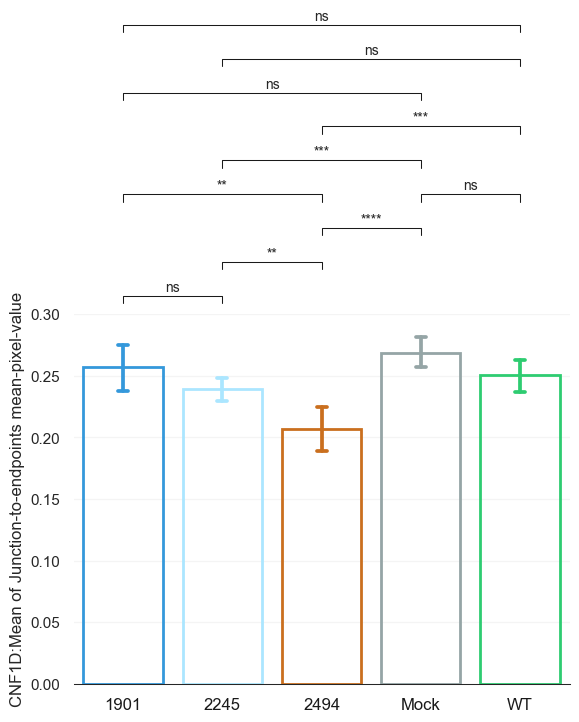

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.266e-01 stat=-9.923e-01
2245 v.s. 2494: t-test independent samples, P_val=8.583e-03 stat=2.790e+00
2494 v.s. Mock: t-test independent samples, P_val=4.069e-02 stat=-2.121e+00
Mock v.s. WT: t-test independent samples, P_val=3.325e-01 stat=9.808e-01
1901 v.s. 2494: t-test independent samples, P_val=1.566e-01 stat=1.449e+00
2245 v.s. Mock: t-test independent samples, P_val=4.379e-01 stat=7.825e-01
2494 v.s. WT: t-test independent samples, P_val=3.419e-01 stat=-9.668e-01
1901 v.s. Mock: t-test independent samples, P_val=7.309e-01 stat=-3.460e-01
2245 v.s. WT: t-test independent samples, P_val=1.129e-01 stat=1.623e+00
1901 v.s. WT: t-test independent samples, P_val=5.967e-01 stat=5.337e-01


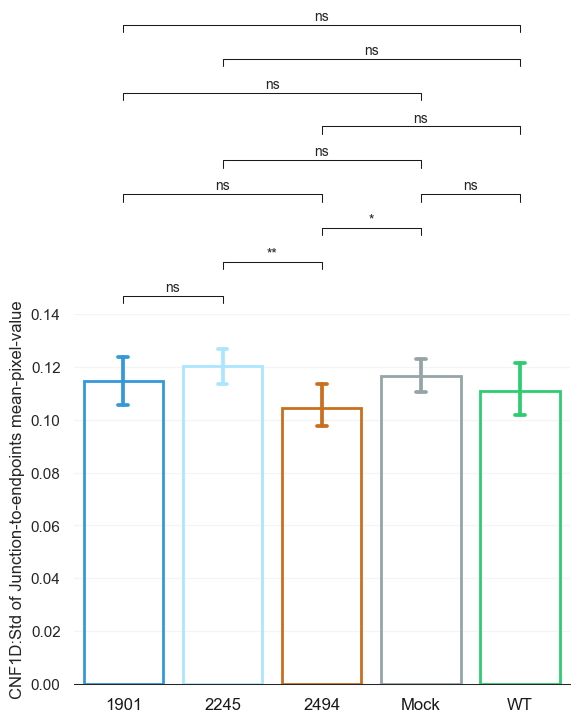

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.439e-03 stat=-3.406e+00
2245 v.s. 2494: t-test independent samples, P_val=2.495e-03 stat=3.266e+00
2494 v.s. Mock: t-test independent samples, P_val=1.623e-10 stat=-8.730e+00
Mock v.s. WT: t-test independent samples, P_val=1.304e-07 stat=6.366e+00
1901 v.s. 2494: t-test independent samples, P_val=8.856e-01 stat=1.450e-01
2245 v.s. Mock: t-test independent samples, P_val=1.413e-05 stat=-4.846e+00
2494 v.s. WT: t-test independent samples, P_val=3.045e-01 stat=-1.046e+00
1901 v.s. Mock: t-test independent samples, P_val=1.325e-11 stat=-8.927e+00
2245 v.s. WT: t-test independent samples, P_val=6.606e-02 stat=1.892e+00
1901 v.s. WT: t-test independent samples, P_val=3.199e-01 stat=-1.008e+00


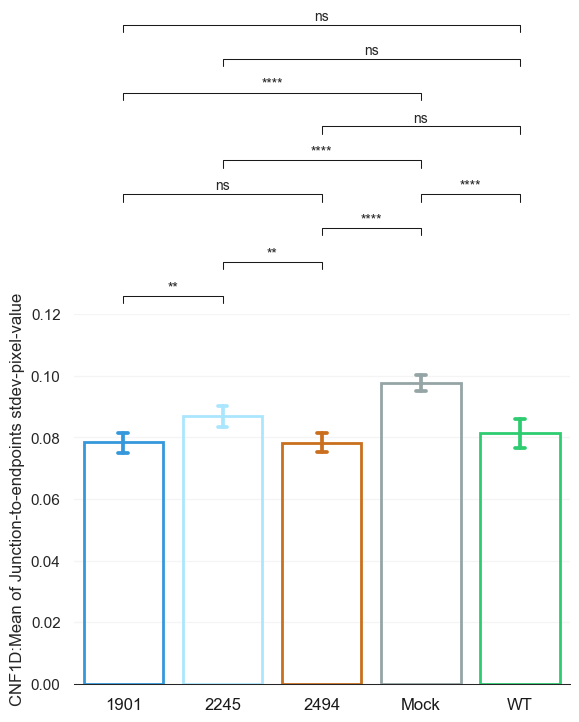

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.602e-02 stat=-2.306e+00
2245 v.s. 2494: t-test independent samples, P_val=1.940e-02 stat=2.454e+00
2494 v.s. Mock: t-test independent samples, P_val=2.145e-04 stat=-4.104e+00
Mock v.s. WT: t-test independent samples, P_val=3.314e-04 stat=3.918e+00
1901 v.s. 2494: t-test independent samples, P_val=9.992e-01 stat=-9.635e-04
2245 v.s. Mock: t-test independent samples, P_val=3.083e-02 stat=-2.226e+00
2494 v.s. WT: t-test independent samples, P_val=8.598e-01 stat=-1.782e-01
1901 v.s. Mock: t-test independent samples, P_val=1.229e-04 stat=-4.195e+00
2245 v.s. WT: t-test independent samples, P_val=3.987e-02 stat=2.128e+00
1901 v.s. WT: t-test independent samples, P_val=8.697e-01 stat=-1.651e-01


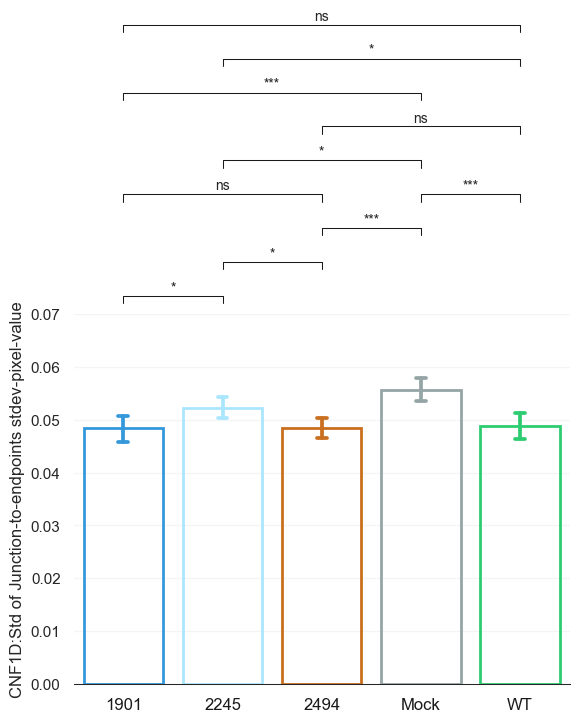

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.120e-01 stat=-1.622e+00
2245 v.s. 2494: t-test independent samples, P_val=5.437e-01 stat=6.134e-01
2494 v.s. Mock: t-test independent samples, P_val=2.986e-01 stat=1.054e+00
Mock v.s. WT: t-test independent samples, P_val=9.819e-01 stat=2.279e-02
1901 v.s. 2494: t-test independent samples, P_val=3.995e-01 stat=-8.536e-01
2245 v.s. Mock: t-test independent samples, P_val=5.509e-02 stat=1.967e+00
2494 v.s. WT: t-test independent samples, P_val=2.907e-01 stat=1.077e+00
1901 v.s. Mock: t-test independent samples, P_val=9.389e-01 stat=-7.712e-02
2245 v.s. WT: t-test independent samples, P_val=6.938e-02 stat=1.869e+00
1901 v.s. WT: t-test independent samples, P_val=9.587e-01 stat=-5.214e-02


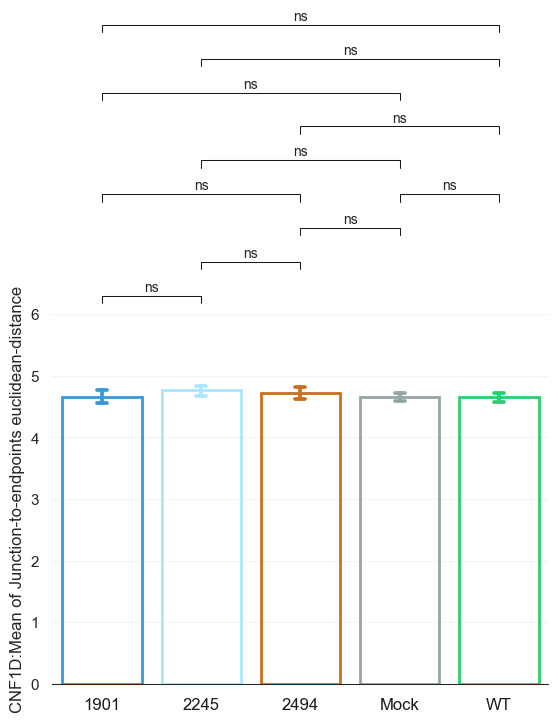

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.953e-01 stat=-1.059e+00
2245 v.s. 2494: t-test independent samples, P_val=8.649e-01 stat=1.714e-01
2494 v.s. Mock: t-test independent samples, P_val=8.219e-01 stat=2.266e-01
Mock v.s. WT: t-test independent samples, P_val=6.530e-01 stat=4.529e-01
1901 v.s. 2494: t-test independent samples, P_val=4.295e-01 stat=-7.999e-01
2245 v.s. Mock: t-test independent samples, P_val=6.497e-01 stat=4.571e-01
2494 v.s. WT: t-test independent samples, P_val=5.648e-01 stat=5.826e-01
1901 v.s. Mock: t-test independent samples, P_val=4.260e-01 stat=-8.031e-01
2245 v.s. WT: t-test independent samples, P_val=4.514e-01 stat=7.609e-01
1901 v.s. WT: t-test independent samples, P_val=7.333e-01 stat=-3.433e-01


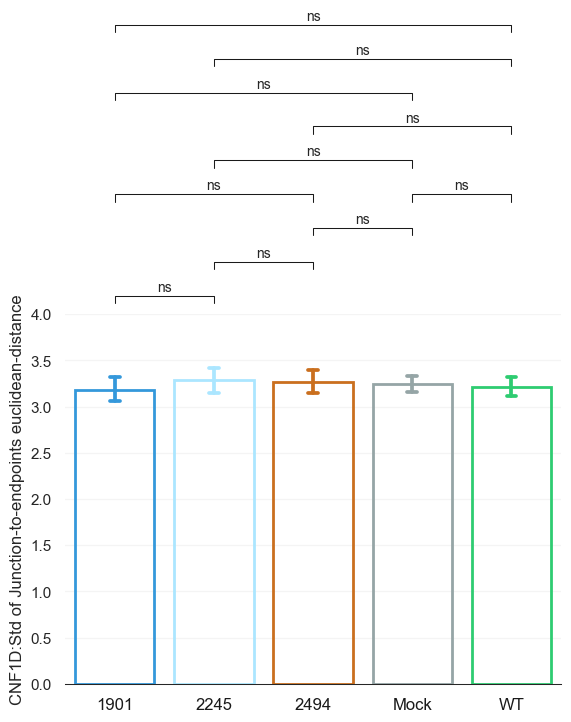

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.516e-01 stat=1.460e+00
2245 v.s. 2494: t-test independent samples, P_val=4.235e-07 stat=-6.238e+00
2494 v.s. Mock: t-test independent samples, P_val=1.389e-06 stat=5.745e+00
Mock v.s. WT: t-test independent samples, P_val=3.156e-04 stat=-3.934e+00
1901 v.s. 2494: t-test independent samples, P_val=1.979e-03 stat=-3.360e+00
2245 v.s. Mock: t-test independent samples, P_val=4.262e-02 stat=-2.084e+00
2494 v.s. WT: t-test independent samples, P_val=1.643e-01 stat=1.428e+00
1901 v.s. Mock: t-test independent samples, P_val=9.014e-01 stat=1.246e-01
2245 v.s. WT: t-test independent samples, P_val=1.848e-05 stat=-4.894e+00
1901 v.s. WT: t-test independent samples, P_val=2.144e-02 stat=-2.402e+00


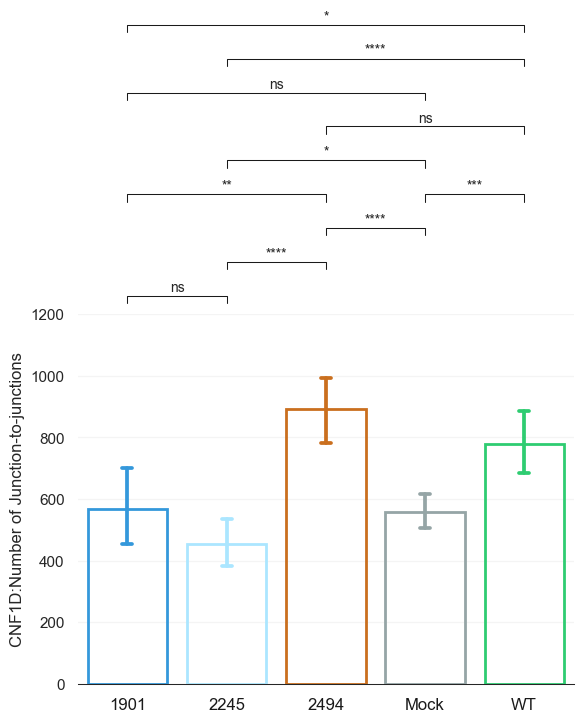

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.912e-05 stat=4.325e+00
2245 v.s. 2494: t-test independent samples, P_val=2.854e-02 stat=-2.287e+00
2494 v.s. Mock: t-test independent samples, P_val=6.444e-01 stat=4.654e-01
Mock v.s. WT: t-test independent samples, P_val=1.363e-01 stat=-1.519e+00
1901 v.s. 2494: t-test independent samples, P_val=4.236e-01 stat=8.103e-01
2245 v.s. Mock: t-test independent samples, P_val=3.305e-03 stat=-3.096e+00
2494 v.s. WT: t-test independent samples, P_val=6.008e-01 stat=-5.292e-01
1901 v.s. Mock: t-test independent samples, P_val=4.711e-02 stat=2.040e+00
2245 v.s. WT: t-test independent samples, P_val=8.380e-04 stat=-3.627e+00
1901 v.s. WT: t-test independent samples, P_val=7.728e-01 stat=2.908e-01


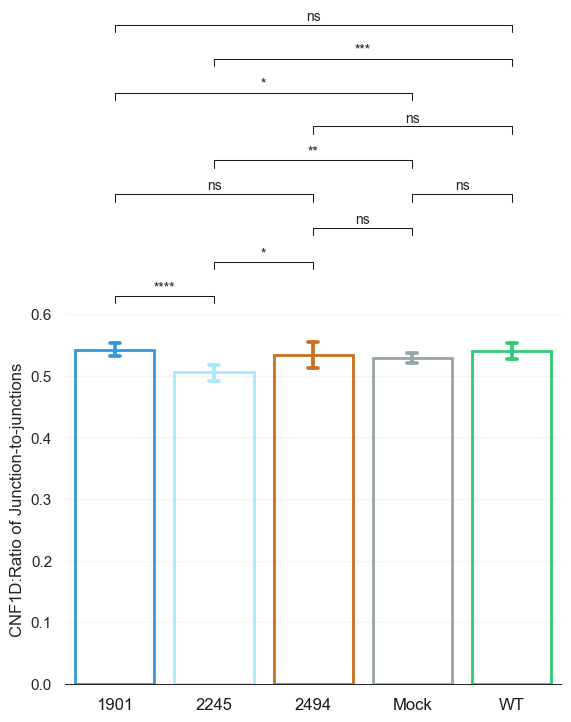

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.152e-02 stat=-2.640e+00
2245 v.s. 2494: t-test independent samples, P_val=4.182e-01 stat=-8.195e-01
2494 v.s. Mock: t-test independent samples, P_val=3.614e-04 stat=3.927e+00
Mock v.s. WT: t-test independent samples, P_val=1.776e-01 stat=1.372e+00
1901 v.s. 2494: t-test independent samples, P_val=3.473e-04 stat=-3.989e+00
2245 v.s. Mock: t-test independent samples, P_val=1.931e-02 stat=2.423e+00
2494 v.s. WT: t-test independent samples, P_val=4.673e-05 stat=4.809e+00
1901 v.s. Mock: t-test independent samples, P_val=5.159e-01 stat=-6.548e-01
2245 v.s. WT: t-test independent samples, P_val=5.530e-03 stat=2.942e+00
1901 v.s. WT: t-test independent samples, P_val=5.504e-01 stat=6.026e-01


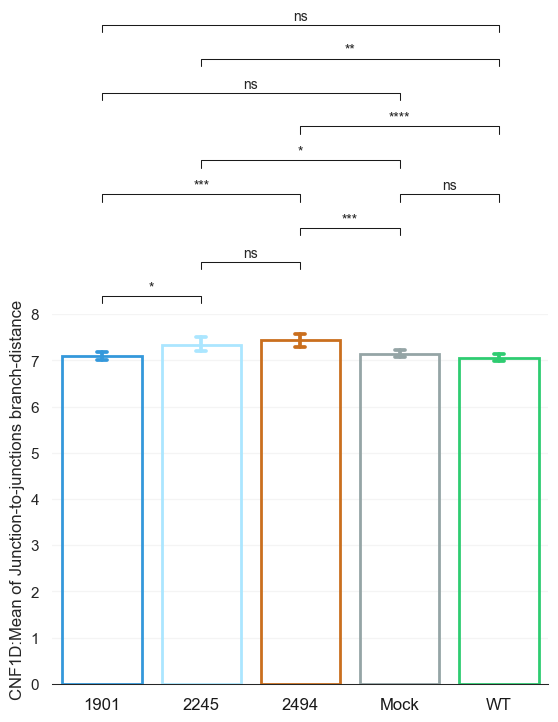

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.702e-02 stat=-2.152e+00
2245 v.s. 2494: t-test independent samples, P_val=4.017e-01 stat=8.493e-01
2494 v.s. Mock: t-test independent samples, P_val=3.686e-03 stat=3.100e+00
Mock v.s. WT: t-test independent samples, P_val=4.957e-01 stat=-6.874e-01
1901 v.s. 2494: t-test independent samples, P_val=9.590e-03 stat=-2.750e+00
2245 v.s. Mock: t-test independent samples, P_val=2.593e-02 stat=2.300e+00
2494 v.s. WT: t-test independent samples, P_val=4.573e-02 stat=2.091e+00
1901 v.s. Mock: t-test independent samples, P_val=8.209e-01 stat=-2.276e-01
2245 v.s. WT: t-test independent samples, P_val=9.608e-02 stat=1.706e+00
1901 v.s. WT: t-test independent samples, P_val=4.588e-01 stat=-7.486e-01


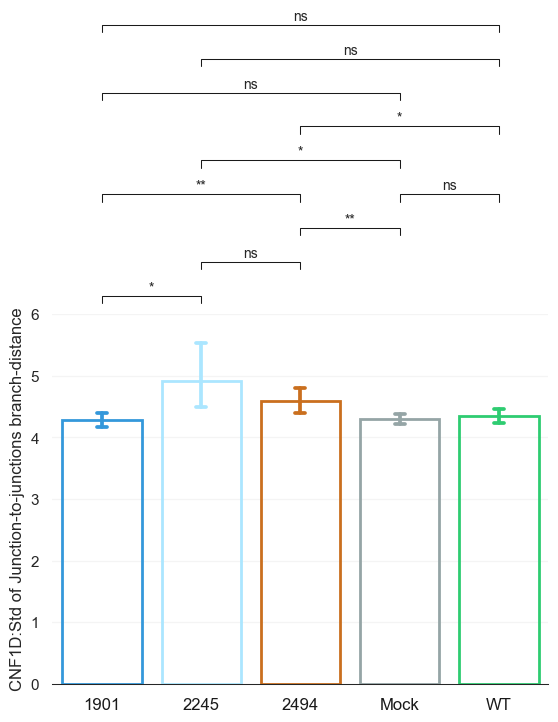

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.820e-01 stat=2.784e-01
2245 v.s. 2494: t-test independent samples, P_val=2.713e-03 stat=3.235e+00
2494 v.s. Mock: t-test independent samples, P_val=3.073e-04 stat=-3.982e+00
Mock v.s. WT: t-test independent samples, P_val=3.064e-01 stat=1.036e+00
1901 v.s. 2494: t-test independent samples, P_val=8.186e-03 stat=2.814e+00
2245 v.s. Mock: t-test independent samples, P_val=3.364e-01 stat=-9.712e-01
2494 v.s. WT: t-test independent samples, P_val=9.878e-03 stat=-2.768e+00
1901 v.s. Mock: t-test independent samples, P_val=6.151e-01 stat=-5.063e-01
2245 v.s. WT: t-test independent samples, P_val=8.679e-01 stat=1.674e-01
1901 v.s. WT: t-test independent samples, P_val=7.076e-01 stat=3.780e-01


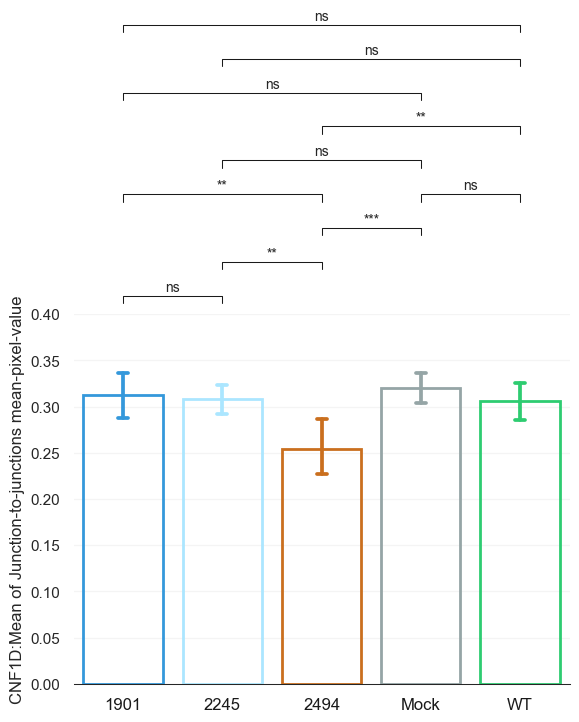

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.293e-02 stat=-1.718e+00
2245 v.s. 2494: t-test independent samples, P_val=8.653e-03 stat=2.787e+00
2494 v.s. Mock: t-test independent samples, P_val=1.359e-01 stat=-1.524e+00
Mock v.s. WT: t-test independent samples, P_val=3.784e-01 stat=8.905e-01
1901 v.s. 2494: t-test independent samples, P_val=2.833e-01 stat=1.091e+00
2245 v.s. Mock: t-test independent samples, P_val=4.730e-02 stat=2.037e+00
2494 v.s. WT: t-test independent samples, P_val=6.592e-01 stat=-4.457e-01
1901 v.s. Mock: t-test independent samples, P_val=9.308e-01 stat=-8.734e-02
2245 v.s. WT: t-test independent samples, P_val=2.672e-02 stat=2.305e+00
1901 v.s. WT: t-test independent samples, P_val=5.246e-01 stat=6.424e-01


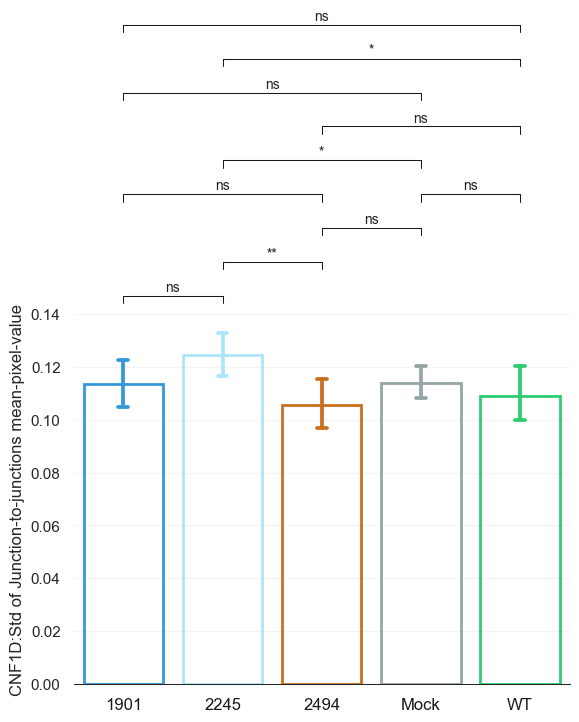

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.770e-04 stat=-4.105e+00
2245 v.s. 2494: t-test independent samples, P_val=4.785e-05 stat=4.655e+00
2494 v.s. Mock: t-test independent samples, P_val=8.112e-09 stat=-7.410e+00
Mock v.s. WT: t-test independent samples, P_val=1.512e-06 stat=5.618e+00
1901 v.s. 2494: t-test independent samples, P_val=3.665e-01 stat=9.157e-01
2245 v.s. Mock: t-test independent samples, P_val=2.002e-02 stat=-2.408e+00
2494 v.s. WT: t-test independent samples, P_val=1.176e-01 stat=-1.615e+00
1901 v.s. Mock: t-test independent samples, P_val=1.408e-08 stat=-6.874e+00
2245 v.s. WT: t-test independent samples, P_val=4.227e-03 stat=3.044e+00
1901 v.s. WT: t-test independent samples, P_val=4.291e-01 stat=-7.996e-01


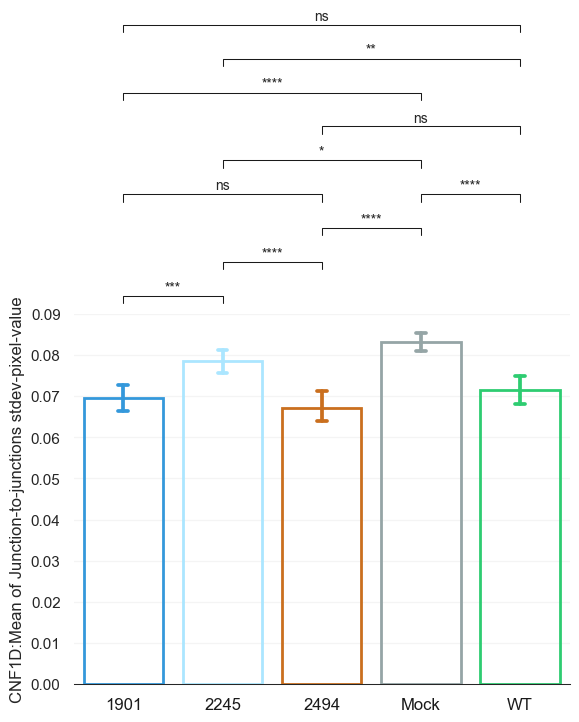

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.872e-02 stat=-1.867e+00
2245 v.s. 2494: t-test independent samples, P_val=6.686e-04 stat=3.745e+00
2494 v.s. Mock: t-test independent samples, P_val=1.814e-04 stat=-4.160e+00
Mock v.s. WT: t-test independent samples, P_val=3.172e-04 stat=3.932e+00
1901 v.s. 2494: t-test independent samples, P_val=2.418e-01 stat=1.192e+00
2245 v.s. Mock: t-test independent samples, P_val=2.850e-01 stat=-1.081e+00
2494 v.s. WT: t-test independent samples, P_val=5.373e-01 stat=-6.246e-01
1901 v.s. Mock: t-test independent samples, P_val=1.005e-02 stat=-2.685e+00
2245 v.s. WT: t-test independent samples, P_val=2.074e-03 stat=3.306e+00
1901 v.s. WT: t-test independent samples, P_val=4.275e-01 stat=8.023e-01


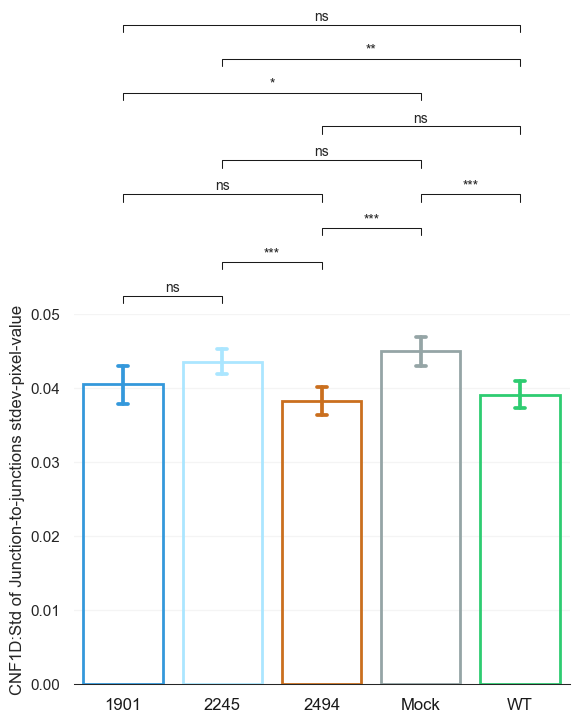

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.194e-02 stat=-2.378e+00
2245 v.s. 2494: t-test independent samples, P_val=4.836e-01 stat=-7.082e-01
2494 v.s. Mock: t-test independent samples, P_val=4.289e-04 stat=3.868e+00
Mock v.s. WT: t-test independent samples, P_val=1.167e-01 stat=1.602e+00
1901 v.s. 2494: t-test independent samples, P_val=5.953e-04 stat=-3.798e+00
2245 v.s. Mock: t-test independent samples, P_val=2.225e-02 stat=2.364e+00
2494 v.s. WT: t-test independent samples, P_val=3.170e-05 stat=4.951e+00
1901 v.s. Mock: t-test independent samples, P_val=7.511e-01 stat=-3.190e-01
2245 v.s. WT: t-test independent samples, P_val=5.162e-03 stat=2.968e+00
1901 v.s. WT: t-test independent samples, P_val=2.479e-01 stat=1.174e+00


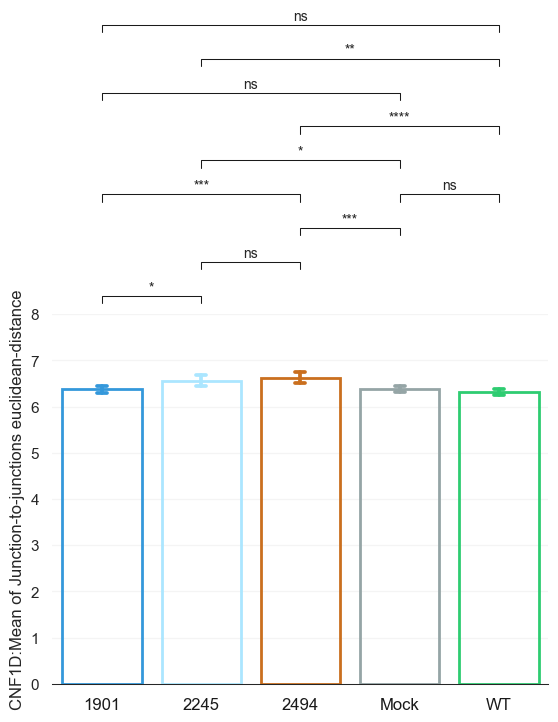

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.742e-02 stat=-1.876e+00
2245 v.s. 2494: t-test independent samples, P_val=3.552e-01 stat=9.372e-01
2494 v.s. Mock: t-test independent samples, P_val=5.185e-03 stat=2.971e+00
Mock v.s. WT: t-test independent samples, P_val=1.122e-01 stat=-1.623e+00
1901 v.s. 2494: t-test independent samples, P_val=6.765e-02 stat=-1.889e+00
2245 v.s. Mock: t-test independent samples, P_val=2.705e-02 stat=2.282e+00
2494 v.s. WT: t-test independent samples, P_val=1.835e-01 stat=1.364e+00
1901 v.s. Mock: t-test independent samples, P_val=2.755e-01 stat=1.104e+00
2245 v.s. WT: t-test independent samples, P_val=1.327e-01 stat=1.536e+00
1901 v.s. WT: t-test independent samples, P_val=6.211e-01 stat=-4.985e-01


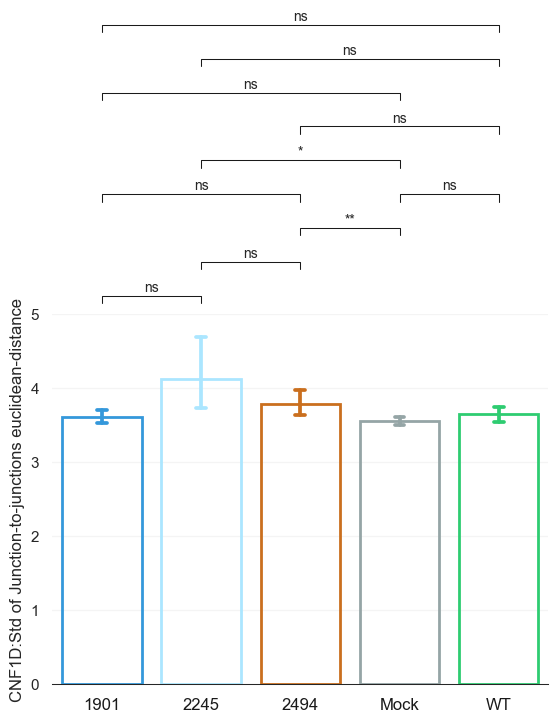

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=2.037e-01 stat=1.291e+00
2245 v.s. 2494: t-test independent samples, P_val=7.302e-01 stat=-3.477e-01
2494 v.s. Mock: t-test independent samples, P_val=1.084e-01 stat=1.645e+00
Mock v.s. WT: t-test independent samples, P_val=1.221e-04 stat=-4.245e+00
1901 v.s. 2494: t-test independent samples, P_val=5.102e-01 stat=6.657e-01
2245 v.s. Mock: t-test independent samples, P_val=1.613e-01 stat=1.423e+00
2494 v.s. WT: t-test independent samples, P_val=1.608e-01 stat=-1.441e+00
1901 v.s. Mock: t-test independent samples, P_val=1.446e-03 stat=3.389e+00
2245 v.s. WT: t-test independent samples, P_val=3.486e-02 stat=-2.188e+00
1901 v.s. WT: t-test independent samples, P_val=2.353e-01 stat=-1.206e+00


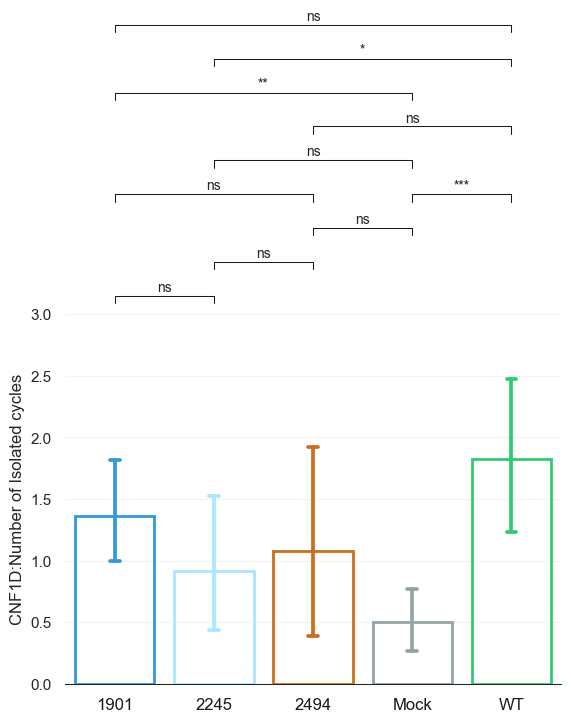

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.585e-01 stat=1.435e+00
2245 v.s. 2494: t-test independent samples, P_val=3.546e-01 stat=9.386e-01
2494 v.s. Mock: t-test independent samples, P_val=5.621e-01 stat=5.849e-01
Mock v.s. WT: t-test independent samples, P_val=1.153e-03 stat=-3.495e+00
1901 v.s. 2494: t-test independent samples, P_val=2.417e-02 stat=2.363e+00
2245 v.s. Mock: t-test independent samples, P_val=8.460e-02 stat=1.762e+00
2494 v.s. WT: t-test independent samples, P_val=4.060e-02 stat=-2.147e+00
1901 v.s. Mock: t-test independent samples, P_val=5.002e-04 stat=3.745e+00
2245 v.s. WT: t-test independent samples, P_val=4.736e-01 stat=-7.238e-01
1901 v.s. WT: t-test independent samples, P_val=4.212e-01 stat=8.134e-01


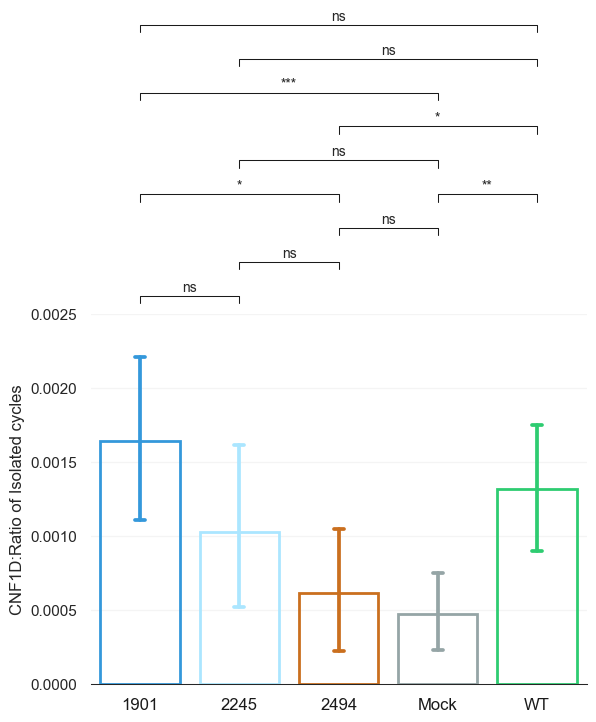

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.502e-01 stat=6.021e-01
2245 v.s. 2494: t-test independent samples, P_val=9.283e-01 stat=-9.061e-02
2494 v.s. Mock: t-test independent samples, P_val=1.000e+00 stat=0.000e+00
Mock v.s. WT: t-test independent samples, P_val=4.546e-01 stat=-7.549e-01
1901 v.s. 2494: t-test independent samples, P_val=6.807e-01 stat=4.152e-01
2245 v.s. Mock: t-test independent samples, P_val=9.209e-01 stat=-9.982e-02
2494 v.s. WT: t-test independent samples, P_val=4.654e-01 stat=-7.401e-01
1901 v.s. Mock: t-test independent samples, P_val=6.728e-01 stat=4.250e-01
2245 v.s. WT: t-test independent samples, P_val=3.413e-01 stat=-9.636e-01
1901 v.s. WT: t-test independent samples, P_val=6.172e-01 stat=-5.041e-01


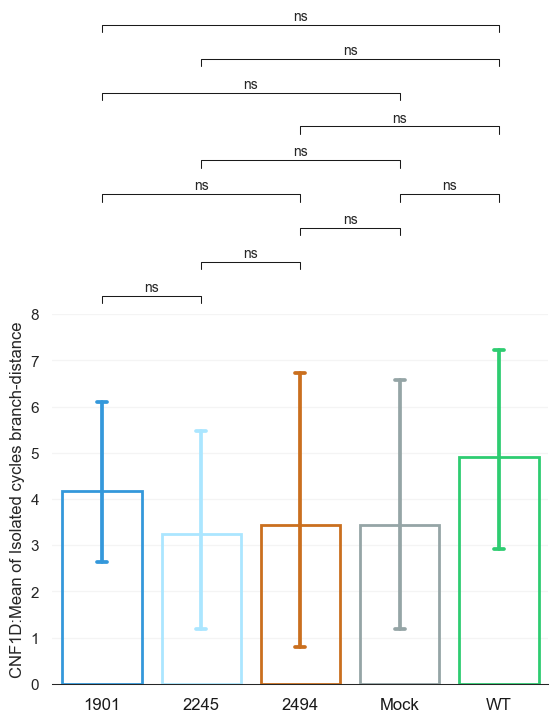

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.035e-01 stat=1.220e-01
2245 v.s. 2494: t-test independent samples, P_val=2.231e-01 stat=-1.241e+00
2494 v.s. Mock: t-test independent samples, P_val=4.098e-02 stat=2.118e+00
Mock v.s. WT: t-test independent samples, P_val=2.665e-02 stat=-2.299e+00
1901 v.s. 2494: t-test independent samples, P_val=2.841e-01 stat=-1.089e+00
2245 v.s. Mock: t-test independent samples, P_val=2.925e-01 stat=1.065e+00
2494 v.s. WT: t-test independent samples, P_val=8.263e-01 stat=2.215e-01
1901 v.s. Mock: t-test independent samples, P_val=2.817e-01 stat=1.089e+00
2245 v.s. WT: t-test independent samples, P_val=2.384e-01 stat=-1.198e+00
1901 v.s. WT: t-test independent samples, P_val=3.135e-01 stat=-1.022e+00


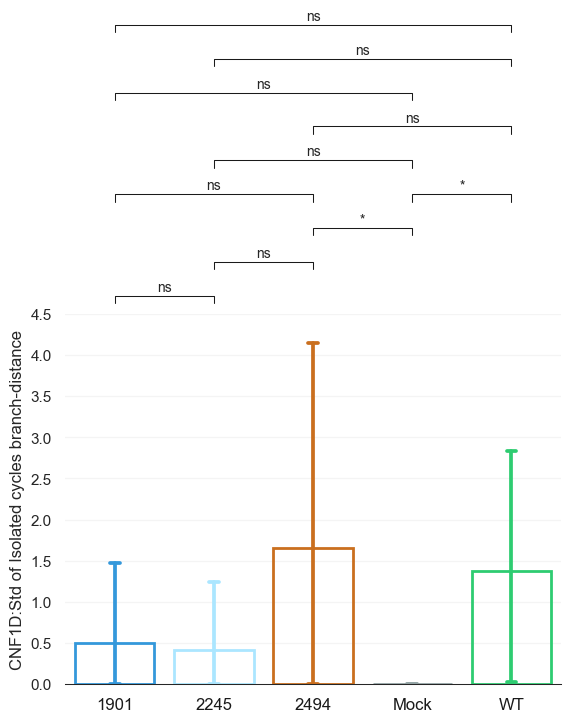

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.207e-02 stat=2.621e+00
2245 v.s. 2494: t-test independent samples, P_val=4.393e-01 stat=7.825e-01
2494 v.s. Mock: t-test independent samples, P_val=5.566e-01 stat=-5.933e-01
Mock v.s. WT: t-test independent samples, P_val=5.523e-02 stat=-1.973e+00
1901 v.s. 2494: t-test independent samples, P_val=1.774e-03 stat=3.401e+00
2245 v.s. Mock: t-test independent samples, P_val=8.346e-01 stat=2.099e-01
2494 v.s. WT: t-test independent samples, P_val=1.211e-02 stat=-2.683e+00
1901 v.s. Mock: t-test independent samples, P_val=5.906e-03 stat=2.887e+00
2245 v.s. WT: t-test independent samples, P_val=8.853e-02 stat=-1.748e+00
1901 v.s. WT: t-test independent samples, P_val=4.261e-01 stat=8.048e-01


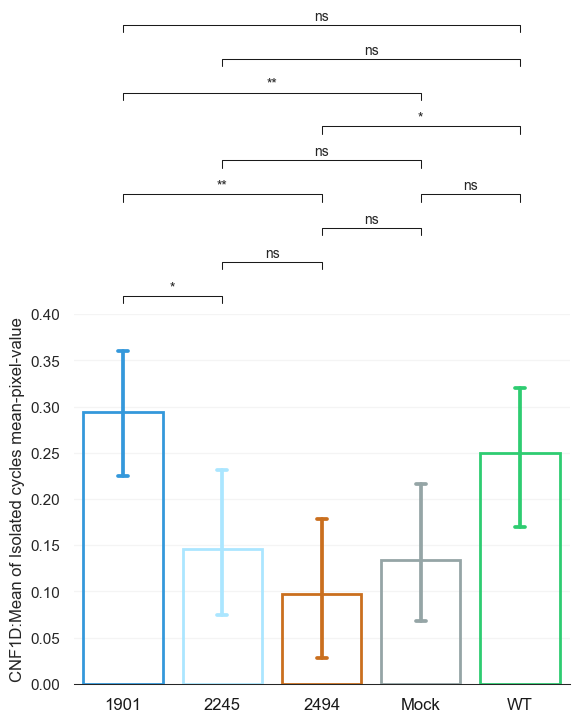

p-value annotation legend:

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)



ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.201e-01 stat=1.006e+00
2245 v.s. 2494: t-test independent samples, P_val=8.102e-01 stat=2.420e-01
2494 v.s. Mock: t-test independent samples, P_val=4.288e-01 stat=8.000e-01
Mock v.s. WT: t-test independent samples, P_val=2.944e-03 stat=-3.162e+00
1901 v.s. 2494: t-test independent samples, P_val=2.886e-01 stat=1.079e+00
2245 v.s. Mock: t-test independent samples, P_val=3.294e-01 stat=9.856e-01
2494 v.s. WT: t-test independent samples, P_val=5.785e-02 stat=-1.978e+00
1901 v.s. Mock: t-test independent samples, P_val=5.415e-02 stat=1.976e+00
2245 v.s. WT: t-test independent samples, P_val=9.909e-02 stat=-1.691e+00
1901 v.s. WT: t-test independent samples, P_val=6.446e-01 stat=-4.651e-01


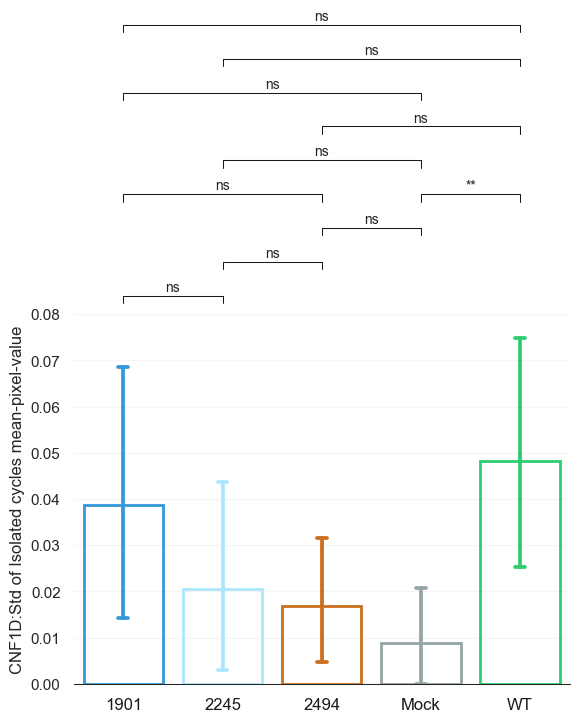

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.410e-01 stat=6.162e-01
2245 v.s. 2494: t-test independent samples, P_val=3.881e-01 stat=8.743e-01
2494 v.s. Mock: t-test independent samples, P_val=3.182e-01 stat=-1.012e+00
Mock v.s. WT: t-test independent samples, P_val=9.473e-01 stat=-6.656e-02
1901 v.s. 2494: t-test independent samples, P_val=9.827e-02 stat=1.701e+00
2245 v.s. Mock: t-test independent samples, P_val=5.484e-01 stat=-6.046e-01
2494 v.s. WT: t-test independent samples, P_val=4.015e-02 stat=-2.152e+00
1901 v.s. Mock: t-test independent samples, P_val=8.301e-01 stat=-2.158e-01
2245 v.s. WT: t-test independent samples, P_val=3.311e-01 stat=-9.846e-01
1901 v.s. WT: t-test independent samples, P_val=6.391e-01 stat=-4.729e-01


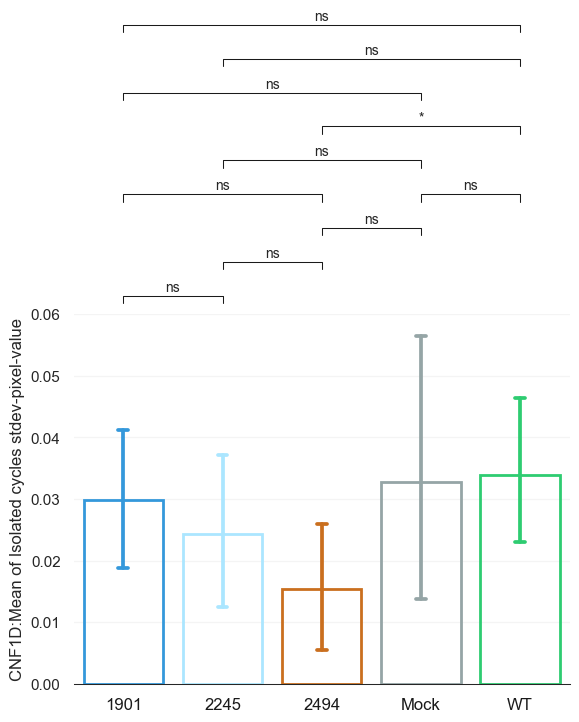

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=9.766e-01 stat=2.949e-02
2245 v.s. 2494: t-test independent samples, P_val=8.902e-01 stat=-1.391e-01
2494 v.s. Mock: t-test independent samples, P_val=4.149e-02 stat=2.112e+00
Mock v.s. WT: t-test independent samples, P_val=7.434e-04 stat=-3.646e+00
1901 v.s. 2494: t-test independent samples, P_val=9.128e-01 stat=-1.103e-01
2245 v.s. Mock: t-test independent samples, P_val=1.266e-01 stat=1.555e+00
2494 v.s. WT: t-test independent samples, P_val=2.697e-01 stat=-1.126e+00
1901 v.s. Mock: t-test independent samples, P_val=1.203e-01 stat=1.583e+00
2245 v.s. WT: t-test independent samples, P_val=2.002e-01 stat=-1.304e+00
1901 v.s. WT: t-test independent samples, P_val=2.164e-01 stat=-1.258e+00


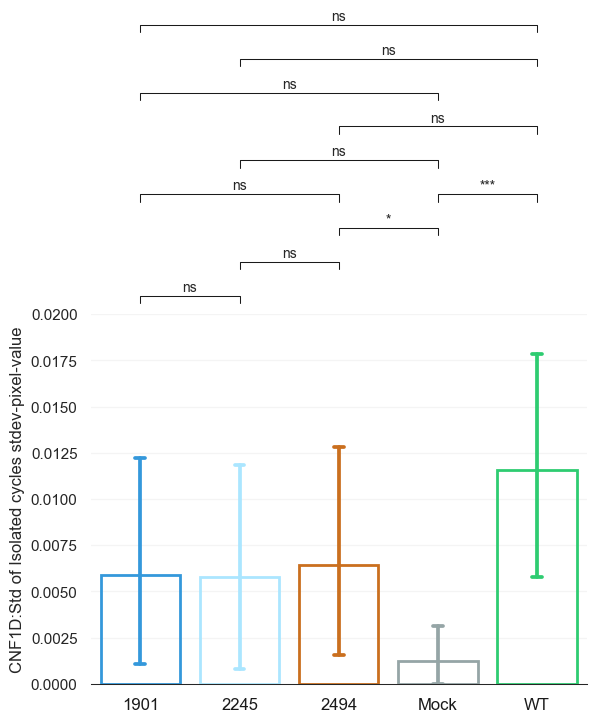

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


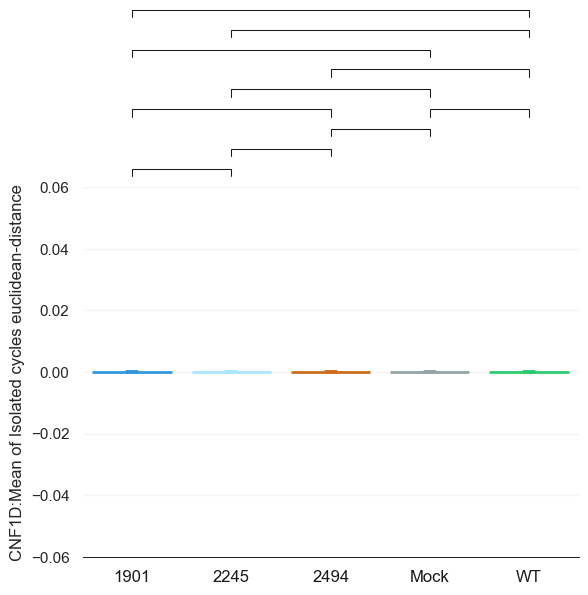

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


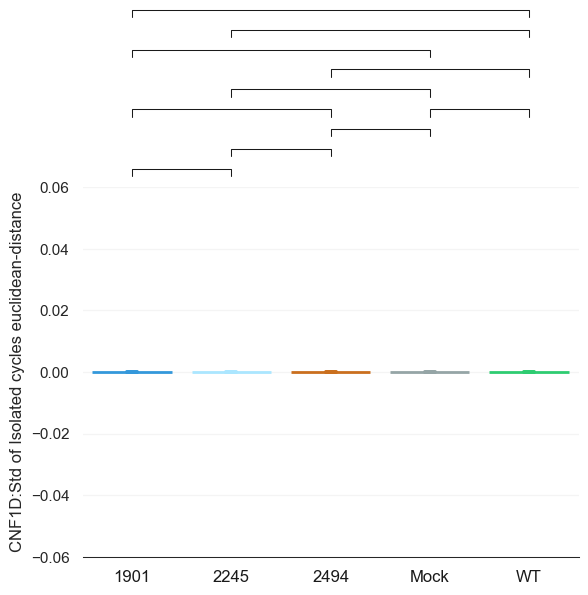

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.206e-01 stat=6.478e-01
2245 v.s. 2494: t-test independent samples, P_val=8.503e-05 stat=-4.460e+00
2494 v.s. Mock: t-test independent samples, P_val=9.132e-04 stat=3.606e+00
Mock v.s. WT: t-test independent samples, P_val=3.544e-01 stat=-9.367e-01
1901 v.s. 2494: t-test independent samples, P_val=3.178e-04 stat=-4.020e+00
2245 v.s. Mock: t-test independent samples, P_val=4.595e-02 stat=-2.050e+00
2494 v.s. WT: t-test independent samples, P_val=1.800e-02 stat=2.513e+00
1901 v.s. Mock: t-test independent samples, P_val=1.896e-01 stat=-1.332e+00
2245 v.s. WT: t-test independent samples, P_val=1.553e-02 stat=-2.534e+00
1901 v.s. WT: t-test independent samples, P_val=5.942e-02 stat=-1.945e+00


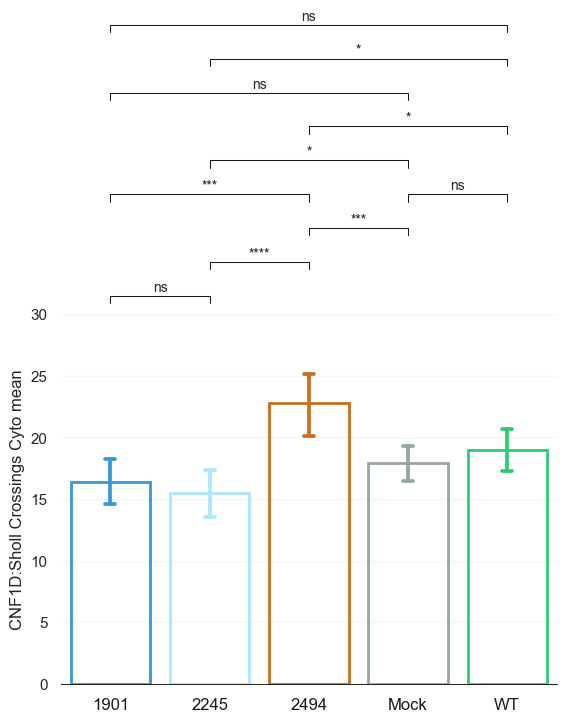

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.063e-01 stat=5.191e-01
2245 v.s. 2494: t-test independent samples, P_val=1.005e-03 stat=-3.599e+00
2494 v.s. Mock: t-test independent samples, P_val=3.323e-03 stat=3.139e+00
Mock v.s. WT: t-test independent samples, P_val=1.171e-01 stat=-1.601e+00
1901 v.s. 2494: t-test independent samples, P_val=3.413e-03 stat=-3.155e+00
2245 v.s. Mock: t-test independent samples, P_val=4.731e-01 stat=-7.232e-01
2494 v.s. WT: t-test independent samples, P_val=1.731e-01 stat=1.398e+00
1901 v.s. Mock: t-test independent samples, P_val=8.563e-01 stat=-1.822e-01
2245 v.s. WT: t-test independent samples, P_val=3.743e-02 stat=-2.157e+00
1901 v.s. WT: t-test independent samples, P_val=9.972e-02 stat=-1.689e+00


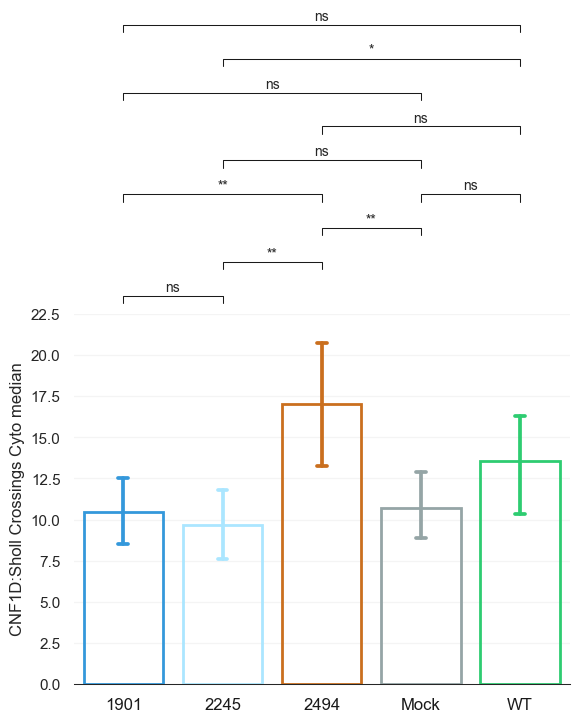

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


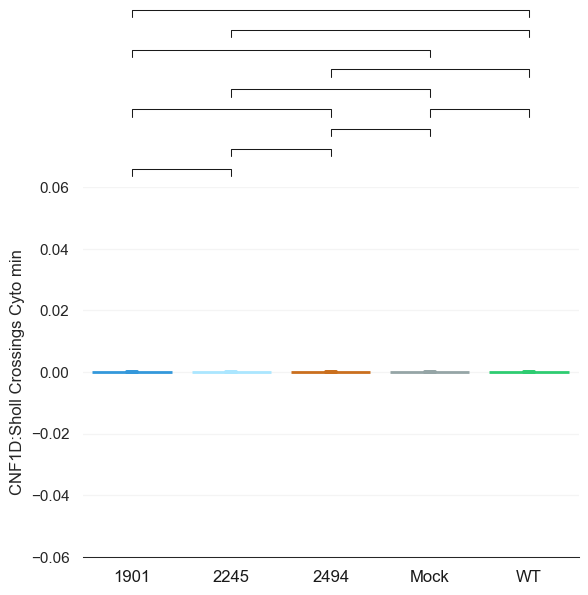

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.007e-01 stat=3.870e-01
2245 v.s. 2494: t-test independent samples, P_val=3.077e-03 stat=-3.187e+00
2494 v.s. Mock: t-test independent samples, P_val=4.070e-02 stat=2.121e+00
Mock v.s. WT: t-test independent samples, P_val=6.280e-01 stat=-4.882e-01
1901 v.s. 2494: t-test independent samples, P_val=9.827e-03 stat=-2.740e+00
2245 v.s. Mock: t-test independent samples, P_val=2.468e-02 stat=-2.321e+00
2494 v.s. WT: t-test independent samples, P_val=1.793e-01 stat=1.377e+00
1901 v.s. Mock: t-test independent samples, P_val=8.774e-02 stat=-1.745e+00
2245 v.s. WT: t-test independent samples, P_val=3.180e-02 stat=-2.229e+00
1901 v.s. WT: t-test independent samples, P_val=8.814e-02 stat=-1.752e+00


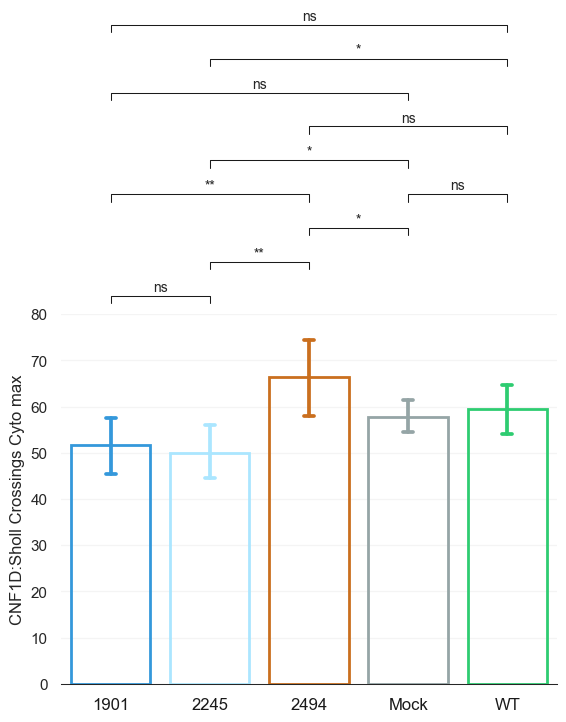

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.506e-01 stat=4.561e-01
2245 v.s. 2494: t-test independent samples, P_val=9.121e-04 stat=-3.634e+00
2494 v.s. Mock: t-test independent samples, P_val=1.096e-02 stat=2.679e+00
Mock v.s. WT: t-test independent samples, P_val=9.698e-01 stat=-3.814e-02
1901 v.s. 2494: t-test independent samples, P_val=2.844e-03 stat=-3.224e+00
2245 v.s. Mock: t-test independent samples, P_val=4.730e-02 stat=-2.037e+00
2494 v.s. WT: t-test independent samples, P_val=3.509e-02 stat=2.215e+00
1901 v.s. Mock: t-test independent samples, P_val=1.480e-01 stat=-1.471e+00
2245 v.s. WT: t-test independent samples, P_val=8.909e-02 stat=-1.745e+00
1901 v.s. WT: t-test independent samples, P_val=2.125e-01 stat=-1.269e+00


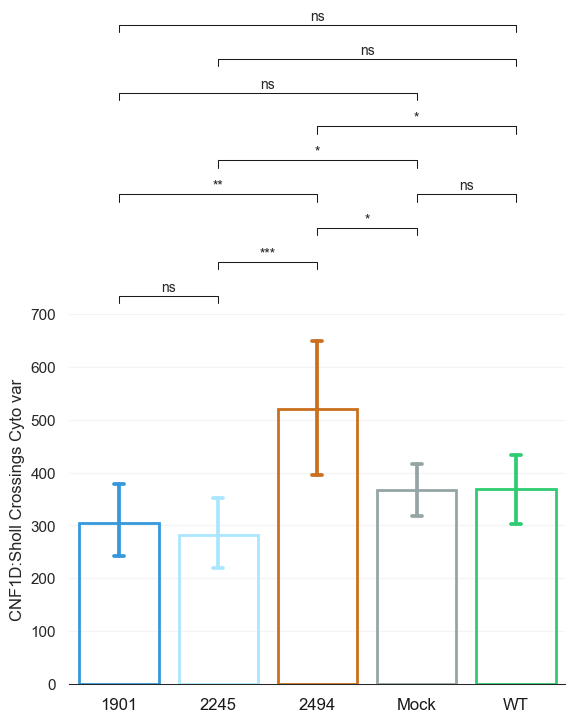

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.110e-01 stat=5.124e-01
2245 v.s. 2494: t-test independent samples, P_val=1.024e-03 stat=-3.592e+00
2494 v.s. Mock: t-test independent samples, P_val=1.931e-02 stat=2.446e+00
Mock v.s. WT: t-test independent samples, P_val=9.916e-01 stat=1.056e-02
1901 v.s. 2494: t-test independent samples, P_val=3.104e-03 stat=-3.191e+00
2245 v.s. Mock: t-test independent samples, P_val=2.321e-02 stat=-2.347e+00
2494 v.s. WT: t-test independent samples, P_val=4.707e-02 stat=2.077e+00
1901 v.s. Mock: t-test independent samples, P_val=8.730e-02 stat=-1.747e+00
2245 v.s. WT: t-test independent samples, P_val=5.701e-02 stat=-1.963e+00
1901 v.s. WT: t-test independent samples, P_val=1.520e-01 stat=-1.463e+00


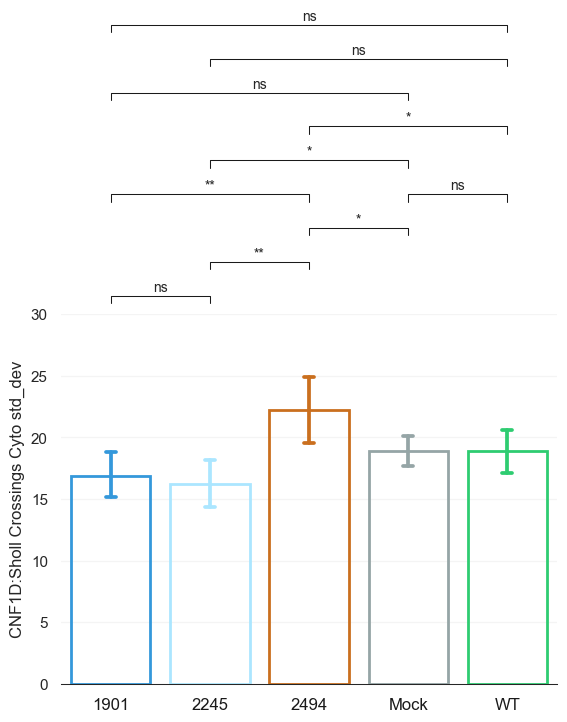

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.212e-01 stat=-1.581e+00
2245 v.s. 2494: t-test independent samples, P_val=1.478e-02 stat=2.568e+00
2494 v.s. Mock: t-test independent samples, P_val=1.438e-03 stat=-3.445e+00
Mock v.s. WT: t-test independent samples, P_val=4.637e-01 stat=7.396e-01
1901 v.s. 2494: t-test independent samples, P_val=1.075e-01 stat=1.654e+00
2245 v.s. Mock: t-test independent samples, P_val=6.918e-01 stat=3.988e-01
2494 v.s. WT: t-test independent samples, P_val=3.343e-02 stat=-2.237e+00
1901 v.s. Mock: t-test independent samples, P_val=9.882e-02 stat=-1.685e+00
2245 v.s. WT: t-test independent samples, P_val=4.001e-01 stat=8.509e-01
1901 v.s. WT: t-test independent samples, P_val=4.735e-01 stat=-7.242e-01


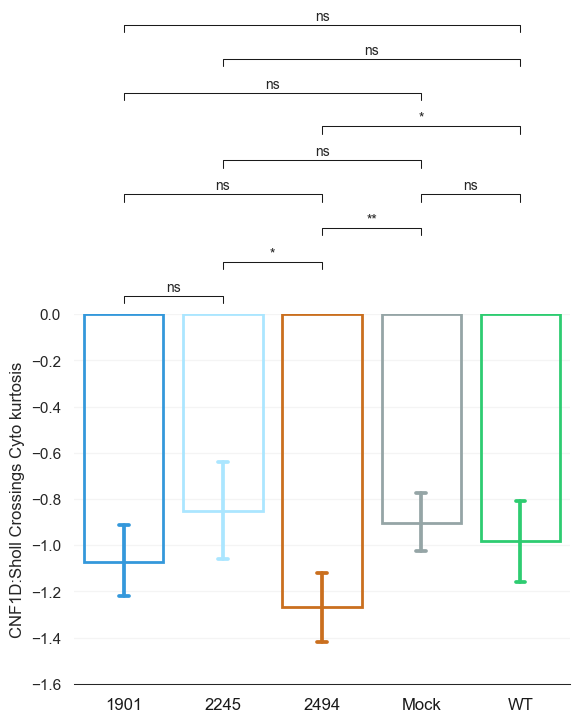

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.465e-01 stat=-1.479e+00
2245 v.s. 2494: t-test independent samples, P_val=1.334e-02 stat=2.611e+00
2494 v.s. Mock: t-test independent samples, P_val=3.071e-03 stat=-3.168e+00
Mock v.s. WT: t-test independent samples, P_val=1.455e-01 stat=1.484e+00
1901 v.s. 2494: t-test independent samples, P_val=1.264e-01 stat=1.568e+00
2245 v.s. Mock: t-test independent samples, P_val=9.157e-01 stat=-1.064e-01
2494 v.s. WT: t-test independent samples, P_val=2.189e-01 stat=-1.258e+00
1901 v.s. Mock: t-test independent samples, P_val=7.310e-02 stat=-1.834e+00
2245 v.s. WT: t-test independent samples, P_val=2.340e-01 stat=1.209e+00
1901 v.s. WT: t-test independent samples, P_val=9.946e-01 stat=-6.867e-03


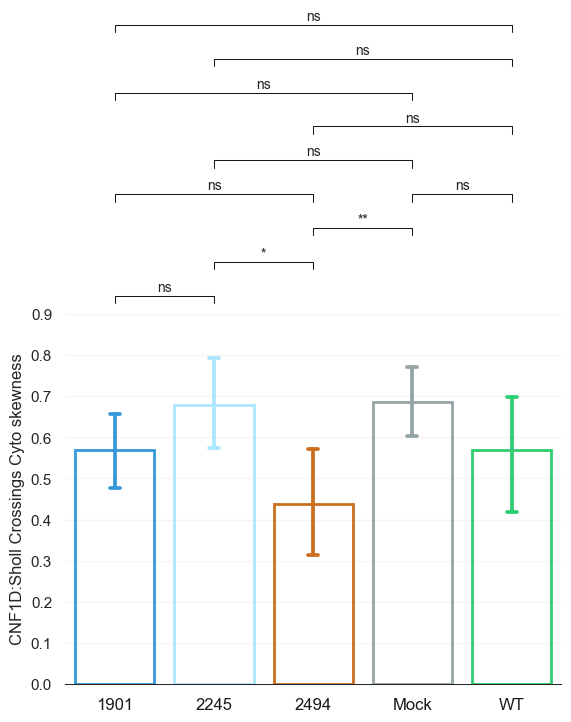

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.881e-01 stat=-8.718e-01
2245 v.s. 2494: t-test independent samples, P_val=3.081e-02 stat=2.253e+00
2494 v.s. Mock: t-test independent samples, P_val=4.078e-02 stat=-2.120e+00
Mock v.s. WT: t-test independent samples, P_val=1.590e-01 stat=1.435e+00
1901 v.s. 2494: t-test independent samples, P_val=9.554e-02 stat=1.716e+00
2245 v.s. Mock: t-test independent samples, P_val=9.039e-01 stat=-1.214e-01
2494 v.s. WT: t-test independent samples, P_val=5.645e-01 stat=-5.832e-01
1901 v.s. Mock: t-test independent samples, P_val=3.667e-01 stat=-9.117e-01
2245 v.s. WT: t-test independent samples, P_val=1.635e-01 stat=1.421e+00
1901 v.s. WT: t-test independent samples, P_val=4.193e-01 stat=8.168e-01


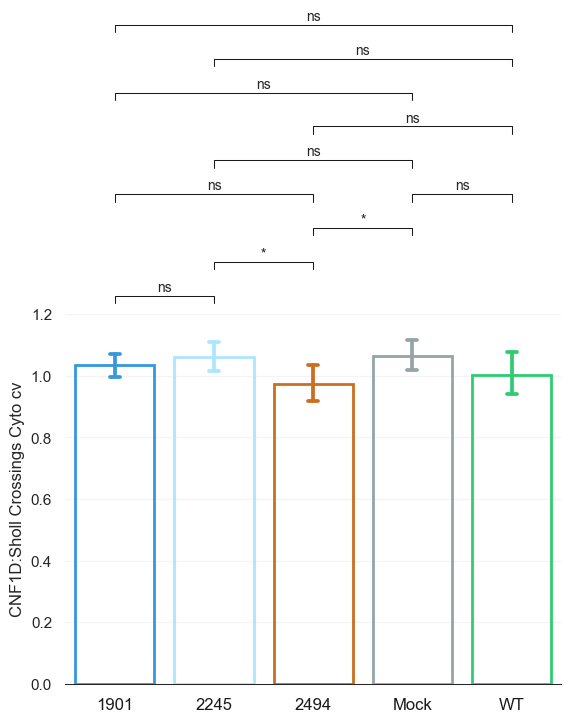

p-value annotation legend:


C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.199e-01 stat=6.489e-01
2245 v.s. 2494: t-test independent samples, P_val=7.081e-05 stat=-4.523e+00
2494 v.s. Mock: t-test independent samples, P_val=9.617e-04 stat=3.587e+00
Mock v.s. WT: t-test independent samples, P_val=2.688e-01 stat=-1.121e+00
1901 v.s. 2494: t-test independent samples, P_val=2.934e-04 stat=-4.048e+00
2245 v.s. Mock: t-test independent samples, P_val=4.037e-02 stat=-2.108e+00
2494 v.s. WT: t-test independent samples, P_val=2.530e-02 stat=2.363e+00
1901 v.s. Mock: t-test independent samples, P_val=1.744e-01 stat=-1.380e+00
2245 v.s. WT: t-test independent samples, P_val=9.136e-03 stat=-2.747e+00
1901 v.s. WT: t-test independent samples, P_val=3.866e-02 stat=-2.144e+00


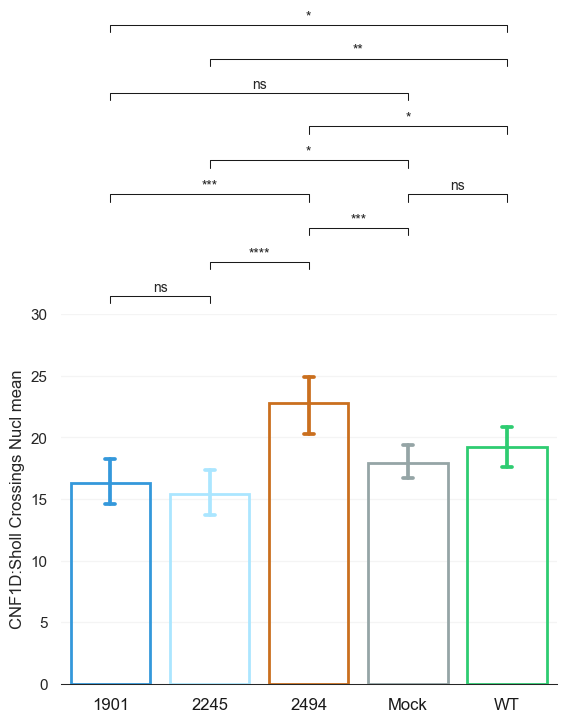

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=1.891e-01 stat=1.335e+00
2245 v.s. 2494: t-test independent samples, P_val=3.944e-03 stat=-3.093e+00
2494 v.s. Mock: t-test independent samples, P_val=1.544e-02 stat=2.539e+00
Mock v.s. WT: t-test independent samples, P_val=3.918e-02 stat=-2.130e+00
1901 v.s. 2494: t-test independent samples, P_val=1.233e-01 stat=-1.581e+00
2245 v.s. Mock: t-test independent samples, P_val=1.253e-01 stat=-1.561e+00
2494 v.s. WT: t-test independent samples, P_val=6.614e-01 stat=4.427e-01
1901 v.s. Mock: t-test independent samples, P_val=7.918e-01 stat=2.655e-01
2245 v.s. WT: t-test independent samples, P_val=6.304e-03 stat=-2.892e+00
1901 v.s. WT: t-test independent samples, P_val=2.024e-01 stat=-1.298e+00


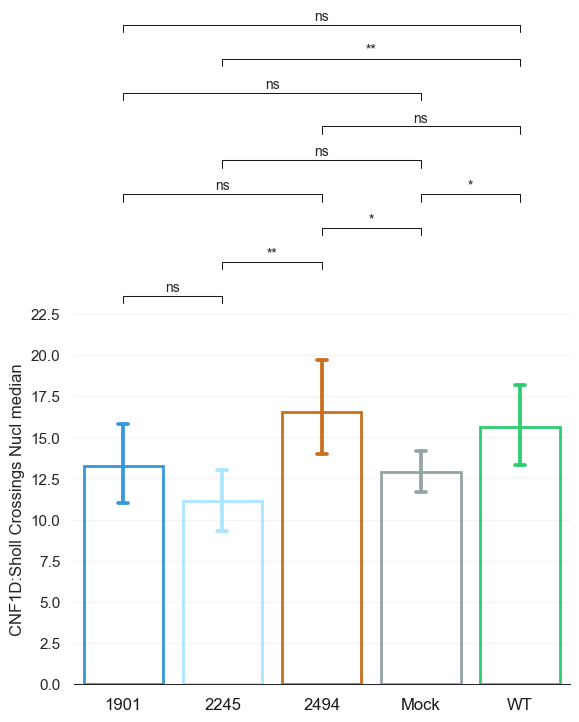

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=nan stat=nan
2245 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2494 v.s. Mock: t-test independent samples, P_val=nan stat=nan
Mock v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. 2494: t-test independent samples, P_val=nan stat=nan
2245 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2494 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. Mock: t-test independent samples, P_val=nan stat=nan
2245 v.s. WT: t-test independent samples, P_val=nan stat=nan
1901 v.s. WT: t-test independent samples, P_val=nan stat=nan


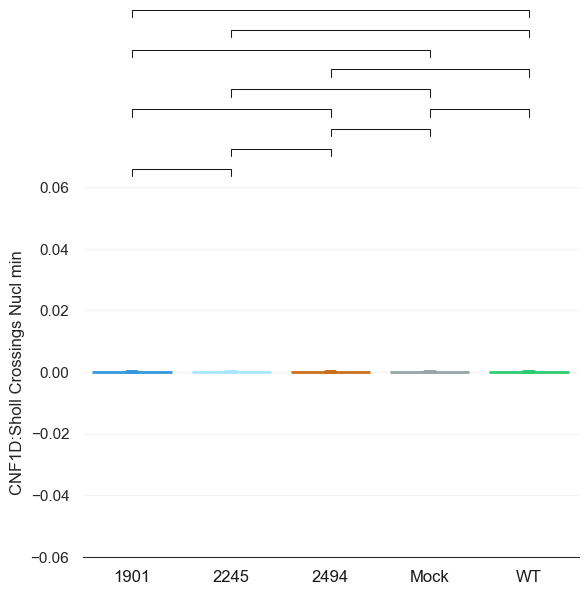

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=8.170e-01 stat=2.329e-01
2245 v.s. 2494: t-test independent samples, P_val=2.639e-04 stat=-4.071e+00
2494 v.s. Mock: t-test independent samples, P_val=1.389e-02 stat=2.583e+00
Mock v.s. WT: t-test independent samples, P_val=2.921e-01 stat=-1.067e+00
1901 v.s. 2494: t-test independent samples, P_val=1.618e-04 stat=-4.256e+00
2245 v.s. Mock: t-test independent samples, P_val=1.301e-01 stat=-1.541e+00
2494 v.s. WT: t-test independent samples, P_val=1.236e-01 stat=1.587e+00
1901 v.s. Mock: t-test independent samples, P_val=1.712e-01 stat=-1.390e+00
2245 v.s. WT: t-test independent samples, P_val=1.454e-02 stat=-2.561e+00
1901 v.s. WT: t-test independent samples, P_val=1.529e-02 stat=-2.543e+00


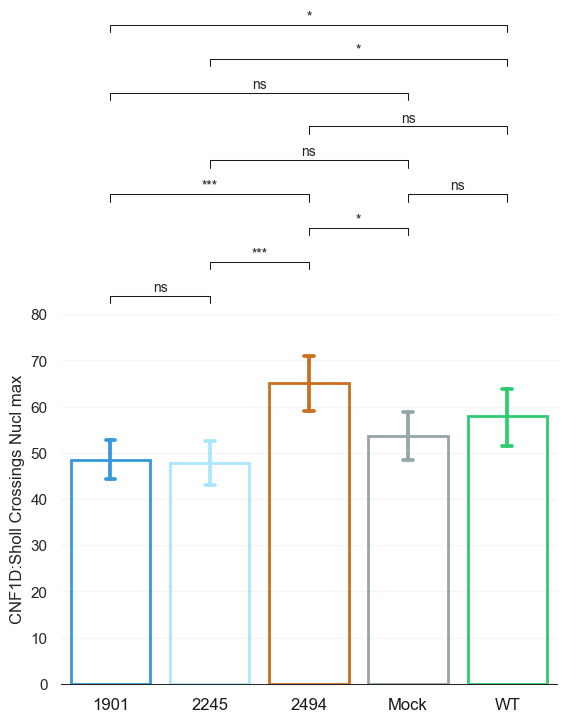

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=5.840e-01 stat=-5.518e-01
2245 v.s. 2494: t-test independent samples, P_val=6.118e-04 stat=-3.776e+00
2494 v.s. Mock: t-test independent samples, P_val=7.490e-03 stat=2.829e+00
Mock v.s. WT: t-test independent samples, P_val=8.374e-01 stat=2.065e-01
1901 v.s. 2494: t-test independent samples, P_val=5.768e-05 stat=-4.612e+00
2245 v.s. Mock: t-test independent samples, P_val=1.272e-01 stat=-1.553e+00
2494 v.s. WT: t-test independent samples, P_val=1.109e-02 stat=2.720e+00
1901 v.s. Mock: t-test independent samples, P_val=2.585e-02 stat=-2.303e+00
2245 v.s. WT: t-test independent samples, P_val=2.301e-01 stat=-1.220e+00
1901 v.s. WT: t-test independent samples, P_val=5.720e-02 stat=-1.963e+00


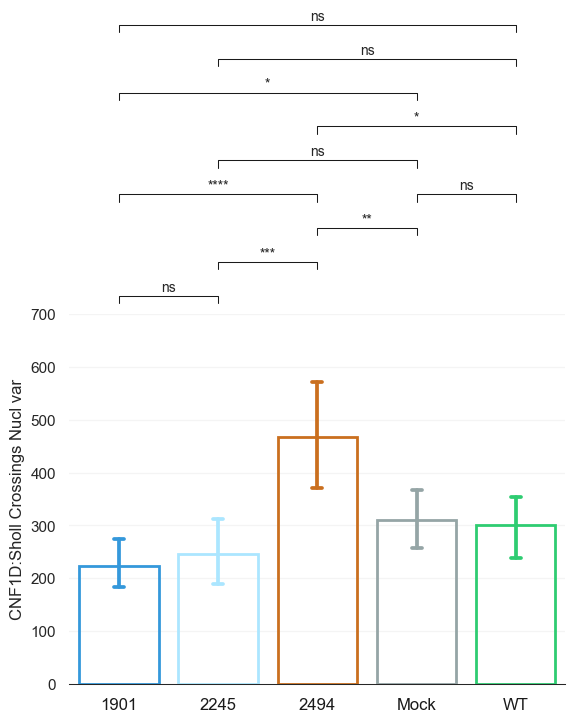

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.849e-01 stat=-4.086e-01
2245 v.s. 2494: t-test independent samples, P_val=8.189e-04 stat=-3.672e+00
2494 v.s. Mock: t-test independent samples, P_val=1.512e-02 stat=2.548e+00
Mock v.s. WT: t-test independent samples, P_val=8.527e-01 stat=1.868e-01
1901 v.s. 2494: t-test independent samples, P_val=9.323e-05 stat=-4.447e+00
2245 v.s. Mock: t-test independent samples, P_val=1.042e-01 stat=-1.657e+00
2494 v.s. WT: t-test independent samples, P_val=2.062e-02 stat=2.454e+00
1901 v.s. Mock: t-test independent samples, P_val=2.976e-02 stat=-2.243e+00
2245 v.s. WT: t-test independent samples, P_val=2.013e-01 stat=-1.300e+00
1901 v.s. WT: t-test independent samples, P_val=7.087e-02 stat=-1.860e+00


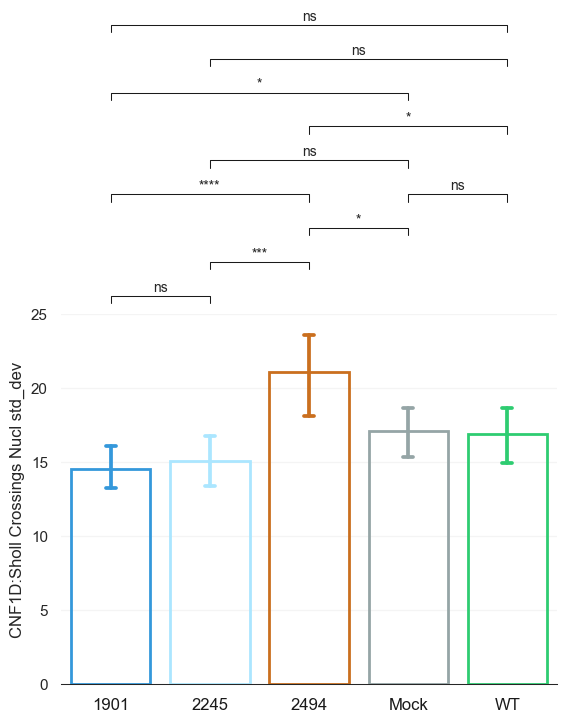

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=7.286e-01 stat=3.493e-01
2245 v.s. 2494: t-test independent samples, P_val=2.375e-01 stat=1.202e+00
2494 v.s. Mock: t-test independent samples, P_val=9.712e-01 stat=-3.629e-02
Mock v.s. WT: t-test independent samples, P_val=1.072e-02 stat=-2.674e+00
1901 v.s. 2494: t-test independent samples, P_val=1.726e-01 stat=1.394e+00
2245 v.s. Mock: t-test independent samples, P_val=7.632e-02 stat=1.812e+00
2494 v.s. WT: t-test independent samples, P_val=1.113e-01 stat=-1.644e+00
1901 v.s. Mock: t-test independent samples, P_val=4.242e-02 stat=2.087e+00
2245 v.s. WT: t-test independent samples, P_val=7.921e-01 stat=-2.655e-01
1901 v.s. WT: t-test independent samples, P_val=9.105e-01 stat=1.131e-01


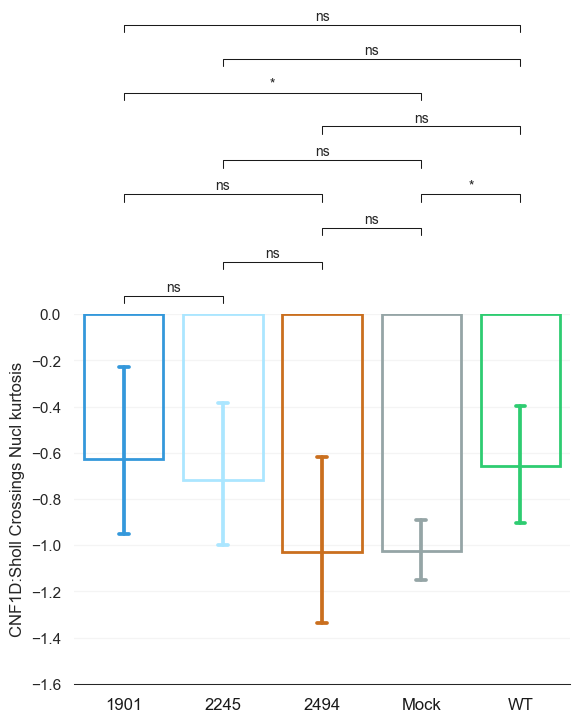

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=6.297e-01 stat=-4.857e-01
2245 v.s. 2494: t-test independent samples, P_val=1.269e-01 stat=1.565e+00
2494 v.s. Mock: t-test independent samples, P_val=6.766e-01 stat=-4.204e-01
Mock v.s. WT: t-test independent samples, P_val=3.529e-01 stat=-9.397e-01
1901 v.s. 2494: t-test independent samples, P_val=2.511e-01 stat=1.168e+00
2245 v.s. Mock: t-test independent samples, P_val=1.180e-01 stat=1.592e+00
2494 v.s. WT: t-test independent samples, P_val=2.662e-01 stat=-1.134e+00
1901 v.s. Mock: t-test independent samples, P_val=2.979e-01 stat=1.053e+00
2245 v.s. WT: t-test independent samples, P_val=5.591e-01 stat=5.893e-01
1901 v.s. WT: t-test independent samples, P_val=9.101e-01 stat=1.137e-01


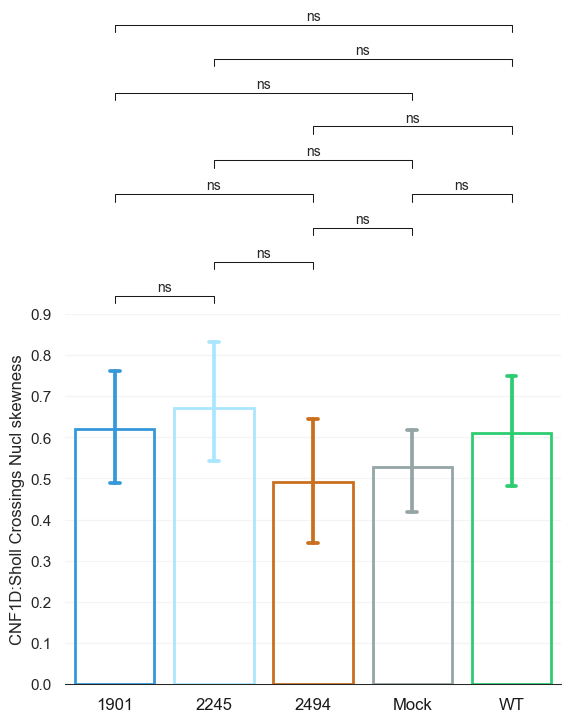

C:\Users\diogo\AppData\Local\Temp\ipykernel_23832\2628374439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f] = data[f].astype(float)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1901 v.s. 2245: t-test independent samples, P_val=3.547e-03 stat=-3.086e+00
2245 v.s. 2494: t-test independent samples, P_val=5.955e-02 stat=1.949e+00
2494 v.s. Mock: t-test independent samples, P_val=4.741e-01 stat=-7.232e-01
Mock v.s. WT: t-test independent samples, P_val=4.970e-02 stat=2.022e+00
1901 v.s. 2494: t-test independent samples, P_val=5.983e-01 stat=-5.319e-01
2245 v.s. Mock: t-test independent samples, P_val=1.743e-01 stat=1.379e+00
2494 v.s. WT: t-test independent samples, P_val=3.000e-01 stat=1.056e+00
1901 v.s. Mock: t-test independent samples, P_val=1.316e-01 stat=-1.535e+00
2245 v.s. WT: t-test independent samples, P_val=2.531e-03 stat=3.233e+00
1901 v.s. WT: t-test independent samples, P_val=4.210e-01 stat=8.137e-01


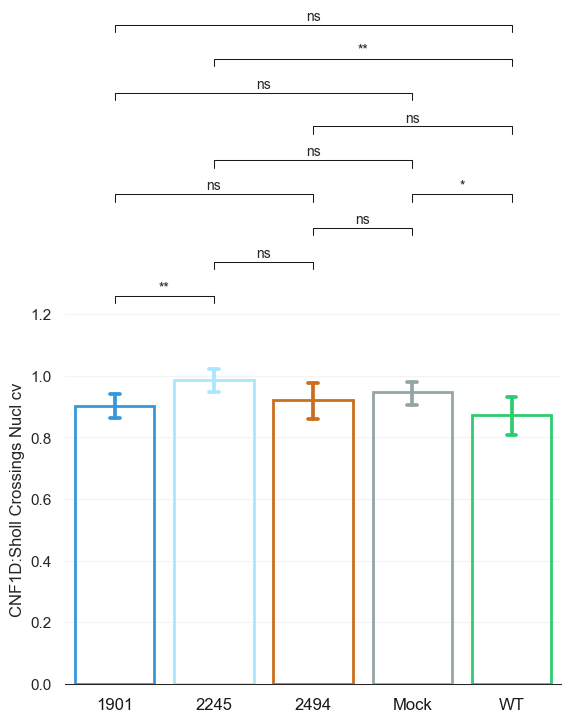

In [9]:
plot_barplot_soraia(ResultsDF)

In [5]:

ResultsDF['LSF3D:Mat Scores'].to_excel('.//rsmatscoresvector_9_jan_24.xlsx')
ResultsDF['LSF3D:Mat Scores'].to_pickle(".//rsmatscoresvector_9_jan_24.pkl")
del ResultsDF['LSF3D:Mat Scores']
ResultsDF.to_excel(folder + '//ResultsDF_9_jan_24.xlsx')
ResultsDF.to_pickle(folder + "//ResultsDF_9_jan_24.pkl")